# [IAPR 2020:][iapr2020] Lab 1 ‒  Image segmentation

**Author:** Arthur Babey  
**Due date:** 26.03.2020

[iapr2018]: https://github.com/LTS5/iapr-2020

## Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [3]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

## Part 1: Brain segmentation

Your goal: compute the size of the brain (in pixels) in a 2D image of a human head taken by Magnetic Resonance Imaging (MRI).
* Try as many methods as you can, the more the better.
* At least region growing and contour detection.

### 1.1 Brain image visualization

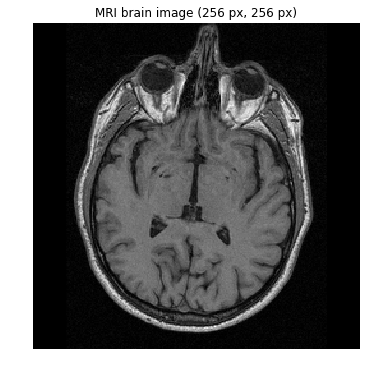

In [30]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

In [3]:
print('brain_im is of type {}, has dimensions {}, and a total number of {} elements'.format(
    type(brain_im), brain_im.shape, brain_im.size))



brain_im is of type <class 'numpy.ndarray'>, has dimensions (256, 256), and a total number of 65536 elements


In [4]:
brain_im.dtype

dtype('uint8')

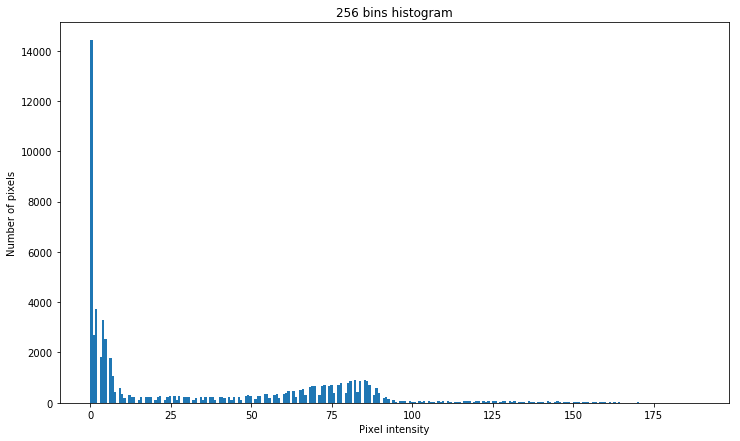

In [5]:
camera = brain_im
nb_bins = 256

plt.figure(figsize=(12, 7))
plt.hist(camera.ravel(), bins=nb_bins)
plt.xlabel('Pixel intensity')
plt.ylabel('Number of pixels')
plt.title('256 bins histogram')

plt.show()

### 1.2 Region growing
Add your implementation and discussion

In [6]:
def region_growing(im, seed, threshold = 0):
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            if im[i, j] > seed + 0.35*seed or im[i, j] < seed - 0.35*seed:
                im[i, j] = 0 
            else: 
                im[i, j] = 255
    return im

In [7]:
def get_neighbors(im, i, j):
    neighbors = [im[i+1,j], im[i,j+1], im[i+1,j+1],
                 im[i-1,j], im[i+1,j-1], im[i-1,j-1],
                 im[i+1,j-1], im[i-1,j+1]]
    return neighbors

In [14]:
import cv2
def get8n(x, y, shape):
    out = []
    maxx = shape[1]-1
    maxy = shape[0]-1

    #top left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top center
    outx = x
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #top right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y-1,0),maxy)
    out.append((outx,outy))

    #left
    outx = min(max(x-1,0),maxx)
    outy = y
    out.append((outx,outy))

    #right
    outx = min(max(x+1,0),maxx)
    outy = y
    out.append((outx,outy))

    #bottom left
    outx = min(max(x-1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom center
    outx = x
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    #bottom right
    outx = min(max(x+1,0),maxx)
    outy = min(max(y+1,0),maxy)
    out.append((outx,outy))

    return out

def region_growing(img, seed):
    lista = []
    outimg = np.zeros_like(img)
    lista.append((seed[0], seed[1]))
    processed = []
    while(len(lista) > 0):
        pix = lista[0]
        outimg[pix[0], pix[1]] = 255
        for coord in get8n(pix[0], pix[1], img.shape):
            print(coord)
            if img[coord[0], coord[1]] > 30:
                outimg[coord[0], coord[1]] = 255
                if not coord in processed:
                    print('ininin')
                    lista.append(coord)
                processed.append(coord)
        lista.pop(0)
        
    return outimg

In [15]:
import numpy as np
brain = region_growing(brain_im, (160, 120))

(159, 119)
ininin
(160, 119)
ininin
(161, 119)
ininin
(159, 120)
ininin
(161, 120)
ininin
(159, 121)
ininin
(160, 121)
ininin
(161, 121)
ininin
(158, 118)
ininin
(159, 118)
ininin
(160, 118)
ininin
(158, 119)
ininin
(160, 119)
(158, 120)
ininin
(159, 120)
(160, 120)
ininin
(159, 118)
(160, 118)
(161, 118)
ininin
(159, 119)
(161, 119)
(159, 120)
(160, 120)
(161, 120)
(160, 118)
(161, 118)
(162, 118)
ininin
(160, 119)
(162, 119)
ininin
(160, 120)
(161, 120)
(162, 120)
ininin
(158, 119)
(159, 119)
(160, 119)
(158, 120)
(160, 120)
(158, 121)
ininin
(159, 121)
(160, 121)
(160, 119)
(161, 119)
(162, 119)
(160, 120)
(162, 120)
(160, 121)
(161, 121)
(162, 121)
ininin
(158, 120)
(159, 120)
(160, 120)
(158, 121)
(160, 121)
(158, 122)
ininin
(159, 122)
ininin
(160, 122)
ininin
(159, 120)
(160, 120)
(161, 120)
(159, 121)
(161, 121)
(159, 122)
(160, 122)
(161, 122)
ininin
(160, 120)
(161, 120)
(162, 120)
(160, 121)
(162, 121)
(160, 122)
(161, 122)
(162, 122)
ininin
(157, 117)
ininin
(158, 117)
inin

(153, 117)
(154, 117)
(155, 117)
(156, 113)
(157, 113)
(158, 113)
ininin
(156, 114)
(158, 114)
(156, 115)
(157, 115)
(158, 115)
(157, 113)
(158, 113)
(159, 113)
ininin
(157, 114)
(159, 114)
(157, 115)
(158, 115)
(159, 115)
(153, 116)
(154, 116)
(155, 116)
(153, 117)
(155, 117)
(153, 118)
ininin
(154, 118)
(155, 118)
(153, 117)
(154, 117)
(155, 117)
(153, 118)
(155, 118)
(153, 119)
ininin
(154, 119)
(155, 119)
(158, 113)
(159, 113)
(160, 113)
ininin
(158, 114)
(160, 114)
(158, 115)
(159, 115)
(160, 115)
(159, 113)
(160, 113)
(161, 113)
ininin
(159, 114)
(161, 114)
(159, 115)
(160, 115)
(161, 115)
(153, 118)
(154, 118)
(155, 118)
(153, 119)
(155, 119)
(153, 120)
ininin
(154, 120)
(155, 120)
(153, 119)
(154, 119)
(155, 119)
(153, 120)
(155, 120)
(153, 121)
ininin
(154, 121)
(155, 121)
(160, 113)
(161, 113)
(162, 113)
ininin
(160, 114)
(162, 114)
(160, 115)
(161, 115)
(162, 115)
(161, 113)
(162, 113)
(163, 113)
ininin
(161, 114)
(163, 114)
(161, 115)
(162, 115)
(163, 115)
(153, 120)
(154, 

(151, 118)
(152, 118)
(153, 118)
(151, 119)
(153, 119)
(151, 120)
(152, 120)
(153, 120)
(151, 119)
(152, 119)
(153, 119)
(151, 120)
(153, 120)
(151, 121)
ininin
(152, 121)
(153, 121)
(160, 111)
(161, 111)
(162, 111)
ininin
(160, 112)
(162, 112)
(160, 113)
(161, 113)
(162, 113)
(161, 111)
(162, 111)
(163, 111)
ininin
(161, 112)
(163, 112)
(161, 113)
(162, 113)
(163, 113)
(151, 120)
(152, 120)
(153, 120)
(151, 121)
(153, 121)
(151, 122)
(152, 122)
(153, 122)
(151, 121)
(152, 121)
(153, 121)
(151, 122)
(153, 122)
(151, 123)
ininin
(152, 123)
(153, 123)
(162, 111)
(163, 111)
(164, 111)
ininin
(162, 112)
(164, 112)
(162, 113)
(163, 113)
(164, 113)
(163, 111)
(164, 111)
(165, 111)
ininin
(163, 112)
(165, 112)
(163, 113)
(164, 113)
(165, 113)
(151, 123)
(152, 123)
(153, 123)
(151, 124)
ininin
(153, 124)
(151, 125)
ininin
(152, 125)
(153, 125)
(164, 111)
(165, 111)
(166, 111)
ininin
(164, 112)
(166, 112)
(164, 113)
(165, 113)
(166, 113)
(165, 111)
(166, 111)
(167, 111)
ininin
(165, 112)
(167, 

(157, 128)
(155, 129)
(157, 129)
(155, 130)
(156, 130)
ininin
(157, 130)
ininin
(156, 128)
(157, 128)
(158, 128)
(156, 129)
(158, 129)
(156, 130)
(157, 130)
(158, 130)
ininin
(157, 128)
(158, 128)
(159, 128)
(157, 129)
(159, 129)
(157, 130)
(158, 130)
(159, 130)
ininin
(158, 128)
(159, 128)
(160, 128)
(158, 129)
(160, 129)
(158, 130)
(159, 130)
(160, 130)
ininin
(159, 128)
(160, 128)
(161, 128)
(159, 129)
(161, 129)
(159, 130)
(160, 130)
(161, 130)
ininin
(160, 128)
(161, 128)
(162, 128)
(160, 129)
(162, 129)
(160, 130)
(161, 130)
(162, 130)
ininin
(161, 128)
(162, 128)
(163, 128)
(161, 129)
(163, 129)
(161, 130)
(162, 130)
(163, 130)
ininin
(162, 128)
(163, 128)
(164, 128)
(162, 129)
(164, 129)
(162, 130)
(163, 130)
(164, 130)
ininin
(163, 128)
(164, 128)
(165, 128)
(163, 129)
(165, 129)
(163, 130)
(164, 130)
(165, 130)
ininin
(164, 128)
(165, 128)
(166, 128)
(164, 129)
(166, 129)
(164, 130)
(165, 130)
(166, 130)
ininin
(165, 128)
(166, 128)
(167, 128)
(165, 129)
(167, 129)
(165, 130)

ininin
(152, 109)
(154, 109)
(152, 110)
(153, 110)
(154, 110)
(148, 111)
(149, 111)
(150, 111)
(148, 112)
(150, 112)
(148, 113)
ininin
(149, 113)
(150, 113)
(148, 112)
(149, 112)
(150, 112)
(148, 113)
(150, 113)
(148, 114)
ininin
(149, 114)
(150, 114)
(153, 108)
(154, 108)
(155, 108)
ininin
(153, 109)
(155, 109)
(153, 110)
(154, 110)
(155, 110)
(154, 108)
(155, 108)
(156, 108)
ininin
(154, 109)
(156, 109)
(154, 110)
(155, 110)
(156, 110)
(148, 113)
(149, 113)
(150, 113)
(148, 114)
(150, 114)
(148, 115)
ininin
(149, 115)
(150, 115)
(148, 114)
(149, 114)
(150, 114)
(148, 115)
(150, 115)
(148, 116)
ininin
(149, 116)
(150, 116)
(155, 108)
(156, 108)
(157, 108)
ininin
(155, 109)
(157, 109)
(155, 110)
(156, 110)
(157, 110)
(156, 108)
(157, 108)
(158, 108)
ininin
(156, 109)
(158, 109)
(156, 110)
(157, 110)
(158, 110)
(148, 115)
(149, 115)
(150, 115)
(148, 116)
(150, 116)
(148, 117)
ininin
(149, 117)
(150, 117)
(157, 108)
(158, 108)
(159, 108)
ininin
(157, 109)
(159, 109)
(157, 110)
(158, 110)

(162, 108)
(164, 108)
(162, 109)
(163, 109)
(164, 109)
(163, 107)
(164, 107)
(165, 107)
ininin
(163, 108)
(165, 108)
(163, 109)
(164, 109)
(165, 109)
(147, 120)
(148, 120)
(149, 120)
(147, 121)
(149, 121)
(147, 122)
ininin
(148, 122)
(149, 122)
(147, 121)
(148, 121)
(149, 121)
(147, 122)
(149, 122)
(147, 123)
ininin
(148, 123)
(149, 123)
(147, 122)
(148, 122)
(149, 122)
(147, 123)
(149, 123)
(147, 124)
(148, 124)
(149, 124)
(164, 107)
(165, 107)
(166, 107)
ininin
(164, 108)
(166, 108)
(164, 109)
(165, 109)
(166, 109)
(165, 107)
(166, 107)
(167, 107)
ininin
(165, 108)
(167, 108)
(165, 109)
(166, 109)
(167, 109)
(147, 125)
(148, 125)
(149, 125)
(147, 126)
ininin
(149, 126)
(147, 127)
ininin
(148, 127)
(149, 127)
(166, 107)
(167, 107)
(168, 107)
ininin
(166, 108)
(168, 108)
(166, 109)
(167, 109)
(168, 109)
(167, 107)
(168, 107)
(169, 107)
ininin
(167, 108)
(169, 108)
(167, 109)
(168, 109)
(169, 109)
(147, 126)
(148, 126)
(149, 126)
(147, 127)
(149, 127)
(147, 128)
ininin
(148, 128)
(149, 

(154, 107)
(153, 105)
(154, 105)
(155, 105)
ininin
(153, 106)
(155, 106)
(153, 107)
(154, 107)
(155, 107)
(145, 112)
(146, 112)
(147, 112)
(145, 113)
(147, 113)
(145, 114)
ininin
(146, 114)
(147, 114)
(145, 113)
(146, 113)
(147, 113)
(145, 114)
(147, 114)
(145, 115)
ininin
(146, 115)
(147, 115)
(154, 105)
(155, 105)
(156, 105)
ininin
(154, 106)
(156, 106)
(154, 107)
(155, 107)
(156, 107)
(155, 105)
(156, 105)
(157, 105)
ininin
(155, 106)
(157, 106)
(155, 107)
(156, 107)
(157, 107)
(145, 114)
(146, 114)
(147, 114)
(145, 115)
(147, 115)
(145, 116)
ininin
(146, 116)
(147, 116)
(145, 115)
(146, 115)
(147, 115)
(145, 116)
(147, 116)
(145, 117)
ininin
(146, 117)
(147, 117)
(156, 105)
(157, 105)
(158, 105)
ininin
(156, 106)
(158, 106)
(156, 107)
(157, 107)
(158, 107)
(157, 105)
(158, 105)
(159, 105)
ininin
(157, 106)
(159, 106)
(157, 107)
(158, 107)
(159, 107)
(145, 116)
(146, 116)
(147, 116)
(145, 117)
(147, 117)
(145, 118)
(146, 118)
(147, 118)
(158, 105)
(159, 105)
(160, 105)
ininin
(158, 

(147, 105)
(149, 105)
(147, 106)
(148, 106)
(149, 106)
(148, 104)
(149, 104)
(150, 104)
ininin
(148, 105)
(150, 105)
(148, 106)
(149, 106)
(150, 106)
(144, 107)
(145, 107)
(146, 107)
(144, 108)
(146, 108)
(144, 109)
ininin
(145, 109)
(146, 109)
(144, 108)
(145, 108)
(146, 108)
(144, 109)
(146, 109)
(144, 110)
ininin
(145, 110)
(146, 110)
(149, 104)
(150, 104)
(151, 104)
ininin
(149, 105)
(151, 105)
(149, 106)
(150, 106)
(151, 106)
(150, 104)
(151, 104)
(152, 104)
ininin
(150, 105)
(152, 105)
(150, 106)
(151, 106)
(152, 106)
(144, 109)
(145, 109)
(146, 109)
(144, 110)
(146, 110)
(144, 111)
ininin
(145, 111)
(146, 111)
(144, 110)
(145, 110)
(146, 110)
(144, 111)
(146, 111)
(144, 112)
ininin
(145, 112)
(146, 112)
(151, 104)
(152, 104)
(153, 104)
ininin
(151, 105)
(153, 105)
(151, 106)
(152, 106)
(153, 106)
(152, 104)
(153, 104)
(154, 104)
ininin
(152, 105)
(154, 105)
(152, 106)
(153, 106)
(154, 106)
(144, 111)
(145, 111)
(146, 111)
(144, 112)
(146, 112)
(144, 113)
ininin
(145, 113)
(146, 

(169, 104)
(171, 104)
(169, 105)
(170, 105)
(171, 105)
(143, 124)
(144, 124)
(145, 124)
(143, 125)
(145, 125)
(143, 126)
ininin
(144, 126)
(145, 126)
(143, 125)
(144, 125)
(145, 125)
(143, 126)
(145, 126)
(143, 127)
ininin
(144, 127)
(145, 127)
(143, 126)
(144, 126)
(145, 126)
(143, 127)
(145, 127)
(143, 128)
ininin
(144, 128)
(145, 128)
(170, 103)
(171, 103)
(172, 103)
ininin
(170, 104)
(172, 104)
(170, 105)
(171, 105)
(172, 105)
(171, 103)
(172, 103)
(173, 103)
ininin
(171, 104)
(173, 104)
(171, 105)
(172, 105)
(173, 105)
(172, 103)
(173, 103)
(174, 103)
ininin
(172, 104)
(174, 104)
(172, 105)
(173, 105)
(174, 105)
(173, 103)
(174, 103)
(175, 103)
ininin
(173, 104)
(175, 104)
(173, 105)
(174, 105)
(175, 105)
(174, 103)
(175, 103)
(176, 103)
ininin
(174, 104)
(176, 104)
(174, 105)
(175, 105)
(176, 105)
(175, 103)
(176, 103)
(177, 103)
ininin
(175, 104)
(177, 104)
ininin
(175, 105)
(176, 105)
(177, 105)
ininin
(175, 104)
(176, 104)
(177, 104)
(175, 105)
(177, 105)
(175, 106)
(176, 106)

(151, 138)
ininin
(152, 138)
ininin
(151, 136)
(152, 136)
(153, 136)
(151, 137)
(153, 137)
(151, 138)
(152, 138)
(153, 138)
ininin
(152, 136)
(153, 136)
(154, 136)
(152, 137)
(154, 137)
(152, 138)
(153, 138)
(154, 138)
ininin
(153, 136)
(154, 136)
(155, 136)
(153, 137)
(155, 137)
(153, 138)
(154, 138)
(155, 138)
ininin
(154, 136)
(155, 136)
(156, 136)
(154, 137)
(156, 137)
(154, 138)
(155, 138)
(156, 138)
ininin
(155, 136)
(156, 136)
(157, 136)
(155, 137)
(157, 137)
(155, 138)
(156, 138)
(157, 138)
ininin
(156, 136)
(157, 136)
(158, 136)
(156, 137)
(158, 137)
(156, 138)
(157, 138)
(158, 138)
ininin
(157, 136)
(158, 136)
(159, 136)
(157, 137)
(159, 137)
(157, 138)
(158, 138)
(159, 138)
ininin
(158, 136)
(159, 136)
(160, 136)
(158, 137)
(160, 137)
(158, 138)
(159, 138)
(160, 138)
ininin
(159, 136)
(160, 136)
(161, 136)
(159, 137)
(161, 137)
(159, 138)
(160, 138)
(161, 138)
ininin
(160, 136)
(161, 136)
(162, 136)
(160, 137)
(162, 137)
(160, 138)
(161, 138)
(162, 138)
ininin
(161, 136)
(16

(150, 134)
(151, 134)
(149, 133)
(150, 133)
(151, 133)
(149, 134)
(151, 134)
(149, 135)
ininin
(150, 135)
(151, 135)
(149, 134)
(150, 134)
(151, 134)
(149, 135)
(151, 135)
(149, 136)
ininin
(150, 136)
(151, 136)
(149, 135)
(150, 135)
(151, 135)
(149, 136)
(151, 136)
(149, 137)
ininin
(150, 137)
(151, 137)
(149, 136)
(150, 136)
(151, 136)
(149, 137)
(151, 137)
(149, 138)
ininin
(150, 138)
(151, 138)
(149, 137)
(150, 137)
(151, 137)
(149, 138)
(151, 138)
(149, 139)
ininin
(150, 139)
ininin
(151, 139)
ininin
(150, 137)
(151, 137)
(152, 137)
(150, 138)
(152, 138)
(150, 139)
(151, 139)
(152, 139)
ininin
(151, 137)
(152, 137)
(153, 137)
(151, 138)
(153, 138)
(151, 139)
(152, 139)
(153, 139)
ininin
(152, 137)
(153, 137)
(154, 137)
(152, 138)
(154, 138)
(152, 139)
(153, 139)
(154, 139)
ininin
(153, 137)
(154, 137)
(155, 137)
(153, 138)
(155, 138)
(153, 139)
(154, 139)
(155, 139)
ininin
(154, 137)
(155, 137)
(156, 137)
(154, 138)
(156, 138)
(154, 139)
(155, 139)
(156, 139)
ininin
(155, 137)
(15

(149, 133)
(150, 133)
(148, 132)
(149, 132)
(150, 132)
(148, 133)
(150, 133)
(148, 134)
ininin
(149, 134)
(150, 134)
(148, 133)
(149, 133)
(150, 133)
(148, 134)
(150, 134)
(148, 135)
ininin
(149, 135)
(150, 135)
(148, 134)
(149, 134)
(150, 134)
(148, 135)
(150, 135)
(148, 136)
ininin
(149, 136)
(150, 136)
(148, 135)
(149, 135)
(150, 135)
(148, 136)
(150, 136)
(148, 137)
ininin
(149, 137)
(150, 137)
(148, 136)
(149, 136)
(150, 136)
(148, 137)
(150, 137)
(148, 138)
ininin
(149, 138)
(150, 138)
(148, 137)
(149, 137)
(150, 137)
(148, 138)
(150, 138)
(148, 139)
ininin
(149, 139)
(150, 139)
(148, 138)
(149, 138)
(150, 138)
(148, 139)
(150, 139)
(148, 140)
ininin
(149, 140)
ininin
(150, 140)
ininin
(149, 138)
(150, 138)
(151, 138)
(149, 139)
(151, 139)
(149, 140)
(150, 140)
(151, 140)
ininin
(150, 138)
(151, 138)
(152, 138)
(150, 139)
(152, 139)
(150, 140)
(151, 140)
(152, 140)
ininin
(151, 138)
(152, 138)
(153, 138)
(151, 139)
(153, 139)
(151, 140)
(152, 140)
(153, 140)
ininin
(152, 138)
(15

(181, 121)
(179, 122)
(180, 122)
(181, 122)
(179, 121)
(180, 121)
(181, 121)
(179, 122)
(181, 122)
(179, 123)
(180, 123)
(181, 123)
(179, 122)
(180, 122)
(181, 122)
(179, 123)
(181, 123)
(179, 124)
(180, 124)
(181, 124)
(179, 124)
(180, 124)
(181, 124)
(179, 125)
(181, 125)
ininin
(179, 126)
(180, 126)
(181, 126)
ininin
(179, 125)
(180, 125)
(181, 125)
(179, 126)
(181, 126)
(179, 127)
(180, 127)
(181, 127)
ininin
(179, 126)
(180, 126)
(181, 126)
(179, 127)
(181, 127)
(179, 128)
(180, 128)
(181, 128)
ininin
(179, 127)
(180, 127)
(181, 127)
(179, 128)
(181, 128)
(179, 129)
(180, 129)
(181, 129)
ininin
(179, 128)
(180, 128)
(181, 128)
(179, 129)
(181, 129)
(179, 130)
(180, 130)
(181, 130)
ininin
(179, 129)
(180, 129)
(181, 129)
(179, 130)
(181, 130)
(179, 131)
(180, 131)
(181, 131)
ininin
(179, 130)
(180, 130)
(181, 130)
(179, 131)
(181, 131)
(179, 132)
(180, 132)
(181, 132)
ininin
(179, 131)
(180, 131)
(181, 131)
(179, 132)
(181, 132)
(179, 133)
(180, 133)
(181, 133)
ininin
(179, 132)
(1

(162, 98)
(160, 99)
(162, 99)
(160, 100)
(161, 100)
(162, 100)
(161, 98)
(162, 98)
(163, 98)
(161, 99)
(163, 99)
(161, 100)
(162, 100)
(163, 100)
(164, 98)
(165, 98)
ininin
(166, 98)
ininin
(164, 99)
(166, 99)
(164, 100)
(165, 100)
(166, 100)
(165, 98)
(166, 98)
(167, 98)
ininin
(165, 99)
(167, 99)
(165, 100)
(166, 100)
(167, 100)
(166, 98)
(167, 98)
(168, 98)
ininin
(166, 99)
(168, 99)
(166, 100)
(167, 100)
(168, 100)
(167, 98)
(168, 98)
(169, 98)
ininin
(167, 99)
(169, 99)
(167, 100)
(168, 100)
(169, 100)
(168, 98)
(169, 98)
(170, 98)
ininin
(168, 99)
(170, 99)
(168, 100)
(169, 100)
(170, 100)
(169, 98)
(170, 98)
(171, 98)
ininin
(169, 99)
(171, 99)
(169, 100)
(170, 100)
(171, 100)
(170, 98)
(171, 98)
(172, 98)
ininin
(170, 99)
(172, 99)
(170, 100)
(171, 100)
(172, 100)
(171, 98)
(172, 98)
(173, 98)
ininin
(171, 99)
(173, 99)
(171, 100)
(172, 100)
(173, 100)
(172, 98)
(173, 98)
(174, 98)
ininin
(172, 99)
(174, 99)
(172, 100)
(173, 100)
(174, 100)
(173, 98)
(174, 98)
(175, 98)
ininin


(143, 99)
(144, 99)
(143, 97)
(144, 97)
(145, 97)
ininin
(143, 98)
(145, 98)
(143, 99)
(144, 99)
(145, 99)
(137, 102)
(138, 102)
(139, 102)
(137, 103)
(139, 103)
(137, 104)
ininin
(138, 104)
(139, 104)
(137, 103)
(138, 103)
(139, 103)
(137, 104)
(139, 104)
(137, 105)
ininin
(138, 105)
(139, 105)
(144, 97)
(145, 97)
(146, 97)
ininin
(144, 98)
(146, 98)
(144, 99)
(145, 99)
(146, 99)
(145, 97)
(146, 97)
(147, 97)
ininin
(145, 98)
(147, 98)
(145, 99)
(146, 99)
(147, 99)
(137, 104)
(138, 104)
(139, 104)
(137, 105)
(139, 105)
(137, 106)
ininin
(138, 106)
(139, 106)
(137, 105)
(138, 105)
(139, 105)
(137, 106)
(139, 106)
(137, 107)
ininin
(138, 107)
(139, 107)
(146, 97)
(147, 97)
(148, 97)
ininin
(146, 98)
(148, 98)
(146, 99)
(147, 99)
(148, 99)
(147, 97)
(148, 97)
(149, 97)
ininin
(147, 98)
(149, 98)
(147, 99)
(148, 99)
(149, 99)
(137, 106)
(138, 106)
(139, 106)
(137, 107)
(139, 107)
(137, 108)
ininin
(138, 108)
(139, 108)
(137, 107)
(138, 107)
(139, 107)
(137, 108)
(139, 108)
(137, 109)
inin

(162, 141)
(163, 141)
(161, 142)
(163, 142)
(161, 143)
(162, 143)
(163, 143)
ininin
(162, 141)
(163, 141)
(164, 141)
(162, 142)
(164, 142)
(162, 143)
(163, 143)
(164, 143)
ininin
(163, 141)
(164, 141)
(165, 141)
(163, 142)
(165, 142)
(163, 143)
(164, 143)
(165, 143)
ininin
(164, 141)
(165, 141)
(166, 141)
(164, 142)
(166, 142)
(164, 143)
(165, 143)
(166, 143)
ininin
(165, 141)
(166, 141)
(167, 141)
(165, 142)
(167, 142)
(165, 143)
(166, 143)
(167, 143)
ininin
(166, 141)
(167, 141)
(168, 141)
(166, 142)
(168, 142)
(166, 143)
(167, 143)
(168, 143)
ininin
(167, 141)
(168, 141)
(169, 141)
(167, 142)
(169, 142)
(167, 143)
(168, 143)
(169, 143)
ininin
(168, 141)
(169, 141)
(170, 141)
(168, 142)
(170, 142)
(168, 143)
(169, 143)
(170, 143)
ininin
(169, 141)
(170, 141)
(171, 141)
(169, 142)
(171, 142)
(169, 143)
(170, 143)
(171, 143)
ininin
(170, 141)
(171, 141)
(172, 141)
(170, 142)
(172, 142)
(170, 143)
(171, 143)
(172, 143)
ininin
(171, 141)
(172, 141)
(173, 141)
(171, 142)
(173, 142)
(171, 

(184, 98)
(182, 99)
(184, 99)
(182, 100)
(183, 100)
(184, 100)
ininin
(182, 99)
(183, 99)
(184, 99)
(182, 100)
(184, 100)
(182, 101)
(183, 101)
(184, 101)
ininin
(182, 100)
(183, 100)
(184, 100)
(182, 101)
(184, 101)
(182, 102)
(183, 102)
(184, 102)
ininin
(182, 101)
(183, 101)
(184, 101)
(182, 102)
(184, 102)
(182, 103)
(183, 103)
(184, 103)
ininin
(182, 102)
(183, 102)
(184, 102)
(182, 103)
(184, 103)
(182, 104)
(183, 104)
(184, 104)
ininin
(182, 103)
(183, 103)
(184, 103)
(182, 104)
(184, 104)
(182, 105)
(183, 105)
(184, 105)
ininin
(182, 104)
(183, 104)
(184, 104)
(182, 105)
(184, 105)
(182, 106)
(183, 106)
(184, 106)
ininin
(182, 105)
(183, 105)
(184, 105)
(182, 106)
(184, 106)
(182, 107)
(183, 107)
(184, 107)
ininin
(182, 106)
(183, 106)
(184, 106)
(182, 107)
(184, 107)
(182, 108)
(183, 108)
(184, 108)
ininin
(182, 107)
(183, 107)
(184, 107)
(182, 108)
(184, 108)
(182, 109)
(183, 109)
(184, 109)
ininin
(182, 108)
(183, 108)
(184, 108)
(182, 109)
(184, 109)
(182, 110)
(183, 110)
(

(136, 101)
(137, 101)
(140, 95)
(141, 95)
(142, 95)
ininin
(140, 96)
(142, 96)
(140, 97)
(141, 97)
(142, 97)
(141, 95)
(142, 95)
(143, 95)
ininin
(141, 96)
(143, 96)
(141, 97)
(142, 97)
(143, 97)
(135, 100)
(136, 100)
(137, 100)
(135, 101)
(137, 101)
(135, 102)
ininin
(136, 102)
(137, 102)
(135, 101)
(136, 101)
(137, 101)
(135, 102)
(137, 102)
(135, 103)
ininin
(136, 103)
(137, 103)
(142, 95)
(143, 95)
(144, 95)
ininin
(142, 96)
(144, 96)
(142, 97)
(143, 97)
(144, 97)
(143, 95)
(144, 95)
(145, 95)
ininin
(143, 96)
(145, 96)
(143, 97)
(144, 97)
(145, 97)
(135, 102)
(136, 102)
(137, 102)
(135, 103)
(137, 103)
(135, 104)
ininin
(136, 104)
(137, 104)
(135, 103)
(136, 103)
(137, 103)
(135, 104)
(137, 104)
(135, 105)
ininin
(136, 105)
(137, 105)
(144, 95)
(145, 95)
(146, 95)
ininin
(144, 96)
(146, 96)
(144, 97)
(145, 97)
(146, 97)
(145, 95)
(146, 95)
(147, 95)
ininin
(145, 96)
(147, 96)
(145, 97)
(146, 97)
(147, 97)
(135, 104)
(136, 104)
(137, 104)
(135, 105)
(137, 105)
(135, 106)
ininin
(13

(184, 130)
(185, 130)
ininin
(183, 129)
(184, 129)
(185, 129)
(183, 130)
(185, 130)
(183, 131)
(184, 131)
(185, 131)
ininin
(183, 130)
(184, 130)
(185, 130)
(183, 131)
(185, 131)
(183, 132)
(184, 132)
(185, 132)
ininin
(183, 131)
(184, 131)
(185, 131)
(183, 132)
(185, 132)
(183, 133)
(184, 133)
(185, 133)
ininin
(183, 132)
(184, 132)
(185, 132)
(183, 133)
(185, 133)
(183, 134)
(184, 134)
(185, 134)
ininin
(183, 133)
(184, 133)
(185, 133)
(183, 134)
(185, 134)
(183, 135)
(184, 135)
(185, 135)
ininin
(183, 134)
(184, 134)
(185, 134)
(183, 135)
(185, 135)
(183, 136)
(184, 136)
(185, 136)
ininin
(183, 135)
(184, 135)
(185, 135)
(183, 136)
(185, 136)
(183, 137)
(184, 137)
(185, 137)
ininin
(183, 136)
(184, 136)
(185, 136)
(183, 137)
(185, 137)
(183, 138)
(184, 138)
(185, 138)
ininin
(183, 137)
(184, 137)
(185, 137)
(183, 138)
(185, 138)
(183, 139)
(184, 139)
(185, 139)
ininin
(183, 138)
(184, 138)
(185, 138)
(183, 139)
(185, 139)
(183, 140)
(184, 140)
(185, 140)
ininin
(183, 139)
(184, 139)

(136, 113)
(134, 114)
ininin
(135, 114)
(136, 114)
(154, 94)
(155, 94)
(156, 94)
(154, 95)
(156, 95)
(154, 96)
(155, 96)
(156, 96)
(134, 113)
(135, 113)
(136, 113)
(134, 114)
(136, 114)
(134, 115)
ininin
(135, 115)
(136, 115)
(134, 114)
(135, 114)
(136, 114)
(134, 115)
(136, 115)
(134, 116)
ininin
(135, 116)
(136, 116)
(134, 115)
(135, 115)
(136, 115)
(134, 116)
(136, 116)
(134, 117)
ininin
(135, 117)
(136, 117)
(134, 116)
(135, 116)
(136, 116)
(134, 117)
(136, 117)
(134, 118)
ininin
(135, 118)
(136, 118)
(134, 117)
(135, 117)
(136, 117)
(134, 118)
(136, 118)
(134, 119)
ininin
(135, 119)
(136, 119)
(134, 118)
(135, 118)
(136, 118)
(134, 119)
(136, 119)
(134, 120)
ininin
(135, 120)
(136, 120)
(134, 119)
(135, 119)
(136, 119)
(134, 120)
(136, 120)
(134, 121)
ininin
(135, 121)
(136, 121)
(134, 120)
(135, 120)
(136, 120)
(134, 121)
(136, 121)
(134, 122)
ininin
(135, 122)
(136, 122)
(134, 121)
(135, 121)
(136, 121)
(134, 122)
(136, 122)
(134, 123)
ininin
(135, 123)
(136, 123)
(159, 94)
inin

(155, 144)
(153, 145)
(155, 145)
(153, 146)
(154, 146)
(155, 146)
ininin
(154, 144)
(155, 144)
(156, 144)
(154, 145)
(156, 145)
(154, 146)
(155, 146)
(156, 146)
ininin
(155, 144)
(156, 144)
(157, 144)
(155, 145)
(157, 145)
(155, 146)
(156, 146)
(157, 146)
ininin
(156, 144)
(157, 144)
(158, 144)
(156, 145)
(158, 145)
(156, 146)
(157, 146)
(158, 146)
ininin
(157, 144)
(158, 144)
(159, 144)
(157, 145)
(159, 145)
(157, 146)
(158, 146)
(159, 146)
ininin
(158, 144)
(159, 144)
(160, 144)
(158, 145)
(160, 145)
(158, 146)
(159, 146)
(160, 146)
ininin
(159, 144)
(160, 144)
(161, 144)
(159, 145)
(161, 145)
(159, 146)
(160, 146)
(161, 146)
ininin
(160, 144)
(161, 144)
(162, 144)
(160, 145)
(162, 145)
(160, 146)
(161, 146)
(162, 146)
ininin
(161, 144)
(162, 144)
(163, 144)
(161, 145)
(163, 145)
(161, 146)
(162, 146)
(163, 146)
(162, 144)
(163, 144)
(164, 144)
(162, 145)
(164, 145)
(162, 146)
(163, 146)
(164, 146)
(167, 144)
(168, 144)
(169, 144)
(167, 145)
(169, 145)
(167, 146)
(168, 146)
(169, 146

(135, 134)
(133, 133)
(134, 133)
(135, 133)
(133, 134)
(135, 134)
(133, 135)
ininin
(134, 135)
(135, 135)
(133, 134)
(134, 134)
(135, 134)
(133, 135)
(135, 135)
(133, 136)
ininin
(134, 136)
(135, 136)
(133, 135)
(134, 135)
(135, 135)
(133, 136)
(135, 136)
(133, 137)
ininin
(134, 137)
(135, 137)
(133, 136)
(134, 136)
(135, 136)
(133, 137)
(135, 137)
(133, 138)
ininin
(134, 138)
ininin
(135, 138)
ininin
(134, 136)
(135, 136)
(136, 136)
(134, 137)
(136, 137)
(134, 138)
(135, 138)
(136, 138)
ininin
(135, 136)
(136, 136)
(137, 136)
(135, 137)
(137, 137)
(135, 138)
(136, 138)
(137, 138)
ininin
(136, 136)
(137, 136)
(138, 136)
(136, 137)
(138, 137)
(136, 138)
(137, 138)
(138, 138)
ininin
(137, 136)
(138, 136)
(139, 136)
(137, 137)
(139, 137)
(137, 138)
(138, 138)
(139, 138)
ininin
(138, 136)
(139, 136)
(140, 136)
(138, 137)
(140, 137)
(138, 138)
(139, 138)
(140, 138)
ininin
(139, 136)
(140, 136)
(141, 136)
(139, 137)
(141, 137)
(139, 138)
(140, 138)
(141, 138)
ininin
(140, 136)
(141, 136)
(14

(175, 146)
(177, 146)
(175, 147)
(176, 147)
(177, 147)
ininin
(176, 145)
(177, 145)
(178, 145)
(176, 146)
(178, 146)
(176, 147)
(177, 147)
(178, 147)
ininin
(177, 145)
(178, 145)
(179, 145)
(177, 146)
(179, 146)
(177, 147)
(178, 147)
(179, 147)
ininin
(178, 145)
(179, 145)
(180, 145)
(178, 146)
(180, 146)
(178, 147)
(179, 147)
(180, 147)
ininin
(179, 145)
(180, 145)
(181, 145)
(179, 146)
(181, 146)
(179, 147)
(180, 147)
(181, 147)
ininin
(180, 145)
(181, 145)
(182, 145)
(180, 146)
(182, 146)
(180, 147)
(181, 147)
(182, 147)
ininin
(181, 145)
(182, 145)
(183, 145)
(181, 146)
(183, 146)
(181, 147)
(182, 147)
(183, 147)
ininin
(182, 145)
(183, 145)
(184, 145)
(182, 146)
(184, 146)
(182, 147)
(183, 147)
(184, 147)
ininin
(183, 145)
(184, 145)
(185, 145)
(183, 146)
(185, 146)
(183, 147)
(184, 147)
(185, 147)
ininin
(184, 145)
(185, 145)
(186, 145)
(184, 146)
(186, 146)
(184, 147)
(185, 147)
(186, 147)
ininin
(185, 145)
(186, 145)
(187, 145)
(185, 146)
(187, 146)
(185, 147)
(186, 147)
(187, 

(181, 93)
(183, 93)
(181, 94)
(182, 94)
(183, 94)
(182, 92)
(183, 92)
(184, 92)
ininin
(182, 93)
(184, 93)
(182, 94)
(183, 94)
(184, 94)
(183, 92)
(184, 92)
(185, 92)
ininin
(183, 93)
(185, 93)
(183, 94)
(184, 94)
(185, 94)
(184, 92)
(185, 92)
(186, 92)
ininin
(184, 93)
(186, 93)
(184, 94)
(185, 94)
(186, 94)
(185, 92)
(186, 92)
(187, 92)
ininin
(185, 93)
(187, 93)
(185, 94)
(186, 94)
(187, 94)
(186, 92)
(187, 92)
(188, 92)
ininin
(186, 93)
(188, 93)
ininin
(186, 94)
(187, 94)
(188, 94)
ininin
(186, 93)
(187, 93)
(188, 93)
(186, 94)
(188, 94)
(186, 95)
(187, 95)
(188, 95)
ininin
(186, 94)
(187, 94)
(188, 94)
(186, 95)
(188, 95)
(186, 96)
(187, 96)
(188, 96)
ininin
(186, 95)
(187, 95)
(188, 95)
(186, 96)
(188, 96)
(186, 97)
(187, 97)
(188, 97)
ininin
(186, 96)
(187, 96)
(188, 96)
(186, 97)
(188, 97)
(186, 98)
(187, 98)
(188, 98)
ininin
(186, 97)
(187, 97)
(188, 97)
(186, 98)
(188, 98)
(186, 99)
(187, 99)
(188, 99)
ininin
(186, 98)
(187, 98)
(188, 98)
(186, 99)
(188, 99)
(186, 100)
(187,

(186, 148)
(187, 148)
(188, 148)
ininin
(131, 91)
ininin
(132, 91)
ininin
(133, 91)
ininin
(131, 92)
ininin
(133, 92)
(131, 93)
ininin
(132, 93)
(133, 93)
(132, 91)
(133, 91)
(134, 91)
ininin
(132, 92)
(134, 92)
(132, 93)
(133, 93)
(134, 93)
(133, 91)
(134, 91)
(135, 91)
ininin
(133, 92)
(135, 92)
(133, 93)
(134, 93)
(135, 93)
(131, 92)
(132, 92)
(133, 92)
(131, 93)
(133, 93)
(131, 94)
ininin
(132, 94)
(133, 94)
(131, 93)
(132, 93)
(133, 93)
(131, 94)
(133, 94)
(131, 95)
ininin
(132, 95)
(133, 95)
(134, 91)
(135, 91)
(136, 91)
ininin
(134, 92)
(136, 92)
(134, 93)
(135, 93)
(136, 93)
(135, 91)
(136, 91)
(137, 91)
ininin
(135, 92)
(137, 92)
(135, 93)
(136, 93)
(137, 93)
(131, 94)
(132, 94)
(133, 94)
(131, 95)
(133, 95)
(131, 96)
ininin
(132, 96)
(133, 96)
(131, 95)
(132, 95)
(133, 95)
(131, 96)
(133, 96)
(131, 97)
ininin
(132, 97)
(133, 97)
(136, 91)
(137, 91)
(138, 91)
ininin
(136, 92)
(138, 92)
(136, 93)
(137, 93)
(138, 93)
(137, 91)
(138, 91)
(139, 91)
ininin
(137, 92)
(139, 92)
(137,

(187, 117)
(189, 117)
(187, 118)
(188, 118)
(189, 118)
ininin
(187, 117)
(188, 117)
(189, 117)
(187, 118)
(189, 118)
(187, 119)
(188, 119)
(189, 119)
ininin
(187, 118)
(188, 118)
(189, 118)
(187, 119)
(189, 119)
(187, 120)
(188, 120)
(189, 120)
ininin
(187, 119)
(188, 119)
(189, 119)
(187, 120)
(189, 120)
(187, 121)
(188, 121)
(189, 121)
ininin
(187, 120)
(188, 120)
(189, 120)
(187, 121)
(189, 121)
(187, 122)
(188, 122)
(189, 122)
ininin
(187, 121)
(188, 121)
(189, 121)
(187, 122)
(189, 122)
(187, 123)
(188, 123)
(189, 123)
ininin
(187, 123)
(188, 123)
(189, 123)
(187, 124)
(189, 124)
ininin
(187, 125)
(188, 125)
(189, 125)
ininin
(187, 124)
(188, 124)
(189, 124)
(187, 125)
(189, 125)
(187, 126)
(188, 126)
(189, 126)
ininin
(187, 125)
(188, 125)
(189, 125)
(187, 126)
(189, 126)
(187, 127)
(188, 127)
(189, 127)
ininin
(187, 126)
(188, 126)
(189, 126)
(187, 127)
(189, 127)
(187, 128)
(188, 128)
(189, 128)
ininin
(187, 127)
(188, 127)
(189, 127)
(187, 128)
(189, 128)
(187, 129)
(188, 129)

(130, 105)
(131, 105)
(132, 105)
(130, 106)
(132, 106)
(130, 107)
ininin
(131, 107)
(132, 107)
(130, 106)
(131, 106)
(132, 106)
(130, 107)
(132, 107)
(130, 108)
ininin
(131, 108)
(132, 108)
(147, 90)
(148, 90)
(149, 90)
ininin
(147, 91)
(149, 91)
(147, 92)
(148, 92)
(149, 92)
(148, 90)
(149, 90)
(150, 90)
ininin
(148, 91)
(150, 91)
(148, 92)
(149, 92)
(150, 92)
(130, 107)
(131, 107)
(132, 107)
(130, 108)
(132, 108)
(130, 109)
ininin
(131, 109)
(132, 109)
(130, 108)
(131, 108)
(132, 108)
(130, 109)
(132, 109)
(130, 110)
ininin
(131, 110)
(132, 110)
(149, 90)
(150, 90)
(151, 90)
ininin
(149, 91)
(151, 91)
(149, 92)
(150, 92)
(151, 92)
(150, 90)
(151, 90)
(152, 90)
ininin
(150, 91)
(152, 91)
(150, 92)
(151, 92)
(152, 92)
(130, 109)
(131, 109)
(132, 109)
(130, 110)
(132, 110)
(130, 111)
ininin
(131, 111)
(132, 111)
(130, 110)
(131, 110)
(132, 110)
(130, 111)
(132, 111)
(130, 112)
ininin
(131, 112)
(132, 112)
(151, 90)
(152, 90)
(153, 90)
ininin
(151, 91)
(153, 91)
(151, 92)
(152, 92)
(153,

(189, 116)
(190, 116)
(188, 117)
(190, 117)
(188, 118)
(189, 118)
(190, 118)
ininin
(188, 117)
(189, 117)
(190, 117)
(188, 118)
(190, 118)
(188, 119)
(189, 119)
(190, 119)
ininin
(188, 118)
(189, 118)
(190, 118)
(188, 119)
(190, 119)
(188, 120)
(189, 120)
(190, 120)
ininin
(188, 119)
(189, 119)
(190, 119)
(188, 120)
(190, 120)
(188, 121)
(189, 121)
(190, 121)
ininin
(188, 120)
(189, 120)
(190, 120)
(188, 121)
(190, 121)
(188, 122)
(189, 122)
(190, 122)
ininin
(188, 121)
(189, 121)
(190, 121)
(188, 122)
(190, 122)
(188, 123)
(189, 123)
(190, 123)
ininin
(188, 122)
(189, 122)
(190, 122)
(188, 123)
(190, 123)
(188, 124)
(189, 124)
(190, 124)
ininin
(188, 123)
(189, 123)
(190, 123)
(188, 124)
(190, 124)
(188, 125)
(189, 125)
(190, 125)
ininin
(188, 124)
(189, 124)
(190, 124)
(188, 125)
(190, 125)
(188, 126)
(189, 126)
(190, 126)
ininin
(188, 125)
(189, 125)
(190, 125)
(188, 126)
(190, 126)
(188, 127)
(189, 127)
(190, 127)
ininin
(188, 126)
(189, 126)
(190, 126)
(188, 127)
(190, 127)
(188, 

(131, 95)
(129, 96)
ininin
(130, 96)
(131, 96)
(129, 95)
(130, 95)
(131, 95)
(129, 96)
(131, 96)
(129, 97)
ininin
(130, 97)
(131, 97)
(136, 89)
(137, 89)
(138, 89)
ininin
(136, 90)
(138, 90)
(136, 91)
(137, 91)
(138, 91)
(137, 89)
(138, 89)
(139, 89)
ininin
(137, 90)
(139, 90)
(137, 91)
(138, 91)
(139, 91)
(129, 96)
(130, 96)
(131, 96)
(129, 97)
(131, 97)
(129, 98)
ininin
(130, 98)
(131, 98)
(129, 97)
(130, 97)
(131, 97)
(129, 98)
(131, 98)
(129, 99)
ininin
(130, 99)
(131, 99)
(138, 89)
(139, 89)
(140, 89)
ininin
(138, 90)
(140, 90)
(138, 91)
(139, 91)
(140, 91)
(139, 89)
(140, 89)
(141, 89)
ininin
(139, 90)
(141, 90)
(139, 91)
(140, 91)
(141, 91)
(129, 98)
(130, 98)
(131, 98)
(129, 99)
(131, 99)
(129, 100)
ininin
(130, 100)
(131, 100)
(129, 99)
(130, 99)
(131, 99)
(129, 100)
(131, 100)
(129, 101)
ininin
(130, 101)
(131, 101)
(140, 89)
(141, 89)
(142, 89)
ininin
(140, 90)
(142, 90)
(140, 91)
(141, 91)
(142, 91)
(141, 89)
(142, 89)
(143, 89)
ininin
(141, 90)
(143, 90)
(141, 91)
(142, 91

(131, 142)
(132, 142)
(133, 142)
ininin
(132, 140)
(133, 140)
(134, 140)
(132, 141)
(134, 141)
(132, 142)
(133, 142)
(134, 142)
ininin
(133, 140)
(134, 140)
(135, 140)
(133, 141)
(135, 141)
(133, 142)
(134, 142)
(135, 142)
ininin
(134, 140)
(135, 140)
(136, 140)
(134, 141)
(136, 141)
(134, 142)
(135, 142)
(136, 142)
ininin
(135, 140)
(136, 140)
(137, 140)
(135, 141)
(137, 141)
(135, 142)
(136, 142)
(137, 142)
ininin
(136, 140)
(137, 140)
(138, 140)
(136, 141)
(138, 141)
(136, 142)
(137, 142)
(138, 142)
(137, 140)
(138, 140)
(139, 140)
(137, 141)
(139, 141)
(137, 142)
(138, 142)
(139, 142)
(184, 89)
(185, 89)
(186, 89)
ininin
(184, 90)
(186, 90)
(184, 91)
(185, 91)
(186, 91)
(185, 89)
(186, 89)
(187, 89)
ininin
(185, 90)
(187, 90)
(185, 91)
(186, 91)
(187, 91)
(186, 89)
(187, 89)
(188, 89)
ininin
(186, 90)
(188, 90)
(186, 91)
(187, 91)
(188, 91)
(187, 89)
(188, 89)
(189, 89)
ininin
(187, 90)
(189, 90)
(187, 91)
(188, 91)
(189, 91)
(188, 89)
(189, 89)
(190, 89)
ininin
(188, 90)
(190, 90)

ininin
(151, 149)
(152, 149)
(153, 149)
(151, 150)
(153, 150)
(151, 151)
(152, 151)
(153, 151)
ininin
(152, 149)
(153, 149)
(154, 149)
(152, 150)
(154, 150)
(152, 151)
(153, 151)
(154, 151)
ininin
(153, 149)
(154, 149)
(155, 149)
(153, 150)
(155, 150)
(153, 151)
(154, 151)
(155, 151)
ininin
(154, 149)
(155, 149)
(156, 149)
(154, 150)
(156, 150)
(154, 151)
(155, 151)
(156, 151)
ininin
(155, 149)
(156, 149)
(157, 149)
(155, 150)
(157, 150)
(155, 151)
(156, 151)
(157, 151)
ininin
(156, 149)
(157, 149)
(158, 149)
(156, 150)
(158, 150)
(156, 151)
(157, 151)
(158, 151)
ininin
(157, 149)
(158, 149)
(159, 149)
(157, 150)
(159, 150)
(157, 151)
(158, 151)
(159, 151)
ininin
(158, 149)
(159, 149)
(160, 149)
(158, 150)
(160, 150)
(158, 151)
(159, 151)
(160, 151)
ininin
(159, 149)
(160, 149)
(161, 149)
(159, 150)
(161, 150)
(159, 151)
(160, 151)
(161, 151)
ininin
(163, 148)
(164, 148)
(165, 148)
ininin
(163, 149)
(165, 149)
ininin
(163, 150)
(164, 150)
(165, 150)
ininin
(162, 149)
(163, 149)
(164, 1

(182, 89)
(184, 89)
(182, 90)
(183, 90)
(184, 90)
(183, 88)
(184, 88)
(185, 88)
ininin
(183, 89)
(185, 89)
(183, 90)
(184, 90)
(185, 90)
(184, 88)
(185, 88)
(186, 88)
ininin
(184, 89)
(186, 89)
(184, 90)
(185, 90)
(186, 90)
(128, 128)
ininin
(129, 128)
(130, 128)
(128, 129)
ininin
(130, 129)
(128, 130)
ininin
(129, 130)
(130, 130)
(128, 129)
(129, 129)
(130, 129)
(128, 130)
(130, 130)
(128, 131)
ininin
(129, 131)
(130, 131)
(128, 130)
(129, 130)
(130, 130)
(128, 131)
(130, 131)
(128, 132)
ininin
(129, 132)
(130, 132)
(128, 131)
(129, 131)
(130, 131)
(128, 132)
(130, 132)
(128, 133)
ininin
(129, 133)
(130, 133)
(128, 132)
(129, 132)
(130, 132)
(128, 133)
(130, 133)
(128, 134)
ininin
(129, 134)
(130, 134)
(128, 133)
(129, 133)
(130, 133)
(128, 134)
(130, 134)
(128, 135)
ininin
(129, 135)
(130, 135)
(128, 134)
(129, 134)
(130, 134)
(128, 135)
(130, 135)
(128, 136)
ininin
(129, 136)
(130, 136)
(128, 135)
(129, 135)
(130, 135)
(128, 136)
(130, 136)
(128, 137)
ininin
(129, 137)
(130, 137)
(1

(173, 151)
(175, 151)
(173, 152)
(174, 152)
ininin
(175, 152)
ininin
(174, 150)
(175, 150)
(176, 150)
(174, 151)
(176, 151)
(174, 152)
(175, 152)
(176, 152)
ininin
(175, 150)
(176, 150)
(177, 150)
(175, 151)
(177, 151)
(175, 152)
(176, 152)
(177, 152)
ininin
(176, 150)
(177, 150)
(178, 150)
(176, 151)
(178, 151)
(176, 152)
(177, 152)
(178, 152)
ininin
(177, 150)
(178, 150)
(179, 150)
(177, 151)
(179, 151)
(177, 152)
(178, 152)
(179, 152)
ininin
(178, 150)
(179, 150)
(180, 150)
(178, 151)
(180, 151)
(178, 152)
(179, 152)
(180, 152)
ininin
(179, 150)
(180, 150)
(181, 150)
(179, 151)
(181, 151)
(179, 152)
(180, 152)
(181, 152)
ininin
(180, 150)
(181, 150)
(182, 150)
(180, 151)
(182, 151)
(180, 152)
(181, 152)
(182, 152)
ininin
(181, 150)
(182, 150)
(183, 150)
(181, 151)
(183, 151)
(181, 152)
(182, 152)
(183, 152)
ininin
(182, 150)
(183, 150)
(184, 150)
(182, 151)
(184, 151)
(182, 152)
(183, 152)
(184, 152)
ininin
(183, 150)
(184, 150)
(185, 150)
(183, 151)
(185, 151)
(183, 152)
(184, 152)

(174, 88)
(172, 89)
(173, 89)
(174, 89)
(173, 87)
(174, 87)
(175, 87)
ininin
(173, 88)
(175, 88)
(173, 89)
(174, 89)
(175, 89)
(174, 87)
(175, 87)
(176, 87)
ininin
(174, 88)
(176, 88)
(174, 89)
(175, 89)
(176, 89)
(175, 87)
(176, 87)
(177, 87)
ininin
(175, 88)
(177, 88)
(175, 89)
(176, 89)
(177, 89)
(176, 87)
(177, 87)
(178, 87)
ininin
(176, 88)
(178, 88)
(176, 89)
(177, 89)
(178, 89)
(177, 87)
(178, 87)
(179, 87)
ininin
(177, 88)
(179, 88)
(177, 89)
(178, 89)
(179, 89)
(178, 87)
(179, 87)
(180, 87)
ininin
(178, 88)
(180, 88)
(178, 89)
(179, 89)
(180, 89)
(179, 87)
(180, 87)
(181, 87)
ininin
(179, 88)
(181, 88)
(179, 89)
(180, 89)
(181, 89)
(180, 87)
(181, 87)
(182, 87)
ininin
(180, 88)
(182, 88)
(180, 89)
(181, 89)
(182, 89)
(181, 87)
(182, 87)
(183, 87)
ininin
(181, 88)
(183, 88)
(181, 89)
(182, 89)
(183, 89)
(182, 87)
(183, 87)
(184, 87)
ininin
(182, 88)
(184, 88)
(182, 89)
(183, 89)
(184, 89)
(183, 87)
(184, 87)
(185, 87)
ininin
(183, 88)
(185, 88)
(183, 89)
(184, 89)
(185, 89)
(18

(137, 151)
(135, 150)
(136, 150)
(137, 150)
(135, 151)
(137, 151)
(135, 152)
ininin
(136, 152)
(137, 152)
(135, 151)
(136, 151)
(137, 151)
(135, 152)
(137, 152)
(135, 153)
ininin
(136, 153)
ininin
(137, 153)
ininin
(136, 151)
(137, 151)
(138, 151)
(136, 152)
(138, 152)
(136, 153)
(137, 153)
(138, 153)
ininin
(137, 151)
(138, 151)
(139, 151)
(137, 152)
(139, 152)
(137, 153)
(138, 153)
(139, 153)
ininin
(138, 151)
(139, 151)
(140, 151)
(138, 152)
(140, 152)
(138, 153)
(139, 153)
(140, 153)
ininin
(139, 151)
(140, 151)
(141, 151)
(139, 152)
(141, 152)
(139, 153)
(140, 153)
(141, 153)
ininin
(140, 151)
(141, 151)
(142, 151)
(140, 152)
(142, 152)
(140, 153)
(141, 153)
(142, 153)
ininin
(141, 151)
(142, 151)
(143, 151)
(141, 152)
(143, 152)
(141, 153)
(142, 153)
(143, 153)
ininin
(142, 151)
(143, 151)
(144, 151)
(142, 152)
(144, 152)
(142, 153)
(143, 153)
(144, 153)
ininin
(143, 151)
(144, 151)
(145, 151)
(143, 152)
(145, 152)
(143, 153)
(144, 153)
(145, 153)
ininin
(144, 151)
(145, 151)
(14

ininin
(127, 107)
(128, 107)
(126, 106)
(127, 106)
(128, 106)
(126, 107)
(128, 107)
(126, 108)
ininin
(127, 108)
(128, 108)
(147, 86)
(148, 86)
(149, 86)
ininin
(147, 87)
(149, 87)
(147, 88)
(148, 88)
(149, 88)
(148, 86)
(149, 86)
(150, 86)
ininin
(148, 87)
(150, 87)
(148, 88)
(149, 88)
(150, 88)
(126, 107)
(127, 107)
(128, 107)
(126, 108)
(128, 108)
(126, 109)
ininin
(127, 109)
(128, 109)
(126, 108)
(127, 108)
(128, 108)
(126, 109)
(128, 109)
(126, 110)
ininin
(127, 110)
(128, 110)
(149, 86)
(150, 86)
(151, 86)
ininin
(149, 87)
(151, 87)
(149, 88)
(150, 88)
(151, 88)
(150, 86)
(151, 86)
(152, 86)
ininin
(150, 87)
(152, 87)
(150, 88)
(151, 88)
(152, 88)
(126, 109)
(127, 109)
(128, 109)
(126, 110)
(128, 110)
(126, 111)
ininin
(127, 111)
(128, 111)
(126, 110)
(127, 110)
(128, 110)
(126, 111)
(128, 111)
(126, 112)
ininin
(127, 112)
(128, 112)
(151, 86)
(152, 86)
(153, 86)
ininin
(151, 87)
(153, 87)
(151, 88)
(152, 88)
(153, 88)
(152, 86)
(153, 86)
(154, 86)
ininin
(152, 87)
(154, 87)
(152

(192, 114)
(194, 114)
(192, 115)
(193, 115)
(194, 115)
(192, 114)
(193, 114)
(194, 114)
(192, 115)
(194, 115)
(192, 116)
(193, 116)
(194, 116)
(192, 115)
(193, 115)
(194, 115)
(192, 116)
(194, 116)
(192, 117)
(193, 117)
(194, 117)
ininin
(192, 116)
(193, 116)
(194, 116)
(192, 117)
(194, 117)
(192, 118)
(193, 118)
(194, 118)
ininin
(192, 117)
(193, 117)
(194, 117)
(192, 118)
(194, 118)
(192, 119)
(193, 119)
(194, 119)
ininin
(192, 118)
(193, 118)
(194, 118)
(192, 119)
(194, 119)
(192, 120)
(193, 120)
(194, 120)
(192, 119)
(193, 119)
(194, 119)
(192, 120)
(194, 120)
(192, 121)
(193, 121)
(194, 121)
(192, 121)
(193, 121)
(194, 121)
(192, 122)
(194, 122)
ininin
(192, 123)
(193, 123)
(194, 123)
ininin
(192, 122)
(193, 122)
(194, 122)
(192, 123)
(194, 123)
(192, 124)
(193, 124)
(194, 124)
ininin
(192, 123)
(193, 123)
(194, 123)
(192, 124)
(194, 124)
(192, 125)
(193, 125)
(194, 125)
ininin
(192, 124)
(193, 124)
(194, 124)
(192, 125)
(194, 125)
(192, 126)
(193, 126)
(194, 126)
ininin
(192, 125

(189, 154)
(190, 154)
ininin
(189, 152)
(190, 152)
(191, 152)
(189, 153)
(191, 153)
(189, 154)
(190, 154)
(191, 154)
ininin
(190, 152)
(191, 152)
(192, 152)
(190, 153)
(192, 153)
(190, 154)
(191, 154)
(192, 154)
ininin
(191, 152)
(192, 152)
(193, 152)
(191, 153)
(193, 153)
(191, 154)
(192, 154)
(193, 154)
ininin
(192, 152)
(193, 152)
(194, 152)
(192, 153)
(194, 153)
(192, 154)
(193, 154)
(194, 154)
ininin
(125, 85)
ininin
(126, 85)
ininin
(127, 85)
ininin
(125, 86)
ininin
(127, 86)
(125, 87)
ininin
(126, 87)
(127, 87)
(126, 85)
(127, 85)
(128, 85)
ininin
(126, 86)
(128, 86)
(126, 87)
(127, 87)
(128, 87)
(127, 85)
(128, 85)
(129, 85)
ininin
(127, 86)
(129, 86)
(127, 87)
(128, 87)
(129, 87)
(125, 86)
(126, 86)
(127, 86)
(125, 87)
(127, 87)
(125, 88)
ininin
(126, 88)
(127, 88)
(125, 87)
(126, 87)
(127, 87)
(125, 88)
(127, 88)
(125, 89)
ininin
(126, 89)
(127, 89)
(128, 85)
(129, 85)
(130, 85)
ininin
(128, 86)
(130, 86)
(128, 87)
(129, 87)
(130, 87)
(129, 85)
(130, 85)
(131, 85)
ininin
(129

(179, 85)
(180, 85)
(181, 85)
ininin
(179, 86)
(181, 86)
(179, 87)
(180, 87)
(181, 87)
(180, 85)
(181, 85)
(182, 85)
ininin
(180, 86)
(182, 86)
(180, 87)
(181, 87)
(182, 87)
(181, 85)
(182, 85)
(183, 85)
ininin
(181, 86)
(183, 86)
(181, 87)
(182, 87)
(183, 87)
(182, 85)
(183, 85)
(184, 85)
ininin
(182, 86)
(184, 86)
(182, 87)
(183, 87)
(184, 87)
(183, 85)
(184, 85)
(185, 85)
ininin
(183, 86)
(185, 86)
(183, 87)
(184, 87)
(185, 87)
(184, 85)
(185, 85)
(186, 85)
ininin
(184, 86)
(186, 86)
(184, 87)
(185, 87)
(186, 87)
(185, 85)
(186, 85)
(187, 85)
ininin
(185, 86)
(187, 86)
(185, 87)
(186, 87)
(187, 87)
(186, 85)
(187, 85)
(188, 85)
ininin
(186, 86)
(188, 86)
(186, 87)
(187, 87)
(188, 87)
(187, 85)
(188, 85)
(189, 85)
ininin
(187, 86)
(189, 86)
(187, 87)
(188, 87)
(189, 87)
(125, 127)
(126, 127)
(127, 127)
(125, 128)
ininin
(127, 128)
(125, 129)
ininin
(126, 129)
(127, 129)
(125, 128)
(126, 128)
(127, 128)
(125, 129)
(127, 129)
(125, 130)
ininin
(126, 130)
(127, 130)
(125, 129)
(126, 129

(193, 146)
(195, 146)
(193, 147)
(194, 147)
(195, 147)
ininin
(193, 146)
(194, 146)
(195, 146)
(193, 147)
(195, 147)
(193, 148)
(194, 148)
(195, 148)
ininin
(193, 147)
(194, 147)
(195, 147)
(193, 148)
(195, 148)
(193, 149)
(194, 149)
(195, 149)
ininin
(193, 148)
(194, 148)
(195, 148)
(193, 149)
(195, 149)
(193, 150)
(194, 150)
(195, 150)
ininin
(193, 149)
(194, 149)
(195, 149)
(193, 150)
(195, 150)
(193, 151)
(194, 151)
(195, 151)
ininin
(193, 150)
(194, 150)
(195, 150)
(193, 151)
(195, 151)
(193, 152)
(194, 152)
(195, 152)
ininin
(193, 151)
(194, 151)
(195, 151)
(193, 152)
(195, 152)
(193, 153)
(194, 153)
(195, 153)
ininin
(193, 152)
(194, 152)
(195, 152)
(193, 153)
(195, 153)
(193, 154)
(194, 154)
(195, 154)
ininin
(133, 145)
(134, 145)
(135, 145)
(133, 146)
(135, 146)
(133, 147)
ininin
(134, 147)
(135, 147)
(133, 146)
(134, 146)
(135, 146)
(133, 147)
(135, 147)
(133, 148)
ininin
(134, 148)
(135, 148)
(133, 147)
(134, 147)
(135, 147)
(133, 148)
(135, 148)
(133, 149)
ininin
(134, 149)

ininin
(125, 102)
(126, 102)
(141, 84)
(142, 84)
(143, 84)
ininin
(141, 85)
(143, 85)
(141, 86)
(142, 86)
(143, 86)
(142, 84)
(143, 84)
(144, 84)
ininin
(142, 85)
(144, 85)
(142, 86)
(143, 86)
(144, 86)
(124, 101)
(125, 101)
(126, 101)
(124, 102)
(126, 102)
(124, 103)
ininin
(125, 103)
(126, 103)
(124, 102)
(125, 102)
(126, 102)
(124, 103)
(126, 103)
(124, 104)
ininin
(125, 104)
(126, 104)
(143, 84)
(144, 84)
(145, 84)
ininin
(143, 85)
(145, 85)
(143, 86)
(144, 86)
(145, 86)
(144, 84)
(145, 84)
(146, 84)
ininin
(144, 85)
(146, 85)
(144, 86)
(145, 86)
(146, 86)
(124, 103)
(125, 103)
(126, 103)
(124, 104)
(126, 104)
(124, 105)
ininin
(125, 105)
(126, 105)
(124, 104)
(125, 104)
(126, 104)
(124, 105)
(126, 105)
(124, 106)
ininin
(125, 106)
(126, 106)
(145, 84)
(146, 84)
(147, 84)
ininin
(145, 85)
(147, 85)
(145, 86)
(146, 86)
(147, 86)
(146, 84)
(147, 84)
(148, 84)
ininin
(146, 85)
(148, 85)
(146, 86)
(147, 86)
(148, 86)
(124, 105)
(125, 105)
(126, 105)
(124, 106)
(126, 106)
(124, 107)
ini

ininin
(130, 145)
(131, 145)
(132, 145)
(130, 146)
(132, 146)
(130, 147)
(131, 147)
(132, 147)
ininin
(131, 145)
(132, 145)
(133, 145)
(131, 146)
(133, 146)
(131, 147)
(132, 147)
(133, 147)
(132, 145)
(133, 145)
(134, 145)
(132, 146)
(134, 146)
(132, 147)
(133, 147)
(134, 147)
(189, 84)
(190, 84)
(191, 84)
ininin
(189, 85)
(191, 85)
(189, 86)
(190, 86)
(191, 86)
(190, 84)
(191, 84)
(192, 84)
ininin
(190, 85)
(192, 85)
(190, 86)
(191, 86)
(192, 86)
(191, 84)
(192, 84)
(193, 84)
ininin
(191, 85)
(193, 85)
(191, 86)
(192, 86)
(193, 86)
(192, 84)
(193, 84)
(194, 84)
ininin
(192, 85)
(194, 85)
(192, 86)
(193, 86)
(194, 86)
(193, 84)
(194, 84)
(195, 84)
ininin
(193, 85)
(195, 85)
(193, 86)
(194, 86)
(195, 86)
(194, 84)
(195, 84)
(196, 84)
ininin
(194, 85)
(196, 85)
ininin
(194, 86)
(195, 86)
(196, 86)
ininin
(194, 85)
(195, 85)
(196, 85)
(194, 86)
(196, 86)
(194, 87)
(195, 87)
(196, 87)
ininin
(194, 86)
(195, 86)
(196, 86)
(194, 87)
(196, 87)
(194, 88)
(195, 88)
(196, 88)
ininin
(194, 87)
(1

(149, 156)
ininin
(148, 154)
(149, 154)
(150, 154)
(148, 155)
(150, 155)
(148, 156)
(149, 156)
(150, 156)
ininin
(149, 154)
(150, 154)
(151, 154)
(149, 155)
(151, 155)
(149, 156)
(150, 156)
(151, 156)
ininin
(150, 154)
(151, 154)
(152, 154)
(150, 155)
(152, 155)
(150, 156)
(151, 156)
(152, 156)
ininin
(151, 154)
(152, 154)
(153, 154)
(151, 155)
(153, 155)
(151, 156)
(152, 156)
(153, 156)
ininin
(152, 154)
(153, 154)
(154, 154)
(152, 155)
(154, 155)
(152, 156)
(153, 156)
(154, 156)
ininin
(153, 154)
(154, 154)
(155, 154)
(153, 155)
(155, 155)
(153, 156)
(154, 156)
(155, 156)
ininin
(154, 154)
(155, 154)
(156, 154)
(154, 155)
(156, 155)
(154, 156)
(155, 156)
(156, 156)
ininin
(155, 154)
(156, 154)
(157, 154)
(155, 155)
(157, 155)
(155, 156)
(156, 156)
(157, 156)
ininin
(156, 154)
(157, 154)
(158, 154)
(156, 155)
(158, 155)
(156, 156)
(157, 156)
(158, 156)
ininin
(157, 154)
(158, 154)
(159, 154)
(157, 155)
(159, 155)
(157, 156)
(158, 156)
(159, 156)
ininin
(158, 154)
(159, 154)
(160, 154)

(125, 112)
(123, 111)
(124, 111)
(125, 111)
(123, 112)
(125, 112)
(123, 113)
ininin
(124, 113)
(125, 113)
(152, 83)
(153, 83)
(154, 83)
ininin
(152, 84)
(154, 84)
(152, 85)
(153, 85)
(154, 85)
(153, 83)
(154, 83)
(155, 83)
ininin
(153, 84)
(155, 84)
(153, 85)
(154, 85)
(155, 85)
(123, 112)
(124, 112)
(125, 112)
(123, 113)
(125, 113)
(123, 114)
ininin
(124, 114)
(125, 114)
(123, 113)
(124, 113)
(125, 113)
(123, 114)
(125, 114)
(123, 115)
ininin
(124, 115)
(125, 115)
(154, 83)
(155, 83)
(156, 83)
ininin
(154, 84)
(156, 84)
(154, 85)
(155, 85)
(156, 85)
(155, 83)
(156, 83)
(157, 83)
ininin
(155, 84)
(157, 84)
(155, 85)
(156, 85)
(157, 85)
(123, 114)
(124, 114)
(125, 114)
(123, 115)
(125, 115)
(123, 116)
ininin
(124, 116)
(125, 116)
(123, 115)
(124, 115)
(125, 115)
(123, 116)
(125, 116)
(123, 117)
ininin
(124, 117)
(125, 117)
(156, 83)
(157, 83)
(158, 83)
ininin
(156, 84)
(158, 84)
(156, 85)
(157, 85)
(158, 85)
(157, 83)
(158, 83)
(159, 83)
ininin
(157, 84)
(159, 84)
(157, 85)
(158, 85)
(1

ininin
(195, 97)
(196, 97)
(197, 97)
(195, 98)
(197, 98)
(195, 99)
(196, 99)
(197, 99)
ininin
(195, 98)
(196, 98)
(197, 98)
(195, 99)
(197, 99)
(195, 100)
(196, 100)
(197, 100)
ininin
(195, 99)
(196, 99)
(197, 99)
(195, 100)
(197, 100)
(195, 101)
(196, 101)
(197, 101)
ininin
(195, 100)
(196, 100)
(197, 100)
(195, 101)
(197, 101)
(195, 102)
(196, 102)
(197, 102)
ininin
(195, 101)
(196, 101)
(197, 101)
(195, 102)
(197, 102)
(195, 103)
(196, 103)
(197, 103)
ininin
(195, 102)
(196, 102)
(197, 102)
(195, 103)
(197, 103)
(195, 104)
(196, 104)
(197, 104)
ininin
(195, 103)
(196, 103)
(197, 103)
(195, 104)
(197, 104)
(195, 105)
(196, 105)
(197, 105)
ininin
(195, 104)
(196, 104)
(197, 104)
(195, 105)
(197, 105)
(195, 106)
(196, 106)
(197, 106)
ininin
(195, 105)
(196, 105)
(197, 105)
(195, 106)
(197, 106)
(195, 107)
(196, 107)
(197, 107)
ininin
(195, 106)
(196, 106)
(197, 106)
(195, 107)
(197, 107)
(195, 108)
(196, 108)
(197, 108)
ininin
(195, 107)
(196, 107)
(197, 107)
(195, 108)
(197, 108)
(195

(158, 157)
(159, 157)
ininin
(158, 155)
(159, 155)
(160, 155)
(158, 156)
(160, 156)
(158, 157)
(159, 157)
(160, 157)
ininin
(159, 155)
(160, 155)
(161, 155)
(159, 156)
(161, 156)
(159, 157)
(160, 157)
(161, 157)
ininin
(160, 155)
(161, 155)
(162, 155)
(160, 156)
(162, 156)
(160, 157)
(161, 157)
(162, 157)
ininin
(161, 155)
(162, 155)
(163, 155)
(161, 156)
(163, 156)
(161, 157)
(162, 157)
(163, 157)
ininin
(162, 155)
(163, 155)
(164, 155)
(162, 156)
(164, 156)
(162, 157)
(163, 157)
(164, 157)
ininin
(163, 155)
(164, 155)
(165, 155)
(163, 156)
(165, 156)
(163, 157)
(164, 157)
(165, 157)
ininin
(164, 155)
(165, 155)
(166, 155)
(164, 156)
(166, 156)
(164, 157)
(165, 157)
(166, 157)
ininin
(165, 152)
(166, 152)
(167, 152)
(165, 153)
(167, 153)
ininin
(165, 154)
(166, 154)
(167, 154)
ininin
(165, 153)
(166, 153)
(167, 153)
(165, 154)
(167, 154)
(165, 155)
(166, 155)
(167, 155)
ininin
(165, 154)
(166, 154)
(167, 154)
(165, 155)
(167, 155)
(165, 156)
(166, 156)
(167, 156)
ininin
(165, 155)
(16

(124, 117)
(122, 116)
(123, 116)
(124, 116)
(122, 117)
(124, 117)
(122, 118)
ininin
(123, 118)
(124, 118)
(157, 82)
(158, 82)
(159, 82)
ininin
(157, 83)
(159, 83)
(157, 84)
(158, 84)
(159, 84)
(158, 82)
(159, 82)
(160, 82)
ininin
(158, 83)
(160, 83)
(158, 84)
(159, 84)
(160, 84)
(122, 117)
(123, 117)
(124, 117)
(122, 118)
(124, 118)
(122, 119)
ininin
(123, 119)
(124, 119)
(122, 118)
(123, 118)
(124, 118)
(122, 119)
(124, 119)
(122, 120)
ininin
(123, 120)
(124, 120)
(159, 82)
(160, 82)
(161, 82)
ininin
(159, 83)
(161, 83)
(159, 84)
(160, 84)
(161, 84)
(160, 82)
(161, 82)
(162, 82)
ininin
(160, 83)
(162, 83)
(160, 84)
(161, 84)
(162, 84)
(122, 119)
(123, 119)
(124, 119)
(122, 120)
(124, 120)
(122, 121)
ininin
(123, 121)
(124, 121)
(122, 120)
(123, 120)
(124, 120)
(122, 121)
(124, 121)
(122, 122)
ininin
(123, 122)
(124, 122)
(161, 82)
(162, 82)
(163, 82)
ininin
(161, 83)
(163, 83)
(161, 84)
(162, 84)
(163, 84)
(162, 82)
(163, 82)
(164, 82)
ininin
(162, 83)
(164, 83)
(162, 84)
(163, 84)
(1

(196, 100)
(198, 100)
(196, 101)
(197, 101)
(198, 101)
ininin
(196, 100)
(197, 100)
(198, 100)
(196, 101)
(198, 101)
(196, 102)
(197, 102)
(198, 102)
ininin
(196, 101)
(197, 101)
(198, 101)
(196, 102)
(198, 102)
(196, 103)
(197, 103)
(198, 103)
ininin
(196, 102)
(197, 102)
(198, 102)
(196, 103)
(198, 103)
(196, 104)
(197, 104)
(198, 104)
ininin
(196, 103)
(197, 103)
(198, 103)
(196, 104)
(198, 104)
(196, 105)
(197, 105)
(198, 105)
ininin
(196, 104)
(197, 104)
(198, 104)
(196, 105)
(198, 105)
(196, 106)
(197, 106)
(198, 106)
ininin
(196, 105)
(197, 105)
(198, 105)
(196, 106)
(198, 106)
(196, 107)
(197, 107)
(198, 107)
ininin
(196, 106)
(197, 106)
(198, 106)
(196, 107)
(198, 107)
(196, 108)
(197, 108)
(198, 108)
ininin
(196, 107)
(197, 107)
(198, 107)
(196, 108)
(198, 108)
(196, 109)
(197, 109)
(198, 109)
ininin
(196, 108)
(197, 108)
(198, 108)
(196, 109)
(198, 109)
(196, 110)
(197, 110)
(198, 110)
ininin
(196, 109)
(197, 109)
(198, 109)
(196, 110)
(198, 110)
(196, 111)
(197, 111)
(198, 

ininin
(166, 153)
(167, 153)
(168, 153)
(166, 154)
(168, 154)
(166, 155)
(167, 155)
(168, 155)
ininin
(166, 154)
(167, 154)
(168, 154)
(166, 155)
(168, 155)
(166, 156)
(167, 156)
(168, 156)
ininin
(166, 155)
(167, 155)
(168, 155)
(166, 156)
(168, 156)
(166, 157)
(167, 157)
(168, 157)
ininin
(166, 156)
(167, 156)
(168, 156)
(166, 157)
(168, 157)
(166, 158)
(167, 158)
(168, 158)
ininin
(169, 153)
(170, 153)
(171, 153)
(169, 154)
ininin
(171, 154)
(169, 155)
ininin
(170, 155)
(171, 155)
(169, 154)
(170, 154)
(171, 154)
(169, 155)
(171, 155)
(169, 156)
ininin
(170, 156)
(171, 156)
(169, 155)
(170, 155)
(171, 155)
(169, 156)
(171, 156)
(169, 157)
ininin
(170, 157)
(171, 157)
(169, 156)
(170, 156)
(171, 156)
(169, 157)
(171, 157)
(169, 158)
ininin
(170, 158)
ininin
(171, 158)
ininin
(170, 156)
(171, 156)
(172, 156)
(170, 157)
(172, 157)
(170, 158)
(171, 158)
(172, 158)
ininin
(171, 156)
(172, 156)
(173, 156)
(171, 157)
(173, 157)
(171, 158)
(172, 158)
(173, 158)
ininin
(172, 156)
(173, 156)


(152, 83)
(151, 81)
(152, 81)
(153, 81)
ininin
(151, 82)
(153, 82)
(151, 83)
(152, 83)
(153, 83)
(121, 110)
(122, 110)
(123, 110)
(121, 111)
(123, 111)
(121, 112)
ininin
(122, 112)
(123, 112)
(121, 111)
(122, 111)
(123, 111)
(121, 112)
(123, 112)
(121, 113)
ininin
(122, 113)
(123, 113)
(152, 81)
(153, 81)
(154, 81)
ininin
(152, 82)
(154, 82)
(152, 83)
(153, 83)
(154, 83)
(153, 81)
(154, 81)
(155, 81)
ininin
(153, 82)
(155, 82)
(153, 83)
(154, 83)
(155, 83)
(121, 112)
(122, 112)
(123, 112)
(121, 113)
(123, 113)
(121, 114)
ininin
(122, 114)
(123, 114)
(121, 113)
(122, 113)
(123, 113)
(121, 114)
(123, 114)
(121, 115)
ininin
(122, 115)
(123, 115)
(154, 81)
(155, 81)
(156, 81)
ininin
(154, 82)
(156, 82)
(154, 83)
(155, 83)
(156, 83)
(155, 81)
(156, 81)
(157, 81)
ininin
(155, 82)
(157, 82)
(155, 83)
(156, 83)
(157, 83)
(121, 114)
(122, 114)
(123, 114)
(121, 115)
(123, 115)
(121, 116)
ininin
(122, 116)
(123, 116)
(121, 115)
(122, 115)
(123, 115)
(121, 116)
(123, 116)
(121, 117)
ininin
(122, 1

(197, 88)
(198, 88)
(199, 88)
ininin
(197, 87)
(198, 87)
(199, 87)
(197, 88)
(199, 88)
(197, 89)
(198, 89)
(199, 89)
ininin
(197, 88)
(198, 88)
(199, 88)
(197, 89)
(199, 89)
(197, 90)
(198, 90)
(199, 90)
ininin
(197, 89)
(198, 89)
(199, 89)
(197, 90)
(199, 90)
(197, 91)
(198, 91)
(199, 91)
ininin
(197, 90)
(198, 90)
(199, 90)
(197, 91)
(199, 91)
(197, 92)
(198, 92)
(199, 92)
ininin
(197, 91)
(198, 91)
(199, 91)
(197, 92)
(199, 92)
(197, 93)
(198, 93)
(199, 93)
ininin
(197, 92)
(198, 92)
(199, 92)
(197, 93)
(199, 93)
(197, 94)
(198, 94)
(199, 94)
ininin
(197, 93)
(198, 93)
(199, 93)
(197, 94)
(199, 94)
(197, 95)
(198, 95)
(199, 95)
ininin
(197, 94)
(198, 94)
(199, 94)
(197, 95)
(199, 95)
(197, 96)
(198, 96)
(199, 96)
ininin
(197, 95)
(198, 95)
(199, 95)
(197, 96)
(199, 96)
(197, 97)
(198, 97)
(199, 97)
ininin
(197, 96)
(198, 96)
(199, 96)
(197, 97)
(199, 97)
(197, 98)
(198, 98)
(199, 98)
ininin
(197, 97)
(198, 97)
(199, 97)
(197, 98)
(199, 98)
(197, 99)
(198, 99)
(199, 99)
ininin
(197, 

(154, 158)
(156, 158)
(154, 159)
(155, 159)
(156, 159)
ininin
(155, 157)
(156, 157)
(157, 157)
(155, 158)
(157, 158)
(155, 159)
(156, 159)
(157, 159)
ininin
(156, 157)
(157, 157)
(158, 157)
(156, 158)
(158, 158)
(156, 159)
(157, 159)
(158, 159)
ininin
(157, 157)
(158, 157)
(159, 157)
(157, 158)
(159, 158)
(157, 159)
(158, 159)
(159, 159)
ininin
(158, 157)
(159, 157)
(160, 157)
(158, 158)
(160, 158)
(158, 159)
(159, 159)
(160, 159)
ininin
(159, 157)
(160, 157)
(161, 157)
(159, 158)
(161, 158)
(159, 159)
(160, 159)
(161, 159)
ininin
(160, 157)
(161, 157)
(162, 157)
(160, 158)
(162, 158)
(160, 159)
(161, 159)
(162, 159)
ininin
(161, 157)
(162, 157)
(163, 157)
(161, 158)
(163, 158)
(161, 159)
(162, 159)
(163, 159)
ininin
(162, 157)
(163, 157)
(164, 157)
(162, 158)
(164, 158)
(162, 159)
(163, 159)
(164, 159)
ininin
(163, 157)
(164, 157)
(165, 157)
(163, 158)
(165, 158)
(163, 159)
(164, 159)
(165, 159)
ininin
(164, 157)
(165, 157)
(166, 157)
(164, 158)
(166, 158)
(164, 159)
(165, 159)
(166, 

ininin
(144, 81)
(146, 81)
(144, 82)
(145, 82)
(146, 82)
(120, 103)
(121, 103)
(122, 103)
(120, 104)
(122, 104)
(120, 105)
ininin
(121, 105)
(122, 105)
(120, 104)
(121, 104)
(122, 104)
(120, 105)
(122, 105)
(120, 106)
ininin
(121, 106)
(122, 106)
(145, 80)
(146, 80)
(147, 80)
ininin
(145, 81)
(147, 81)
(145, 82)
(146, 82)
(147, 82)
(146, 80)
(147, 80)
(148, 80)
ininin
(146, 81)
(148, 81)
(146, 82)
(147, 82)
(148, 82)
(120, 105)
(121, 105)
(122, 105)
(120, 106)
(122, 106)
(120, 107)
ininin
(121, 107)
(122, 107)
(120, 106)
(121, 106)
(122, 106)
(120, 107)
(122, 107)
(120, 108)
ininin
(121, 108)
(122, 108)
(147, 80)
(148, 80)
(149, 80)
ininin
(147, 81)
(149, 81)
(147, 82)
(148, 82)
(149, 82)
(148, 80)
(149, 80)
(150, 80)
ininin
(148, 81)
(150, 81)
(148, 82)
(149, 82)
(150, 82)
(120, 107)
(121, 107)
(122, 107)
(120, 108)
(122, 108)
(120, 109)
ininin
(121, 109)
(122, 109)
(120, 108)
(121, 108)
(122, 108)
(120, 109)
(122, 109)
(120, 110)
ininin
(121, 110)
(122, 110)
(149, 80)
(150, 80)
(151,

(197, 80)
(198, 80)
ininin
(196, 81)
(198, 81)
(196, 82)
(197, 82)
(198, 82)
(197, 80)
(198, 80)
(199, 80)
ininin
(197, 81)
(199, 81)
(197, 82)
(198, 82)
(199, 82)
(198, 80)
(199, 80)
(200, 80)
ininin
(198, 81)
(200, 81)
ininin
(198, 82)
(199, 82)
(200, 82)
ininin
(198, 81)
(199, 81)
(200, 81)
(198, 82)
(200, 82)
(198, 83)
(199, 83)
(200, 83)
ininin
(198, 82)
(199, 82)
(200, 82)
(198, 83)
(200, 83)
(198, 84)
(199, 84)
(200, 84)
ininin
(198, 83)
(199, 83)
(200, 83)
(198, 84)
(200, 84)
(198, 85)
(199, 85)
(200, 85)
ininin
(198, 84)
(199, 84)
(200, 84)
(198, 85)
(200, 85)
(198, 86)
(199, 86)
(200, 86)
ininin
(198, 85)
(199, 85)
(200, 85)
(198, 86)
(200, 86)
(198, 87)
(199, 87)
(200, 87)
ininin
(198, 86)
(199, 86)
(200, 86)
(198, 87)
(200, 87)
(198, 88)
(199, 88)
(200, 88)
ininin
(198, 87)
(199, 87)
(200, 87)
(198, 88)
(200, 88)
(198, 89)
(199, 89)
(200, 89)
ininin
(198, 88)
(199, 88)
(200, 88)
(198, 89)
(200, 89)
(198, 90)
(199, 90)
(200, 90)
ininin
(198, 89)
(199, 89)
(200, 89)
(198, 90)

(141, 159)
(143, 159)
(141, 160)
(142, 160)
(143, 160)
ininin
(142, 158)
(143, 158)
(144, 158)
(142, 159)
(144, 159)
(142, 160)
(143, 160)
(144, 160)
ininin
(143, 158)
(144, 158)
(145, 158)
(143, 159)
(145, 159)
(143, 160)
(144, 160)
(145, 160)
ininin
(144, 158)
(145, 158)
(146, 158)
(144, 159)
(146, 159)
(144, 160)
(145, 160)
(146, 160)
ininin
(145, 158)
(146, 158)
(147, 158)
(145, 159)
(147, 159)
(145, 160)
(146, 160)
(147, 160)
ininin
(146, 158)
(147, 158)
(148, 158)
(146, 159)
(148, 159)
(146, 160)
(147, 160)
(148, 160)
ininin
(147, 158)
(148, 158)
(149, 158)
(147, 159)
(149, 159)
(147, 160)
(148, 160)
(149, 160)
ininin
(148, 158)
(149, 158)
(150, 158)
(148, 159)
(150, 159)
(148, 160)
(149, 160)
(150, 160)
ininin
(149, 158)
(150, 158)
(151, 158)
(149, 159)
(151, 159)
(149, 160)
(150, 160)
(151, 160)
ininin
(150, 158)
(151, 158)
(152, 158)
(150, 159)
(152, 159)
(150, 160)
(151, 160)
(152, 160)
ininin
(151, 158)
(152, 158)
(153, 158)
(151, 159)
(153, 159)
(151, 160)
(152, 160)
(153, 

(121, 103)
(119, 104)
ininin
(120, 104)
(121, 104)
(119, 103)
(120, 103)
(121, 103)
(119, 104)
(121, 104)
(119, 105)
ininin
(120, 105)
(121, 105)
(144, 79)
(145, 79)
(146, 79)
ininin
(144, 80)
(146, 80)
(144, 81)
(145, 81)
(146, 81)
(145, 79)
(146, 79)
(147, 79)
ininin
(145, 80)
(147, 80)
(145, 81)
(146, 81)
(147, 81)
(119, 104)
(120, 104)
(121, 104)
(119, 105)
(121, 105)
(119, 106)
ininin
(120, 106)
(121, 106)
(119, 105)
(120, 105)
(121, 105)
(119, 106)
(121, 106)
(119, 107)
ininin
(120, 107)
(121, 107)
(146, 79)
(147, 79)
(148, 79)
ininin
(146, 80)
(148, 80)
(146, 81)
(147, 81)
(148, 81)
(147, 79)
(148, 79)
(149, 79)
ininin
(147, 80)
(149, 80)
(147, 81)
(148, 81)
(149, 81)
(119, 106)
(120, 106)
(121, 106)
(119, 107)
(121, 107)
(119, 108)
ininin
(120, 108)
(121, 108)
(119, 107)
(120, 107)
(121, 107)
(119, 108)
(121, 108)
(119, 109)
ininin
(120, 109)
(121, 109)
(148, 79)
(149, 79)
(150, 79)
ininin
(148, 80)
(150, 80)
(148, 81)
(149, 81)
(150, 81)
(149, 79)
(150, 79)
(151, 79)
ininin
(1

(119, 151)
(121, 151)
(119, 152)
ininin
(120, 152)
ininin
(121, 152)
ininin
(120, 150)
(121, 150)
(122, 150)
(120, 151)
(122, 151)
(120, 152)
(121, 152)
(122, 152)
ininin
(121, 150)
(122, 150)
(123, 150)
(121, 151)
(123, 151)
(121, 152)
(122, 152)
(123, 152)
ininin
(122, 150)
(123, 150)
(124, 150)
(122, 151)
(124, 151)
(122, 152)
(123, 152)
(124, 152)
ininin
(123, 150)
(124, 150)
(125, 150)
(123, 151)
(125, 151)
(123, 152)
(124, 152)
(125, 152)
ininin
(124, 150)
(125, 150)
(126, 150)
(124, 151)
(126, 151)
(124, 152)
(125, 152)
(126, 152)
ininin
(125, 150)
(126, 150)
(127, 150)
(125, 151)
(127, 151)
(125, 152)
(126, 152)
(127, 152)
ininin
(126, 150)
(127, 150)
(128, 150)
(126, 151)
(128, 151)
(126, 152)
(127, 152)
(128, 152)
(127, 150)
(128, 150)
(129, 150)
(127, 151)
(129, 151)
(127, 152)
(128, 152)
(129, 152)
(194, 79)
(195, 79)
(196, 79)
ininin
(194, 80)
(196, 80)
(194, 81)
(195, 81)
(196, 81)
(195, 79)
(196, 79)
(197, 79)
ininin
(195, 80)
(197, 80)
(195, 81)
(196, 81)
(197, 81)
(196

(133, 160)
(131, 161)
(132, 161)
(133, 161)
ininin
(132, 159)
(133, 159)
(134, 159)
(132, 160)
(134, 160)
(132, 161)
(133, 161)
(134, 161)
ininin
(133, 159)
(134, 159)
(135, 159)
(133, 160)
(135, 160)
(133, 161)
(134, 161)
(135, 161)
ininin
(134, 159)
(135, 159)
(136, 159)
(134, 160)
(136, 160)
(134, 161)
(135, 161)
(136, 161)
ininin
(135, 159)
(136, 159)
(137, 159)
(135, 160)
(137, 160)
(135, 161)
(136, 161)
(137, 161)
ininin
(136, 159)
(137, 159)
(138, 159)
(136, 160)
(138, 160)
(136, 161)
(137, 161)
(138, 161)
ininin
(137, 159)
(138, 159)
(139, 159)
(137, 160)
(139, 160)
(137, 161)
(138, 161)
(139, 161)
ininin
(138, 159)
(139, 159)
(140, 159)
(138, 160)
(140, 160)
(138, 161)
(139, 161)
(140, 161)
ininin
(139, 159)
(140, 159)
(141, 159)
(139, 160)
(141, 160)
(139, 161)
(140, 161)
(141, 161)
ininin
(140, 159)
(141, 159)
(142, 159)
(140, 160)
(142, 160)
(140, 161)
(141, 161)
(142, 161)
ininin
(141, 159)
(142, 159)
(143, 159)
(141, 160)
(143, 160)
(141, 161)
(142, 161)
(143, 161)
ininin

(137, 78)
(138, 78)
ininin
(136, 79)
(138, 79)
(136, 80)
(137, 80)
(138, 80)
(118, 95)
(119, 95)
(120, 95)
(118, 96)
(120, 96)
(118, 97)
ininin
(119, 97)
(120, 97)
(118, 96)
(119, 96)
(120, 96)
(118, 97)
(120, 97)
(118, 98)
ininin
(119, 98)
(120, 98)
(137, 78)
(138, 78)
(139, 78)
ininin
(137, 79)
(139, 79)
(137, 80)
(138, 80)
(139, 80)
(138, 78)
(139, 78)
(140, 78)
ininin
(138, 79)
(140, 79)
(138, 80)
(139, 80)
(140, 80)
(118, 97)
(119, 97)
(120, 97)
(118, 98)
(120, 98)
(118, 99)
ininin
(119, 99)
(120, 99)
(118, 98)
(119, 98)
(120, 98)
(118, 99)
(120, 99)
(118, 100)
ininin
(119, 100)
(120, 100)
(139, 78)
(140, 78)
(141, 78)
ininin
(139, 79)
(141, 79)
(139, 80)
(140, 80)
(141, 80)
(140, 78)
(141, 78)
(142, 78)
ininin
(140, 79)
(142, 79)
(140, 80)
(141, 80)
(142, 80)
(141, 78)
(142, 78)
(143, 78)
ininin
(141, 79)
(143, 79)
(141, 80)
(142, 80)
(143, 80)
(142, 78)
(143, 78)
(144, 78)
ininin
(142, 79)
(144, 79)
(142, 80)
(143, 80)
(144, 80)
(118, 99)
(119, 99)
(120, 99)
(118, 100)
(120, 100

(120, 139)
(118, 140)
ininin
(119, 140)
(120, 140)
(118, 139)
(119, 139)
(120, 139)
(118, 140)
(120, 140)
(118, 141)
ininin
(119, 141)
(120, 141)
(118, 140)
(119, 140)
(120, 140)
(118, 141)
(120, 141)
(118, 142)
ininin
(119, 142)
(120, 142)
(118, 141)
(119, 141)
(120, 141)
(118, 142)
(120, 142)
(118, 143)
ininin
(119, 143)
(120, 143)
(118, 142)
(119, 142)
(120, 142)
(118, 143)
(120, 143)
(118, 144)
ininin
(119, 144)
(120, 144)
(118, 143)
(119, 143)
(120, 143)
(118, 144)
(120, 144)
(118, 145)
ininin
(119, 145)
(120, 145)
(118, 144)
(119, 144)
(120, 144)
(118, 145)
(120, 145)
(118, 146)
ininin
(119, 146)
(120, 146)
(118, 145)
(119, 145)
(120, 145)
(118, 146)
(120, 146)
(118, 147)
ininin
(119, 147)
(120, 147)
(118, 146)
(119, 146)
(120, 146)
(118, 147)
(120, 147)
(118, 148)
ininin
(119, 148)
(120, 148)
(118, 147)
(119, 147)
(120, 147)
(118, 148)
(120, 148)
(118, 149)
ininin
(119, 149)
(120, 149)
(118, 148)
(119, 148)
(120, 148)
(118, 149)
(120, 149)
(118, 150)
ininin
(119, 150)
(120, 150)

(202, 147)
ininin
(200, 146)
(201, 146)
(202, 146)
(200, 147)
(202, 147)
(200, 148)
(201, 148)
(202, 148)
ininin
(200, 147)
(201, 147)
(202, 147)
(200, 148)
(202, 148)
(200, 149)
(201, 149)
(202, 149)
ininin
(200, 148)
(201, 148)
(202, 148)
(200, 149)
(202, 149)
(200, 150)
(201, 150)
(202, 150)
ininin
(200, 149)
(201, 149)
(202, 149)
(200, 150)
(202, 150)
(200, 151)
(201, 151)
(202, 151)
ininin
(200, 150)
(201, 150)
(202, 150)
(200, 151)
(202, 151)
(200, 152)
(201, 152)
(202, 152)
ininin
(200, 151)
(201, 151)
(202, 151)
(200, 152)
(202, 152)
(200, 153)
(201, 153)
(202, 153)
ininin
(200, 152)
(201, 152)
(202, 152)
(200, 153)
(202, 153)
(200, 154)
(201, 154)
(202, 154)
ininin
(200, 153)
(201, 153)
(202, 153)
(200, 154)
(202, 154)
(200, 155)
(201, 155)
(202, 155)
ininin
(200, 154)
(201, 154)
(202, 154)
(200, 155)
(202, 155)
(200, 156)
(201, 156)
(202, 156)
ininin
(200, 155)
(201, 155)
(202, 155)
(200, 156)
(202, 156)
(200, 157)
(201, 157)
(202, 157)
ininin
(200, 156)
(201, 156)
(202, 156)

(196, 161)
(194, 162)
(195, 162)
(196, 162)
ininin
(195, 160)
(196, 160)
(197, 160)
(195, 161)
(197, 161)
(195, 162)
(196, 162)
(197, 162)
ininin
(196, 160)
(197, 160)
(198, 160)
(196, 161)
(198, 161)
(196, 162)
(197, 162)
(198, 162)
ininin
(197, 160)
(198, 160)
(199, 160)
(197, 161)
(199, 161)
(197, 162)
(198, 162)
(199, 162)
ininin
(198, 160)
(199, 160)
(200, 160)
(198, 161)
(200, 161)
(198, 162)
(199, 162)
(200, 162)
ininin
(199, 160)
(200, 160)
(201, 160)
(199, 161)
(201, 161)
(199, 162)
(200, 162)
(201, 162)
ininin
(200, 160)
(201, 160)
(202, 160)
(200, 161)
(202, 161)
(200, 162)
(201, 162)
(202, 162)
ininin
(117, 80)
(118, 80)
(119, 80)
(117, 81)
ininin
(119, 81)
(117, 82)
ininin
(118, 82)
(119, 82)
(117, 81)
(118, 81)
(119, 81)
(117, 82)
(119, 82)
(117, 83)
ininin
(118, 83)
(119, 83)
(117, 82)
(118, 82)
(119, 82)
(117, 83)
(119, 83)
(117, 84)
ininin
(118, 84)
(119, 84)
(117, 83)
(118, 83)
(119, 83)
(117, 84)
(119, 84)
(117, 85)
ininin
(118, 85)
(119, 85)
(117, 84)
(118, 84)
(119

(168, 79)
(169, 79)
(168, 77)
(169, 77)
(170, 77)
ininin
(168, 78)
(170, 78)
(168, 79)
(169, 79)
(170, 79)
(169, 77)
(170, 77)
(171, 77)
ininin
(169, 78)
(171, 78)
(169, 79)
(170, 79)
(171, 79)
(170, 77)
(171, 77)
(172, 77)
ininin
(170, 78)
(172, 78)
(170, 79)
(171, 79)
(172, 79)
(171, 77)
(172, 77)
(173, 77)
ininin
(171, 78)
(173, 78)
(171, 79)
(172, 79)
(173, 79)
(172, 77)
(173, 77)
(174, 77)
ininin
(172, 78)
(174, 78)
(172, 79)
(173, 79)
(174, 79)
(173, 77)
(174, 77)
(175, 77)
ininin
(173, 78)
(175, 78)
(173, 79)
(174, 79)
(175, 79)
(174, 77)
(175, 77)
(176, 77)
ininin
(174, 78)
(176, 78)
(174, 79)
(175, 79)
(176, 79)
(175, 77)
(176, 77)
(177, 77)
ininin
(175, 78)
(177, 78)
(175, 79)
(176, 79)
(177, 79)
(176, 77)
(177, 77)
(178, 77)
ininin
(176, 78)
(178, 78)
(176, 79)
(177, 79)
(178, 79)
(177, 77)
(178, 77)
(179, 77)
ininin
(177, 78)
(179, 78)
(177, 79)
(178, 79)
(179, 79)
(178, 77)
(179, 77)
(180, 77)
ininin
(178, 78)
(180, 78)
(178, 79)
(179, 79)
(180, 79)
(179, 77)
(180, 77)
(18

(202, 111)
(203, 111)
ininin
(201, 110)
(202, 110)
(203, 110)
(201, 111)
(203, 111)
(201, 112)
(202, 112)
(203, 112)
ininin
(201, 111)
(202, 111)
(203, 111)
(201, 112)
(203, 112)
(201, 113)
(202, 113)
(203, 113)
ininin
(201, 112)
(202, 112)
(203, 112)
(201, 113)
(203, 113)
(201, 114)
(202, 114)
(203, 114)
ininin
(201, 113)
(202, 113)
(203, 113)
(201, 114)
(203, 114)
(201, 115)
(202, 115)
(203, 115)
ininin
(201, 114)
(202, 114)
(203, 114)
(201, 115)
(203, 115)
(201, 116)
(202, 116)
(203, 116)
ininin
(201, 115)
(202, 115)
(203, 115)
(201, 116)
(203, 116)
(201, 117)
(202, 117)
(203, 117)
ininin
(201, 116)
(202, 116)
(203, 116)
(201, 117)
(203, 117)
(201, 118)
(202, 118)
(203, 118)
ininin
(201, 117)
(202, 117)
(203, 117)
(201, 118)
(203, 118)
(201, 119)
(202, 119)
(203, 119)
ininin
(201, 118)
(202, 118)
(203, 118)
(201, 119)
(203, 119)
(201, 120)
(202, 120)
(203, 120)
ininin
(201, 119)
(202, 119)
(203, 119)
(201, 120)
(203, 120)
(201, 121)
(202, 121)
(203, 121)
ininin
(201, 120)
(202, 120)

(156, 161)
(157, 161)
(155, 162)
(157, 162)
(155, 163)
(156, 163)
(157, 163)
ininin
(156, 161)
(157, 161)
(158, 161)
(156, 162)
(158, 162)
(156, 163)
(157, 163)
(158, 163)
ininin
(157, 161)
(158, 161)
(159, 161)
(157, 162)
(159, 162)
(157, 163)
(158, 163)
(159, 163)
ininin
(158, 161)
(159, 161)
(160, 161)
(158, 162)
(160, 162)
(158, 163)
(159, 163)
(160, 163)
ininin
(159, 161)
(160, 161)
(161, 161)
(159, 162)
(161, 162)
(159, 163)
(160, 163)
(161, 163)
ininin
(160, 161)
(161, 161)
(162, 161)
(160, 162)
(162, 162)
(160, 163)
(161, 163)
(162, 163)
ininin
(161, 161)
(162, 161)
(163, 161)
(161, 162)
(163, 162)
(161, 163)
(162, 163)
(163, 163)
ininin
(162, 161)
(163, 161)
(164, 161)
(162, 162)
(164, 162)
(162, 163)
(163, 163)
(164, 163)
ininin
(163, 161)
(164, 161)
(165, 161)
(163, 162)
(165, 162)
(163, 163)
(164, 163)
(165, 163)
ininin
(164, 161)
(165, 161)
(166, 161)
(164, 162)
(166, 162)
(164, 163)
(165, 163)
(166, 163)
ininin
(165, 161)
(166, 161)
(167, 161)
(165, 162)
(167, 162)
(165, 

ininin
(145, 77)
(147, 77)
(145, 78)
(146, 78)
(147, 78)
(146, 76)
(147, 76)
(148, 76)
ininin
(146, 77)
(148, 77)
(146, 78)
(147, 78)
(148, 78)
(116, 105)
(117, 105)
(118, 105)
(116, 106)
(118, 106)
(116, 107)
ininin
(117, 107)
(118, 107)
(116, 106)
(117, 106)
(118, 106)
(116, 107)
(118, 107)
(116, 108)
ininin
(117, 108)
(118, 108)
(147, 76)
(148, 76)
(149, 76)
ininin
(147, 77)
(149, 77)
(147, 78)
(148, 78)
(149, 78)
(148, 76)
(149, 76)
(150, 76)
ininin
(148, 77)
(150, 77)
(148, 78)
(149, 78)
(150, 78)
(116, 107)
(117, 107)
(118, 107)
(116, 108)
(118, 108)
(116, 109)
ininin
(117, 109)
(118, 109)
(116, 108)
(117, 108)
(118, 108)
(116, 109)
(118, 109)
(116, 110)
ininin
(117, 110)
(118, 110)
(149, 76)
(150, 76)
(151, 76)
ininin
(149, 77)
(151, 77)
(149, 78)
(150, 78)
(151, 78)
(150, 76)
(151, 76)
(152, 76)
ininin
(150, 77)
(152, 77)
(150, 78)
(151, 78)
(152, 78)
(116, 109)
(117, 109)
(118, 109)
(116, 110)
(118, 110)
(116, 111)
ininin
(117, 111)
(118, 111)
(116, 110)
(117, 110)
(118, 110)


ininin
(117, 152)
(118, 152)
(116, 151)
(117, 151)
(118, 151)
(116, 152)
(118, 152)
(116, 153)
ininin
(117, 153)
(118, 153)
(116, 152)
(117, 152)
(118, 152)
(116, 153)
(118, 153)
(116, 154)
ininin
(117, 154)
(118, 154)
(116, 153)
(117, 153)
(118, 153)
(116, 154)
(118, 154)
(116, 155)
ininin
(117, 155)
ininin
(118, 155)
ininin
(117, 153)
(118, 153)
(119, 153)
(117, 154)
(119, 154)
(117, 155)
(118, 155)
(119, 155)
ininin
(118, 153)
(119, 153)
(120, 153)
(118, 154)
(120, 154)
(118, 155)
(119, 155)
(120, 155)
ininin
(119, 153)
(120, 153)
(121, 153)
(119, 154)
(121, 154)
(119, 155)
(120, 155)
(121, 155)
ininin
(120, 153)
(121, 153)
(122, 153)
(120, 154)
(122, 154)
(120, 155)
(121, 155)
(122, 155)
ininin
(121, 153)
(122, 153)
(123, 153)
(121, 154)
(123, 154)
(121, 155)
(122, 155)
(123, 155)
ininin
(122, 153)
(123, 153)
(124, 153)
(122, 154)
(124, 154)
(122, 155)
(123, 155)
(124, 155)
ininin
(123, 153)
(124, 153)
(125, 153)
(123, 154)
(125, 154)
(123, 155)
(124, 155)
(125, 155)
(124, 153)
(12

ininin
(202, 160)
(203, 160)
(204, 160)
(202, 161)
(204, 161)
(202, 162)
(203, 162)
(204, 162)
ininin
(202, 161)
(203, 161)
(204, 161)
(202, 162)
(204, 162)
(202, 163)
(203, 163)
(204, 163)
ininin
(124, 154)
(125, 154)
(126, 154)
(124, 155)
(126, 155)
(124, 156)
ininin
(125, 156)
(126, 156)
(124, 155)
(125, 155)
(126, 155)
(124, 156)
(126, 156)
(124, 157)
ininin
(125, 157)
(126, 157)
(124, 156)
(125, 156)
(126, 156)
(124, 157)
(126, 157)
(124, 158)
ininin
(125, 158)
(126, 158)
(124, 157)
(125, 157)
(126, 157)
(124, 158)
(126, 158)
(124, 159)
ininin
(125, 159)
(126, 159)
(124, 158)
(125, 158)
(126, 158)
(124, 159)
(126, 159)
(124, 160)
ininin
(125, 160)
(126, 160)
(124, 159)
(125, 159)
(126, 159)
(124, 160)
(126, 160)
(124, 161)
ininin
(125, 161)
(126, 161)
(124, 160)
(125, 160)
(126, 160)
(124, 161)
(126, 161)
(124, 162)
ininin
(125, 162)
(126, 162)
(124, 161)
(125, 161)
(126, 161)
(124, 162)
(126, 162)
(124, 163)
ininin
(125, 163)
(126, 163)
(124, 162)
(125, 162)
(126, 162)
(124, 163)

(117, 84)
(115, 85)
(117, 85)
(115, 86)
ininin
(116, 86)
(117, 86)
(115, 85)
(116, 85)
(117, 85)
(115, 86)
(117, 86)
(115, 87)
ininin
(116, 87)
(117, 87)
(115, 86)
(116, 86)
(117, 86)
(115, 87)
(117, 87)
(115, 88)
ininin
(116, 88)
(117, 88)
(115, 87)
(116, 87)
(117, 87)
(115, 88)
(117, 88)
(115, 89)
ininin
(116, 89)
(117, 89)
(115, 88)
(116, 88)
(117, 88)
(115, 89)
(117, 89)
(115, 90)
ininin
(116, 90)
(117, 90)
(115, 89)
(116, 89)
(117, 89)
(115, 90)
(117, 90)
(115, 91)
ininin
(116, 91)
(117, 91)
(115, 90)
(116, 90)
(117, 90)
(115, 91)
(117, 91)
(115, 92)
ininin
(116, 92)
(117, 92)
(115, 91)
(116, 91)
(117, 91)
(115, 92)
(117, 92)
(115, 93)
(116, 93)
(117, 93)
(115, 92)
(116, 92)
(117, 92)
(115, 93)
(117, 93)
(115, 94)
(116, 94)
(117, 94)
(115, 93)
(116, 93)
(117, 93)
(115, 94)
(117, 94)
(115, 95)
ininin
(116, 95)
(117, 95)
(115, 94)
(116, 94)
(117, 94)
(115, 95)
(117, 95)
(115, 96)
ininin
(116, 96)
(117, 96)
(115, 95)
(116, 95)
(117, 95)
(115, 96)
(117, 96)
(115, 97)
ininin
(116, 97)


(175, 77)
(176, 77)
(177, 77)
(176, 75)
(177, 75)
(178, 75)
ininin
(176, 76)
(178, 76)
(176, 77)
(177, 77)
(178, 77)
(177, 75)
(178, 75)
(179, 75)
ininin
(177, 76)
(179, 76)
(177, 77)
(178, 77)
(179, 77)
(178, 75)
(179, 75)
(180, 75)
ininin
(178, 76)
(180, 76)
(178, 77)
(179, 77)
(180, 77)
(179, 75)
(180, 75)
(181, 75)
ininin
(179, 76)
(181, 76)
(179, 77)
(180, 77)
(181, 77)
(180, 75)
(181, 75)
(182, 75)
ininin
(180, 76)
(182, 76)
(180, 77)
(181, 77)
(182, 77)
(181, 75)
(182, 75)
(183, 75)
ininin
(181, 76)
(183, 76)
(181, 77)
(182, 77)
(183, 77)
(182, 75)
(183, 75)
(184, 75)
ininin
(182, 76)
(184, 76)
(182, 77)
(183, 77)
(184, 77)
(183, 75)
(184, 75)
(185, 75)
ininin
(183, 76)
(185, 76)
(183, 77)
(184, 77)
(185, 77)
(184, 75)
(185, 75)
(186, 75)
ininin
(184, 76)
(186, 76)
(184, 77)
(185, 77)
(186, 77)
(185, 75)
(186, 75)
(187, 75)
ininin
(185, 76)
(187, 76)
(185, 77)
(186, 77)
(187, 77)
(186, 75)
(187, 75)
(188, 75)
ininin
(186, 76)
(188, 76)
(186, 77)
(187, 77)
(188, 77)
(187, 75)
(18

(204, 110)
(205, 110)
ininin
(203, 109)
(204, 109)
(205, 109)
(203, 110)
(205, 110)
(203, 111)
(204, 111)
(205, 111)
ininin
(203, 110)
(204, 110)
(205, 110)
(203, 111)
(205, 111)
(203, 112)
(204, 112)
(205, 112)
ininin
(203, 111)
(204, 111)
(205, 111)
(203, 112)
(205, 112)
(203, 113)
(204, 113)
(205, 113)
ininin
(203, 112)
(204, 112)
(205, 112)
(203, 113)
(205, 113)
(203, 114)
(204, 114)
(205, 114)
ininin
(203, 113)
(204, 113)
(205, 113)
(203, 114)
(205, 114)
(203, 115)
(204, 115)
(205, 115)
ininin
(203, 114)
(204, 114)
(205, 114)
(203, 115)
(205, 115)
(203, 116)
(204, 116)
(205, 116)
ininin
(203, 115)
(204, 115)
(205, 115)
(203, 116)
(205, 116)
(203, 117)
(204, 117)
(205, 117)
ininin
(203, 116)
(204, 116)
(205, 116)
(203, 117)
(205, 117)
(203, 118)
(204, 118)
(205, 118)
ininin
(203, 117)
(204, 117)
(205, 117)
(203, 118)
(205, 118)
(203, 119)
(204, 119)
(205, 119)
ininin
(203, 118)
(204, 118)
(205, 118)
(203, 119)
(205, 119)
(203, 120)
(204, 120)
(205, 120)
ininin
(203, 119)
(204, 119)

(152, 163)
(153, 163)
(151, 164)
(153, 164)
(151, 165)
(152, 165)
(153, 165)
ininin
(152, 163)
(153, 163)
(154, 163)
(152, 164)
(154, 164)
(152, 165)
(153, 165)
(154, 165)
ininin
(153, 163)
(154, 163)
(155, 163)
(153, 164)
(155, 164)
(153, 165)
(154, 165)
(155, 165)
ininin
(154, 163)
(155, 163)
(156, 163)
(154, 164)
(156, 164)
(154, 165)
(155, 165)
(156, 165)
ininin
(155, 163)
(156, 163)
(157, 163)
(155, 164)
(157, 164)
(155, 165)
(156, 165)
(157, 165)
ininin
(156, 163)
(157, 163)
(158, 163)
(156, 164)
(158, 164)
(156, 165)
(157, 165)
(158, 165)
ininin
(157, 163)
(158, 163)
(159, 163)
(157, 164)
(159, 164)
(157, 165)
(158, 165)
(159, 165)
ininin
(158, 163)
(159, 163)
(160, 163)
(158, 164)
(160, 164)
(158, 165)
(159, 165)
(160, 165)
ininin
(159, 163)
(160, 163)
(161, 163)
(159, 164)
(161, 164)
(159, 165)
(160, 165)
(161, 165)
ininin
(160, 163)
(161, 163)
(162, 163)
(160, 164)
(162, 164)
(160, 165)
(161, 165)
(162, 165)
ininin
(161, 163)
(162, 163)
(163, 163)
(161, 164)
(163, 164)
(161, 

(116, 102)
(141, 74)
(142, 74)
(143, 74)
ininin
(141, 75)
(143, 75)
(141, 76)
(142, 76)
(143, 76)
(142, 74)
(143, 74)
(144, 74)
ininin
(142, 75)
(144, 75)
(142, 76)
(143, 76)
(144, 76)
(114, 101)
(115, 101)
(116, 101)
(114, 102)
(116, 102)
(114, 103)
ininin
(115, 103)
(116, 103)
(114, 102)
(115, 102)
(116, 102)
(114, 103)
(116, 103)
(114, 104)
ininin
(115, 104)
(116, 104)
(143, 74)
(144, 74)
(145, 74)
ininin
(143, 75)
(145, 75)
(143, 76)
(144, 76)
(145, 76)
(144, 74)
(145, 74)
(146, 74)
ininin
(144, 75)
(146, 75)
(144, 76)
(145, 76)
(146, 76)
(145, 74)
(146, 74)
(147, 74)
ininin
(145, 75)
(147, 75)
(145, 76)
(146, 76)
(147, 76)
(146, 74)
(147, 74)
(148, 74)
ininin
(146, 75)
(148, 75)
(146, 76)
(147, 76)
(148, 76)
(114, 103)
(115, 103)
(116, 103)
(114, 104)
(116, 104)
(114, 105)
ininin
(115, 105)
(116, 105)
(114, 104)
(115, 104)
(116, 104)
(114, 105)
(116, 105)
(114, 106)
ininin
(115, 106)
(116, 106)
(114, 105)
(115, 105)
(116, 105)
(114, 106)
(116, 106)
(114, 107)
ininin
(115, 107)
(11

(115, 144)
(116, 144)
(114, 145)
(116, 145)
(114, 146)
ininin
(115, 146)
(116, 146)
(114, 145)
(115, 145)
(116, 145)
(114, 146)
(116, 146)
(114, 147)
ininin
(115, 147)
(116, 147)
(114, 146)
(115, 146)
(116, 146)
(114, 147)
(116, 147)
(114, 148)
ininin
(115, 148)
(116, 148)
(114, 147)
(115, 147)
(116, 147)
(114, 148)
(116, 148)
(114, 149)
ininin
(115, 149)
(116, 149)
(114, 148)
(115, 148)
(116, 148)
(114, 149)
(116, 149)
(114, 150)
ininin
(115, 150)
(116, 150)
(114, 149)
(115, 149)
(116, 149)
(114, 150)
(116, 150)
(114, 151)
ininin
(115, 151)
(116, 151)
(114, 150)
(115, 150)
(116, 150)
(114, 151)
(116, 151)
(114, 152)
ininin
(115, 152)
(116, 152)
(114, 151)
(115, 151)
(116, 151)
(114, 152)
(116, 152)
(114, 153)
ininin
(115, 153)
(116, 153)
(114, 152)
(115, 152)
(116, 152)
(114, 153)
(116, 153)
(114, 154)
ininin
(115, 154)
(116, 154)
(114, 153)
(115, 153)
(116, 153)
(114, 154)
(116, 154)
(114, 155)
ininin
(115, 155)
(116, 155)
(114, 154)
(115, 154)
(116, 154)
(114, 155)
(116, 155)
(114, 

(205, 145)
(206, 145)
ininin
(204, 144)
(205, 144)
(206, 144)
(204, 145)
(206, 145)
(204, 146)
(205, 146)
(206, 146)
ininin
(204, 145)
(205, 145)
(206, 145)
(204, 146)
(206, 146)
(204, 147)
(205, 147)
(206, 147)
ininin
(204, 146)
(205, 146)
(206, 146)
(204, 147)
(206, 147)
(204, 148)
(205, 148)
(206, 148)
ininin
(204, 147)
(205, 147)
(206, 147)
(204, 148)
(206, 148)
(204, 149)
(205, 149)
(206, 149)
ininin
(204, 148)
(205, 148)
(206, 148)
(204, 149)
(206, 149)
(204, 150)
(205, 150)
(206, 150)
ininin
(204, 149)
(205, 149)
(206, 149)
(204, 150)
(206, 150)
(204, 151)
(205, 151)
(206, 151)
ininin
(204, 150)
(205, 150)
(206, 150)
(204, 151)
(206, 151)
(204, 152)
(205, 152)
(206, 152)
ininin
(204, 151)
(205, 151)
(206, 151)
(204, 152)
(206, 152)
(204, 153)
(205, 153)
(206, 153)
ininin
(204, 152)
(205, 152)
(206, 152)
(204, 153)
(206, 153)
(204, 154)
(205, 154)
(206, 154)
ininin
(204, 153)
(205, 153)
(206, 153)
(204, 154)
(206, 154)
(204, 155)
(205, 155)
(206, 155)
ininin
(204, 154)
(205, 154)

(184, 165)
(182, 166)
(183, 166)
(184, 166)
ininin
(183, 164)
(184, 164)
(185, 164)
(183, 165)
(185, 165)
(183, 166)
(184, 166)
(185, 166)
ininin
(184, 164)
(185, 164)
(186, 164)
(184, 165)
(186, 165)
(184, 166)
(185, 166)
(186, 166)
ininin
(185, 164)
(186, 164)
(187, 164)
(185, 165)
(187, 165)
(185, 166)
(186, 166)
(187, 166)
ininin
(186, 164)
(187, 164)
(188, 164)
(186, 165)
(188, 165)
(186, 166)
(187, 166)
(188, 166)
ininin
(187, 164)
(188, 164)
(189, 164)
(187, 165)
(189, 165)
(187, 166)
(188, 166)
(189, 166)
ininin
(188, 164)
(189, 164)
(190, 164)
(188, 165)
(190, 165)
(188, 166)
(189, 166)
(190, 166)
ininin
(189, 164)
(190, 164)
(191, 164)
(189, 165)
(191, 165)
(189, 166)
(190, 166)
(191, 166)
ininin
(190, 164)
(191, 164)
(192, 164)
(190, 165)
(192, 165)
(190, 166)
(191, 166)
(192, 166)
ininin
(191, 164)
(192, 164)
(193, 164)
(191, 165)
(193, 165)
(191, 166)
(192, 166)
(193, 166)
ininin
(192, 164)
(193, 164)
(194, 164)
(192, 165)
(194, 165)
(192, 166)
(193, 166)
(194, 166)
ininin

(115, 120)
(113, 119)
(114, 119)
(115, 119)
(113, 120)
(115, 120)
(113, 121)
ininin
(114, 121)
(115, 121)
(160, 73)
(161, 73)
(162, 73)
ininin
(160, 74)
(162, 74)
(160, 75)
(161, 75)
(162, 75)
(161, 73)
(162, 73)
(163, 73)
ininin
(161, 74)
(163, 74)
(161, 75)
(162, 75)
(163, 75)
(113, 120)
(114, 120)
(115, 120)
(113, 121)
(115, 121)
(113, 122)
ininin
(114, 122)
(115, 122)
(113, 121)
(114, 121)
(115, 121)
(113, 122)
(115, 122)
(113, 123)
ininin
(114, 123)
(115, 123)
(162, 73)
(163, 73)
(164, 73)
ininin
(162, 74)
(164, 74)
(162, 75)
(163, 75)
(164, 75)
(163, 73)
(164, 73)
(165, 73)
ininin
(163, 74)
(165, 74)
(163, 75)
(164, 75)
(165, 75)
(113, 122)
(114, 122)
(115, 122)
(113, 123)
(115, 123)
(113, 124)
ininin
(114, 124)
(115, 124)
(113, 123)
(114, 123)
(115, 123)
(113, 124)
(115, 124)
(113, 125)
ininin
(114, 125)
(115, 125)
(164, 73)
(165, 73)
(166, 73)
ininin
(164, 74)
(166, 74)
(164, 75)
(165, 75)
(166, 75)
(165, 73)
(166, 73)
(167, 73)
ininin
(165, 74)
(167, 74)
(165, 75)
(166, 75)
(1

ininin
(205, 83)
(206, 83)
(207, 83)
(205, 84)
(207, 84)
(205, 85)
(206, 85)
(207, 85)
ininin
(205, 84)
(206, 84)
(207, 84)
(205, 85)
(207, 85)
(205, 86)
(206, 86)
(207, 86)
ininin
(205, 85)
(206, 85)
(207, 85)
(205, 86)
(207, 86)
(205, 87)
(206, 87)
(207, 87)
ininin
(205, 86)
(206, 86)
(207, 86)
(205, 87)
(207, 87)
(205, 88)
(206, 88)
(207, 88)
ininin
(205, 87)
(206, 87)
(207, 87)
(205, 88)
(207, 88)
(205, 89)
(206, 89)
(207, 89)
ininin
(205, 88)
(206, 88)
(207, 88)
(205, 89)
(207, 89)
(205, 90)
(206, 90)
(207, 90)
ininin
(205, 89)
(206, 89)
(207, 89)
(205, 90)
(207, 90)
(205, 91)
(206, 91)
(207, 91)
ininin
(205, 90)
(206, 90)
(207, 90)
(205, 91)
(207, 91)
(205, 92)
(206, 92)
(207, 92)
ininin
(205, 91)
(206, 91)
(207, 91)
(205, 92)
(207, 92)
(205, 93)
(206, 93)
(207, 93)
ininin
(205, 92)
(206, 92)
(207, 92)
(205, 93)
(207, 93)
(205, 94)
(206, 94)
(207, 94)
ininin
(205, 93)
(206, 93)
(207, 93)
(205, 94)
(207, 94)
(205, 95)
(206, 95)
(207, 95)
ininin
(205, 94)
(206, 94)
(207, 94)
(205, 

(130, 166)
(128, 167)
(129, 167)
(130, 167)
ininin
(129, 165)
(130, 165)
(131, 165)
(129, 166)
(131, 166)
(129, 167)
(130, 167)
(131, 167)
ininin
(130, 165)
(131, 165)
(132, 165)
(130, 166)
(132, 166)
(130, 167)
(131, 167)
(132, 167)
ininin
(131, 165)
(132, 165)
(133, 165)
(131, 166)
(133, 166)
(131, 167)
(132, 167)
(133, 167)
ininin
(132, 165)
(133, 165)
(134, 165)
(132, 166)
(134, 166)
(132, 167)
(133, 167)
(134, 167)
ininin
(133, 165)
(134, 165)
(135, 165)
(133, 166)
(135, 166)
(133, 167)
(134, 167)
(135, 167)
ininin
(134, 165)
(135, 165)
(136, 165)
(134, 166)
(136, 166)
(134, 167)
(135, 167)
(136, 167)
ininin
(135, 165)
(136, 165)
(137, 165)
(135, 166)
(137, 166)
(135, 167)
(136, 167)
(137, 167)
ininin
(136, 165)
(137, 165)
(138, 165)
(136, 166)
(138, 166)
(136, 167)
(137, 167)
(138, 167)
(137, 165)
(138, 165)
(139, 165)
(137, 166)
(139, 166)
(137, 167)
(138, 167)
(139, 167)
(138, 165)
(139, 165)
(140, 165)
(138, 166)
(140, 166)
(138, 167)
(139, 167)
(140, 167)
(139, 165)
(140, 165

ininin
(126, 72)
ininin
(124, 73)
ininin
(126, 73)
(124, 74)
ininin
(125, 74)
(126, 74)
(125, 72)
(126, 72)
(127, 72)
ininin
(125, 73)
(127, 73)
(125, 74)
(126, 74)
(127, 74)
(126, 72)
(127, 72)
(128, 72)
ininin
(126, 73)
(128, 73)
(126, 74)
(127, 74)
(128, 74)
(124, 73)
(125, 73)
(126, 73)
(124, 74)
(126, 74)
(124, 75)
ininin
(125, 75)
(126, 75)
(124, 74)
(125, 74)
(126, 74)
(124, 75)
(126, 75)
(124, 76)
ininin
(125, 76)
(126, 76)
(127, 72)
(128, 72)
(129, 72)
ininin
(127, 73)
(129, 73)
(127, 74)
(128, 74)
(129, 74)
(128, 72)
(129, 72)
(130, 72)
ininin
(128, 73)
(130, 73)
(128, 74)
(129, 74)
(130, 74)
(124, 75)
(125, 75)
(126, 75)
(124, 76)
(126, 76)
(124, 77)
ininin
(125, 77)
(126, 77)
(124, 76)
(125, 76)
(126, 76)
(124, 77)
(126, 77)
(124, 78)
ininin
(125, 78)
(126, 78)
(129, 72)
(130, 72)
(131, 72)
ininin
(129, 73)
(131, 73)
(129, 74)
(130, 74)
(131, 74)
(130, 72)
(131, 72)
(132, 72)
ininin
(130, 73)
(132, 73)
(130, 74)
(131, 74)
(132, 74)
(124, 77)
(125, 77)
(126, 77)
(124, 78)
(1

(193, 73)
(191, 74)
(192, 74)
(193, 74)
(192, 72)
(193, 72)
(194, 72)
ininin
(192, 73)
(194, 73)
(192, 74)
(193, 74)
(194, 74)
(193, 72)
(194, 72)
(195, 72)
ininin
(193, 73)
(195, 73)
(193, 74)
(194, 74)
(195, 74)
(194, 72)
(195, 72)
(196, 72)
ininin
(194, 73)
(196, 73)
(194, 74)
(195, 74)
(196, 74)
(195, 72)
(196, 72)
(197, 72)
ininin
(195, 73)
(197, 73)
(195, 74)
(196, 74)
(197, 74)
(196, 72)
(197, 72)
(198, 72)
ininin
(196, 73)
(198, 73)
(196, 74)
(197, 74)
(198, 74)
(197, 72)
(198, 72)
(199, 72)
ininin
(197, 73)
(199, 73)
(197, 74)
(198, 74)
(199, 74)
(198, 72)
(199, 72)
(200, 72)
ininin
(198, 73)
(200, 73)
(198, 74)
(199, 74)
(200, 74)
(199, 72)
(200, 72)
(201, 72)
ininin
(199, 73)
(201, 73)
(199, 74)
(200, 74)
(201, 74)
(200, 72)
(201, 72)
(202, 72)
ininin
(200, 73)
(202, 73)
(200, 74)
(201, 74)
(202, 74)
(112, 128)
(113, 128)
(114, 128)
(112, 129)
(114, 129)
(112, 130)
ininin
(113, 130)
(114, 130)
(112, 129)
(113, 129)
(114, 129)
(112, 130)
(114, 130)
(112, 131)
ininin
(113, 131

(208, 114)
ininin
(206, 113)
(207, 113)
(208, 113)
(206, 114)
(208, 114)
(206, 115)
(207, 115)
(208, 115)
ininin
(206, 114)
(207, 114)
(208, 114)
(206, 115)
(208, 115)
(206, 116)
(207, 116)
(208, 116)
ininin
(206, 115)
(207, 115)
(208, 115)
(206, 116)
(208, 116)
(206, 117)
(207, 117)
(208, 117)
ininin
(206, 116)
(207, 116)
(208, 116)
(206, 117)
(208, 117)
(206, 118)
(207, 118)
(208, 118)
ininin
(206, 117)
(207, 117)
(208, 117)
(206, 118)
(208, 118)
(206, 119)
(207, 119)
(208, 119)
ininin
(206, 118)
(207, 118)
(208, 118)
(206, 119)
(208, 119)
(206, 120)
(207, 120)
(208, 120)
(206, 120)
(207, 120)
(208, 120)
(206, 121)
(208, 121)
ininin
(206, 122)
(207, 122)
(208, 122)
ininin
(206, 121)
(207, 121)
(208, 121)
(206, 122)
(208, 122)
(206, 123)
(207, 123)
(208, 123)
ininin
(206, 122)
(207, 122)
(208, 122)
(206, 123)
(208, 123)
(206, 124)
(207, 124)
(208, 124)
ininin
(206, 123)
(207, 123)
(208, 123)
(206, 124)
(208, 124)
(206, 125)
(207, 125)
(208, 125)
ininin
(206, 124)
(207, 124)
(208, 124)

(160, 168)
(161, 168)
(162, 168)
ininin
(161, 166)
(162, 166)
(163, 166)
(161, 167)
(163, 167)
(161, 168)
(162, 168)
(163, 168)
ininin
(162, 166)
(163, 166)
(164, 166)
(162, 167)
(164, 167)
(162, 168)
(163, 168)
(164, 168)
ininin
(163, 166)
(164, 166)
(165, 166)
(163, 167)
(165, 167)
(163, 168)
(164, 168)
(165, 168)
ininin
(164, 166)
(165, 166)
(166, 166)
(164, 167)
(166, 167)
(164, 168)
(165, 168)
(166, 168)
ininin
(165, 166)
(166, 166)
(167, 166)
(165, 167)
(167, 167)
(165, 168)
(166, 168)
(167, 168)
ininin
(166, 166)
(167, 166)
(168, 166)
(166, 167)
(168, 167)
(166, 168)
(167, 168)
(168, 168)
ininin
(167, 166)
(168, 166)
(169, 166)
(167, 167)
(169, 167)
(167, 168)
(168, 168)
(169, 168)
ininin
(168, 166)
(169, 166)
(170, 166)
(168, 167)
(170, 167)
(168, 168)
(169, 168)
(170, 168)
ininin
(169, 166)
(170, 166)
(171, 166)
(169, 167)
(171, 167)
(169, 168)
(170, 168)
(171, 168)
ininin
(170, 166)
(171, 166)
(172, 166)
(170, 167)
(172, 167)
(170, 168)
(171, 168)
(172, 168)
ininin
(171, 166)

(141, 73)
(142, 73)
(143, 73)
(111, 100)
(112, 100)
(113, 100)
(111, 101)
(113, 101)
(111, 102)
ininin
(112, 102)
(113, 102)
(111, 101)
(112, 101)
(113, 101)
(111, 102)
(113, 102)
(111, 103)
ininin
(112, 103)
(113, 103)
(142, 71)
(143, 71)
(144, 71)
ininin
(142, 72)
(144, 72)
(142, 73)
(143, 73)
(144, 73)
(143, 71)
(144, 71)
(145, 71)
ininin
(143, 72)
(145, 72)
(143, 73)
(144, 73)
(145, 73)
(111, 102)
(112, 102)
(113, 102)
(111, 103)
(113, 103)
(111, 104)
ininin
(112, 104)
(113, 104)
(111, 103)
(112, 103)
(113, 103)
(111, 104)
(113, 104)
(111, 105)
ininin
(112, 105)
(113, 105)
(144, 71)
(145, 71)
(146, 71)
ininin
(144, 72)
(146, 72)
(144, 73)
(145, 73)
(146, 73)
(145, 71)
(146, 71)
(147, 71)
ininin
(145, 72)
(147, 72)
(145, 73)
(146, 73)
(147, 73)
(111, 104)
(112, 104)
(113, 104)
(111, 105)
(113, 105)
(111, 106)
ininin
(112, 106)
(113, 106)
(111, 105)
(112, 105)
(113, 105)
(111, 106)
(113, 106)
(111, 107)
ininin
(112, 107)
(113, 107)
(146, 71)
(147, 71)
(148, 71)
ininin
(146, 72)
(148,

(112, 138)
(113, 138)
(111, 139)
(113, 139)
(111, 140)
ininin
(112, 140)
(113, 140)
(111, 139)
(112, 139)
(113, 139)
(111, 140)
(113, 140)
(111, 141)
ininin
(112, 141)
(113, 141)
(111, 140)
(112, 140)
(113, 140)
(111, 141)
(113, 141)
(111, 142)
ininin
(112, 142)
(113, 142)
(111, 141)
(112, 141)
(113, 141)
(111, 142)
(113, 142)
(111, 143)
ininin
(112, 143)
(113, 143)
(111, 142)
(112, 142)
(113, 142)
(111, 143)
(113, 143)
(111, 144)
ininin
(112, 144)
(113, 144)
(111, 143)
(112, 143)
(113, 143)
(111, 144)
(113, 144)
(111, 145)
ininin
(112, 145)
(113, 145)
(111, 144)
(112, 144)
(113, 144)
(111, 145)
(113, 145)
(111, 146)
ininin
(112, 146)
(113, 146)
(111, 145)
(112, 145)
(113, 145)
(111, 146)
(113, 146)
(111, 147)
ininin
(112, 147)
(113, 147)
(111, 146)
(112, 146)
(113, 146)
(111, 147)
(113, 147)
(111, 148)
ininin
(112, 148)
(113, 148)
(111, 147)
(112, 147)
(113, 147)
(111, 148)
(113, 148)
(111, 149)
ininin
(112, 149)
(113, 149)
(111, 148)
(112, 148)
(113, 148)
(111, 149)
(113, 149)
(111, 

(207, 132)
(209, 132)
(207, 133)
(208, 133)
(209, 133)
ininin
(207, 132)
(208, 132)
(209, 132)
(207, 133)
(209, 133)
(207, 134)
(208, 134)
(209, 134)
(207, 135)
(208, 135)
(209, 135)
(207, 136)
(209, 136)
ininin
(207, 137)
(208, 137)
(209, 137)
ininin
(207, 136)
(208, 136)
(209, 136)
(207, 137)
(209, 137)
(207, 138)
(208, 138)
(209, 138)
ininin
(207, 137)
(208, 137)
(209, 137)
(207, 138)
(209, 138)
(207, 139)
(208, 139)
(209, 139)
ininin
(207, 138)
(208, 138)
(209, 138)
(207, 139)
(209, 139)
(207, 140)
(208, 140)
(209, 140)
ininin
(207, 139)
(208, 139)
(209, 139)
(207, 140)
(209, 140)
(207, 141)
(208, 141)
(209, 141)
ininin
(207, 140)
(208, 140)
(209, 140)
(207, 141)
(209, 141)
(207, 142)
(208, 142)
(209, 142)
ininin
(207, 141)
(208, 141)
(209, 141)
(207, 142)
(209, 142)
(207, 143)
(208, 143)
(209, 143)
ininin
(207, 142)
(208, 142)
(209, 142)
(207, 143)
(209, 143)
(207, 144)
(208, 144)
(209, 144)
ininin
(207, 143)
(208, 143)
(209, 143)
(207, 144)
(209, 144)
(207, 145)
(208, 145)
(209, 

(175, 167)
(176, 167)
(174, 168)
(176, 168)
(174, 169)
(175, 169)
(176, 169)
ininin
(175, 167)
(176, 167)
(177, 167)
(175, 168)
(177, 168)
(175, 169)
(176, 169)
(177, 169)
ininin
(176, 167)
(177, 167)
(178, 167)
(176, 168)
(178, 168)
(176, 169)
(177, 169)
(178, 169)
ininin
(177, 167)
(178, 167)
(179, 167)
(177, 168)
(179, 168)
(177, 169)
(178, 169)
(179, 169)
ininin
(178, 167)
(179, 167)
(180, 167)
(178, 168)
(180, 168)
(178, 169)
(179, 169)
(180, 169)
ininin
(179, 167)
(180, 167)
(181, 167)
(179, 168)
(181, 168)
(179, 169)
(180, 169)
(181, 169)
ininin
(180, 167)
(181, 167)
(182, 167)
(180, 168)
(182, 168)
(180, 169)
(181, 169)
(182, 169)
ininin
(181, 167)
(182, 167)
(183, 167)
(181, 168)
(183, 168)
(181, 169)
(182, 169)
(183, 169)
ininin
(182, 167)
(183, 167)
(184, 167)
(182, 168)
(184, 168)
(182, 169)
(183, 169)
(184, 169)
ininin
(183, 167)
(184, 167)
(185, 167)
(183, 168)
(185, 168)
(183, 169)
(184, 169)
(185, 169)
ininin
(184, 167)
(185, 167)
(186, 167)
(184, 168)
(186, 168)
(184, 

(110, 107)
(112, 107)
(110, 108)
ininin
(111, 108)
(112, 108)
(147, 70)
(148, 70)
(149, 70)
ininin
(147, 71)
(149, 71)
(147, 72)
(148, 72)
(149, 72)
(148, 70)
(149, 70)
(150, 70)
ininin
(148, 71)
(150, 71)
(148, 72)
(149, 72)
(150, 72)
(149, 70)
(150, 70)
(151, 70)
ininin
(149, 71)
(151, 71)
(149, 72)
(150, 72)
(151, 72)
(150, 70)
(151, 70)
(152, 70)
ininin
(150, 71)
(152, 71)
(150, 72)
(151, 72)
(152, 72)
(110, 107)
(111, 107)
(112, 107)
(110, 108)
(112, 108)
(110, 109)
ininin
(111, 109)
(112, 109)
(110, 108)
(111, 108)
(112, 108)
(110, 109)
(112, 109)
(110, 110)
ininin
(111, 110)
(112, 110)
(110, 109)
(111, 109)
(112, 109)
(110, 110)
(112, 110)
(110, 111)
ininin
(111, 111)
(112, 111)
(110, 110)
(111, 110)
(112, 110)
(110, 111)
(112, 111)
(110, 112)
ininin
(111, 112)
(112, 112)
(151, 70)
(152, 70)
(153, 70)
ininin
(151, 71)
(153, 71)
(151, 72)
(152, 72)
(153, 72)
(152, 70)
(153, 70)
(154, 70)
ininin
(152, 71)
(154, 71)
(152, 72)
(153, 72)
(154, 72)
(110, 111)
(111, 111)
(112, 111)
(11

ininin
(111, 154)
(112, 154)
(110, 153)
(111, 153)
(112, 153)
(110, 154)
(112, 154)
(110, 155)
ininin
(111, 155)
(112, 155)
(110, 154)
(111, 154)
(112, 154)
(110, 155)
(112, 155)
(110, 156)
ininin
(111, 156)
(112, 156)
(110, 155)
(111, 155)
(112, 155)
(110, 156)
(112, 156)
(110, 157)
ininin
(111, 157)
(112, 157)
(110, 156)
(111, 156)
(112, 156)
(110, 157)
(112, 157)
(110, 158)
ininin
(111, 158)
(112, 158)
(110, 157)
(111, 157)
(112, 157)
(110, 158)
(112, 158)
(110, 159)
ininin
(111, 159)
(112, 159)
(110, 158)
(111, 158)
(112, 158)
(110, 159)
(112, 159)
(110, 160)
ininin
(111, 160)
(112, 160)
(110, 159)
(111, 159)
(112, 159)
(110, 160)
(112, 160)
(110, 161)
ininin
(111, 161)
ininin
(112, 161)
ininin
(111, 159)
(112, 159)
(113, 159)
(111, 160)
(113, 160)
(111, 161)
(112, 161)
(113, 161)
ininin
(112, 159)
(113, 159)
(114, 159)
(112, 160)
(114, 160)
(112, 161)
(113, 161)
(114, 161)
ininin
(113, 159)
(114, 159)
(115, 159)
(113, 160)
(115, 160)
(113, 161)
(114, 161)
(115, 161)
ininin
(114, 1

(209, 150)
(210, 150)
(208, 151)
(210, 151)
(208, 152)
(209, 152)
(210, 152)
ininin
(208, 151)
(209, 151)
(210, 151)
(208, 152)
(210, 152)
(208, 153)
(209, 153)
(210, 153)
ininin
(208, 152)
(209, 152)
(210, 152)
(208, 153)
(210, 153)
(208, 154)
(209, 154)
(210, 154)
ininin
(208, 153)
(209, 153)
(210, 153)
(208, 154)
(210, 154)
(208, 155)
(209, 155)
(210, 155)
ininin
(208, 154)
(209, 154)
(210, 154)
(208, 155)
(210, 155)
(208, 156)
(209, 156)
(210, 156)
ininin
(208, 155)
(209, 155)
(210, 155)
(208, 156)
(210, 156)
(208, 157)
(209, 157)
(210, 157)
ininin
(208, 156)
(209, 156)
(210, 156)
(208, 157)
(210, 157)
(208, 158)
(209, 158)
(210, 158)
ininin
(208, 157)
(209, 157)
(210, 157)
(208, 158)
(210, 158)
(208, 159)
(209, 159)
(210, 159)
ininin
(208, 158)
(209, 158)
(210, 158)
(208, 159)
(210, 159)
(208, 160)
(209, 160)
(210, 160)
ininin
(208, 159)
(209, 159)
(210, 159)
(208, 160)
(210, 160)
(208, 161)
(209, 161)
(210, 161)
ininin
(208, 160)
(209, 160)
(210, 160)
(208, 161)
(210, 161)
(208, 

(182, 170)
(183, 170)
(184, 170)
ininin
(183, 168)
(184, 168)
(185, 168)
(183, 169)
(185, 169)
(183, 170)
(184, 170)
(185, 170)
ininin
(184, 168)
(185, 168)
(186, 168)
(184, 169)
(186, 169)
(184, 170)
(185, 170)
(186, 170)
ininin
(185, 168)
(186, 168)
(187, 168)
(185, 169)
(187, 169)
(185, 170)
(186, 170)
(187, 170)
ininin
(186, 168)
(187, 168)
(188, 168)
(186, 169)
(188, 169)
(186, 170)
(187, 170)
(188, 170)
ininin
(187, 168)
(188, 168)
(189, 168)
(187, 169)
(189, 169)
(187, 170)
(188, 170)
(189, 170)
ininin
(188, 168)
(189, 168)
(190, 168)
(188, 169)
(190, 169)
(188, 170)
(189, 170)
(190, 170)
ininin
(189, 168)
(190, 168)
(191, 168)
(189, 169)
(191, 169)
(189, 170)
(190, 170)
(191, 170)
ininin
(190, 168)
(191, 168)
(192, 168)
(190, 169)
(192, 169)
(190, 170)
(191, 170)
(192, 170)
ininin
(191, 168)
(192, 168)
(193, 168)
(191, 169)
(193, 169)
(191, 170)
(192, 170)
(193, 170)
ininin
(192, 168)
(193, 168)
(194, 168)
(192, 169)
(194, 169)
(192, 170)
(193, 170)
(194, 170)
ininin
(193, 168)

(153, 71)
(154, 71)
(155, 71)
(109, 112)
(110, 112)
(111, 112)
(109, 113)
(111, 113)
(109, 114)
ininin
(110, 114)
(111, 114)
(109, 113)
(110, 113)
(111, 113)
(109, 114)
(111, 114)
(109, 115)
ininin
(110, 115)
(111, 115)
(154, 69)
(155, 69)
(156, 69)
ininin
(154, 70)
(156, 70)
(154, 71)
(155, 71)
(156, 71)
(155, 69)
(156, 69)
(157, 69)
ininin
(155, 70)
(157, 70)
(155, 71)
(156, 71)
(157, 71)
(109, 114)
(110, 114)
(111, 114)
(109, 115)
(111, 115)
(109, 116)
ininin
(110, 116)
(111, 116)
(109, 115)
(110, 115)
(111, 115)
(109, 116)
(111, 116)
(109, 117)
ininin
(110, 117)
(111, 117)
(156, 69)
(157, 69)
(158, 69)
ininin
(156, 70)
(158, 70)
(156, 71)
(157, 71)
(158, 71)
(157, 69)
(158, 69)
(159, 69)
ininin
(157, 70)
(159, 70)
(157, 71)
(158, 71)
(159, 71)
(109, 116)
(110, 116)
(111, 116)
(109, 117)
(111, 117)
(109, 118)
ininin
(110, 118)
(111, 118)
(109, 117)
(110, 117)
(111, 117)
(109, 118)
(111, 118)
(109, 119)
ininin
(110, 119)
(111, 119)
(158, 69)
(159, 69)
(160, 69)
ininin
(158, 70)
(160,

ininin
(116, 160)
(117, 160)
(118, 160)
(116, 161)
(118, 161)
(116, 162)
(117, 162)
(118, 162)
(117, 160)
(118, 160)
(119, 160)
(117, 161)
(119, 161)
(117, 162)
(118, 162)
(119, 162)
(209, 74)
(210, 74)
(211, 74)
(209, 75)
(211, 75)
(209, 76)
(210, 76)
(211, 76)
ininin
(209, 75)
(210, 75)
(211, 75)
(209, 76)
(211, 76)
(209, 77)
(210, 77)
(211, 77)
ininin
(209, 76)
(210, 76)
(211, 76)
(209, 77)
(211, 77)
(209, 78)
(210, 78)
(211, 78)
ininin
(209, 77)
(210, 77)
(211, 77)
(209, 78)
(211, 78)
(209, 79)
(210, 79)
(211, 79)
ininin
(209, 78)
(210, 78)
(211, 78)
(209, 79)
(211, 79)
(209, 80)
(210, 80)
(211, 80)
ininin
(209, 79)
(210, 79)
(211, 79)
(209, 80)
(211, 80)
(209, 81)
(210, 81)
(211, 81)
ininin
(209, 80)
(210, 80)
(211, 80)
(209, 81)
(211, 81)
(209, 82)
(210, 82)
(211, 82)
ininin
(209, 81)
(210, 81)
(211, 81)
(209, 82)
(211, 82)
(209, 83)
(210, 83)
(211, 83)
ininin
(209, 82)
(210, 82)
(211, 82)
(209, 83)
(211, 83)
(209, 84)
(210, 84)
(211, 84)
ininin
(209, 83)
(210, 83)
(211, 83)
(209

(211, 168)
(209, 169)
(210, 169)
(211, 169)
ininin
(209, 168)
(210, 168)
(211, 168)
(209, 169)
(211, 169)
(209, 170)
(210, 170)
(211, 170)
ininin
(117, 161)
(118, 161)
(119, 161)
(117, 162)
(119, 162)
(117, 163)
ininin
(118, 163)
(119, 163)
(117, 162)
(118, 162)
(119, 162)
(117, 163)
(119, 163)
(117, 164)
ininin
(118, 164)
(119, 164)
(117, 163)
(118, 163)
(119, 163)
(117, 164)
(119, 164)
(117, 165)
ininin
(118, 165)
(119, 165)
(117, 164)
(118, 164)
(119, 164)
(117, 165)
(119, 165)
(117, 166)
ininin
(118, 166)
(119, 166)
(117, 165)
(118, 165)
(119, 165)
(117, 166)
(119, 166)
(117, 167)
ininin
(118, 167)
(119, 167)
(117, 166)
(118, 166)
(119, 166)
(117, 167)
(119, 167)
(117, 168)
ininin
(118, 168)
(119, 168)
(117, 167)
(118, 167)
(119, 167)
(117, 168)
(119, 168)
(117, 169)
ininin
(118, 169)
(119, 169)
(117, 168)
(118, 168)
(119, 168)
(117, 169)
(119, 169)
(117, 170)
ininin
(118, 170)
(119, 170)
(117, 169)
(118, 169)
(119, 169)
(117, 170)
(119, 170)
(117, 171)
ininin
(118, 171)
ininin
(11

(200, 170)
(202, 170)
(200, 171)
(201, 171)
(202, 171)
ininin
(201, 169)
(202, 169)
(203, 169)
(201, 170)
(203, 170)
(201, 171)
(202, 171)
(203, 171)
ininin
(202, 169)
(203, 169)
(204, 169)
(202, 170)
(204, 170)
(202, 171)
(203, 171)
(204, 171)
ininin
(203, 169)
(204, 169)
(205, 169)
(203, 170)
(205, 170)
(203, 171)
(204, 171)
(205, 171)
ininin
(204, 169)
(205, 169)
(206, 169)
(204, 170)
(206, 170)
(204, 171)
(205, 171)
(206, 171)
ininin
(205, 169)
(206, 169)
(207, 169)
(205, 170)
(207, 170)
(205, 171)
(206, 171)
(207, 171)
ininin
(206, 169)
(207, 169)
(208, 169)
(206, 170)
(208, 170)
(206, 171)
(207, 171)
(208, 171)
ininin
(207, 169)
(208, 169)
(209, 169)
(207, 170)
(209, 170)
(207, 171)
(208, 171)
(209, 171)
ininin
(208, 169)
(209, 169)
(210, 169)
(208, 170)
(210, 170)
(208, 171)
(209, 171)
(210, 171)
ininin
(209, 169)
(210, 169)
(211, 169)
(209, 170)
(211, 170)
(209, 171)
(210, 171)
(211, 171)
ininin
(108, 79)
(109, 79)
(110, 79)
(108, 80)
(110, 80)
(108, 81)
ininin
(109, 81)
(110, 

(159, 68)
(160, 68)
(161, 68)
ininin
(159, 69)
(161, 69)
(159, 70)
(160, 70)
(161, 70)
(160, 68)
(161, 68)
(162, 68)
ininin
(160, 69)
(162, 69)
(160, 70)
(161, 70)
(162, 70)
(108, 119)
(109, 119)
(110, 119)
(108, 120)
(110, 120)
(108, 121)
(109, 121)
(110, 121)
(108, 120)
(109, 120)
(110, 120)
(108, 121)
(110, 121)
(108, 122)
(109, 122)
(110, 122)
(161, 68)
(162, 68)
(163, 68)
ininin
(161, 69)
(163, 69)
(161, 70)
(162, 70)
(163, 70)
(162, 68)
(163, 68)
(164, 68)
ininin
(162, 69)
(164, 69)
(162, 70)
(163, 70)
(164, 70)
(108, 121)
(109, 121)
(110, 121)
(108, 122)
(110, 122)
(108, 123)
(109, 123)
(110, 123)
(108, 122)
(109, 122)
(110, 122)
(108, 123)
(110, 123)
(108, 124)
(109, 124)
(110, 124)
(163, 68)
(164, 68)
(165, 68)
ininin
(163, 69)
(165, 69)
(163, 70)
(164, 70)
(165, 70)
(164, 68)
(165, 68)
(166, 68)
ininin
(164, 69)
(166, 69)
(164, 70)
(165, 70)
(166, 70)
(108, 123)
(109, 123)
(110, 123)
(108, 124)
(110, 124)
(108, 125)
(109, 125)
(110, 125)
(165, 68)
(166, 68)
(167, 68)
ininin
(

(212, 83)
ininin
(210, 82)
(211, 82)
(212, 82)
(210, 83)
(212, 83)
(210, 84)
(211, 84)
(212, 84)
ininin
(210, 83)
(211, 83)
(212, 83)
(210, 84)
(212, 84)
(210, 85)
(211, 85)
(212, 85)
ininin
(210, 84)
(211, 84)
(212, 84)
(210, 85)
(212, 85)
(210, 86)
(211, 86)
(212, 86)
ininin
(210, 85)
(211, 85)
(212, 85)
(210, 86)
(212, 86)
(210, 87)
(211, 87)
(212, 87)
ininin
(210, 86)
(211, 86)
(212, 86)
(210, 87)
(212, 87)
(210, 88)
(211, 88)
(212, 88)
ininin
(210, 87)
(211, 87)
(212, 87)
(210, 88)
(212, 88)
(210, 89)
(211, 89)
(212, 89)
ininin
(210, 88)
(211, 88)
(212, 88)
(210, 89)
(212, 89)
(210, 90)
(211, 90)
(212, 90)
ininin
(210, 89)
(211, 89)
(212, 89)
(210, 90)
(212, 90)
(210, 91)
(211, 91)
(212, 91)
ininin
(210, 90)
(211, 90)
(212, 90)
(210, 91)
(212, 91)
(210, 92)
(211, 92)
(212, 92)
ininin
(210, 91)
(211, 91)
(212, 91)
(210, 92)
(212, 92)
(210, 93)
(211, 93)
(212, 93)
ininin
(210, 92)
(211, 92)
(212, 92)
(210, 93)
(212, 93)
(210, 94)
(211, 94)
(212, 94)
ininin
(210, 93)
(211, 93)
(212, 

(117, 163)
(118, 163)
(116, 164)
(118, 164)
(116, 165)
ininin
(117, 165)
(118, 165)
(116, 164)
(117, 164)
(118, 164)
(116, 165)
(118, 165)
(116, 166)
ininin
(117, 166)
(118, 166)
(116, 165)
(117, 165)
(118, 165)
(116, 166)
(118, 166)
(116, 167)
ininin
(117, 167)
(118, 167)
(116, 166)
(117, 166)
(118, 166)
(116, 167)
(118, 167)
(116, 168)
ininin
(117, 168)
(118, 168)
(116, 167)
(117, 167)
(118, 167)
(116, 168)
(118, 168)
(116, 169)
ininin
(117, 169)
(118, 169)
(116, 168)
(117, 168)
(118, 168)
(116, 169)
(118, 169)
(116, 170)
ininin
(117, 170)
(118, 170)
(116, 169)
(117, 169)
(118, 169)
(116, 170)
(118, 170)
(116, 171)
ininin
(117, 171)
(118, 171)
(116, 170)
(117, 170)
(118, 170)
(116, 171)
(118, 171)
(116, 172)
ininin
(117, 172)
ininin
(118, 172)
ininin
(117, 170)
(118, 170)
(119, 170)
(117, 171)
(119, 171)
(117, 172)
(118, 172)
(119, 172)
ininin
(118, 170)
(119, 170)
(120, 170)
(118, 171)
(120, 171)
(118, 172)
(119, 172)
(120, 172)
ininin
(119, 170)
(120, 170)
(121, 170)
(119, 171)
(12

(203, 171)
(205, 171)
(203, 172)
(204, 172)
(205, 172)
ininin
(204, 170)
(205, 170)
(206, 170)
(204, 171)
(206, 171)
(204, 172)
(205, 172)
(206, 172)
ininin
(205, 170)
(206, 170)
(207, 170)
(205, 171)
(207, 171)
(205, 172)
(206, 172)
(207, 172)
ininin
(206, 170)
(207, 170)
(208, 170)
(206, 171)
(208, 171)
(206, 172)
(207, 172)
(208, 172)
ininin
(207, 170)
(208, 170)
(209, 170)
(207, 171)
(209, 171)
(207, 172)
(208, 172)
(209, 172)
ininin
(208, 170)
(209, 170)
(210, 170)
(208, 171)
(210, 171)
(208, 172)
(209, 172)
(210, 172)
ininin
(209, 170)
(210, 170)
(211, 170)
(209, 171)
(211, 171)
(209, 172)
(210, 172)
(211, 172)
ininin
(210, 170)
(211, 170)
(212, 170)
(210, 171)
(212, 171)
(210, 172)
(211, 172)
(212, 172)
ininin
(107, 80)
(108, 80)
(109, 80)
(107, 81)
ininin
(109, 81)
(107, 82)
ininin
(108, 82)
(109, 82)
(107, 81)
(108, 81)
(109, 81)
(107, 82)
(109, 82)
(107, 83)
ininin
(108, 83)
(109, 83)
(107, 82)
(108, 82)
(109, 82)
(107, 83)
(109, 83)
(107, 84)
ininin
(108, 84)
(109, 84)
(107,

ininin
(108, 119)
(109, 119)
(158, 67)
(159, 67)
(160, 67)
ininin
(158, 68)
(160, 68)
(158, 69)
(159, 69)
(160, 69)
(159, 67)
(160, 67)
(161, 67)
ininin
(159, 68)
(161, 68)
(159, 69)
(160, 69)
(161, 69)
(107, 118)
(108, 118)
(109, 118)
(107, 119)
(109, 119)
(107, 120)
ininin
(108, 120)
(109, 120)
(107, 119)
(108, 119)
(109, 119)
(107, 120)
(109, 120)
(107, 121)
ininin
(108, 121)
(109, 121)
(160, 67)
(161, 67)
(162, 67)
ininin
(160, 68)
(162, 68)
(160, 69)
(161, 69)
(162, 69)
(161, 67)
(162, 67)
(163, 67)
ininin
(161, 68)
(163, 68)
(161, 69)
(162, 69)
(163, 69)
(162, 67)
(163, 67)
(164, 67)
ininin
(162, 68)
(164, 68)
(162, 69)
(163, 69)
(164, 69)
(163, 67)
(164, 67)
(165, 67)
ininin
(163, 68)
(165, 68)
(163, 69)
(164, 69)
(165, 69)
(164, 67)
(165, 67)
(166, 67)
ininin
(164, 68)
(166, 68)
(164, 69)
(165, 69)
(166, 69)
(165, 67)
(166, 67)
(167, 67)
ininin
(165, 68)
(167, 68)
(165, 69)
(166, 69)
(167, 69)
(166, 67)
(167, 67)
(168, 67)
ininin
(166, 68)
(168, 68)
(166, 69)
(167, 69)
(168, 69

(212, 92)
(213, 92)
ininin
(211, 91)
(212, 91)
(213, 91)
(211, 92)
(213, 92)
(211, 93)
(212, 93)
(213, 93)
ininin
(211, 92)
(212, 92)
(213, 92)
(211, 93)
(213, 93)
(211, 94)
(212, 94)
(213, 94)
ininin
(211, 93)
(212, 93)
(213, 93)
(211, 94)
(213, 94)
(211, 95)
(212, 95)
(213, 95)
ininin
(211, 94)
(212, 94)
(213, 94)
(211, 95)
(213, 95)
(211, 96)
(212, 96)
(213, 96)
ininin
(211, 95)
(212, 95)
(213, 95)
(211, 96)
(213, 96)
(211, 97)
(212, 97)
(213, 97)
ininin
(211, 96)
(212, 96)
(213, 96)
(211, 97)
(213, 97)
(211, 98)
(212, 98)
(213, 98)
ininin
(211, 97)
(212, 97)
(213, 97)
(211, 98)
(213, 98)
(211, 99)
(212, 99)
(213, 99)
ininin
(211, 98)
(212, 98)
(213, 98)
(211, 99)
(213, 99)
(211, 100)
(212, 100)
(213, 100)
ininin
(211, 99)
(212, 99)
(213, 99)
(211, 100)
(213, 100)
(211, 101)
(212, 101)
(213, 101)
ininin
(211, 100)
(212, 100)
(213, 100)
(211, 101)
(213, 101)
(211, 102)
(212, 102)
(213, 102)
ininin
(211, 101)
(212, 101)
(213, 101)
(211, 102)
(213, 102)
(211, 103)
(212, 103)
(213, 103)

(121, 172)
(119, 173)
(120, 173)
(121, 173)
ininin
(120, 171)
(121, 171)
(122, 171)
(120, 172)
(122, 172)
(120, 173)
(121, 173)
(122, 173)
ininin
(121, 171)
(122, 171)
(123, 171)
(121, 172)
(123, 172)
(121, 173)
(122, 173)
(123, 173)
ininin
(122, 171)
(123, 171)
(124, 171)
(122, 172)
(124, 172)
(122, 173)
(123, 173)
(124, 173)
ininin
(123, 171)
(124, 171)
(125, 171)
(123, 172)
(125, 172)
(123, 173)
(124, 173)
(125, 173)
ininin
(124, 171)
(125, 171)
(126, 171)
(124, 172)
(126, 172)
(124, 173)
(125, 173)
(126, 173)
ininin
(125, 171)
(126, 171)
(127, 171)
(125, 172)
(127, 172)
(125, 173)
(126, 173)
(127, 173)
ininin
(126, 171)
(127, 171)
(128, 171)
(126, 172)
(128, 172)
(126, 173)
(127, 173)
(128, 173)
ininin
(127, 171)
(128, 171)
(129, 171)
(127, 172)
(129, 172)
(127, 173)
(128, 173)
(129, 173)
ininin
(128, 171)
(129, 171)
(130, 171)
(128, 172)
(130, 172)
(128, 173)
(129, 173)
(130, 173)
ininin
(129, 171)
(130, 171)
(131, 171)
(129, 172)
(131, 172)
(129, 173)
(130, 173)
(131, 173)
ininin

(208, 171)
(206, 172)
(208, 172)
(206, 173)
(207, 173)
(208, 173)
ininin
(207, 171)
(208, 171)
(209, 171)
(207, 172)
(209, 172)
(207, 173)
(208, 173)
(209, 173)
ininin
(208, 171)
(209, 171)
(210, 171)
(208, 172)
(210, 172)
(208, 173)
(209, 173)
(210, 173)
ininin
(209, 171)
(210, 171)
(211, 171)
(209, 172)
(211, 172)
(209, 173)
(210, 173)
(211, 173)
ininin
(210, 171)
(211, 171)
(212, 171)
(210, 172)
(212, 172)
(210, 173)
(211, 173)
(212, 173)
ininin
(211, 171)
(212, 171)
(213, 171)
(211, 172)
(213, 172)
(211, 173)
(212, 173)
(213, 173)
(106, 80)
(107, 80)
(108, 80)
(106, 81)
(108, 81)
(106, 82)
ininin
(107, 82)
(108, 82)
(106, 81)
(107, 81)
(108, 81)
(106, 82)
(108, 82)
(106, 83)
ininin
(107, 83)
(108, 83)
(106, 82)
(107, 82)
(108, 82)
(106, 83)
(108, 83)
(106, 84)
ininin
(107, 84)
(108, 84)
(106, 83)
(107, 83)
(108, 83)
(106, 84)
(108, 84)
(106, 85)
ininin
(107, 85)
(108, 85)
(106, 84)
(107, 84)
(108, 84)
(106, 85)
(108, 85)
(106, 86)
ininin
(107, 86)
(108, 86)
(106, 85)
(107, 85)
(108

(107, 118)
(108, 118)
(106, 119)
(108, 119)
(106, 120)
ininin
(107, 120)
(108, 120)
(159, 66)
(160, 66)
(161, 66)
ininin
(159, 67)
(161, 67)
(159, 68)
(160, 68)
(161, 68)
(160, 66)
(161, 66)
(162, 66)
ininin
(160, 67)
(162, 67)
(160, 68)
(161, 68)
(162, 68)
(106, 119)
(107, 119)
(108, 119)
(106, 120)
(108, 120)
(106, 121)
ininin
(107, 121)
(108, 121)
(106, 120)
(107, 120)
(108, 120)
(106, 121)
(108, 121)
(106, 122)
ininin
(107, 122)
ininin
(108, 122)
(161, 66)
(162, 66)
(163, 66)
ininin
(161, 67)
(163, 67)
(161, 68)
(162, 68)
(163, 68)
(162, 66)
(163, 66)
(164, 66)
ininin
(162, 67)
(164, 67)
(162, 68)
(163, 68)
(164, 68)
(163, 66)
(164, 66)
(165, 66)
ininin
(163, 67)
(165, 67)
(163, 68)
(164, 68)
(165, 68)
(164, 66)
(165, 66)
(166, 66)
ininin
(164, 67)
(166, 67)
(164, 68)
(165, 68)
(166, 68)
(165, 66)
(166, 66)
(167, 66)
ininin
(165, 67)
(167, 67)
(165, 68)
(166, 68)
(167, 68)
(166, 66)
(167, 66)
(168, 66)
ininin
(166, 67)
(168, 67)
(166, 68)
(167, 68)
(168, 68)
(167, 66)
(168, 66)
(16

ininin
(212, 89)
(213, 89)
(214, 89)
(212, 90)
(214, 90)
(212, 91)
(213, 91)
(214, 91)
ininin
(212, 90)
(213, 90)
(214, 90)
(212, 91)
(214, 91)
(212, 92)
(213, 92)
(214, 92)
ininin
(212, 91)
(213, 91)
(214, 91)
(212, 92)
(214, 92)
(212, 93)
(213, 93)
(214, 93)
ininin
(212, 92)
(213, 92)
(214, 92)
(212, 93)
(214, 93)
(212, 94)
(213, 94)
(214, 94)
ininin
(212, 93)
(213, 93)
(214, 93)
(212, 94)
(214, 94)
(212, 95)
(213, 95)
(214, 95)
ininin
(212, 94)
(213, 94)
(214, 94)
(212, 95)
(214, 95)
(212, 96)
(213, 96)
(214, 96)
ininin
(212, 95)
(213, 95)
(214, 95)
(212, 96)
(214, 96)
(212, 97)
(213, 97)
(214, 97)
(212, 96)
(213, 96)
(214, 96)
(212, 97)
(214, 97)
(212, 98)
(213, 98)
(214, 98)
ininin
(212, 97)
(213, 97)
(214, 97)
(212, 98)
(214, 98)
(212, 99)
(213, 99)
(214, 99)
ininin
(212, 98)
(213, 98)
(214, 98)
(212, 99)
(214, 99)
(212, 100)
(213, 100)
(214, 100)
ininin
(212, 99)
(213, 99)
(214, 99)
(212, 100)
(214, 100)
(212, 101)
(213, 101)
(214, 101)
ininin
(212, 100)
(213, 100)
(214, 100)
(2

(119, 172)
(120, 172)
(118, 173)
(120, 173)
(118, 174)
(119, 174)
(120, 174)
(119, 172)
(120, 172)
(121, 172)
(119, 173)
(121, 173)
(119, 174)
(120, 174)
(121, 174)
ininin
(120, 172)
(121, 172)
(122, 172)
(120, 173)
(122, 173)
(120, 174)
(121, 174)
(122, 174)
ininin
(121, 172)
(122, 172)
(123, 172)
(121, 173)
(123, 173)
(121, 174)
(122, 174)
(123, 174)
ininin
(122, 172)
(123, 172)
(124, 172)
(122, 173)
(124, 173)
(122, 174)
(123, 174)
(124, 174)
ininin
(123, 172)
(124, 172)
(125, 172)
(123, 173)
(125, 173)
(123, 174)
(124, 174)
(125, 174)
ininin
(124, 172)
(125, 172)
(126, 172)
(124, 173)
(126, 173)
(124, 174)
(125, 174)
(126, 174)
ininin
(125, 172)
(126, 172)
(127, 172)
(125, 173)
(127, 173)
(125, 174)
(126, 174)
(127, 174)
ininin
(126, 172)
(127, 172)
(128, 172)
(126, 173)
(128, 173)
(126, 174)
(127, 174)
(128, 174)
ininin
(127, 172)
(128, 172)
(129, 172)
(127, 173)
(129, 173)
(127, 174)
(128, 174)
(129, 174)
ininin
(128, 172)
(129, 172)
(130, 172)
(128, 173)
(130, 173)
(128, 174)
(1

(209, 174)
(210, 174)
ininin
(209, 172)
(210, 172)
(211, 172)
(209, 173)
(211, 173)
(209, 174)
(210, 174)
(211, 174)
ininin
(210, 172)
(211, 172)
(212, 172)
(210, 173)
(212, 173)
(210, 174)
(211, 174)
(212, 174)
(211, 172)
(212, 172)
(213, 172)
(211, 173)
(213, 173)
(211, 174)
(212, 174)
(213, 174)
(105, 81)
(106, 81)
(107, 81)
(105, 82)
ininin
(107, 82)
(105, 83)
ininin
(106, 83)
(107, 83)
(105, 82)
(106, 82)
(107, 82)
(105, 83)
(107, 83)
(105, 84)
ininin
(106, 84)
(107, 84)
(105, 83)
(106, 83)
(107, 83)
(105, 84)
(107, 84)
(105, 85)
ininin
(106, 85)
(107, 85)
(105, 84)
(106, 84)
(107, 84)
(105, 85)
(107, 85)
(105, 86)
ininin
(106, 86)
(107, 86)
(105, 85)
(106, 85)
(107, 85)
(105, 86)
(107, 86)
(105, 87)
ininin
(106, 87)
(107, 87)
(105, 86)
(106, 86)
(107, 86)
(105, 87)
(107, 87)
(105, 88)
ininin
(106, 88)
(107, 88)
(105, 87)
(106, 87)
(107, 87)
(105, 88)
(107, 88)
(105, 89)
ininin
(106, 89)
(107, 89)
(105, 88)
(106, 88)
(107, 88)
(105, 89)
(107, 89)
(105, 90)
ininin
(106, 90)
(107, 9

(107, 120)
(105, 119)
(106, 119)
(107, 119)
(105, 120)
(107, 120)
(105, 121)
ininin
(106, 121)
(107, 121)
(160, 65)
(161, 65)
(162, 65)
ininin
(160, 66)
(162, 66)
(160, 67)
(161, 67)
(162, 67)
(161, 65)
(162, 65)
(163, 65)
ininin
(161, 66)
(163, 66)
(161, 67)
(162, 67)
(163, 67)
(105, 120)
(106, 120)
(107, 120)
(105, 121)
(107, 121)
(105, 122)
ininin
(106, 122)
(107, 122)
(105, 121)
(106, 121)
(107, 121)
(105, 122)
(107, 122)
(105, 123)
ininin
(106, 123)
ininin
(107, 123)
ininin
(106, 121)
(107, 121)
(108, 121)
(106, 122)
(108, 122)
(106, 123)
(107, 123)
(108, 123)
(162, 65)
(163, 65)
(164, 65)
ininin
(162, 66)
(164, 66)
(162, 67)
(163, 67)
(164, 67)
(163, 65)
(164, 65)
(165, 65)
ininin
(163, 66)
(165, 66)
(163, 67)
(164, 67)
(165, 67)
(164, 65)
(165, 65)
(166, 65)
ininin
(164, 66)
(166, 66)
(164, 67)
(165, 67)
(166, 67)
(165, 65)
(166, 65)
(167, 65)
ininin
(165, 66)
(167, 66)
(165, 67)
(166, 67)
(167, 67)
(166, 65)
(167, 65)
(168, 65)
ininin
(166, 66)
(168, 66)
(166, 67)
(167, 67)
(16

(214, 98)
(215, 98)
(213, 99)
(215, 99)
(213, 100)
(214, 100)
(215, 100)
ininin
(213, 99)
(214, 99)
(215, 99)
(213, 100)
(215, 100)
(213, 101)
(214, 101)
(215, 101)
ininin
(213, 100)
(214, 100)
(215, 100)
(213, 101)
(215, 101)
(213, 102)
(214, 102)
(215, 102)
ininin
(213, 101)
(214, 101)
(215, 101)
(213, 102)
(215, 102)
(213, 103)
(214, 103)
(215, 103)
ininin
(213, 102)
(214, 102)
(215, 102)
(213, 103)
(215, 103)
(213, 104)
(214, 104)
(215, 104)
ininin
(213, 103)
(214, 103)
(215, 103)
(213, 104)
(215, 104)
(213, 105)
(214, 105)
(215, 105)
ininin
(213, 104)
(214, 104)
(215, 104)
(213, 105)
(215, 105)
(213, 106)
(214, 106)
(215, 106)
ininin
(213, 105)
(214, 105)
(215, 105)
(213, 106)
(215, 106)
(213, 107)
(214, 107)
(215, 107)
ininin
(213, 106)
(214, 106)
(215, 106)
(213, 107)
(215, 107)
(213, 108)
(214, 108)
(215, 108)
ininin
(213, 107)
(214, 107)
(215, 107)
(213, 108)
(215, 108)
(213, 109)
(214, 109)
(215, 109)
ininin
(213, 108)
(214, 108)
(215, 108)
(213, 109)
(215, 109)
(213, 110)
(2

(131, 174)
(129, 175)
(130, 175)
(131, 175)
(130, 173)
(131, 173)
(132, 173)
(130, 174)
(132, 174)
(130, 175)
(131, 175)
(132, 175)
(131, 173)
(132, 173)
(133, 173)
(131, 174)
(133, 174)
(131, 175)
(132, 175)
(133, 175)
ininin
(133, 173)
(134, 173)
(135, 173)
(133, 174)
(135, 174)
(133, 175)
(134, 175)
ininin
(135, 175)
ininin
(134, 173)
(135, 173)
(136, 173)
(134, 174)
(136, 174)
(134, 175)
(135, 175)
(136, 175)
ininin
(135, 173)
(136, 173)
(137, 173)
(135, 174)
(137, 174)
(135, 175)
(136, 175)
(137, 175)
ininin
(136, 173)
(137, 173)
(138, 173)
(136, 174)
(138, 174)
(136, 175)
(137, 175)
(138, 175)
ininin
(137, 173)
(138, 173)
(139, 173)
(137, 174)
(139, 174)
(137, 175)
(138, 175)
(139, 175)
ininin
(138, 173)
(139, 173)
(140, 173)
(138, 174)
(140, 174)
(138, 175)
(139, 175)
(140, 175)
ininin
(139, 173)
(140, 173)
(141, 173)
(139, 174)
(141, 174)
(139, 175)
(140, 175)
(141, 175)
ininin
(140, 173)
(141, 173)
(142, 173)
(140, 174)
(142, 174)
(140, 175)
(141, 175)
(142, 175)
ininin
(141, 

(104, 89)
(105, 89)
(106, 89)
(104, 90)
(106, 90)
(104, 91)
ininin
(105, 91)
(106, 91)
(104, 90)
(105, 90)
(106, 90)
(104, 91)
(106, 91)
(104, 92)
ininin
(105, 92)
(106, 92)
(104, 91)
(105, 91)
(106, 91)
(104, 92)
(106, 92)
(104, 93)
ininin
(105, 93)
(106, 93)
(104, 92)
(105, 92)
(106, 92)
(104, 93)
(106, 93)
(104, 94)
ininin
(105, 94)
(106, 94)
(104, 93)
(105, 93)
(106, 93)
(104, 94)
(106, 94)
(104, 95)
ininin
(105, 95)
(106, 95)
(104, 94)
(105, 94)
(106, 94)
(104, 95)
(106, 95)
(104, 96)
ininin
(105, 96)
(106, 96)
(104, 95)
(105, 95)
(106, 95)
(104, 96)
(106, 96)
(104, 97)
ininin
(105, 97)
(106, 97)
(104, 96)
(105, 96)
(106, 96)
(104, 97)
(106, 97)
(104, 98)
ininin
(105, 98)
(106, 98)
(104, 97)
(105, 97)
(106, 97)
(104, 98)
(106, 98)
(104, 99)
ininin
(105, 99)
(106, 99)
(104, 98)
(105, 98)
(106, 98)
(104, 99)
(106, 99)
(104, 100)
ininin
(105, 100)
(106, 100)
(104, 99)
(105, 99)
(106, 99)
(104, 100)
(106, 100)
(104, 101)
ininin
(105, 101)
(106, 101)
(104, 100)
(105, 100)
(106, 100)
(1

(167, 64)
ininin
(165, 65)
(167, 65)
(165, 66)
(166, 66)
(167, 66)
(166, 64)
(167, 64)
(168, 64)
ininin
(166, 65)
(168, 65)
(166, 66)
(167, 66)
(168, 66)
(167, 64)
(168, 64)
(169, 64)
ininin
(167, 65)
(169, 65)
(167, 66)
(168, 66)
(169, 66)
(168, 64)
(169, 64)
(170, 64)
ininin
(168, 65)
(170, 65)
(168, 66)
(169, 66)
(170, 66)
(169, 64)
(170, 64)
(171, 64)
ininin
(169, 65)
(171, 65)
(169, 66)
(170, 66)
(171, 66)
(170, 64)
(171, 64)
(172, 64)
ininin
(170, 65)
(172, 65)
(170, 66)
(171, 66)
(172, 66)
(171, 64)
(172, 64)
(173, 64)
ininin
(171, 65)
(173, 65)
(171, 66)
(172, 66)
(173, 66)
(172, 64)
(173, 64)
(174, 64)
ininin
(172, 65)
(174, 65)
(172, 66)
(173, 66)
(174, 66)
(173, 64)
(174, 64)
(175, 64)
ininin
(173, 65)
(175, 65)
(173, 66)
(174, 66)
(175, 66)
(174, 64)
(175, 64)
(176, 64)
ininin
(174, 65)
(176, 65)
(174, 66)
(175, 66)
(176, 66)
(175, 64)
(176, 64)
(177, 64)
ininin
(175, 65)
(177, 65)
(175, 66)
(176, 66)
(177, 66)
(176, 64)
(177, 64)
(178, 64)
ininin
(176, 65)
(178, 65)
(176, 

(216, 106)
(214, 107)
(216, 107)
(214, 108)
(215, 108)
(216, 108)
ininin
(214, 107)
(215, 107)
(216, 107)
(214, 108)
(216, 108)
(214, 109)
(215, 109)
(216, 109)
ininin
(214, 108)
(215, 108)
(216, 108)
(214, 109)
(216, 109)
(214, 110)
(215, 110)
(216, 110)
ininin
(214, 109)
(215, 109)
(216, 109)
(214, 110)
(216, 110)
(214, 111)
(215, 111)
(216, 111)
ininin
(214, 110)
(215, 110)
(216, 110)
(214, 111)
(216, 111)
(214, 112)
(215, 112)
(216, 112)
ininin
(214, 111)
(215, 111)
(216, 111)
(214, 112)
(216, 112)
(214, 113)
(215, 113)
(216, 113)
ininin
(214, 112)
(215, 112)
(216, 112)
(214, 113)
(216, 113)
(214, 114)
(215, 114)
(216, 114)
ininin
(214, 113)
(215, 113)
(216, 113)
(214, 114)
(216, 114)
(214, 115)
(215, 115)
(216, 115)
ininin
(214, 114)
(215, 114)
(216, 114)
(214, 115)
(216, 115)
(214, 116)
(215, 116)
(216, 116)
ininin
(214, 115)
(215, 115)
(216, 115)
(214, 116)
(216, 116)
(214, 117)
(215, 117)
(216, 117)
ininin
(214, 116)
(215, 116)
(216, 116)
(214, 117)
(216, 117)
(214, 118)
(215, 

(154, 176)
ininin
(153, 174)
(154, 174)
(155, 174)
(153, 175)
(155, 175)
(153, 176)
(154, 176)
(155, 176)
ininin
(154, 174)
(155, 174)
(156, 174)
(154, 175)
(156, 175)
(154, 176)
(155, 176)
(156, 176)
ininin
(155, 174)
(156, 174)
(157, 174)
(155, 175)
(157, 175)
(155, 176)
(156, 176)
(157, 176)
ininin
(156, 174)
(157, 174)
(158, 174)
(156, 175)
(158, 175)
(156, 176)
(157, 176)
(158, 176)
ininin
(157, 174)
(158, 174)
(159, 174)
(157, 175)
(159, 175)
(157, 176)
(158, 176)
(159, 176)
ininin
(158, 174)
(159, 174)
(160, 174)
(158, 175)
(160, 175)
(158, 176)
(159, 176)
(160, 176)
ininin
(159, 174)
(160, 174)
(161, 174)
(159, 175)
(161, 175)
(159, 176)
(160, 176)
(161, 176)
ininin
(160, 174)
(161, 174)
(162, 174)
(160, 175)
(162, 175)
(160, 176)
(161, 176)
(162, 176)
ininin
(161, 174)
(162, 174)
(163, 174)
(161, 175)
(163, 175)
(161, 176)
(162, 176)
(163, 176)
ininin
(162, 174)
(163, 174)
(164, 174)
(162, 175)
(164, 175)
(162, 176)
(163, 176)
(164, 176)
ininin
(163, 174)
(164, 174)
(165, 174)

(115, 68)
(117, 68)
(115, 69)
ininin
(116, 69)
(117, 69)
(120, 63)
(121, 63)
(122, 63)
ininin
(120, 64)
(122, 64)
(120, 65)
(121, 65)
(122, 65)
(121, 63)
(122, 63)
(123, 63)
ininin
(121, 64)
(123, 64)
(121, 65)
(122, 65)
(123, 65)
(115, 68)
(116, 68)
(117, 68)
(115, 69)
(117, 69)
(115, 70)
ininin
(116, 70)
(117, 70)
(115, 69)
(116, 69)
(117, 69)
(115, 70)
(117, 70)
(115, 71)
ininin
(116, 71)
(117, 71)
(122, 63)
(123, 63)
(124, 63)
ininin
(122, 64)
(124, 64)
(122, 65)
(123, 65)
(124, 65)
(123, 63)
(124, 63)
(125, 63)
ininin
(123, 64)
(125, 64)
(123, 65)
(124, 65)
(125, 65)
(115, 70)
(116, 70)
(117, 70)
(115, 71)
(117, 71)
(115, 72)
ininin
(116, 72)
(117, 72)
(115, 71)
(116, 71)
(117, 71)
(115, 72)
(117, 72)
(115, 73)
ininin
(116, 73)
(117, 73)
(124, 63)
(125, 63)
(126, 63)
ininin
(124, 64)
(126, 64)
(124, 65)
(125, 65)
(126, 65)
(125, 63)
(126, 63)
(127, 63)
ininin
(125, 64)
(127, 64)
(125, 65)
(126, 65)
(127, 65)
(115, 72)
(116, 72)
(117, 72)
(115, 73)
(117, 73)
(115, 74)
ininin
(116, 

(189, 65)
(190, 65)
(189, 63)
(190, 63)
(191, 63)
ininin
(189, 64)
(191, 64)
(189, 65)
(190, 65)
(191, 65)
(190, 63)
(191, 63)
(192, 63)
ininin
(190, 64)
(192, 64)
(190, 65)
(191, 65)
(192, 65)
(191, 63)
(192, 63)
(193, 63)
ininin
(191, 64)
(193, 64)
(191, 65)
(192, 65)
(193, 65)
(192, 63)
(193, 63)
(194, 63)
ininin
(192, 64)
(194, 64)
(192, 65)
(193, 65)
(194, 65)
(193, 63)
(194, 63)
(195, 63)
ininin
(193, 64)
(195, 64)
(193, 65)
(194, 65)
(195, 65)
(194, 63)
(195, 63)
(196, 63)
ininin
(194, 64)
(196, 64)
(194, 65)
(195, 65)
(196, 65)
(195, 63)
(196, 63)
(197, 63)
(195, 64)
(197, 64)
(195, 65)
(196, 65)
(197, 65)
(103, 132)
ininin
(104, 132)
(105, 132)
(103, 133)
ininin
(105, 133)
(103, 134)
ininin
(104, 134)
(105, 134)
(103, 133)
(104, 133)
(105, 133)
(103, 134)
(105, 134)
(103, 135)
ininin
(104, 135)
(105, 135)
(103, 134)
(104, 134)
(105, 134)
(103, 135)
(105, 135)
(103, 136)
ininin
(104, 136)
(105, 136)
(103, 135)
(104, 135)
(105, 135)
(103, 136)
(105, 136)
(103, 137)
ininin
(104, 

(216, 128)
(217, 128)
(215, 129)
(217, 129)
(215, 130)
(216, 130)
(217, 130)
ininin
(215, 129)
(216, 129)
(217, 129)
(215, 130)
(217, 130)
(215, 131)
(216, 131)
(217, 131)
ininin
(215, 130)
(216, 130)
(217, 130)
(215, 131)
(217, 131)
(215, 132)
(216, 132)
(217, 132)
ininin
(215, 131)
(216, 131)
(217, 131)
(215, 132)
(217, 132)
(215, 133)
(216, 133)
(217, 133)
ininin
(215, 132)
(216, 132)
(217, 132)
(215, 133)
(217, 133)
(215, 134)
(216, 134)
(217, 134)
ininin
(215, 133)
(216, 133)
(217, 133)
(215, 134)
(217, 134)
(215, 135)
(216, 135)
(217, 135)
ininin
(215, 134)
(216, 134)
(217, 134)
(215, 135)
(217, 135)
(215, 136)
(216, 136)
(217, 136)
ininin
(215, 135)
(216, 135)
(217, 135)
(215, 136)
(217, 136)
(215, 137)
(216, 137)
(217, 137)
ininin
(215, 136)
(216, 136)
(217, 136)
(215, 137)
(217, 137)
(215, 138)
(216, 138)
(217, 138)
ininin
(215, 137)
(216, 137)
(217, 137)
(215, 138)
(217, 138)
(215, 139)
(216, 139)
(217, 139)
ininin
(215, 138)
(216, 138)
(217, 138)
(215, 139)
(217, 139)
(215, 

(178, 177)
ininin
(177, 175)
(178, 175)
(179, 175)
(177, 176)
(179, 176)
(177, 177)
(178, 177)
(179, 177)
ininin
(178, 175)
(179, 175)
(180, 175)
(178, 176)
(180, 176)
(178, 177)
(179, 177)
(180, 177)
ininin
(179, 175)
(180, 175)
(181, 175)
(179, 176)
(181, 176)
(179, 177)
(180, 177)
(181, 177)
ininin
(180, 175)
(181, 175)
(182, 175)
(180, 176)
(182, 176)
(180, 177)
(181, 177)
(182, 177)
ininin
(181, 175)
(182, 175)
(183, 175)
(181, 176)
(183, 176)
(181, 177)
(182, 177)
(183, 177)
ininin
(182, 175)
(183, 175)
(184, 175)
(182, 176)
(184, 176)
(182, 177)
(183, 177)
(184, 177)
ininin
(183, 175)
(184, 175)
(185, 175)
(183, 176)
(185, 176)
(183, 177)
(184, 177)
(185, 177)
ininin
(184, 175)
(185, 175)
(186, 175)
(184, 176)
(186, 176)
(184, 177)
(185, 177)
(186, 177)
ininin
(185, 175)
(186, 175)
(187, 175)
(185, 176)
(187, 176)
(185, 177)
(186, 177)
(187, 177)
ininin
(186, 175)
(187, 175)
(188, 175)
(186, 176)
(188, 176)
(186, 177)
(187, 177)
(188, 177)
ininin
(187, 175)
(188, 175)
(189, 175)

(134, 62)
(135, 62)
ininin
(133, 63)
(135, 63)
(133, 64)
(134, 64)
(135, 64)
(134, 62)
(135, 62)
(136, 62)
ininin
(134, 63)
(136, 63)
(134, 64)
(135, 64)
(136, 64)
(135, 62)
(136, 62)
(137, 62)
ininin
(135, 63)
(137, 63)
(135, 64)
(136, 64)
(137, 64)
(136, 62)
(137, 62)
(138, 62)
ininin
(136, 63)
(138, 63)
(136, 64)
(137, 64)
(138, 64)
(137, 62)
(138, 62)
(139, 62)
ininin
(137, 63)
(139, 63)
(137, 64)
(138, 64)
(139, 64)
(138, 62)
(139, 62)
(140, 62)
ininin
(138, 63)
(140, 63)
(138, 64)
(139, 64)
(140, 64)
(139, 62)
(140, 62)
(141, 62)
ininin
(139, 63)
(141, 63)
(139, 64)
(140, 64)
(141, 64)
(140, 62)
(141, 62)
(142, 62)
ininin
(140, 63)
(142, 63)
(140, 64)
(141, 64)
(142, 64)
(141, 62)
(142, 62)
(143, 62)
ininin
(141, 63)
(143, 63)
(141, 64)
(142, 64)
(143, 64)
(142, 62)
(143, 62)
(144, 62)
ininin
(142, 63)
(144, 63)
(142, 64)
(143, 64)
(144, 64)
(143, 62)
(144, 62)
(145, 62)
ininin
(143, 63)
(145, 63)
(143, 64)
(144, 64)
(145, 64)
(144, 62)
(145, 62)
(146, 62)
ininin
(144, 63)
(146, 

(102, 145)
(103, 145)
(104, 145)
(102, 146)
(104, 146)
(102, 147)
ininin
(103, 147)
(104, 147)
(102, 146)
(103, 146)
(104, 146)
(102, 147)
(104, 147)
(102, 148)
ininin
(103, 148)
(104, 148)
(102, 147)
(103, 147)
(104, 147)
(102, 148)
(104, 148)
(102, 149)
ininin
(103, 149)
(104, 149)
(102, 148)
(103, 148)
(104, 148)
(102, 149)
(104, 149)
(102, 150)
ininin
(103, 150)
(104, 150)
(102, 149)
(103, 149)
(104, 149)
(102, 150)
(104, 150)
(102, 151)
ininin
(103, 151)
(104, 151)
(102, 150)
(103, 150)
(104, 150)
(102, 151)
(104, 151)
(102, 152)
ininin
(103, 152)
(104, 152)
(102, 151)
(103, 151)
(104, 151)
(102, 152)
(104, 152)
(102, 153)
ininin
(103, 153)
(104, 153)
(102, 152)
(103, 152)
(104, 152)
(102, 153)
(104, 153)
(102, 154)
ininin
(103, 154)
(104, 154)
(102, 153)
(103, 153)
(104, 153)
(102, 154)
(104, 154)
(102, 155)
ininin
(103, 155)
(104, 155)
(102, 154)
(103, 154)
(104, 154)
(102, 155)
(104, 155)
(102, 156)
ininin
(103, 156)
(104, 156)
(102, 155)
(103, 155)
(104, 155)
(102, 156)
(104, 

(218, 148)
ininin
(216, 147)
(217, 147)
(218, 147)
(216, 148)
(218, 148)
(216, 149)
(217, 149)
(218, 149)
ininin
(216, 148)
(217, 148)
(218, 148)
(216, 149)
(218, 149)
(216, 150)
(217, 150)
(218, 150)
ininin
(216, 149)
(217, 149)
(218, 149)
(216, 150)
(218, 150)
(216, 151)
(217, 151)
(218, 151)
ininin
(216, 150)
(217, 150)
(218, 150)
(216, 151)
(218, 151)
(216, 152)
(217, 152)
(218, 152)
ininin
(216, 151)
(217, 151)
(218, 151)
(216, 152)
(218, 152)
(216, 153)
(217, 153)
(218, 153)
ininin
(216, 152)
(217, 152)
(218, 152)
(216, 153)
(218, 153)
(216, 154)
(217, 154)
(218, 154)
ininin
(216, 153)
(217, 153)
(218, 153)
(216, 154)
(218, 154)
(216, 155)
(217, 155)
(218, 155)
ininin
(216, 154)
(217, 154)
(218, 154)
(216, 155)
(218, 155)
(216, 156)
(217, 156)
(218, 156)
ininin
(216, 155)
(217, 155)
(218, 155)
(216, 156)
(218, 156)
(216, 157)
(217, 157)
(218, 157)
ininin
(216, 156)
(217, 156)
(218, 156)
(216, 157)
(218, 157)
(216, 158)
(217, 158)
(218, 158)
ininin
(216, 157)
(217, 157)
(218, 157)

(202, 178)
(203, 178)
ininin
(202, 176)
(203, 176)
(204, 176)
(202, 177)
(204, 177)
(202, 178)
(203, 178)
(204, 178)
ininin
(203, 176)
(204, 176)
(205, 176)
(203, 177)
(205, 177)
(203, 178)
(204, 178)
(205, 178)
ininin
(204, 176)
(205, 176)
(206, 176)
(204, 177)
(206, 177)
(204, 178)
(205, 178)
(206, 178)
ininin
(205, 176)
(206, 176)
(207, 176)
(205, 177)
(207, 177)
(205, 178)
(206, 178)
(207, 178)
ininin
(206, 176)
(207, 176)
(208, 176)
(206, 177)
(208, 177)
(206, 178)
(207, 178)
(208, 178)
ininin
(207, 176)
(208, 176)
(209, 176)
(207, 177)
(209, 177)
(207, 178)
(208, 178)
(209, 178)
(208, 176)
(209, 176)
(210, 176)
(208, 177)
(210, 177)
(208, 178)
(209, 178)
(210, 178)
(101, 82)
(102, 82)
(103, 82)
(101, 83)
ininin
(103, 83)
(101, 84)
ininin
(102, 84)
(103, 84)
(101, 83)
(102, 83)
(103, 83)
(101, 84)
(103, 84)
(101, 85)
ininin
(102, 85)
(103, 85)
(101, 84)
(102, 84)
(103, 84)
(101, 85)
(103, 85)
(101, 86)
ininin
(102, 86)
(103, 86)
(101, 85)
(102, 85)
(103, 85)
(101, 86)
(103, 86)
(1

(154, 63)
(155, 63)
(156, 63)
(155, 61)
(156, 61)
(157, 61)
ininin
(155, 62)
(157, 62)
(155, 63)
(156, 63)
(157, 63)
(101, 114)
(102, 114)
(103, 114)
(101, 115)
(103, 115)
(101, 116)
ininin
(102, 116)
(103, 116)
(101, 115)
(102, 115)
(103, 115)
(101, 116)
(103, 116)
(101, 117)
ininin
(102, 117)
(103, 117)
(156, 61)
(157, 61)
(158, 61)
ininin
(156, 62)
(158, 62)
(156, 63)
(157, 63)
(158, 63)
(157, 61)
(158, 61)
(159, 61)
ininin
(157, 62)
(159, 62)
(157, 63)
(158, 63)
(159, 63)
(158, 61)
(159, 61)
(160, 61)
ininin
(158, 62)
(160, 62)
(158, 63)
(159, 63)
(160, 63)
(159, 61)
(160, 61)
(161, 61)
ininin
(159, 62)
(161, 62)
(159, 63)
(160, 63)
(161, 63)
(101, 116)
(102, 116)
(103, 116)
(101, 117)
(103, 117)
(101, 118)
ininin
(102, 118)
(103, 118)
(101, 117)
(102, 117)
(103, 117)
(101, 118)
(103, 118)
(101, 119)
ininin
(102, 119)
(103, 119)
(101, 118)
(102, 118)
(103, 118)
(101, 119)
(103, 119)
(101, 120)
ininin
(102, 120)
(103, 120)
(101, 119)
(102, 119)
(103, 119)
(101, 120)
(103, 120)
(101,

(102, 169)
(104, 169)
(102, 170)
(103, 170)
(104, 170)
ininin
(103, 168)
(104, 168)
(105, 168)
(103, 169)
(105, 169)
(103, 170)
(104, 170)
(105, 170)
ininin
(104, 168)
(105, 168)
(106, 168)
(104, 169)
(106, 169)
(104, 170)
(105, 170)
(106, 170)
ininin
(105, 168)
(106, 168)
(107, 168)
(105, 169)
(107, 169)
(105, 170)
(106, 170)
(107, 170)
ininin
(106, 168)
(107, 168)
(108, 168)
(106, 169)
(108, 169)
(106, 170)
(107, 170)
(108, 170)
ininin
(107, 168)
(108, 168)
(109, 168)
(107, 169)
(109, 169)
(107, 170)
(108, 170)
(109, 170)
ininin
(108, 168)
(109, 168)
(110, 168)
(108, 169)
(110, 169)
(108, 170)
(109, 170)
(110, 170)
(109, 168)
(110, 168)
(111, 168)
(109, 169)
(111, 169)
(109, 170)
(110, 170)
(111, 170)
(217, 87)
(218, 87)
(219, 87)
(217, 88)
(219, 88)
(217, 89)
(218, 89)
(219, 89)
(217, 88)
(218, 88)
(219, 88)
(217, 89)
(219, 89)
(217, 90)
(218, 90)
(219, 90)
(217, 89)
(218, 89)
(219, 89)
(217, 90)
(219, 90)
(217, 91)
(218, 91)
(219, 91)
ininin
(217, 90)
(218, 90)
(219, 90)
(217, 91)


(140, 177)
(138, 178)
(140, 178)
(138, 179)
(139, 179)
(140, 179)
ininin
(139, 177)
(140, 177)
(141, 177)
(139, 178)
(141, 178)
(139, 179)
(140, 179)
(141, 179)
ininin
(140, 177)
(141, 177)
(142, 177)
(140, 178)
(142, 178)
(140, 179)
(141, 179)
(142, 179)
ininin
(141, 177)
(142, 177)
(143, 177)
(141, 178)
(143, 178)
(141, 179)
(142, 179)
(143, 179)
ininin
(142, 177)
(143, 177)
(144, 177)
(142, 178)
(144, 178)
(142, 179)
(143, 179)
(144, 179)
ininin
(143, 177)
(144, 177)
(145, 177)
(143, 178)
(145, 178)
(143, 179)
(144, 179)
(145, 179)
ininin
(144, 177)
(145, 177)
(146, 177)
(144, 178)
(146, 178)
(144, 179)
(145, 179)
(146, 179)
ininin
(145, 177)
(146, 177)
(147, 177)
(145, 178)
(147, 178)
(145, 179)
(146, 179)
(147, 179)
ininin
(146, 177)
(147, 177)
(148, 177)
(146, 178)
(148, 178)
(146, 179)
(147, 179)
(148, 179)
ininin
(147, 177)
(148, 177)
(149, 177)
(147, 178)
(149, 178)
(147, 179)
(148, 179)
(149, 179)
ininin
(148, 177)
(149, 177)
(150, 177)
(148, 178)
(150, 178)
(148, 179)
(149, 

(100, 105)
(101, 105)
(102, 105)
(100, 106)
(102, 106)
(100, 107)
ininin
(101, 107)
(102, 107)
(100, 106)
(101, 106)
(102, 106)
(100, 107)
(102, 107)
(100, 108)
ininin
(101, 108)
(102, 108)
(100, 107)
(101, 107)
(102, 107)
(100, 108)
(102, 108)
(100, 109)
ininin
(101, 109)
(102, 109)
(100, 108)
(101, 108)
(102, 108)
(100, 109)
(102, 109)
(100, 110)
ininin
(101, 110)
(102, 110)
(100, 109)
(101, 109)
(102, 109)
(100, 110)
(102, 110)
(100, 111)
ininin
(101, 111)
(102, 111)
(100, 110)
(101, 110)
(102, 110)
(100, 111)
(102, 111)
(100, 112)
ininin
(101, 112)
(102, 112)
(112, 60)
ininin
(113, 60)
ininin
(114, 60)
ininin
(112, 61)
ininin
(114, 61)
(112, 62)
ininin
(113, 62)
(114, 62)
(113, 60)
(114, 60)
(115, 60)
ininin
(113, 61)
(115, 61)
(113, 62)
(114, 62)
(115, 62)
(114, 60)
(115, 60)
(116, 60)
ininin
(114, 61)
(116, 61)
(114, 62)
(115, 62)
(116, 62)
(112, 61)
(113, 61)
(114, 61)
(112, 62)
(114, 62)
(112, 63)
ininin
(113, 63)
(114, 63)
(112, 62)
(113, 62)
(114, 62)
(112, 63)
(114, 63)
(112

(171, 61)
(169, 62)
(170, 62)
(171, 62)
(170, 60)
(171, 60)
(172, 60)
ininin
(170, 61)
(172, 61)
(170, 62)
(171, 62)
(172, 62)
(171, 60)
(172, 60)
(173, 60)
ininin
(171, 61)
(173, 61)
(171, 62)
(172, 62)
(173, 62)
(172, 60)
(173, 60)
(174, 60)
ininin
(172, 61)
(174, 61)
(172, 62)
(173, 62)
(174, 62)
(173, 60)
(174, 60)
(175, 60)
ininin
(173, 61)
(175, 61)
(173, 62)
(174, 62)
(175, 62)
(174, 60)
(175, 60)
(176, 60)
ininin
(174, 61)
(176, 61)
(174, 62)
(175, 62)
(176, 62)
(175, 60)
(176, 60)
(177, 60)
ininin
(175, 61)
(177, 61)
(175, 62)
(176, 62)
(177, 62)
(176, 60)
(177, 60)
(178, 60)
ininin
(176, 61)
(178, 61)
(176, 62)
(177, 62)
(178, 62)
(177, 60)
(178, 60)
(179, 60)
ininin
(177, 61)
(179, 61)
(177, 62)
(178, 62)
(179, 62)
(178, 60)
(179, 60)
(180, 60)
ininin
(178, 61)
(180, 61)
(178, 62)
(179, 62)
(180, 62)
(179, 60)
(180, 60)
(181, 60)
ininin
(179, 61)
(181, 61)
(179, 62)
(180, 62)
(181, 62)
(180, 60)
(181, 60)
(182, 60)
ininin
(180, 61)
(182, 61)
(180, 62)
(181, 62)
(182, 62)
(18

(220, 113)
(218, 114)
(220, 114)
(218, 115)
(219, 115)
(220, 115)
ininin
(218, 114)
(219, 114)
(220, 114)
(218, 115)
(220, 115)
(218, 116)
(219, 116)
(220, 116)
ininin
(218, 115)
(219, 115)
(220, 115)
(218, 116)
(220, 116)
(218, 117)
(219, 117)
(220, 117)
ininin
(218, 116)
(219, 116)
(220, 116)
(218, 117)
(220, 117)
(218, 118)
(219, 118)
(220, 118)
ininin
(218, 117)
(219, 117)
(220, 117)
(218, 118)
(220, 118)
(218, 119)
(219, 119)
(220, 119)
ininin
(218, 118)
(219, 118)
(220, 118)
(218, 119)
(220, 119)
(218, 120)
(219, 120)
(220, 120)
ininin
(218, 119)
(219, 119)
(220, 119)
(218, 120)
(220, 120)
(218, 121)
(219, 121)
(220, 121)
ininin
(218, 120)
(219, 120)
(220, 120)
(218, 121)
(220, 121)
(218, 122)
(219, 122)
(220, 122)
ininin
(218, 121)
(219, 121)
(220, 121)
(218, 122)
(220, 122)
(218, 123)
(219, 123)
(220, 123)
ininin
(218, 122)
(219, 122)
(220, 122)
(218, 123)
(220, 123)
(218, 124)
(219, 124)
(220, 124)
ininin
(218, 123)
(219, 123)
(220, 123)
(218, 124)
(220, 124)
(218, 125)
(219, 

(170, 178)
(171, 178)
(169, 179)
(171, 179)
(169, 180)
(170, 180)
(171, 180)
ininin
(170, 178)
(171, 178)
(172, 178)
(170, 179)
(172, 179)
(170, 180)
(171, 180)
(172, 180)
ininin
(171, 178)
(172, 178)
(173, 178)
(171, 179)
(173, 179)
(171, 180)
(172, 180)
(173, 180)
ininin
(172, 178)
(173, 178)
(174, 178)
(172, 179)
(174, 179)
(172, 180)
(173, 180)
(174, 180)
ininin
(173, 178)
(174, 178)
(175, 178)
(173, 179)
(175, 179)
(173, 180)
(174, 180)
(175, 180)
ininin
(174, 178)
(175, 178)
(176, 178)
(174, 179)
(176, 179)
(174, 180)
(175, 180)
(176, 180)
ininin
(175, 178)
(176, 178)
(177, 178)
(175, 179)
(177, 179)
(175, 180)
(176, 180)
(177, 180)
ininin
(176, 178)
(177, 178)
(178, 178)
(176, 179)
(178, 179)
(176, 180)
(177, 180)
(178, 180)
ininin
(177, 178)
(178, 178)
(179, 178)
(177, 179)
(179, 179)
(177, 180)
(178, 180)
(179, 180)
ininin
(178, 178)
(179, 178)
(180, 178)
(178, 179)
(180, 179)
(178, 180)
(179, 180)
(180, 180)
ininin
(179, 178)
(180, 178)
(181, 178)
(179, 179)
(181, 179)
(179, 

(126, 61)
(127, 61)
(128, 61)
(127, 59)
(128, 59)
(129, 59)
ininin
(127, 60)
(129, 60)
(127, 61)
(128, 61)
(129, 61)
(111, 74)
(112, 74)
(113, 74)
(111, 75)
(113, 75)
(111, 76)
ininin
(112, 76)
(113, 76)
(111, 75)
(112, 75)
(113, 75)
(111, 76)
(113, 76)
(111, 77)
(112, 77)
(113, 77)
(128, 59)
(129, 59)
(130, 59)
ininin
(128, 60)
(130, 60)
(128, 61)
(129, 61)
(130, 61)
(129, 59)
(130, 59)
(131, 59)
ininin
(129, 60)
(131, 60)
(129, 61)
(130, 61)
(131, 61)
(130, 59)
(131, 59)
(132, 59)
ininin
(130, 60)
(132, 60)
(130, 61)
(131, 61)
(132, 61)
(131, 59)
(132, 59)
(133, 59)
ininin
(131, 60)
(133, 60)
(131, 61)
(132, 61)
(133, 61)
(132, 59)
(133, 59)
(134, 59)
ininin
(132, 60)
(134, 60)
(132, 61)
(133, 61)
(134, 61)
(133, 59)
(134, 59)
(135, 59)
ininin
(133, 60)
(135, 60)
(133, 61)
(134, 61)
(135, 61)
(134, 59)
(135, 59)
(136, 59)
ininin
(134, 60)
(136, 60)
(134, 61)
(135, 61)
(136, 61)
(135, 59)
(136, 59)
(137, 59)
ininin
(135, 60)
(137, 60)
(135, 61)
(136, 61)
(137, 61)
(136, 59)
(137, 59)


(99, 141)
(101, 141)
(99, 142)
ininin
(100, 142)
(101, 142)
(99, 141)
(100, 141)
(101, 141)
(99, 142)
(101, 142)
(99, 143)
ininin
(100, 143)
(101, 143)
(99, 142)
(100, 142)
(101, 142)
(99, 143)
(101, 143)
(99, 144)
ininin
(100, 144)
(101, 144)
(99, 143)
(100, 143)
(101, 143)
(99, 144)
(101, 144)
(99, 145)
ininin
(100, 145)
(101, 145)
(99, 144)
(100, 144)
(101, 144)
(99, 145)
(101, 145)
(99, 146)
ininin
(100, 146)
(101, 146)
(99, 145)
(100, 145)
(101, 145)
(99, 146)
(101, 146)
(99, 147)
ininin
(100, 147)
(101, 147)
(99, 146)
(100, 146)
(101, 146)
(99, 147)
(101, 147)
(99, 148)
ininin
(100, 148)
(101, 148)
(99, 147)
(100, 147)
(101, 147)
(99, 148)
(101, 148)
(99, 149)
ininin
(100, 149)
(101, 149)
(99, 148)
(100, 148)
(101, 148)
(99, 149)
(101, 149)
(99, 150)
ininin
(100, 150)
(101, 150)
(99, 149)
(100, 149)
(101, 149)
(99, 150)
(101, 150)
(99, 151)
ininin
(100, 151)
(101, 151)
(99, 150)
(100, 150)
(101, 150)
(99, 151)
(101, 151)
(99, 152)
ininin
(100, 152)
(101, 152)
(99, 151)
(100, 151)

(220, 151)
(221, 151)
ininin
(219, 150)
(220, 150)
(221, 150)
(219, 151)
(221, 151)
(219, 152)
(220, 152)
(221, 152)
ininin
(219, 151)
(220, 151)
(221, 151)
(219, 152)
(221, 152)
(219, 153)
(220, 153)
(221, 153)
ininin
(219, 152)
(220, 152)
(221, 152)
(219, 153)
(221, 153)
(219, 154)
(220, 154)
(221, 154)
ininin
(219, 153)
(220, 153)
(221, 153)
(219, 154)
(221, 154)
(219, 155)
(220, 155)
(221, 155)
ininin
(219, 154)
(220, 154)
(221, 154)
(219, 155)
(221, 155)
(219, 156)
(220, 156)
(221, 156)
ininin
(219, 155)
(220, 155)
(221, 155)
(219, 156)
(221, 156)
(219, 157)
(220, 157)
(221, 157)
ininin
(219, 156)
(220, 156)
(221, 156)
(219, 157)
(221, 157)
(219, 158)
(220, 158)
(221, 158)
(107, 171)
(108, 171)
(109, 171)
(107, 172)
(109, 172)
(107, 173)
ininin
(108, 173)
(109, 173)
(107, 172)
(108, 172)
(109, 172)
(107, 173)
(109, 173)
(107, 174)
(108, 174)
(109, 174)
(128, 177)
ininin
(129, 177)
(130, 177)
(128, 178)
ininin
(130, 178)
(128, 179)
ininin
(129, 179)
(130, 179)
(128, 178)
(129, 178)

(98, 85)
ininin
(99, 85)
(100, 85)
(98, 84)
(99, 84)
(100, 84)
(98, 85)
(100, 85)
(98, 86)
ininin
(99, 86)
(100, 86)
(98, 85)
(99, 85)
(100, 85)
(98, 86)
(100, 86)
(98, 87)
ininin
(99, 87)
(100, 87)
(98, 86)
(99, 86)
(100, 86)
(98, 87)
(100, 87)
(98, 88)
ininin
(99, 88)
(100, 88)
(98, 87)
(99, 87)
(100, 87)
(98, 88)
(100, 88)
(98, 89)
ininin
(99, 89)
(100, 89)
(98, 88)
(99, 88)
(100, 88)
(98, 89)
(100, 89)
(98, 90)
ininin
(99, 90)
(100, 90)
(98, 89)
(99, 89)
(100, 89)
(98, 90)
(100, 90)
(98, 91)
ininin
(99, 91)
(100, 91)
(98, 90)
(99, 90)
(100, 90)
(98, 91)
(100, 91)
(98, 92)
ininin
(99, 92)
(100, 92)
(98, 91)
(99, 91)
(100, 91)
(98, 92)
(100, 92)
(98, 93)
ininin
(99, 93)
(100, 93)
(98, 92)
(99, 92)
(100, 92)
(98, 93)
(100, 93)
(98, 94)
ininin
(99, 94)
(100, 94)
(98, 93)
(99, 93)
(100, 93)
(98, 94)
(100, 94)
(98, 95)
ininin
(99, 95)
(100, 95)
(98, 94)
(99, 94)
(100, 94)
(98, 95)
(100, 95)
(98, 96)
ininin
(99, 96)
(100, 96)
(98, 95)
(99, 95)
(100, 95)
(98, 96)
(100, 96)
(98, 97)
ininin


(157, 58)
(158, 58)
ininin
(156, 59)
(158, 59)
(156, 60)
(157, 60)
(158, 60)
(98, 115)
(99, 115)
(100, 115)
(98, 116)
(100, 116)
(98, 117)
ininin
(99, 117)
(100, 117)
(98, 116)
(99, 116)
(100, 116)
(98, 117)
(100, 117)
(98, 118)
ininin
(99, 118)
(100, 118)
(157, 58)
(158, 58)
(159, 58)
ininin
(157, 59)
(159, 59)
(157, 60)
(158, 60)
(159, 60)
(158, 58)
(159, 58)
(160, 58)
ininin
(158, 59)
(160, 59)
(158, 60)
(159, 60)
(160, 60)
(98, 117)
(99, 117)
(100, 117)
(98, 118)
(100, 118)
(98, 119)
ininin
(99, 119)
(100, 119)
(98, 118)
(99, 118)
(100, 118)
(98, 119)
(100, 119)
(98, 120)
ininin
(99, 120)
(100, 120)
(159, 58)
(160, 58)
(161, 58)
ininin
(159, 59)
(161, 59)
(159, 60)
(160, 60)
(161, 60)
(160, 58)
(161, 58)
(162, 58)
ininin
(160, 59)
(162, 59)
(160, 60)
(161, 60)
(162, 60)
(161, 58)
(162, 58)
(163, 58)
ininin
(161, 59)
(163, 59)
(161, 60)
(162, 60)
(163, 60)
(162, 58)
(163, 58)
(164, 58)
ininin
(162, 59)
(164, 59)
(162, 60)
(163, 60)
(164, 60)
(98, 119)
(99, 119)
(100, 119)
(98, 120)


ininin
(220, 103)
(221, 103)
(222, 103)
(220, 104)
(222, 104)
(220, 105)
(221, 105)
(222, 105)
ininin
(220, 104)
(221, 104)
(222, 104)
(220, 105)
(222, 105)
(220, 106)
(221, 106)
(222, 106)
ininin
(220, 105)
(221, 105)
(222, 105)
(220, 106)
(222, 106)
(220, 107)
(221, 107)
(222, 107)
ininin
(220, 106)
(221, 106)
(222, 106)
(220, 107)
(222, 107)
(220, 108)
(221, 108)
(222, 108)
(220, 107)
(221, 107)
(222, 107)
(220, 108)
(222, 108)
(220, 109)
(221, 109)
(222, 109)
ininin
(220, 108)
(221, 108)
(222, 108)
(220, 109)
(222, 109)
(220, 110)
(221, 110)
(222, 110)
ininin
(220, 109)
(221, 109)
(222, 109)
(220, 110)
(222, 110)
(220, 111)
(221, 111)
(222, 111)
ininin
(220, 110)
(221, 110)
(222, 110)
(220, 111)
(222, 111)
(220, 112)
(221, 112)
(222, 112)
ininin
(220, 111)
(221, 111)
(222, 111)
(220, 112)
(222, 112)
(220, 113)
(221, 113)
(222, 113)
ininin
(220, 112)
(221, 112)
(222, 112)
(220, 113)
(222, 113)
(220, 114)
(221, 114)
(222, 114)
ininin
(220, 113)
(221, 113)
(222, 113)
(220, 114)
(222, 

(159, 181)
(157, 182)
(158, 182)
(159, 182)
ininin
(158, 180)
(159, 180)
(160, 180)
(158, 181)
(160, 181)
(158, 182)
(159, 182)
(160, 182)
ininin
(159, 180)
(160, 180)
(161, 180)
(159, 181)
(161, 181)
(159, 182)
(160, 182)
(161, 182)
ininin
(160, 180)
(161, 180)
(162, 180)
(160, 181)
(162, 181)
(160, 182)
(161, 182)
(162, 182)
ininin
(161, 180)
(162, 180)
(163, 180)
(161, 181)
(163, 181)
(161, 182)
(162, 182)
(163, 182)
ininin
(162, 180)
(163, 180)
(164, 180)
(162, 181)
(164, 181)
(162, 182)
(163, 182)
(164, 182)
ininin
(163, 180)
(164, 180)
(165, 180)
(163, 181)
(165, 181)
(163, 182)
(164, 182)
(165, 182)
ininin
(164, 180)
(165, 180)
(166, 180)
(164, 181)
(166, 181)
(164, 182)
(165, 182)
(166, 182)
ininin
(165, 180)
(166, 180)
(167, 180)
(165, 181)
(167, 181)
(165, 182)
(166, 182)
(167, 182)
ininin
(166, 180)
(167, 180)
(168, 180)
(166, 181)
(168, 181)
(166, 182)
(167, 182)
(168, 182)
ininin
(167, 180)
(168, 180)
(169, 180)
(167, 181)
(169, 181)
(167, 182)
(168, 182)
(169, 182)
ininin

ininin
(118, 58)
(120, 58)
(118, 59)
(119, 59)
(120, 59)
(119, 57)
(120, 57)
(121, 57)
ininin
(119, 58)
(121, 58)
(119, 59)
(120, 59)
(121, 59)
(109, 66)
(110, 66)
(111, 66)
(109, 67)
(111, 67)
(109, 68)
ininin
(110, 68)
(111, 68)
(109, 67)
(110, 67)
(111, 67)
(109, 68)
(111, 68)
(109, 69)
ininin
(110, 69)
(111, 69)
(120, 57)
(121, 57)
(122, 57)
ininin
(120, 58)
(122, 58)
(120, 59)
(121, 59)
(122, 59)
(121, 57)
(122, 57)
(123, 57)
ininin
(121, 58)
(123, 58)
(121, 59)
(122, 59)
(123, 59)
(109, 68)
(110, 68)
(111, 68)
(109, 69)
(111, 69)
(109, 70)
ininin
(110, 70)
(111, 70)
(109, 69)
(110, 69)
(111, 69)
(109, 70)
(111, 70)
(109, 71)
ininin
(110, 71)
(111, 71)
(122, 57)
(123, 57)
(124, 57)
ininin
(122, 58)
(124, 58)
(122, 59)
(123, 59)
(124, 59)
(123, 57)
(124, 57)
(125, 57)
ininin
(123, 58)
(125, 58)
(123, 59)
(124, 59)
(125, 59)
(109, 70)
(110, 70)
(111, 70)
(109, 71)
(111, 71)
(109, 72)
ininin
(110, 72)
(111, 72)
(109, 71)
(110, 71)
(111, 71)
(109, 72)
(111, 72)
(109, 73)
ininin
(110, 

(99, 133)
(97, 134)
(99, 134)
(97, 135)
ininin
(98, 135)
(99, 135)
(97, 134)
(98, 134)
(99, 134)
(97, 135)
(99, 135)
(97, 136)
ininin
(98, 136)
(99, 136)
(97, 135)
(98, 135)
(99, 135)
(97, 136)
(99, 136)
(97, 137)
ininin
(98, 137)
(99, 137)
(97, 136)
(98, 136)
(99, 136)
(97, 137)
(99, 137)
(97, 138)
ininin
(98, 138)
(99, 138)
(97, 137)
(98, 137)
(99, 137)
(97, 138)
(99, 138)
(97, 139)
ininin
(98, 139)
(99, 139)
(97, 138)
(98, 138)
(99, 138)
(97, 139)
(99, 139)
(97, 140)
ininin
(98, 140)
(99, 140)
(97, 139)
(98, 139)
(99, 139)
(97, 140)
(99, 140)
(97, 141)
ininin
(98, 141)
(99, 141)
(97, 140)
(98, 140)
(99, 140)
(97, 141)
(99, 141)
(97, 142)
ininin
(98, 142)
(99, 142)
(97, 141)
(98, 141)
(99, 141)
(97, 142)
(99, 142)
(97, 143)
ininin
(98, 143)
(99, 143)
(97, 142)
(98, 142)
(99, 142)
(97, 143)
(99, 143)
(97, 144)
ininin
(98, 144)
(99, 144)
(97, 143)
(98, 143)
(99, 143)
(97, 144)
(99, 144)
(97, 145)
ininin
(98, 145)
(99, 145)
(97, 144)
(98, 144)
(99, 144)
(97, 145)
(99, 145)
(97, 146)
ini

(128, 178)
(126, 179)
(128, 179)
(126, 180)
ininin
(127, 180)
(128, 180)
(126, 179)
(127, 179)
(128, 179)
(126, 180)
(128, 180)
(126, 181)
ininin
(127, 181)
(128, 181)
(126, 180)
(127, 180)
(128, 180)
(126, 181)
(128, 181)
(126, 182)
ininin
(127, 182)
(128, 182)
(126, 181)
(127, 181)
(128, 181)
(126, 182)
(128, 182)
(126, 183)
ininin
(127, 183)
ininin
(128, 183)
ininin
(127, 181)
(128, 181)
(129, 181)
(127, 182)
(129, 182)
(127, 183)
(128, 183)
(129, 183)
ininin
(128, 181)
(129, 181)
(130, 181)
(128, 182)
(130, 182)
(128, 183)
(129, 183)
(130, 183)
ininin
(129, 181)
(130, 181)
(131, 181)
(129, 182)
(131, 182)
(129, 183)
(130, 183)
(131, 183)
ininin
(130, 181)
(131, 181)
(132, 181)
(130, 182)
(132, 182)
(130, 183)
(131, 183)
(132, 183)
ininin
(131, 181)
(132, 181)
(133, 181)
(131, 182)
(133, 182)
(131, 183)
(132, 183)
(133, 183)
ininin
(132, 181)
(133, 181)
(134, 181)
(132, 182)
(134, 182)
(132, 183)
(133, 183)
(134, 183)
ininin
(133, 181)
(134, 181)
(135, 181)
(133, 182)
(135, 182)
(13

(96, 99)
ininin
(97, 99)
(98, 99)
(96, 98)
(97, 98)
(98, 98)
(96, 99)
(98, 99)
(96, 100)
ininin
(97, 100)
(98, 100)
(96, 99)
(97, 99)
(98, 99)
(96, 100)
(98, 100)
(96, 101)
ininin
(97, 101)
(98, 101)
(96, 100)
(97, 100)
(98, 100)
(96, 101)
(98, 101)
(96, 102)
ininin
(97, 102)
(98, 102)
(96, 101)
(97, 101)
(98, 101)
(96, 102)
(98, 102)
(96, 103)
ininin
(97, 103)
(98, 103)
(96, 102)
(97, 102)
(98, 102)
(96, 103)
(98, 103)
(96, 104)
ininin
(97, 104)
(98, 104)
(96, 103)
(97, 103)
(98, 103)
(96, 104)
(98, 104)
(96, 105)
ininin
(97, 105)
(98, 105)
(96, 104)
(97, 104)
(98, 104)
(96, 105)
(98, 105)
(96, 106)
ininin
(97, 106)
(98, 106)
(96, 105)
(97, 105)
(98, 105)
(96, 106)
(98, 106)
(96, 107)
ininin
(97, 107)
(98, 107)
(96, 106)
(97, 106)
(98, 106)
(96, 107)
(98, 107)
(96, 108)
ininin
(97, 108)
(98, 108)
(96, 107)
(97, 107)
(98, 107)
(96, 108)
(98, 108)
(96, 109)
ininin
(97, 109)
(98, 109)
(96, 108)
(97, 108)
(98, 108)
(96, 109)
(98, 109)
(96, 110)
ininin
(97, 110)
(98, 110)
(96, 109)
(97, 10

(97, 125)
(98, 125)
(96, 126)
(98, 126)
(96, 127)
ininin
(97, 127)
(98, 127)
(96, 126)
(97, 126)
(98, 126)
(96, 127)
(98, 127)
(96, 128)
ininin
(97, 128)
(98, 128)
(98, 126)
(99, 126)
(100, 126)
(98, 127)
(100, 127)
(98, 128)
(99, 128)
(100, 128)
(167, 56)
(168, 56)
(169, 56)
ininin
(167, 57)
(169, 57)
(167, 58)
(168, 58)
(169, 58)
(168, 56)
(169, 56)
(170, 56)
ininin
(168, 57)
(170, 57)
(168, 58)
(169, 58)
(170, 58)
(169, 56)
(170, 56)
(171, 56)
ininin
(169, 57)
(171, 57)
(169, 58)
(170, 58)
(171, 58)
(170, 56)
(171, 56)
(172, 56)
ininin
(170, 57)
(172, 57)
(170, 58)
(171, 58)
(172, 58)
(171, 56)
(172, 56)
(173, 56)
ininin
(171, 57)
(173, 57)
(171, 58)
(172, 58)
(173, 58)
(172, 56)
(173, 56)
(174, 56)
ininin
(172, 57)
(174, 57)
(172, 58)
(173, 58)
(174, 58)
(173, 56)
(174, 56)
(175, 56)
ininin
(173, 57)
(175, 57)
(173, 58)
(174, 58)
(175, 58)
(174, 56)
(175, 56)
(176, 56)
ininin
(174, 57)
(176, 57)
(174, 58)
(175, 58)
(176, 58)
(175, 56)
(176, 56)
(177, 56)
ininin
(175, 57)
(177, 57)


(224, 139)
(222, 140)
(223, 140)
(224, 140)
ininin
(222, 139)
(223, 139)
(224, 139)
(222, 140)
(224, 140)
(222, 141)
(223, 141)
(224, 141)
ininin
(222, 140)
(223, 140)
(224, 140)
(222, 141)
(224, 141)
(222, 142)
(223, 142)
(224, 142)
ininin
(222, 141)
(223, 141)
(224, 141)
(222, 142)
(224, 142)
(222, 143)
(223, 143)
(224, 143)
ininin
(222, 142)
(223, 142)
(224, 142)
(222, 143)
(224, 143)
(222, 144)
(223, 144)
(224, 144)
ininin
(222, 143)
(223, 143)
(224, 143)
(222, 144)
(224, 144)
(222, 145)
(223, 145)
(224, 145)
ininin
(222, 144)
(223, 144)
(224, 144)
(222, 145)
(224, 145)
(222, 146)
(223, 146)
(224, 146)
ininin
(222, 145)
(223, 145)
(224, 145)
(222, 146)
(224, 146)
(222, 147)
(223, 147)
(224, 147)
ininin
(222, 146)
(223, 146)
(224, 146)
(222, 147)
(224, 147)
(222, 148)
(223, 148)
(224, 148)
ininin
(222, 147)
(223, 147)
(224, 147)
(222, 148)
(224, 148)
(222, 149)
(223, 149)
(224, 149)
ininin
(222, 148)
(223, 148)
(224, 148)
(222, 149)
(224, 149)
(222, 150)
(223, 150)
(224, 150)
(222, 

(197, 183)
(199, 183)
(197, 184)
(198, 184)
(199, 184)
ininin
(198, 182)
(199, 182)
(200, 182)
(198, 183)
(200, 183)
(198, 184)
(199, 184)
(200, 184)
ininin
(199, 182)
(200, 182)
(201, 182)
(199, 183)
(201, 183)
(199, 184)
(200, 184)
(201, 184)
(200, 182)
(201, 182)
(202, 182)
(200, 183)
(202, 183)
(200, 184)
(201, 184)
(202, 184)
(96, 80)
(97, 80)
(98, 80)
(96, 81)
(98, 81)
(96, 82)
(97, 82)
(98, 82)
(95, 81)
(96, 81)
(97, 81)
(95, 82)
(97, 82)
(95, 83)
(96, 83)
(97, 83)
(95, 83)
(96, 83)
(97, 83)
(95, 84)
(97, 84)
(95, 85)
ininin
(96, 85)
(97, 85)
(95, 84)
(96, 84)
(97, 84)
(95, 85)
(97, 85)
(95, 86)
ininin
(96, 86)
(97, 86)
(95, 85)
(96, 85)
(97, 85)
(95, 86)
(97, 86)
(95, 87)
ininin
(96, 87)
(97, 87)
(95, 86)
(96, 86)
(97, 86)
(95, 87)
(97, 87)
(95, 88)
ininin
(96, 88)
(97, 88)
(95, 87)
(96, 87)
(97, 87)
(95, 88)
(97, 88)
(95, 89)
ininin
(96, 89)
(97, 89)
(95, 88)
(96, 88)
(97, 88)
(95, 89)
(97, 89)
(95, 90)
ininin
(96, 90)
(97, 90)
(95, 89)
(96, 89)
(97, 89)
(95, 90)
(97, 90)
(95,

(95, 119)
ininin
(96, 119)
(97, 119)
(158, 55)
(159, 55)
(160, 55)
ininin
(158, 56)
(160, 56)
(158, 57)
(159, 57)
(160, 57)
(159, 55)
(160, 55)
(161, 55)
ininin
(159, 56)
(161, 56)
(159, 57)
(160, 57)
(161, 57)
(95, 118)
(96, 118)
(97, 118)
(95, 119)
(97, 119)
(95, 120)
ininin
(96, 120)
(97, 120)
(95, 119)
(96, 119)
(97, 119)
(95, 120)
(97, 120)
(95, 121)
ininin
(96, 121)
(97, 121)
(160, 55)
(161, 55)
(162, 55)
ininin
(160, 56)
(162, 56)
(160, 57)
(161, 57)
(162, 57)
(161, 55)
(162, 55)
(163, 55)
ininin
(161, 56)
(163, 56)
(161, 57)
(162, 57)
(163, 57)
(95, 120)
(96, 120)
(97, 120)
(95, 121)
(97, 121)
(95, 122)
ininin
(96, 122)
(97, 122)
(95, 121)
(96, 121)
(97, 121)
(95, 122)
(97, 122)
(95, 123)
ininin
(96, 123)
(97, 123)
(162, 55)
(163, 55)
(164, 55)
ininin
(162, 56)
(164, 56)
(162, 57)
(163, 57)
(164, 57)
(163, 55)
(164, 55)
(165, 55)
ininin
(163, 56)
(165, 56)
(163, 57)
(164, 57)
(165, 57)
(164, 55)
(165, 55)
(166, 55)
ininin
(164, 56)
(166, 56)
(164, 57)
(165, 57)
(166, 57)
(165, 

(224, 125)
(225, 125)
ininin
(223, 124)
(224, 124)
(225, 124)
(223, 125)
(225, 125)
(223, 126)
(224, 126)
(225, 126)
ininin
(223, 125)
(224, 125)
(225, 125)
(223, 126)
(225, 126)
(223, 127)
(224, 127)
(225, 127)
(223, 126)
(224, 126)
(225, 126)
(223, 127)
(225, 127)
(223, 128)
(224, 128)
(225, 128)
ininin
(223, 127)
(224, 127)
(225, 127)
(223, 128)
(225, 128)
(223, 129)
(224, 129)
(225, 129)
ininin
(223, 128)
(224, 128)
(225, 128)
(223, 129)
(225, 129)
(223, 130)
(224, 130)
(225, 130)
ininin
(223, 131)
(224, 131)
(225, 131)
ininin
(223, 132)
(225, 132)
ininin
(223, 133)
(224, 133)
(225, 133)
ininin
(223, 132)
(224, 132)
(225, 132)
(223, 133)
(225, 133)
(223, 134)
(224, 134)
(225, 134)
ininin
(223, 133)
(224, 133)
(225, 133)
(223, 134)
(225, 134)
(223, 135)
(224, 135)
(225, 135)
ininin
(223, 134)
(224, 134)
(225, 134)
(223, 135)
(225, 135)
(223, 136)
(224, 136)
(225, 136)
ininin
(223, 135)
(224, 135)
(225, 135)
(223, 136)
(225, 136)
(223, 137)
(224, 137)
(225, 137)
ininin
(223, 136)
(22

(185, 183)
(186, 183)
(184, 184)
(186, 184)
(184, 185)
(185, 185)
(186, 185)
ininin
(185, 183)
(186, 183)
(187, 183)
(185, 184)
(187, 184)
(185, 185)
(186, 185)
(187, 185)
ininin
(186, 183)
(187, 183)
(188, 183)
(186, 184)
(188, 184)
(186, 185)
(187, 185)
(188, 185)
ininin
(187, 183)
(188, 183)
(189, 183)
(187, 184)
(189, 184)
(187, 185)
(188, 185)
(189, 185)
ininin
(188, 183)
(189, 183)
(190, 183)
(188, 184)
(190, 184)
(188, 185)
(189, 185)
(190, 185)
ininin
(189, 183)
(190, 183)
(191, 183)
(189, 184)
(191, 184)
(189, 185)
(190, 185)
(191, 185)
ininin
(190, 183)
(191, 183)
(192, 183)
(190, 184)
(192, 184)
(190, 185)
(191, 185)
(192, 185)
ininin
(191, 183)
(192, 183)
(193, 183)
(191, 184)
(193, 184)
(191, 185)
(192, 185)
(193, 185)
ininin
(192, 183)
(193, 183)
(194, 183)
(192, 184)
(194, 184)
(192, 185)
(193, 185)
(194, 185)
ininin
(193, 183)
(194, 183)
(195, 183)
(193, 184)
(195, 184)
(193, 185)
(194, 185)
(195, 185)
ininin
(194, 183)
(195, 183)
(196, 183)
(194, 184)
(196, 184)
(194, 

ininin
(147, 55)
(149, 55)
(147, 56)
(148, 56)
(149, 56)
(148, 54)
(149, 54)
(150, 54)
ininin
(148, 55)
(150, 55)
(148, 56)
(149, 56)
(150, 56)
(149, 54)
(150, 54)
(151, 54)
ininin
(149, 55)
(151, 55)
(149, 56)
(150, 56)
(151, 56)
(150, 54)
(151, 54)
(152, 54)
ininin
(150, 55)
(152, 55)
(150, 56)
(151, 56)
(152, 56)
(151, 54)
(152, 54)
(153, 54)
ininin
(151, 55)
(153, 55)
(151, 56)
(152, 56)
(153, 56)
(152, 54)
(153, 54)
(154, 54)
ininin
(152, 55)
(154, 55)
(152, 56)
(153, 56)
(154, 56)
(153, 54)
(154, 54)
(155, 54)
ininin
(153, 55)
(155, 55)
(153, 56)
(154, 56)
(155, 56)
(154, 54)
(155, 54)
(156, 54)
ininin
(154, 55)
(156, 55)
(154, 56)
(155, 56)
(156, 56)
(155, 54)
(156, 54)
(157, 54)
ininin
(155, 55)
(157, 55)
(155, 56)
(156, 56)
(157, 56)
(156, 54)
(157, 54)
(158, 54)
ininin
(156, 55)
(158, 55)
(156, 56)
(157, 56)
(158, 56)
(157, 54)
(158, 54)
(159, 54)
ininin
(157, 55)
(159, 55)
(157, 56)
(158, 56)
(159, 56)
(158, 54)
(159, 54)
(160, 54)
ininin
(158, 55)
(160, 55)
(158, 56)
(159, 

(225, 116)
(226, 116)
ininin
(224, 115)
(225, 115)
(226, 115)
(224, 116)
(226, 116)
(224, 117)
(225, 117)
(226, 117)
ininin
(224, 116)
(225, 116)
(226, 116)
(224, 117)
(226, 117)
(224, 118)
(225, 118)
(226, 118)
ininin
(224, 117)
(225, 117)
(226, 117)
(224, 118)
(226, 118)
(224, 119)
(225, 119)
(226, 119)
ininin
(224, 118)
(225, 118)
(226, 118)
(224, 119)
(226, 119)
(224, 120)
(225, 120)
(226, 120)
ininin
(224, 119)
(225, 119)
(226, 119)
(224, 120)
(226, 120)
(224, 121)
(225, 121)
(226, 121)
ininin
(224, 120)
(225, 120)
(226, 120)
(224, 121)
(226, 121)
(224, 122)
(225, 122)
(226, 122)
ininin
(224, 121)
(225, 121)
(226, 121)
(224, 122)
(226, 122)
(224, 123)
(225, 123)
(226, 123)
ininin
(224, 122)
(225, 122)
(226, 122)
(224, 123)
(226, 123)
(224, 124)
(225, 124)
(226, 124)
ininin
(224, 123)
(225, 123)
(226, 123)
(224, 124)
(226, 124)
(224, 125)
(225, 125)
(226, 125)
ininin
(224, 124)
(225, 124)
(226, 124)
(224, 125)
(226, 125)
(224, 126)
(225, 126)
(226, 126)
ininin
(224, 125)
(225, 125)

(174, 185)
(172, 186)
(173, 186)
(174, 186)
ininin
(173, 184)
(174, 184)
(175, 184)
(173, 185)
(175, 185)
(173, 186)
(174, 186)
(175, 186)
ininin
(174, 184)
(175, 184)
(176, 184)
(174, 185)
(176, 185)
(174, 186)
(175, 186)
(176, 186)
ininin
(175, 184)
(176, 184)
(177, 184)
(175, 185)
(177, 185)
(175, 186)
(176, 186)
(177, 186)
ininin
(176, 184)
(177, 184)
(178, 184)
(176, 185)
(178, 185)
(176, 186)
(177, 186)
(178, 186)
ininin
(177, 184)
(178, 184)
(179, 184)
(177, 185)
(179, 185)
(177, 186)
(178, 186)
(179, 186)
ininin
(178, 184)
(179, 184)
(180, 184)
(178, 185)
(180, 185)
(178, 186)
(179, 186)
(180, 186)
ininin
(179, 184)
(180, 184)
(181, 184)
(179, 185)
(181, 185)
(179, 186)
(180, 186)
(181, 186)
ininin
(180, 184)
(181, 184)
(182, 184)
(180, 185)
(182, 185)
(180, 186)
(181, 186)
(182, 186)
ininin
(181, 184)
(182, 184)
(183, 184)
(181, 185)
(183, 185)
(181, 186)
(182, 186)
(183, 186)
ininin
(182, 184)
(183, 184)
(184, 184)
(182, 185)
(184, 185)
(182, 186)
(183, 186)
(184, 186)
ininin

(136, 55)
(137, 55)
(136, 53)
(137, 53)
(138, 53)
ininin
(136, 54)
(138, 54)
(136, 55)
(137, 55)
(138, 55)
(137, 53)
(138, 53)
(139, 53)
ininin
(137, 54)
(139, 54)
(137, 55)
(138, 55)
(139, 55)
(138, 53)
(139, 53)
(140, 53)
ininin
(138, 54)
(140, 54)
(138, 55)
(139, 55)
(140, 55)
(139, 53)
(140, 53)
(141, 53)
ininin
(139, 54)
(141, 54)
(139, 55)
(140, 55)
(141, 55)
(140, 53)
(141, 53)
(142, 53)
ininin
(140, 54)
(142, 54)
(140, 55)
(141, 55)
(142, 55)
(141, 53)
(142, 53)
(143, 53)
ininin
(141, 54)
(143, 54)
(141, 55)
(142, 55)
(143, 55)
(142, 53)
(143, 53)
(144, 53)
ininin
(142, 54)
(144, 54)
(142, 55)
(143, 55)
(144, 55)
(143, 53)
(144, 53)
(145, 53)
ininin
(143, 54)
(145, 54)
(143, 55)
(144, 55)
(145, 55)
(144, 53)
(145, 53)
(146, 53)
ininin
(144, 54)
(146, 54)
(144, 55)
(145, 55)
(146, 55)
(145, 53)
(146, 53)
(147, 53)
ininin
(145, 54)
(147, 54)
(145, 55)
(146, 55)
(147, 55)
(146, 53)
(147, 53)
(148, 53)
ininin
(146, 54)
(148, 54)
(146, 55)
(147, 55)
(148, 55)
(147, 53)
(148, 53)
(14

(93, 173)
(94, 173)
(95, 173)
(93, 174)
(95, 174)
(93, 175)
ininin
(94, 175)
ininin
(95, 175)
ininin
(94, 173)
(95, 173)
(96, 173)
(94, 174)
(96, 174)
(94, 175)
(95, 175)
(96, 175)
ininin
(95, 173)
(96, 173)
(97, 173)
(95, 174)
(97, 174)
ininin
(95, 175)
(96, 175)
(97, 175)
ininin
(225, 114)
(226, 114)
(227, 114)
(225, 115)
(227, 115)
(225, 116)
(226, 116)
(227, 116)
(225, 115)
(226, 115)
(227, 115)
(225, 116)
(227, 116)
(225, 117)
(226, 117)
(227, 117)
ininin
(225, 116)
(226, 116)
(227, 116)
(225, 117)
(227, 117)
(225, 118)
(226, 118)
(227, 118)
ininin
(225, 117)
(226, 117)
(227, 117)
(225, 118)
(227, 118)
(225, 119)
(226, 119)
(227, 119)
ininin
(225, 118)
(226, 118)
(227, 118)
(225, 119)
(227, 119)
(225, 120)
(226, 120)
(227, 120)
(225, 119)
(226, 119)
(227, 119)
(225, 120)
(227, 120)
(225, 121)
(226, 121)
(227, 121)
(225, 120)
(226, 120)
(227, 120)
(225, 121)
(227, 121)
(225, 122)
(226, 122)
(227, 122)
(225, 121)
(226, 121)
(227, 121)
(225, 122)
(227, 122)
(225, 123)
(226, 123)
(227

(177, 187)
(178, 187)
(179, 187)
ininin
(178, 185)
(179, 185)
(180, 185)
(178, 186)
(180, 186)
(178, 187)
(179, 187)
(180, 187)
ininin
(179, 185)
(180, 185)
(181, 185)
(179, 186)
(181, 186)
(179, 187)
(180, 187)
(181, 187)
ininin
(180, 185)
(181, 185)
(182, 185)
(180, 186)
(182, 186)
(180, 187)
(181, 187)
(182, 187)
ininin
(181, 185)
(182, 185)
(183, 185)
(181, 186)
(183, 186)
(181, 187)
(182, 187)
(183, 187)
ininin
(182, 185)
(183, 185)
(184, 185)
(182, 186)
(184, 186)
(182, 187)
(183, 187)
(184, 187)
ininin
(183, 185)
(184, 185)
(185, 185)
(183, 186)
(185, 186)
(183, 187)
(184, 187)
(185, 187)
ininin
(184, 185)
(185, 185)
(186, 185)
(184, 186)
(186, 186)
(184, 187)
(185, 187)
(186, 187)
ininin
(185, 185)
(186, 185)
(187, 185)
(185, 186)
(187, 186)
(185, 187)
(186, 187)
(187, 187)
ininin
(186, 185)
(187, 185)
(188, 185)
(186, 186)
(188, 186)
(186, 187)
(187, 187)
(188, 187)
ininin
(187, 185)
(188, 185)
(189, 185)
(187, 186)
(189, 186)
(187, 187)
(188, 187)
(189, 187)
ininin
(188, 185)

(147, 52)
ininin
(145, 53)
(147, 53)
(145, 54)
(146, 54)
(147, 54)
(146, 52)
(147, 52)
(148, 52)
ininin
(146, 53)
(148, 53)
(146, 54)
(147, 54)
(148, 54)
(147, 52)
(148, 52)
(149, 52)
ininin
(147, 53)
(149, 53)
(147, 54)
(148, 54)
(149, 54)
(148, 52)
(149, 52)
(150, 52)
ininin
(148, 53)
(150, 53)
(148, 54)
(149, 54)
(150, 54)
(149, 52)
(150, 52)
(151, 52)
ininin
(149, 53)
(151, 53)
(149, 54)
(150, 54)
(151, 54)
(150, 52)
(151, 52)
(152, 52)
ininin
(150, 53)
(152, 53)
(150, 54)
(151, 54)
(152, 54)
(151, 52)
(152, 52)
(153, 52)
ininin
(151, 53)
(153, 53)
(151, 54)
(152, 54)
(153, 54)
(152, 52)
(153, 52)
(154, 52)
ininin
(152, 53)
(154, 53)
(152, 54)
(153, 54)
(154, 54)
(153, 52)
(154, 52)
(155, 52)
ininin
(153, 53)
(155, 53)
(153, 54)
(154, 54)
(155, 54)
(154, 52)
(155, 52)
(156, 52)
ininin
(154, 53)
(156, 53)
(154, 54)
(155, 54)
(156, 54)
(155, 52)
(156, 52)
(157, 52)
ininin
(155, 53)
(157, 53)
(155, 54)
(156, 54)
(157, 54)
(156, 52)
(157, 52)
(158, 52)
ininin
(156, 53)
(158, 53)
(156, 

(227, 129)
(228, 129)
(226, 130)
(228, 130)
(226, 131)
(227, 131)
(228, 131)
(226, 130)
(227, 130)
(228, 130)
(226, 131)
(228, 131)
(226, 132)
(227, 132)
(228, 132)
ininin
(226, 131)
(227, 131)
(228, 131)
(226, 132)
(228, 132)
(226, 133)
(227, 133)
ininin
(228, 133)
ininin
(226, 133)
(227, 133)
(228, 133)
(226, 134)
(228, 134)
ininin
(226, 135)
(227, 135)
(228, 135)
ininin
(226, 134)
(227, 134)
(228, 134)
(226, 135)
(228, 135)
(226, 136)
(227, 136)
(228, 136)
ininin
(226, 135)
(227, 135)
(228, 135)
(226, 136)
(228, 136)
(226, 137)
(227, 137)
(228, 137)
(226, 136)
(227, 136)
(228, 136)
(226, 137)
(228, 137)
(226, 138)
(227, 138)
(228, 138)
(226, 137)
(227, 137)
(228, 137)
(226, 138)
(228, 138)
(226, 139)
(227, 139)
(228, 139)
(121, 178)
ininin
(122, 178)
ininin
(123, 178)
(121, 179)
ininin
(123, 179)
(121, 180)
ininin
(122, 180)
(123, 180)
(121, 179)
(122, 179)
(123, 179)
(121, 180)
(123, 180)
(121, 181)
ininin
(122, 181)
(123, 181)
(121, 180)
(122, 180)
(123, 180)
(121, 181)
(123, 181)

(196, 186)
(194, 187)
(196, 187)
(194, 188)
(195, 188)
(196, 188)
(195, 186)
(196, 186)
(197, 186)
(195, 187)
(197, 187)
(195, 188)
(196, 188)
(197, 188)
(91, 84)
ininin
(92, 84)
ininin
(93, 84)
(91, 85)
ininin
(93, 85)
(91, 86)
ininin
(92, 86)
(93, 86)
(91, 89)
(92, 89)
(93, 89)
(91, 90)
ininin
(93, 90)
(91, 91)
ininin
(92, 91)
(93, 91)
(91, 90)
(92, 90)
(93, 90)
(91, 91)
(93, 91)
(91, 92)
ininin
(92, 92)
(93, 92)
(91, 91)
(92, 91)
(93, 91)
(91, 92)
(93, 92)
(91, 93)
ininin
(92, 93)
(93, 93)
(91, 92)
(92, 92)
(93, 92)
(91, 93)
(93, 93)
(91, 94)
ininin
(92, 94)
(93, 94)
(91, 93)
(92, 93)
(93, 93)
(91, 94)
(93, 94)
(91, 95)
ininin
(92, 95)
(93, 95)
(91, 94)
(92, 94)
(93, 94)
(91, 95)
(93, 95)
(91, 96)
ininin
(92, 96)
(93, 96)
(91, 95)
(92, 95)
(93, 95)
(91, 96)
(93, 96)
(91, 97)
ininin
(92, 97)
(93, 97)
(91, 96)
(92, 96)
(93, 96)
(91, 97)
(93, 97)
(91, 98)
ininin
(92, 98)
(93, 98)
(91, 97)
(92, 97)
(93, 97)
(91, 98)
(93, 98)
(91, 99)
ininin
(92, 99)
(93, 99)
(91, 98)
(92, 98)
(93, 98)
(

(166, 51)
ininin
(164, 52)
(166, 52)
(164, 53)
(165, 53)
(166, 53)
(165, 51)
(166, 51)
(167, 51)
ininin
(165, 52)
(167, 52)
(165, 53)
(166, 53)
(167, 53)
(91, 124)
(92, 124)
(93, 124)
(91, 125)
(93, 125)
(91, 126)
ininin
(92, 126)
(93, 126)
(91, 125)
(92, 125)
(93, 125)
(91, 126)
(93, 126)
(91, 127)
ininin
(92, 127)
(93, 127)
(166, 51)
(167, 51)
(168, 51)
ininin
(166, 52)
(168, 52)
(166, 53)
(167, 53)
(168, 53)
(167, 51)
(168, 51)
(169, 51)
ininin
(167, 52)
(169, 52)
(167, 53)
(168, 53)
(169, 53)
(168, 51)
(169, 51)
(170, 51)
ininin
(168, 52)
(170, 52)
(168, 53)
(169, 53)
(170, 53)
(169, 51)
(170, 51)
(171, 51)
ininin
(169, 52)
(171, 52)
(169, 53)
(170, 53)
(171, 53)
(91, 126)
(92, 126)
(93, 126)
(91, 127)
(93, 127)
(91, 128)
ininin
(92, 128)
(93, 128)
(91, 128)
(92, 128)
(93, 128)
(91, 129)
ininin
(93, 129)
(91, 130)
ininin
(92, 130)
(93, 130)
(91, 129)
(92, 129)
(93, 129)
(91, 130)
(93, 130)
(91, 131)
ininin
(92, 131)
(93, 131)
(170, 51)
(171, 51)
(172, 51)
(170, 52)
(172, 52)
(170, 

(130, 189)
(131, 189)
ininin
(130, 187)
(131, 187)
(132, 187)
(130, 188)
(132, 188)
(130, 189)
(131, 189)
(132, 189)
ininin
(131, 187)
(132, 187)
(133, 187)
(131, 188)
(133, 188)
(131, 189)
(132, 189)
(133, 189)
ininin
(132, 187)
(133, 187)
(134, 187)
(132, 188)
(134, 188)
(132, 189)
(133, 189)
(134, 189)
ininin
(133, 187)
(134, 187)
(135, 187)
(133, 188)
(135, 188)
(133, 189)
(134, 189)
(135, 189)
ininin
(134, 187)
(135, 187)
(136, 187)
(134, 188)
(136, 188)
(134, 189)
(135, 189)
(136, 189)
ininin
(135, 187)
(136, 187)
(137, 187)
(135, 188)
(137, 188)
(135, 189)
(136, 189)
(137, 189)
ininin
(136, 187)
(137, 187)
(138, 187)
(136, 188)
(138, 188)
(136, 189)
(137, 189)
(138, 189)
ininin
(137, 187)
(138, 187)
(139, 187)
(137, 188)
(139, 188)
(137, 189)
(138, 189)
(139, 189)
ininin
(138, 187)
(139, 187)
(140, 187)
(138, 188)
(140, 188)
(138, 189)
(139, 189)
(140, 189)
ininin
(139, 187)
(140, 187)
(141, 187)
(139, 188)
(141, 188)
(139, 189)
(140, 189)
(141, 189)
ininin
(140, 187)
(141, 187)

ininin
(91, 117)
(92, 117)
(90, 116)
(91, 116)
(92, 116)
(90, 117)
(92, 117)
(90, 118)
ininin
(91, 118)
(92, 118)
(90, 117)
(91, 117)
(92, 117)
(90, 118)
(92, 118)
(90, 119)
ininin
(91, 119)
(92, 119)
(90, 118)
(91, 118)
(92, 118)
(90, 119)
(92, 119)
(90, 120)
ininin
(91, 120)
(92, 120)
(90, 119)
(91, 119)
(92, 119)
(90, 120)
(92, 120)
(90, 121)
ininin
(91, 121)
(92, 121)
(90, 120)
(91, 120)
(92, 120)
(90, 121)
(92, 121)
(90, 122)
ininin
(91, 122)
(92, 122)
(109, 55)
(110, 55)
(111, 55)
(109, 56)
(111, 56)
(109, 57)
(110, 57)
(111, 57)
(116, 50)
(117, 50)
(118, 50)
(116, 51)
(118, 51)
(116, 52)
(117, 52)
(118, 52)
(119, 50)
(120, 50)
(121, 50)
(119, 51)
(121, 51)
(119, 52)
(120, 52)
(121, 52)
(120, 50)
(121, 50)
(122, 50)
(120, 51)
(122, 51)
(120, 52)
(121, 52)
(122, 52)
(102, 60)
(103, 60)
(104, 60)
(102, 61)
ininin
(104, 61)
(102, 62)
ininin
(103, 62)
(104, 62)
(102, 61)
(103, 61)
(104, 61)
(102, 62)
(104, 62)
(102, 63)
ininin
(103, 63)
(104, 63)
(102, 62)
(103, 62)
(104, 62)
(102, 6

(91, 144)
(92, 144)
(90, 145)
(92, 145)
(90, 146)
ininin
(91, 146)
(92, 146)
(90, 145)
(91, 145)
(92, 145)
(90, 146)
(92, 146)
(90, 147)
ininin
(91, 147)
(92, 147)
(90, 146)
(91, 146)
(92, 146)
(90, 147)
(92, 147)
(90, 148)
ininin
(91, 148)
(92, 148)
(90, 147)
(91, 147)
(92, 147)
(90, 148)
(92, 148)
(90, 149)
ininin
(91, 149)
(92, 149)
(90, 148)
(91, 148)
(92, 148)
(90, 149)
(92, 149)
(90, 150)
ininin
(91, 150)
(92, 150)
(90, 149)
(91, 149)
(92, 149)
(90, 150)
(92, 150)
(90, 151)
ininin
(91, 151)
(92, 151)
(90, 150)
(91, 150)
(92, 150)
(90, 151)
(92, 151)
(90, 152)
ininin
(91, 152)
(92, 152)
(90, 151)
(91, 151)
(92, 151)
(90, 152)
(92, 152)
(90, 153)
ininin
(91, 153)
(92, 153)
(90, 152)
(91, 152)
(92, 152)
(90, 153)
(92, 153)
(90, 154)
ininin
(91, 154)
(92, 154)
(90, 153)
(91, 153)
(92, 153)
(90, 154)
(92, 154)
(90, 155)
ininin
(91, 155)
(92, 155)
(90, 154)
(91, 154)
(92, 154)
(90, 155)
(92, 155)
(90, 156)
ininin
(91, 156)
(92, 156)
(90, 155)
(91, 155)
(92, 155)
(90, 156)
(92, 156)
(90

(159, 189)
(157, 190)
(158, 190)
(159, 190)
ininin
(158, 188)
(159, 188)
(160, 188)
(158, 189)
(160, 189)
(158, 190)
(159, 190)
(160, 190)
ininin
(159, 188)
(160, 188)
(161, 188)
(159, 189)
(161, 189)
(159, 190)
(160, 190)
(161, 190)
ininin
(160, 188)
(161, 188)
(162, 188)
(160, 189)
(162, 189)
(160, 190)
(161, 190)
(162, 190)
ininin
(161, 188)
(162, 188)
(163, 188)
(161, 189)
(163, 189)
(161, 190)
(162, 190)
(163, 190)
ininin
(162, 188)
(163, 188)
(164, 188)
(162, 189)
(164, 189)
(162, 190)
(163, 190)
(164, 190)
ininin
(163, 188)
(164, 188)
(165, 188)
(163, 189)
(165, 189)
(163, 190)
(164, 190)
(165, 190)
ininin
(164, 188)
(165, 188)
(166, 188)
(164, 189)
(166, 189)
(164, 190)
(165, 190)
(166, 190)
ininin
(165, 188)
(166, 188)
(167, 188)
(165, 189)
(167, 189)
(165, 190)
(166, 190)
(167, 190)
ininin
(166, 188)
(167, 188)
(168, 188)
(166, 189)
(168, 189)
(166, 190)
(167, 190)
(168, 190)
ininin
(167, 188)
(168, 188)
(169, 188)
(167, 189)
(169, 189)
(167, 190)
(168, 190)
(169, 190)
ininin

(134, 49)
ininin
(132, 50)
(134, 50)
(132, 51)
(133, 51)
(134, 51)
(133, 49)
(134, 49)
(135, 49)
ininin
(133, 50)
(135, 50)
(133, 51)
(134, 51)
(135, 51)
(134, 49)
(135, 49)
(136, 49)
(134, 50)
(136, 50)
(134, 51)
(135, 51)
(136, 51)
(135, 49)
(136, 49)
(137, 49)
(135, 50)
(137, 50)
(135, 51)
(136, 51)
(137, 51)
(139, 49)
ininin
(140, 49)
ininin
(141, 49)
ininin
(139, 50)
(141, 50)
(139, 51)
(140, 51)
(141, 51)
(140, 49)
(141, 49)
(142, 49)
ininin
(140, 50)
(142, 50)
(140, 51)
(141, 51)
(142, 51)
(141, 49)
(142, 49)
(143, 49)
ininin
(141, 50)
(143, 50)
(141, 51)
(142, 51)
(143, 51)
(142, 49)
(143, 49)
(144, 49)
ininin
(142, 50)
(144, 50)
(142, 51)
(143, 51)
(144, 51)
(143, 49)
(144, 49)
(145, 49)
ininin
(143, 50)
(145, 50)
(143, 51)
(144, 51)
(145, 51)
(144, 49)
(145, 49)
(146, 49)
ininin
(144, 50)
(146, 50)
(144, 51)
(145, 51)
(146, 51)
(145, 49)
(146, 49)
(147, 49)
(145, 50)
(147, 50)
(145, 51)
(146, 51)
(147, 51)
(146, 49)
(147, 49)
(148, 49)
ininin
(146, 50)
(148, 50)
(146, 51)
(14

(99, 179)
(100, 179)
(101, 179)
ininin
(118, 176)
(119, 176)
(120, 176)
(118, 177)
ininin
(120, 177)
(118, 178)
ininin
(119, 178)
(120, 178)
(118, 177)
(119, 177)
(120, 177)
(118, 178)
(120, 178)
(118, 179)
ininin
(119, 179)
(120, 179)
(118, 178)
(119, 178)
(120, 178)
(118, 179)
(120, 179)
(118, 180)
ininin
(119, 180)
(120, 180)
(118, 179)
(119, 179)
(120, 179)
(118, 180)
(120, 180)
(118, 181)
ininin
(119, 181)
(120, 181)
(118, 180)
(119, 180)
(120, 180)
(118, 181)
(120, 181)
(118, 182)
ininin
(119, 182)
(120, 182)
(118, 181)
(119, 181)
(120, 181)
(118, 182)
(120, 182)
(118, 183)
ininin
(119, 183)
(120, 183)
(118, 182)
(119, 182)
(120, 182)
(118, 183)
(120, 183)
(118, 184)
ininin
(119, 184)
(120, 184)
(118, 183)
(119, 183)
(120, 183)
(118, 184)
(120, 184)
(118, 185)
ininin
(119, 185)
(120, 185)
(118, 184)
(119, 184)
(120, 184)
(118, 185)
(120, 185)
(118, 186)
ininin
(119, 186)
(120, 186)
(118, 185)
(119, 185)
(120, 185)
(118, 186)
(120, 186)
(118, 187)
ininin
(119, 187)
(120, 187)
(118

(90, 81)
(91, 81)
(92, 81)
ininin
(90, 82)
(92, 82)
(90, 83)
(91, 83)
(92, 83)
(88, 82)
(89, 82)
(90, 82)
(88, 83)
(90, 83)
(88, 84)
ininin
(89, 84)
(90, 84)
(88, 83)
(89, 83)
(90, 83)
(88, 84)
(90, 84)
(88, 85)
ininin
(89, 85)
(90, 85)
(91, 81)
(92, 81)
(93, 81)
ininin
(91, 82)
(93, 82)
(91, 83)
(92, 83)
(93, 83)
(92, 81)
(93, 81)
(94, 81)
(92, 82)
(94, 82)
(92, 83)
(93, 83)
(94, 83)
(88, 84)
(89, 84)
(90, 84)
(88, 85)
(90, 85)
(88, 86)
ininin
(89, 86)
(90, 86)
(88, 85)
(89, 85)
(90, 85)
(88, 86)
(90, 86)
(88, 87)
ininin
(89, 87)
(90, 87)
(88, 86)
(89, 86)
(90, 86)
(88, 87)
(90, 87)
(88, 88)
ininin
(89, 88)
(90, 88)
(88, 87)
(89, 87)
(90, 87)
(88, 88)
(90, 88)
(88, 89)
ininin
(89, 89)
(90, 89)
(88, 88)
(89, 88)
(90, 88)
(88, 89)
(90, 89)
(88, 90)
ininin
(89, 90)
(90, 90)
(88, 89)
(89, 89)
(90, 89)
(88, 90)
(90, 90)
(88, 91)
ininin
(89, 91)
(90, 91)
(88, 90)
(89, 90)
(90, 90)
(88, 91)
(90, 91)
(88, 92)
ininin
(89, 92)
(90, 92)
(88, 91)
(89, 91)
(90, 91)
(88, 92)
(90, 92)
(88, 93)
inini

(89, 141)
(90, 141)
(88, 142)
(90, 142)
(88, 143)
ininin
(89, 143)
(90, 143)
(88, 142)
(89, 142)
(90, 142)
(88, 143)
(90, 143)
(88, 144)
ininin
(89, 144)
(90, 144)
(88, 143)
(89, 143)
(90, 143)
(88, 144)
(90, 144)
(88, 145)
ininin
(89, 145)
(90, 145)
(88, 144)
(89, 144)
(90, 144)
(88, 145)
(90, 145)
(88, 146)
ininin
(89, 146)
(90, 146)
(88, 145)
(89, 145)
(90, 145)
(88, 146)
(90, 146)
(88, 147)
ininin
(89, 147)
(90, 147)
(88, 146)
(89, 146)
(90, 146)
(88, 147)
(90, 147)
(88, 148)
ininin
(89, 148)
(90, 148)
(88, 147)
(89, 147)
(90, 147)
(88, 148)
(90, 148)
(88, 149)
ininin
(89, 149)
(90, 149)
(88, 148)
(89, 148)
(90, 148)
(88, 149)
(90, 149)
(88, 150)
ininin
(89, 150)
(90, 150)
(88, 149)
(89, 149)
(90, 149)
(88, 150)
(90, 150)
(88, 151)
ininin
(89, 151)
(90, 151)
(88, 150)
(89, 150)
(90, 150)
(88, 151)
(90, 151)
(88, 152)
ininin
(89, 152)
(90, 152)
(88, 151)
(89, 151)
(90, 151)
(88, 152)
(90, 152)
(88, 153)
ininin
(89, 153)
(90, 153)
(88, 152)
(89, 152)
(90, 152)
(88, 153)
(90, 153)
(88

(147, 190)
(145, 191)
(147, 191)
(145, 192)
(146, 192)
(147, 192)
ininin
(146, 190)
(147, 190)
(148, 190)
(146, 191)
(148, 191)
(146, 192)
(147, 192)
(148, 192)
ininin
(147, 190)
(148, 190)
(149, 190)
(147, 191)
(149, 191)
(147, 192)
(148, 192)
(149, 192)
ininin
(148, 190)
(149, 190)
(150, 190)
(148, 191)
(150, 191)
(148, 192)
(149, 192)
(150, 192)
ininin
(149, 190)
(150, 190)
(151, 190)
(149, 191)
(151, 191)
(149, 192)
(150, 192)
(151, 192)
ininin
(150, 190)
(151, 190)
(152, 190)
(150, 191)
(152, 191)
(150, 192)
(151, 192)
(152, 192)
ininin
(151, 190)
(152, 190)
(153, 190)
(151, 191)
(153, 191)
(151, 192)
(152, 192)
(153, 192)
ininin
(152, 190)
(153, 190)
(154, 190)
(152, 191)
(154, 191)
(152, 192)
(153, 192)
(154, 192)
ininin
(153, 190)
(154, 190)
(155, 190)
(153, 191)
(155, 191)
(153, 192)
(154, 192)
(155, 192)
ininin
(154, 190)
(155, 190)
(156, 190)
(154, 191)
(156, 191)
(154, 192)
(155, 192)
(156, 192)
ininin
(155, 190)
(156, 190)
(157, 190)
(155, 191)
(157, 191)
(155, 192)
(156, 

(99, 61)
(101, 61)
(99, 62)
ininin
(100, 62)
(101, 62)
(99, 61)
(100, 61)
(101, 61)
(99, 62)
(101, 62)
(99, 63)
ininin
(100, 63)
(101, 63)
(99, 62)
(100, 62)
(101, 62)
(99, 63)
(101, 63)
(99, 64)
ininin
(100, 64)
(101, 64)
(99, 63)
(100, 63)
(101, 63)
(99, 64)
(101, 64)
(99, 65)
ininin
(100, 65)
(101, 65)
(99, 64)
(100, 64)
(101, 64)
(99, 65)
(101, 65)
(99, 66)
ininin
(100, 66)
(101, 66)
(99, 65)
(100, 65)
(101, 65)
(99, 66)
(101, 66)
(99, 67)
ininin
(100, 67)
(101, 67)
(99, 66)
(100, 66)
(101, 66)
(99, 67)
(101, 67)
(99, 68)
ininin
(100, 68)
(101, 68)
(99, 67)
(100, 67)
(101, 67)
(99, 68)
(101, 68)
(99, 69)
ininin
(100, 69)
(101, 69)
(99, 68)
(100, 68)
(101, 68)
(99, 69)
(101, 69)
(99, 70)
ininin
(100, 70)
(101, 70)
(99, 69)
(100, 69)
(101, 69)
(99, 70)
(101, 70)
(99, 71)
ininin
(100, 71)
(101, 71)
(99, 70)
(100, 70)
(101, 70)
(99, 71)
(101, 71)
(99, 72)
ininin
(100, 72)
(101, 72)
(99, 71)
(100, 71)
(101, 71)
(99, 72)
(101, 72)
(99, 73)
ininin
(100, 73)
(101, 73)
(99, 72)
(100, 72)
(1

(120, 191)
(121, 191)
(119, 192)
(121, 192)
(119, 193)
(120, 193)
(121, 193)
ininin
(120, 191)
(121, 191)
(122, 191)
(120, 192)
(122, 192)
(120, 193)
(121, 193)
(122, 193)
ininin
(121, 191)
(122, 191)
(123, 191)
(121, 192)
(123, 192)
(121, 193)
(122, 193)
(123, 193)
ininin
(122, 191)
(123, 191)
(124, 191)
(122, 192)
(124, 192)
(122, 193)
(123, 193)
(124, 193)
ininin
(123, 191)
(124, 191)
(125, 191)
(123, 192)
(125, 192)
(123, 193)
(124, 193)
(125, 193)
(124, 191)
(125, 191)
(126, 191)
(124, 192)
(126, 192)
(124, 193)
(125, 193)
(126, 193)
ininin
(125, 191)
(126, 191)
(127, 191)
(125, 192)
(127, 192)
(125, 193)
(126, 193)
(127, 193)
ininin
(126, 191)
(127, 191)
(128, 191)
(126, 192)
(128, 192)
(126, 193)
(127, 193)
(128, 193)
ininin
(127, 191)
(128, 191)
(129, 191)
(127, 192)
(129, 192)
(127, 193)
(128, 193)
(129, 193)
ininin
(128, 191)
(129, 191)
(130, 191)
(128, 192)
(130, 192)
(128, 193)
(129, 193)
(130, 193)
ininin
(129, 191)
(130, 191)
(131, 191)
(129, 192)
(131, 192)
(129, 193)
(1

(87, 101)
(88, 101)
(86, 102)
(88, 102)
(86, 103)
ininin
(87, 103)
(88, 103)
(86, 102)
(87, 102)
(88, 102)
(86, 103)
(88, 103)
(86, 104)
ininin
(87, 104)
(88, 104)
(86, 103)
(87, 103)
(88, 103)
(86, 104)
(88, 104)
(86, 105)
ininin
(87, 105)
(88, 105)
(86, 104)
(87, 104)
(88, 104)
(86, 105)
(88, 105)
(86, 106)
ininin
(87, 106)
(88, 106)
(86, 105)
(87, 105)
(88, 105)
(86, 106)
(88, 106)
(86, 107)
ininin
(87, 107)
(88, 107)
(86, 106)
(87, 106)
(88, 106)
(86, 107)
(88, 107)
(86, 108)
ininin
(87, 108)
(88, 108)
(86, 107)
(87, 107)
(88, 107)
(86, 108)
(88, 108)
(86, 109)
ininin
(87, 109)
(88, 109)
(86, 108)
(87, 108)
(88, 108)
(86, 109)
(88, 109)
(86, 110)
ininin
(87, 110)
(88, 110)
(86, 109)
(87, 109)
(88, 109)
(86, 110)
(88, 110)
(86, 111)
ininin
(87, 111)
(88, 111)
(86, 110)
(87, 110)
(88, 110)
(86, 111)
(88, 111)
(86, 112)
ininin
(87, 112)
(88, 112)
(86, 111)
(87, 111)
(88, 111)
(86, 112)
(88, 112)
(86, 113)
ininin
(87, 113)
(88, 113)
(86, 112)
(87, 112)
(88, 112)
(86, 113)
(88, 113)
(86

(101, 182)
ininin
(100, 180)
(101, 180)
(102, 180)
(100, 181)
(102, 181)
(100, 182)
(101, 182)
(102, 182)
ininin
(101, 180)
(102, 180)
(103, 180)
(101, 181)
(103, 181)
(101, 182)
(102, 182)
(103, 182)
ininin
(102, 174)
(103, 174)
(104, 174)
ininin
(102, 175)
(104, 175)
ininin
(102, 176)
(103, 176)
(104, 176)
ininin
(102, 175)
(103, 175)
(104, 175)
(102, 176)
(104, 176)
(102, 177)
(103, 177)
(104, 177)
ininin
(102, 176)
(103, 176)
(104, 176)
(102, 177)
(104, 177)
(102, 178)
(103, 178)
(104, 178)
ininin
(102, 177)
(103, 177)
(104, 177)
(102, 178)
(104, 178)
(102, 179)
(103, 179)
(104, 179)
ininin
(102, 178)
(103, 178)
(104, 178)
(102, 179)
(104, 179)
(102, 180)
(103, 180)
(104, 180)
ininin
(102, 179)
(103, 179)
(104, 179)
(102, 180)
(104, 180)
(102, 181)
(103, 181)
(104, 181)
ininin
(102, 180)
(103, 180)
(104, 180)
(102, 181)
(104, 181)
(102, 182)
(103, 182)
(104, 182)
ininin
(115, 175)
(116, 175)
(117, 175)
(115, 176)
ininin
(117, 176)
(115, 177)
ininin
(116, 177)
(117, 177)
(115, 176)


(182, 194)
ininin
(181, 192)
(182, 192)
(183, 192)
(181, 193)
(183, 193)
(181, 194)
(182, 194)
(183, 194)
ininin
(182, 192)
(183, 192)
(184, 192)
(182, 193)
(184, 193)
(182, 194)
(183, 194)
(184, 194)
(183, 192)
(184, 192)
(185, 192)
(183, 193)
(185, 193)
(183, 194)
(184, 194)
(185, 194)
(184, 192)
(185, 192)
(186, 192)
(184, 193)
(186, 193)
(184, 194)
(185, 194)
(186, 194)
(85, 78)
ininin
(86, 78)
ininin
(87, 78)
ininin
(85, 79)
ininin
(87, 79)
(85, 80)
ininin
(86, 80)
(87, 80)
(86, 78)
(87, 78)
(88, 78)
ininin
(86, 79)
(88, 79)
(86, 80)
(87, 80)
(88, 80)
(87, 78)
(88, 78)
(89, 78)
ininin
(87, 79)
(89, 79)
(87, 80)
(88, 80)
(89, 80)
(85, 79)
(86, 79)
(87, 79)
(85, 80)
(87, 80)
(85, 81)
ininin
(86, 81)
(87, 81)
(85, 80)
(86, 80)
(87, 80)
(85, 81)
(87, 81)
(85, 82)
ininin
(86, 82)
(87, 82)
(88, 78)
(89, 78)
(90, 78)
ininin
(88, 79)
(90, 79)
(88, 80)
(89, 80)
(90, 80)
(89, 78)
(90, 78)
(91, 78)
ininin
(89, 79)
(91, 79)
(89, 80)
(90, 80)
(91, 80)
(85, 81)
(86, 81)
(87, 81)
(85, 82)
(87, 8

(85, 145)
(87, 145)
(85, 146)
ininin
(86, 146)
(87, 146)
(85, 145)
(86, 145)
(87, 145)
(85, 146)
(87, 146)
(85, 147)
ininin
(86, 147)
(87, 147)
(85, 146)
(86, 146)
(87, 146)
(85, 147)
(87, 147)
(85, 148)
ininin
(86, 148)
(87, 148)
(85, 147)
(86, 147)
(87, 147)
(85, 148)
(87, 148)
(85, 149)
ininin
(86, 149)
(87, 149)
(85, 148)
(86, 148)
(87, 148)
(85, 149)
(87, 149)
(85, 150)
ininin
(86, 150)
(87, 150)
(85, 149)
(86, 149)
(87, 149)
(85, 150)
(87, 150)
(85, 151)
ininin
(86, 151)
(87, 151)
(85, 150)
(86, 150)
(87, 150)
(85, 151)
(87, 151)
(85, 152)
ininin
(86, 152)
(87, 152)
(85, 151)
(86, 151)
(87, 151)
(85, 152)
(87, 152)
(85, 153)
ininin
(86, 153)
(87, 153)
(85, 152)
(86, 152)
(87, 152)
(85, 153)
(87, 153)
(85, 154)
ininin
(86, 154)
(87, 154)
(85, 153)
(86, 153)
(87, 153)
(85, 154)
(87, 154)
(85, 155)
ininin
(86, 155)
(87, 155)
(85, 154)
(86, 154)
(87, 154)
(85, 155)
(87, 155)
(85, 156)
ininin
(86, 156)
(87, 156)
(85, 155)
(86, 155)
(87, 155)
(85, 156)
(87, 156)
(85, 157)
ininin
(86, 1

(141, 194)
(143, 194)
(141, 195)
(142, 195)
(143, 195)
ininin
(142, 193)
(143, 193)
(144, 193)
(142, 194)
(144, 194)
(142, 195)
(143, 195)
(144, 195)
ininin
(143, 193)
(144, 193)
(145, 193)
(143, 194)
(145, 194)
(143, 195)
(144, 195)
(145, 195)
ininin
(144, 193)
(145, 193)
(146, 193)
(144, 194)
(146, 194)
(144, 195)
(145, 195)
(146, 195)
ininin
(145, 193)
(146, 193)
(147, 193)
(145, 194)
(147, 194)
(145, 195)
(146, 195)
(147, 195)
ininin
(146, 193)
(147, 193)
(148, 193)
(146, 194)
(148, 194)
(146, 195)
(147, 195)
(148, 195)
ininin
(147, 193)
(148, 193)
(149, 193)
(147, 194)
(149, 194)
(147, 195)
(148, 195)
(149, 195)
ininin
(148, 193)
(149, 193)
(150, 193)
(148, 194)
(150, 194)
(148, 195)
(149, 195)
(150, 195)
ininin
(149, 193)
(150, 193)
(151, 193)
(149, 194)
(151, 194)
(149, 195)
(150, 195)
(151, 195)
ininin
(150, 193)
(151, 193)
(152, 193)
(150, 194)
(152, 194)
(150, 195)
(151, 195)
(152, 195)
ininin
(151, 193)
(152, 193)
(153, 193)
(151, 194)
(153, 194)
(151, 195)
(152, 195)
(153, 

(86, 127)
(84, 126)
(85, 126)
(86, 126)
(84, 127)
(86, 127)
(84, 128)
ininin
(85, 128)
(86, 128)
(96, 59)
(97, 59)
(98, 59)
(96, 60)
ininin
(98, 60)
(96, 61)
ininin
(97, 61)
(98, 61)
(96, 60)
(97, 60)
(98, 60)
(96, 61)
(98, 61)
(96, 62)
ininin
(97, 62)
(98, 62)
(96, 61)
(97, 61)
(98, 61)
(96, 62)
(98, 62)
(96, 63)
ininin
(97, 63)
(98, 63)
(96, 62)
(97, 62)
(98, 62)
(96, 63)
(98, 63)
(96, 64)
ininin
(97, 64)
(98, 64)
(96, 63)
(97, 63)
(98, 63)
(96, 64)
(98, 64)
(96, 65)
ininin
(97, 65)
(98, 65)
(96, 64)
(97, 64)
(98, 64)
(96, 65)
(98, 65)
(96, 66)
ininin
(97, 66)
(98, 66)
(96, 65)
(97, 65)
(98, 65)
(96, 66)
(98, 66)
(96, 67)
ininin
(97, 67)
(98, 67)
(96, 66)
(97, 66)
(98, 66)
(96, 67)
(98, 67)
(96, 68)
ininin
(97, 68)
(98, 68)
(96, 67)
(97, 67)
(98, 67)
(96, 68)
(98, 68)
(96, 69)
ininin
(97, 69)
(98, 69)
(96, 68)
(97, 68)
(98, 68)
(96, 69)
(98, 69)
(96, 70)
ininin
(97, 70)
(98, 70)
(96, 69)
(97, 69)
(98, 69)
(96, 70)
(98, 70)
(96, 71)
ininin
(97, 71)
(98, 71)
(96, 70)
(97, 70)
(98, 70)


(114, 187)
(115, 187)
(113, 188)
(115, 188)
(113, 189)
ininin
(114, 189)
(115, 189)
(113, 188)
(114, 188)
(115, 188)
(113, 189)
(115, 189)
(113, 190)
ininin
(114, 190)
(115, 190)
(113, 189)
(114, 189)
(115, 189)
(113, 190)
(115, 190)
(113, 191)
ininin
(114, 191)
(115, 191)
(113, 190)
(114, 190)
(115, 190)
(113, 191)
(115, 191)
(113, 192)
ininin
(114, 192)
(115, 192)
(113, 191)
(114, 191)
(115, 191)
(113, 192)
(115, 192)
(113, 193)
ininin
(114, 193)
(115, 193)
(113, 192)
(114, 192)
(115, 192)
(113, 193)
(115, 193)
(113, 194)
ininin
(114, 194)
(115, 194)
(113, 193)
(114, 193)
(115, 193)
(113, 194)
(115, 194)
(113, 195)
ininin
(114, 195)
(115, 195)
(113, 194)
(114, 194)
(115, 194)
(113, 195)
(115, 195)
(113, 196)
ininin
(114, 196)
ininin
(115, 196)
ininin
(114, 194)
(115, 194)
(116, 194)
(114, 195)
(116, 195)
(114, 196)
(115, 196)
(116, 196)
ininin
(115, 194)
(116, 194)
(117, 194)
(115, 195)
(117, 195)
(115, 196)
(116, 196)
(117, 196)
ininin
(116, 194)
(117, 194)
(118, 194)
(116, 195)
(11

(85, 103)
(83, 102)
(84, 102)
(85, 102)
(83, 103)
(85, 103)
(83, 104)
ininin
(84, 104)
(85, 104)
(83, 103)
(84, 103)
(85, 103)
(83, 104)
(85, 104)
(83, 105)
ininin
(84, 105)
(85, 105)
(83, 104)
(84, 104)
(85, 104)
(83, 105)
(85, 105)
(83, 106)
ininin
(84, 106)
(85, 106)
(83, 105)
(84, 105)
(85, 105)
(83, 106)
(85, 106)
(83, 107)
ininin
(84, 107)
(85, 107)
(83, 106)
(84, 106)
(85, 106)
(83, 107)
(85, 107)
(83, 108)
ininin
(84, 108)
(85, 108)
(83, 107)
(84, 107)
(85, 107)
(83, 108)
(85, 108)
(83, 109)
ininin
(84, 109)
(85, 109)
(83, 108)
(84, 108)
(85, 108)
(83, 109)
(85, 109)
(83, 110)
ininin
(84, 110)
(85, 110)
(83, 109)
(84, 109)
(85, 109)
(83, 110)
(85, 110)
(83, 111)
ininin
(84, 111)
(85, 111)
(83, 110)
(84, 110)
(85, 110)
(83, 111)
(85, 111)
(83, 112)
ininin
(84, 112)
(85, 112)
(83, 111)
(84, 111)
(85, 111)
(83, 112)
(85, 112)
(83, 113)
ininin
(84, 113)
(85, 113)
(83, 112)
(84, 112)
(85, 112)
(83, 113)
(85, 113)
(83, 114)
ininin
(84, 114)
(85, 114)
(83, 113)
(84, 113)
(85, 113)
(83

ininin
(102, 183)
(103, 183)
(104, 183)
(102, 184)
(104, 184)
(102, 185)
(103, 185)
(104, 185)
ininin
(103, 183)
(104, 183)
(105, 183)
(103, 184)
(105, 184)
(103, 185)
(104, 185)
(105, 185)
ininin
(104, 183)
(105, 183)
(106, 183)
(104, 184)
(106, 184)
(104, 185)
(105, 185)
(106, 185)
ininin
(105, 175)
(106, 175)
(107, 175)
(105, 176)
(107, 176)
ininin
(105, 177)
(106, 177)
(107, 177)
ininin
(105, 176)
(106, 176)
(107, 176)
(105, 177)
(107, 177)
(105, 178)
(106, 178)
(107, 178)
ininin
(105, 177)
(106, 177)
(107, 177)
(105, 178)
(107, 178)
(105, 179)
(106, 179)
(107, 179)
ininin
(105, 178)
(106, 178)
(107, 178)
(105, 179)
(107, 179)
(105, 180)
(106, 180)
(107, 180)
ininin
(105, 179)
(106, 179)
(107, 179)
(105, 180)
(107, 180)
(105, 181)
(106, 181)
(107, 181)
ininin
(105, 180)
(106, 180)
(107, 180)
(105, 181)
(107, 181)
(105, 182)
(106, 182)
(107, 182)
ininin
(105, 181)
(106, 181)
(107, 181)
(105, 182)
(107, 182)
(105, 183)
(106, 183)
(107, 183)
ininin
(105, 182)
(106, 182)
(107, 182)
(10

(87, 77)
(88, 77)
(82, 78)
(83, 78)
(84, 78)
(82, 79)
(84, 79)
(82, 80)
(83, 80)
(84, 80)
(82, 79)
(83, 79)
(84, 79)
(82, 80)
(84, 80)
(82, 81)
(83, 81)
(84, 81)
(87, 75)
(88, 75)
(89, 75)
ininin
(87, 76)
(89, 76)
(87, 77)
(88, 77)
(89, 77)
(88, 75)
(89, 75)
(90, 75)
ininin
(88, 76)
(90, 76)
(88, 77)
(89, 77)
(90, 77)
(89, 75)
(90, 75)
(91, 75)
ininin
(89, 76)
(91, 76)
(89, 77)
(90, 77)
(91, 77)
(90, 75)
(91, 75)
(92, 75)
ininin
(90, 76)
(92, 76)
(90, 77)
(91, 77)
(92, 77)
(91, 75)
(92, 75)
(93, 75)
ininin
(91, 76)
(93, 76)
(91, 77)
(92, 77)
(93, 77)
(92, 75)
(93, 75)
(94, 75)
ininin
(92, 76)
(94, 76)
(92, 77)
(93, 77)
(94, 77)
(93, 75)
(94, 75)
(95, 75)
(93, 76)
(95, 76)
(93, 77)
(94, 77)
(95, 77)
(94, 75)
(95, 75)
(96, 75)
(94, 76)
(96, 76)
(94, 77)
(95, 77)
(96, 77)
(82, 86)
ininin
(83, 86)
ininin
(84, 86)
(82, 87)
ininin
(84, 87)
(82, 88)
ininin
(83, 88)
(84, 88)
(83, 86)
(84, 86)
(85, 86)
(83, 87)
(85, 87)
(83, 88)
(84, 88)
(85, 88)
(82, 87)
(83, 87)
(84, 87)
(82, 88)
(84, 88)
(82

(84, 159)
(82, 160)
ininin
(83, 160)
(84, 160)
(82, 159)
(83, 159)
(84, 159)
(82, 160)
(84, 160)
(82, 161)
ininin
(83, 161)
(84, 161)
(82, 160)
(83, 160)
(84, 160)
(82, 161)
(84, 161)
(82, 162)
ininin
(83, 162)
(84, 162)
(82, 161)
(83, 161)
(84, 161)
(82, 162)
(84, 162)
(82, 163)
ininin
(83, 163)
(84, 163)
(82, 162)
(83, 162)
(84, 162)
(82, 163)
(84, 163)
(82, 164)
ininin
(83, 164)
(84, 164)
(82, 163)
(83, 163)
(84, 163)
(82, 164)
(84, 164)
(82, 165)
ininin
(83, 165)
(84, 165)
(82, 164)
(83, 164)
(84, 164)
(82, 165)
(84, 165)
(82, 166)
ininin
(83, 166)
(84, 166)
(82, 165)
(83, 165)
(84, 165)
(82, 166)
(84, 166)
(82, 167)
ininin
(83, 167)
(84, 167)
(82, 166)
(83, 166)
(84, 166)
(82, 167)
(84, 167)
(82, 168)
ininin
(83, 168)
(84, 168)
(82, 167)
(83, 167)
(84, 167)
(82, 168)
(84, 168)
(82, 169)
ininin
(83, 169)
(84, 169)
(82, 168)
(83, 168)
(84, 168)
(82, 169)
(84, 169)
(82, 170)
ininin
(83, 170)
(84, 170)
(82, 169)
(83, 169)
(84, 169)
(82, 170)
(84, 170)
(82, 171)
ininin
(83, 171)
(84, 1

(152, 197)
(150, 198)
(151, 198)
(152, 198)
ininin
(151, 196)
(152, 196)
(153, 196)
(151, 197)
(153, 197)
(151, 198)
(152, 198)
(153, 198)
ininin
(152, 196)
(153, 196)
(154, 196)
(152, 197)
(154, 197)
(152, 198)
(153, 198)
(154, 198)
ininin
(153, 196)
(154, 196)
(155, 196)
(153, 197)
(155, 197)
(153, 198)
(154, 198)
(155, 198)
ininin
(154, 196)
(155, 196)
(156, 196)
(154, 197)
(156, 197)
(154, 198)
(155, 198)
(156, 198)
ininin
(155, 196)
(156, 196)
(157, 196)
(155, 197)
(157, 197)
(155, 198)
(156, 198)
(157, 198)
ininin
(156, 196)
(157, 196)
(158, 196)
(156, 197)
(158, 197)
(156, 198)
(157, 198)
(158, 198)
ininin
(157, 196)
(158, 196)
(159, 196)
(157, 197)
(159, 197)
(157, 198)
(158, 198)
(159, 198)
ininin
(158, 196)
(159, 196)
(160, 196)
(158, 197)
(160, 197)
(158, 198)
(159, 198)
(160, 198)
ininin
(159, 196)
(160, 196)
(161, 196)
(159, 197)
(161, 197)
(159, 198)
(160, 198)
(161, 198)
ininin
(160, 196)
(161, 196)
(162, 196)
(160, 197)
(162, 197)
(160, 198)
(161, 198)
(162, 198)
ininin

ininin
(82, 138)
(83, 138)
(81, 137)
(82, 137)
(83, 137)
(81, 138)
(83, 138)
(81, 139)
ininin
(82, 139)
(83, 139)
(81, 138)
(82, 138)
(83, 138)
(81, 139)
(83, 139)
(81, 140)
ininin
(82, 140)
(83, 140)
(81, 139)
(82, 139)
(83, 139)
(81, 140)
(83, 140)
(81, 141)
ininin
(82, 141)
(83, 141)
(81, 140)
(82, 140)
(83, 140)
(81, 141)
(83, 141)
(81, 142)
ininin
(82, 142)
(83, 142)
(81, 141)
(82, 141)
(83, 141)
(81, 142)
(83, 142)
(81, 143)
ininin
(82, 143)
(83, 143)
(81, 142)
(82, 142)
(83, 142)
(81, 143)
(83, 143)
(81, 144)
ininin
(82, 144)
(83, 144)
(81, 143)
(82, 143)
(83, 143)
(81, 144)
(83, 144)
(81, 145)
ininin
(82, 145)
(83, 145)
(81, 144)
(82, 144)
(83, 144)
(81, 145)
(83, 145)
(81, 146)
ininin
(82, 146)
(83, 146)
(81, 145)
(82, 145)
(83, 145)
(81, 146)
(83, 146)
(81, 147)
ininin
(82, 147)
(83, 147)
(81, 146)
(82, 146)
(83, 146)
(81, 147)
(83, 147)
(81, 148)
ininin
(82, 148)
(83, 148)
(81, 147)
(82, 147)
(83, 147)
(81, 148)
(83, 148)
(81, 149)
ininin
(82, 149)
(83, 149)
(81, 148)
(82, 1

(126, 198)
(124, 199)
(125, 199)
ininin
(126, 199)
ininin
(125, 197)
(126, 197)
(127, 197)
(125, 198)
(127, 198)
(125, 199)
(126, 199)
(127, 199)
ininin
(126, 197)
(127, 197)
(128, 197)
(126, 198)
(128, 198)
(126, 199)
(127, 199)
(128, 199)
(128, 197)
(129, 197)
(130, 197)
(128, 198)
(130, 198)
(128, 199)
(129, 199)
(130, 199)
ininin
(129, 197)
(130, 197)
(131, 197)
(129, 198)
(131, 198)
(129, 199)
(130, 199)
(131, 199)
ininin
(130, 197)
(131, 197)
(132, 197)
(130, 198)
(132, 198)
(130, 199)
(131, 199)
(132, 199)
ininin
(131, 197)
(132, 197)
(133, 197)
(131, 198)
(133, 198)
(131, 199)
(132, 199)
(133, 199)
ininin
(132, 197)
(133, 197)
(134, 197)
(132, 198)
(134, 198)
(132, 199)
(133, 199)
(134, 199)
ininin
(133, 197)
(134, 197)
(135, 197)
(133, 198)
(135, 198)
(133, 199)
(134, 199)
(135, 199)
ininin
(134, 197)
(135, 197)
(136, 197)
(134, 198)
(136, 198)
(134, 199)
(135, 199)
(136, 199)
ininin
(135, 197)
(136, 197)
(137, 197)
(135, 198)
(137, 198)
(135, 199)
(136, 199)
(137, 199)
ininin

(80, 122)
(81, 122)
(82, 122)
(80, 123)
(82, 123)
(80, 124)
ininin
(81, 124)
(82, 124)
(80, 123)
(81, 123)
(82, 123)
(80, 124)
(82, 124)
(80, 125)
ininin
(81, 125)
(82, 125)
(80, 124)
(81, 124)
(82, 124)
(80, 125)
(82, 125)
(80, 126)
ininin
(81, 126)
(82, 126)
(80, 125)
(81, 125)
(82, 125)
(80, 126)
(82, 126)
(80, 127)
ininin
(81, 127)
(82, 127)
(80, 126)
(81, 126)
(82, 126)
(80, 127)
(82, 127)
(80, 128)
ininin
(81, 128)
(82, 128)
(80, 127)
(81, 127)
(82, 127)
(80, 128)
(82, 128)
(80, 129)
ininin
(81, 129)
(82, 129)
(80, 128)
(81, 128)
(82, 128)
(80, 129)
(82, 129)
(80, 130)
ininin
(81, 130)
(82, 130)
(80, 129)
(81, 129)
(82, 129)
(80, 130)
(82, 130)
(80, 131)
ininin
(81, 131)
(82, 131)
(80, 130)
(81, 130)
(82, 130)
(80, 131)
(82, 131)
(80, 132)
ininin
(81, 132)
(82, 132)
(92, 61)
(93, 61)
(94, 61)
(92, 62)
(94, 62)
(92, 63)
ininin
(93, 63)
(94, 63)
(92, 62)
(93, 62)
(94, 62)
(92, 63)
(94, 63)
(92, 64)
ininin
(93, 64)
(94, 64)
(92, 64)
(93, 64)
(94, 64)
(92, 65)
(94, 65)
(92, 66)
inini

(109, 185)
(111, 185)
(109, 186)
(110, 186)
(111, 186)
(109, 185)
(110, 185)
(111, 185)
(109, 186)
(111, 186)
(109, 187)
(110, 187)
(111, 187)
(109, 186)
(110, 186)
(111, 186)
(109, 187)
(111, 187)
(109, 188)
(110, 188)
(111, 188)
(109, 187)
(110, 187)
(111, 187)
(109, 188)
(111, 188)
(109, 189)
ininin
(110, 189)
(111, 189)
(109, 188)
(110, 188)
(111, 188)
(109, 189)
(111, 189)
(109, 190)
(110, 190)
(111, 190)
(109, 189)
(110, 189)
(111, 189)
(109, 190)
(111, 190)
(109, 191)
(110, 191)
(111, 191)
(109, 194)
(110, 194)
(111, 194)
(109, 195)
(111, 195)
(109, 196)
(110, 196)
(111, 196)
(109, 196)
(110, 196)
(111, 196)
(109, 197)
(111, 197)
(109, 198)
(110, 198)
(111, 198)
(123, 196)
(124, 196)
(125, 196)
(123, 197)
(125, 197)
(123, 198)
(124, 198)
(125, 198)
(123, 197)
(124, 197)
(125, 197)
(123, 198)
(125, 198)
(123, 199)
(124, 199)
(125, 199)
(124, 198)
(125, 198)
(126, 198)
(124, 199)
(126, 199)
(124, 200)
(125, 200)
(126, 200)
(125, 198)
(126, 198)
(127, 198)
(125, 199)
(127, 199)
(12

(79, 126)
ininin
(80, 126)
(81, 126)
(79, 125)
(80, 125)
(81, 125)
(79, 126)
(81, 126)
(79, 127)
ininin
(80, 127)
(81, 127)
(79, 126)
(80, 126)
(81, 126)
(79, 127)
(81, 127)
(79, 128)
ininin
(80, 128)
(81, 128)
(79, 127)
(80, 127)
(81, 127)
(79, 128)
(81, 128)
(79, 129)
ininin
(80, 129)
(81, 129)
(79, 128)
(80, 128)
(81, 128)
(79, 129)
(81, 129)
(79, 130)
ininin
(80, 130)
(81, 130)
(79, 129)
(80, 129)
(81, 129)
(79, 130)
(81, 130)
(79, 131)
ininin
(80, 131)
(81, 131)
(79, 130)
(80, 130)
(81, 130)
(79, 131)
(81, 131)
(79, 132)
ininin
(80, 132)
(81, 132)
(79, 131)
(80, 131)
(81, 131)
(79, 132)
(81, 132)
(79, 133)
ininin
(80, 133)
(81, 133)
(91, 62)
(92, 62)
(93, 62)
(91, 63)
(93, 63)
(91, 64)
ininin
(92, 64)
(93, 64)
(91, 63)
(92, 63)
(93, 63)
(91, 64)
(93, 64)
(91, 65)
(92, 65)
(93, 65)
(91, 65)
(92, 65)
(93, 65)
(91, 66)
ininin
(93, 66)
(91, 67)
ininin
(92, 67)
(93, 67)
(91, 66)
(92, 66)
(93, 66)
(91, 67)
(93, 67)
(91, 68)
ininin
(92, 68)
(93, 68)
(91, 67)
(92, 67)
(93, 67)
(91, 68)
(9

(157, 199)
(155, 200)
(157, 200)
(155, 201)
(156, 201)
(157, 201)
ininin
(156, 199)
(157, 199)
(158, 199)
(156, 200)
(158, 200)
(156, 201)
(157, 201)
(158, 201)
ininin
(157, 199)
(158, 199)
(159, 199)
(157, 200)
(159, 200)
(157, 201)
(158, 201)
(159, 201)
ininin
(158, 199)
(159, 199)
(160, 199)
(158, 200)
(160, 200)
(158, 201)
(159, 201)
(160, 201)
(159, 199)
(160, 199)
(161, 199)
(159, 200)
(161, 200)
(159, 201)
(160, 201)
(161, 201)
(160, 199)
(161, 199)
(162, 199)
(160, 200)
(162, 200)
(160, 201)
(161, 201)
(162, 201)
(78, 72)
(79, 72)
(80, 72)
ininin
(78, 73)
(80, 73)
(78, 74)
(79, 74)
(80, 74)
(79, 72)
(80, 72)
(81, 72)
ininin
(79, 73)
(81, 73)
(79, 74)
(80, 74)
(81, 74)
(78, 73)
(79, 73)
(80, 73)
(78, 74)
(80, 74)
(78, 75)
ininin
(79, 75)
(80, 75)
(78, 74)
(79, 74)
(80, 74)
(78, 75)
(80, 75)
(78, 76)
ininin
(79, 76)
(80, 76)
(85, 71)
ininin
(86, 71)
(87, 71)
(85, 72)
(87, 72)
(85, 73)
(86, 73)
(87, 73)
(86, 71)
(87, 71)
(88, 71)
(86, 72)
(88, 72)
(86, 73)
(87, 73)
(88, 73)
(88, 7

(79, 157)
(80, 157)
(78, 158)
(80, 158)
(78, 159)
ininin
(79, 159)
(80, 159)
(78, 158)
(79, 158)
(80, 158)
(78, 159)
(80, 159)
(78, 160)
ininin
(79, 160)
(80, 160)
(78, 159)
(79, 159)
(80, 159)
(78, 160)
(80, 160)
(78, 161)
ininin
(79, 161)
(80, 161)
(78, 160)
(79, 160)
(80, 160)
(78, 161)
(80, 161)
(78, 162)
ininin
(79, 162)
(80, 162)
(78, 161)
(79, 161)
(80, 161)
(78, 162)
(80, 162)
(78, 163)
ininin
(79, 163)
(80, 163)
(78, 162)
(79, 162)
(80, 162)
(78, 163)
(80, 163)
(78, 164)
ininin
(79, 164)
(80, 164)
(78, 163)
(79, 163)
(80, 163)
(78, 164)
(80, 164)
(78, 165)
ininin
(79, 165)
(80, 165)
(78, 164)
(79, 164)
(80, 164)
(78, 165)
(80, 165)
(78, 166)
ininin
(79, 166)
(80, 166)
(78, 165)
(79, 165)
(80, 165)
(78, 166)
(80, 166)
(78, 167)
ininin
(79, 167)
(80, 167)
(78, 166)
(79, 166)
(80, 166)
(78, 167)
(80, 167)
(78, 168)
ininin
(79, 168)
(80, 168)
(78, 167)
(79, 167)
(80, 167)
(78, 168)
(80, 168)
(78, 169)
ininin
(79, 169)
(80, 169)
(78, 168)
(79, 168)
(80, 168)
(78, 169)
(80, 169)
(78

(79, 131)
(77, 132)
ininin
(78, 132)
(79, 132)
(77, 131)
(78, 131)
(79, 131)
(77, 132)
(79, 132)
(77, 133)
ininin
(78, 133)
(79, 133)
(77, 132)
(78, 132)
(79, 132)
(77, 133)
(79, 133)
(77, 134)
ininin
(78, 134)
(79, 134)
(77, 133)
(78, 133)
(79, 133)
(77, 134)
(79, 134)
(77, 135)
ininin
(78, 135)
(79, 135)
(89, 63)
(90, 63)
(91, 63)
(89, 64)
(91, 64)
(89, 65)
ininin
(90, 65)
(91, 65)
(89, 64)
(90, 64)
(91, 64)
(89, 65)
(91, 65)
(89, 66)
(90, 66)
(91, 66)
(89, 66)
(90, 66)
(91, 66)
(89, 67)
(91, 67)
(89, 68)
ininin
(90, 68)
(91, 68)
(89, 67)
(90, 67)
(91, 67)
(89, 68)
(91, 68)
(89, 69)
ininin
(90, 69)
(91, 69)
(89, 68)
(90, 68)
(91, 68)
(89, 69)
(91, 69)
(89, 70)
(90, 70)
(91, 70)
(89, 69)
(90, 69)
(91, 69)
(89, 70)
(91, 70)
(89, 71)
(90, 71)
(91, 71)
(77, 134)
(78, 134)
(79, 134)
(77, 135)
(79, 135)
(77, 136)
ininin
(78, 136)
(79, 136)
(77, 135)
(78, 135)
(79, 135)
(77, 136)
(79, 136)
(77, 137)
ininin
(78, 137)
(79, 137)
(77, 136)
(78, 136)
(79, 136)
(77, 137)
(79, 137)
(77, 138)
inini

ininin
(77, 112)
(78, 112)
(76, 111)
(77, 111)
(78, 111)
(76, 112)
(78, 112)
(76, 113)
ininin
(77, 113)
(78, 113)
(76, 112)
(77, 112)
(78, 112)
(76, 113)
(78, 113)
(76, 114)
ininin
(77, 114)
(78, 114)
(76, 113)
(77, 113)
(78, 113)
(76, 114)
(78, 114)
(76, 115)
ininin
(77, 115)
(78, 115)
(76, 114)
(77, 114)
(78, 114)
(76, 115)
(78, 115)
(76, 116)
ininin
(77, 116)
(78, 116)
(76, 115)
(77, 115)
(78, 115)
(76, 116)
(78, 116)
(76, 117)
ininin
(77, 117)
(78, 117)
(76, 116)
(77, 116)
(78, 116)
(76, 117)
(78, 117)
(76, 118)
ininin
(77, 118)
(78, 118)
(76, 117)
(77, 117)
(78, 117)
(76, 118)
(78, 118)
(76, 119)
ininin
(77, 119)
(78, 119)
(76, 118)
(77, 118)
(78, 118)
(76, 119)
(78, 119)
(76, 120)
ininin
(77, 120)
(78, 120)
(76, 119)
(77, 119)
(78, 119)
(76, 120)
(78, 120)
(76, 121)
ininin
(77, 121)
(78, 121)
(76, 120)
(77, 120)
(78, 120)
(76, 121)
(78, 121)
(76, 122)
ininin
(77, 122)
(78, 122)
(76, 121)
(77, 121)
(78, 121)
(76, 122)
(78, 122)
(76, 123)
ininin
(77, 123)
(78, 123)
(76, 122)
(77, 1

(77, 94)
(75, 93)
(76, 93)
(77, 93)
(75, 94)
(77, 94)
(75, 95)
ininin
(76, 95)
(77, 95)
(75, 94)
(76, 94)
(77, 94)
(75, 95)
(77, 95)
(75, 96)
ininin
(76, 96)
(77, 96)
(75, 95)
(76, 95)
(77, 95)
(75, 96)
(77, 96)
(75, 97)
ininin
(76, 97)
(77, 97)
(75, 96)
(76, 96)
(77, 96)
(75, 97)
(77, 97)
(75, 98)
ininin
(76, 98)
(77, 98)
(75, 97)
(76, 97)
(77, 97)
(75, 98)
(77, 98)
(75, 99)
ininin
(76, 99)
(77, 99)
(75, 98)
(76, 98)
(77, 98)
(75, 99)
(77, 99)
(75, 100)
ininin
(76, 100)
(77, 100)
(75, 99)
(76, 99)
(77, 99)
(75, 100)
(77, 100)
(75, 101)
ininin
(76, 101)
(77, 101)
(75, 100)
(76, 100)
(77, 100)
(75, 101)
(77, 101)
(75, 102)
ininin
(76, 102)
(77, 102)
(75, 101)
(76, 101)
(77, 101)
(75, 102)
(77, 102)
(75, 103)
ininin
(76, 103)
(77, 103)
(75, 102)
(76, 102)
(77, 102)
(75, 103)
(77, 103)
(75, 104)
ininin
(76, 104)
(77, 104)
(75, 103)
(76, 103)
(77, 103)
(75, 104)
(77, 104)
(75, 105)
ininin
(76, 105)
(77, 105)
(75, 104)
(76, 104)
(77, 104)
(75, 105)
(77, 105)
(75, 106)
ininin
(76, 106)
(77, 

(85, 181)
(83, 182)
(85, 182)
(83, 183)
(84, 183)
(85, 183)
ininin
(84, 181)
(85, 181)
(86, 181)
(84, 182)
(86, 182)
(84, 183)
(85, 183)
(86, 183)
ininin
(85, 181)
(86, 181)
(87, 181)
(85, 182)
(87, 182)
(85, 183)
(86, 183)
(87, 183)
ininin
(86, 181)
(87, 181)
(88, 181)
(86, 182)
(88, 182)
(86, 183)
(87, 183)
(88, 183)
ininin
(87, 181)
(88, 181)
(89, 181)
(87, 182)
(89, 182)
(87, 183)
(88, 183)
(89, 183)
ininin
(88, 181)
(89, 181)
(90, 181)
(88, 182)
(90, 182)
(88, 183)
(89, 183)
(90, 183)
ininin
(89, 181)
(90, 181)
(91, 181)
(89, 182)
(91, 182)
(89, 183)
(90, 183)
(91, 183)
(77, 68)
ininin
(78, 68)
ininin
(79, 68)
ininin
(77, 69)
ininin
(79, 69)
(77, 70)
ininin
(78, 70)
(79, 70)
(78, 68)
(79, 68)
(80, 68)
ininin
(78, 69)
(80, 69)
(78, 70)
(79, 70)
(80, 70)
(79, 68)
(80, 68)
(81, 68)
ininin
(79, 69)
(81, 69)
(79, 70)
(80, 70)
(81, 70)
(77, 69)
(78, 69)
(79, 69)
(77, 70)
(79, 70)
(77, 71)
ininin
(78, 71)
(79, 71)
(77, 70)
(78, 70)
(79, 70)
(77, 71)
(79, 71)
(77, 72)
ininin
(78, 72)
(79,

ininin
(75, 163)
(76, 163)
(74, 162)
(75, 162)
(76, 162)
(74, 163)
(76, 163)
(74, 164)
ininin
(75, 164)
(76, 164)
(74, 163)
(75, 163)
(76, 163)
(74, 164)
(76, 164)
(74, 165)
ininin
(75, 165)
(76, 165)
(74, 164)
(75, 164)
(76, 164)
(74, 165)
(76, 165)
(74, 166)
ininin
(75, 166)
(76, 166)
(74, 165)
(75, 165)
(76, 165)
(74, 166)
(76, 166)
(74, 167)
ininin
(75, 167)
(76, 167)
(74, 166)
(75, 166)
(76, 166)
(74, 167)
(76, 167)
(74, 168)
ininin
(75, 168)
(76, 168)
(74, 167)
(75, 167)
(76, 167)
(74, 168)
(76, 168)
(74, 169)
ininin
(75, 169)
(76, 169)
(74, 168)
(75, 168)
(76, 168)
(74, 169)
(76, 169)
(74, 170)
ininin
(75, 170)
(76, 170)
(74, 169)
(75, 169)
(76, 169)
(74, 170)
(76, 170)
(74, 171)
ininin
(75, 171)
(76, 171)
(74, 170)
(75, 170)
(76, 170)
(74, 171)
(76, 171)
(74, 172)
ininin
(75, 172)
(76, 172)
(74, 171)
(75, 171)
(76, 171)
(74, 172)
(76, 172)
(74, 173)
ininin
(75, 173)
(76, 173)
(74, 172)
(75, 172)
(76, 172)
(74, 173)
(76, 173)
(74, 174)
ininin
(75, 174)
(76, 174)
(74, 173)
(75, 1

(73, 128)
(74, 128)
(75, 128)
(73, 129)
(75, 129)
(73, 130)
ininin
(74, 130)
(75, 130)
(73, 129)
(74, 129)
(75, 129)
(73, 130)
(75, 130)
(73, 131)
ininin
(74, 131)
(75, 131)
(73, 130)
(74, 130)
(75, 130)
(73, 131)
(75, 131)
(73, 132)
ininin
(74, 132)
(75, 132)
(73, 131)
(74, 131)
(75, 131)
(73, 132)
(75, 132)
(73, 133)
ininin
(74, 133)
(75, 133)
(73, 132)
(74, 132)
(75, 132)
(73, 133)
(75, 133)
(73, 134)
ininin
(74, 134)
(75, 134)
(73, 133)
(74, 133)
(75, 133)
(73, 134)
(75, 134)
(73, 135)
ininin
(74, 135)
(75, 135)
(73, 134)
(74, 134)
(75, 134)
(73, 135)
(75, 135)
(73, 136)
ininin
(74, 136)
(75, 136)
(73, 135)
(74, 135)
(75, 135)
(73, 136)
(75, 136)
(73, 137)
ininin
(74, 137)
(75, 137)
(73, 137)
(74, 137)
(75, 137)
(73, 138)
ininin
(75, 138)
(73, 139)
ininin
(74, 139)
(75, 139)
(73, 138)
(74, 138)
(75, 138)
(73, 139)
(75, 139)
(73, 140)
ininin
(74, 140)
(75, 140)
(73, 139)
(74, 139)
(75, 139)
(73, 140)
(75, 140)
(73, 141)
ininin
(74, 141)
(75, 141)
(73, 140)
(74, 140)
(75, 140)
(73, 1

(73, 87)
(74, 87)
(72, 88)
(74, 88)
(72, 89)
ininin
(73, 89)
(74, 89)
(72, 88)
(73, 88)
(74, 88)
(72, 89)
(74, 89)
(72, 90)
ininin
(73, 90)
(74, 90)
(72, 89)
(73, 89)
(74, 89)
(72, 90)
(74, 90)
(72, 91)
ininin
(73, 91)
(74, 91)
(72, 90)
(73, 90)
(74, 90)
(72, 91)
(74, 91)
(72, 92)
ininin
(73, 92)
(74, 92)
(72, 91)
(73, 91)
(74, 91)
(72, 92)
(74, 92)
(72, 93)
ininin
(73, 93)
(74, 93)
(72, 92)
(73, 92)
(74, 92)
(72, 93)
(74, 93)
(72, 94)
ininin
(73, 94)
(74, 94)
(72, 93)
(73, 93)
(74, 93)
(72, 94)
(74, 94)
(72, 95)
ininin
(73, 95)
(74, 95)
(72, 94)
(73, 94)
(74, 94)
(72, 95)
(74, 95)
(72, 96)
ininin
(73, 96)
(74, 96)
(72, 95)
(73, 95)
(74, 95)
(72, 96)
(74, 96)
(72, 97)
ininin
(73, 97)
(74, 97)
(72, 96)
(73, 96)
(74, 96)
(72, 97)
(74, 97)
(72, 98)
ininin
(73, 98)
(74, 98)
(72, 97)
(73, 97)
(74, 97)
(72, 98)
(74, 98)
(72, 99)
ininin
(73, 99)
(74, 99)
(72, 98)
(73, 98)
(74, 98)
(72, 99)
(74, 99)
(72, 100)
ininin
(73, 100)
(74, 100)
(72, 99)
(73, 99)
(74, 99)
(72, 100)
(74, 100)
(72, 101)
i

(75, 184)
(73, 185)
(75, 185)
(73, 186)
ininin
(74, 186)
ininin
(75, 186)
ininin
(74, 184)
(75, 184)
(76, 184)
(74, 185)
(76, 185)
(74, 186)
(75, 186)
(76, 186)
ininin
(75, 184)
(76, 184)
(77, 184)
(75, 185)
(77, 185)
(75, 186)
(76, 186)
(77, 186)
ininin
(76, 184)
(77, 184)
(78, 184)
(76, 185)
(78, 185)
(76, 186)
(77, 186)
(78, 186)
ininin
(77, 184)
(78, 184)
(79, 184)
(77, 185)
(79, 185)
(77, 186)
(78, 186)
(79, 186)
ininin
(78, 184)
(79, 184)
(80, 184)
(78, 185)
(80, 185)
(78, 186)
(79, 186)
(80, 186)
ininin
(79, 184)
(80, 184)
(81, 184)
(79, 185)
(81, 185)
(79, 186)
(80, 186)
(81, 186)
ininin
(80, 184)
(81, 184)
(82, 184)
(80, 185)
(82, 185)
(80, 186)
(81, 186)
(82, 186)
ininin
(81, 184)
(82, 184)
(83, 184)
(81, 185)
(83, 185)
(81, 186)
(82, 186)
(83, 186)
ininin
(82, 184)
(83, 184)
(84, 184)
(82, 185)
(84, 185)
(82, 186)
(83, 186)
(84, 186)
ininin
(84, 184)
(85, 184)
(86, 184)
(84, 185)
(86, 185)
(84, 186)
(85, 186)
(86, 186)
ininin
(85, 184)
(86, 184)
(87, 184)
(85, 185)
(87, 185)

(72, 135)
(73, 135)
(71, 136)
(73, 136)
(71, 137)
ininin
(72, 137)
(73, 137)
(71, 136)
(72, 136)
(73, 136)
(71, 137)
(73, 137)
(71, 138)
ininin
(72, 138)
(73, 138)
(71, 137)
(72, 137)
(73, 137)
(71, 138)
(73, 138)
(71, 139)
ininin
(72, 139)
(73, 139)
(71, 138)
(72, 138)
(73, 138)
(71, 139)
(73, 139)
(71, 140)
ininin
(72, 140)
(73, 140)
(71, 139)
(72, 139)
(73, 139)
(71, 140)
(73, 140)
(71, 141)
(72, 141)
(73, 141)
(71, 140)
(72, 140)
(73, 140)
(71, 141)
(73, 141)
(71, 142)
(72, 142)
(73, 142)
(71, 142)
(72, 142)
(73, 142)
(71, 143)
ininin
(73, 143)
(71, 144)
ininin
(72, 144)
(73, 144)
(71, 143)
(72, 143)
(73, 143)
(71, 144)
(73, 144)
(71, 145)
ininin
(72, 145)
(73, 145)
(71, 144)
(72, 144)
(73, 144)
(71, 145)
(73, 145)
(71, 146)
ininin
(72, 146)
(73, 146)
(71, 145)
(72, 145)
(73, 145)
(71, 146)
(73, 146)
(71, 147)
ininin
(72, 147)
(73, 147)
(71, 146)
(72, 146)
(73, 146)
(71, 147)
(73, 147)
(71, 148)
ininin
(72, 148)
(73, 148)
(71, 147)
(72, 147)
(73, 147)
(71, 148)
(73, 148)
(71, 149)


(74, 83)
(76, 83)
(74, 84)
(75, 84)
(76, 84)
(70, 83)
(71, 83)
(72, 83)
(70, 84)
(72, 84)
(70, 85)
ininin
(71, 85)
(72, 85)
(71, 83)
(72, 83)
(73, 83)
(71, 84)
(73, 84)
(71, 85)
(72, 85)
(73, 85)
(72, 83)
(73, 83)
(74, 83)
(72, 84)
(74, 84)
(72, 85)
(73, 85)
(74, 85)
(70, 84)
(71, 84)
(72, 84)
(70, 85)
(72, 85)
(70, 86)
ininin
(71, 86)
(72, 86)
(70, 85)
(71, 85)
(72, 85)
(70, 86)
(72, 86)
(70, 87)
ininin
(71, 87)
(72, 87)
(73, 83)
(74, 83)
(75, 83)
(73, 84)
(75, 84)
(73, 85)
(74, 85)
(75, 85)
(74, 83)
(75, 83)
(76, 83)
(74, 84)
(76, 84)
(74, 85)
(75, 85)
(76, 85)
(70, 86)
(71, 86)
(72, 86)
(70, 87)
(72, 87)
(70, 88)
(71, 88)
(72, 88)
(70, 87)
(71, 87)
(72, 87)
(70, 88)
(72, 88)
(70, 89)
ininin
(71, 89)
(72, 89)
(75, 83)
(76, 83)
(77, 83)
(75, 84)
(77, 84)
(75, 85)
(76, 85)
(77, 85)
(70, 88)
(71, 88)
(72, 88)
(70, 89)
(72, 89)
(70, 90)
ininin
(71, 90)
(72, 90)
(70, 89)
(71, 89)
(72, 89)
(70, 90)
(72, 90)
(70, 91)
ininin
(71, 91)
(72, 91)
(70, 90)
(71, 90)
(72, 90)
(70, 91)
(72, 91)
(70,

(71, 179)
(72, 179)
(70, 180)
(72, 180)
(70, 181)
ininin
(71, 181)
(72, 181)
(70, 180)
(71, 180)
(72, 180)
(70, 181)
(72, 181)
(70, 182)
ininin
(71, 182)
(72, 182)
(70, 181)
(71, 181)
(72, 181)
(70, 182)
(72, 182)
(70, 183)
ininin
(71, 183)
(72, 183)
(70, 182)
(71, 182)
(72, 182)
(70, 183)
(72, 183)
(70, 184)
ininin
(71, 184)
(72, 184)
(70, 183)
(71, 183)
(72, 183)
(70, 184)
(72, 184)
(70, 185)
ininin
(71, 185)
(72, 185)
(70, 184)
(71, 184)
(72, 184)
(70, 185)
(72, 185)
(70, 186)
ininin
(71, 186)
ininin
(72, 186)
(71, 184)
(72, 184)
(73, 184)
(71, 185)
(73, 185)
(71, 186)
(72, 186)
(73, 186)
(71, 185)
(72, 185)
(73, 185)
(71, 186)
(73, 186)
(71, 187)
ininin
(72, 187)
(73, 187)
(71, 186)
(72, 186)
(73, 186)
(71, 187)
(73, 187)
(71, 188)
(72, 188)
ininin
(73, 188)
ininin
(72, 186)
(73, 186)
(74, 186)
(72, 187)
(74, 187)
(72, 188)
(73, 188)
(74, 188)
ininin
(73, 186)
(74, 186)
(75, 186)
(73, 187)
(75, 187)
(73, 188)
(74, 188)
(75, 188)
ininin
(74, 186)
(75, 186)
(76, 186)
(74, 187)
(76, 1

(71, 128)
(69, 129)
(71, 129)
(69, 130)
ininin
(70, 130)
(71, 130)
(69, 129)
(70, 129)
(71, 129)
(69, 130)
(71, 130)
(69, 131)
ininin
(70, 131)
(71, 131)
(69, 130)
(70, 130)
(71, 130)
(69, 131)
(71, 131)
(69, 132)
ininin
(70, 132)
(71, 132)
(69, 131)
(70, 131)
(71, 131)
(69, 132)
(71, 132)
(69, 133)
ininin
(70, 133)
(71, 133)
(69, 132)
(70, 132)
(71, 132)
(69, 133)
(71, 133)
(69, 134)
ininin
(70, 134)
(71, 134)
(69, 133)
(70, 133)
(71, 133)
(69, 134)
(71, 134)
(69, 135)
ininin
(70, 135)
(71, 135)
(69, 134)
(70, 134)
(71, 134)
(69, 135)
(71, 135)
(69, 136)
ininin
(70, 136)
(71, 136)
(69, 135)
(70, 135)
(71, 135)
(69, 136)
(71, 136)
(69, 137)
ininin
(70, 137)
(71, 137)
(69, 136)
(70, 136)
(71, 136)
(69, 137)
(71, 137)
(69, 138)
ininin
(70, 138)
(71, 138)
(69, 137)
(70, 137)
(71, 137)
(69, 138)
(71, 138)
(69, 139)
ininin
(70, 139)
(71, 139)
(69, 138)
(70, 138)
(71, 138)
(69, 139)
(71, 139)
(69, 140)
ininin
(70, 140)
(71, 140)
(69, 139)
(70, 139)
(71, 139)
(69, 140)
(71, 140)
(69, 141)
ini

(86, 62)
(87, 62)
ininin
(85, 63)
(87, 63)
ininin
(85, 64)
(86, 64)
(87, 64)
(68, 68)
(69, 68)
(70, 68)
ininin
(68, 69)
ininin
(70, 69)
(68, 70)
ininin
(69, 70)
(70, 70)
(69, 68)
(70, 68)
(71, 68)
(69, 69)
(71, 69)
(69, 70)
(70, 70)
(71, 70)
(70, 68)
(71, 68)
(72, 68)
(70, 69)
(72, 69)
(70, 70)
(71, 70)
(72, 70)
(68, 69)
(69, 69)
(70, 69)
(68, 70)
(70, 70)
(68, 71)
ininin
(69, 71)
(70, 71)
(68, 70)
(69, 70)
(70, 70)
(68, 71)
(70, 71)
(68, 72)
ininin
(69, 72)
(70, 72)
(68, 71)
(69, 71)
(70, 71)
(68, 72)
(70, 72)
(68, 73)
ininin
(69, 73)
(70, 73)
(68, 72)
(69, 72)
(70, 72)
(68, 73)
(70, 73)
(68, 74)
ininin
(69, 74)
(70, 74)
(68, 73)
(69, 73)
(70, 73)
(68, 74)
(70, 74)
(68, 75)
ininin
(69, 75)
(70, 75)
(68, 74)
(69, 74)
(70, 74)
(68, 75)
(70, 75)
(68, 76)
ininin
(69, 76)
(70, 76)
(68, 75)
(69, 75)
(70, 75)
(68, 76)
(70, 76)
(68, 77)
ininin
(69, 77)
(70, 77)
(68, 76)
(69, 76)
(70, 76)
(68, 77)
(70, 77)
(68, 78)
ininin
(69, 78)
(70, 78)
(68, 77)
(69, 77)
(70, 77)
(68, 78)
(70, 78)
(68, 79)


(70, 170)
(68, 171)
(70, 171)
(68, 172)
ininin
(69, 172)
(70, 172)
(68, 171)
(69, 171)
(70, 171)
(68, 172)
(70, 172)
(68, 173)
ininin
(69, 173)
(70, 173)
(68, 172)
(69, 172)
(70, 172)
(68, 173)
(70, 173)
(68, 174)
ininin
(69, 174)
(70, 174)
(68, 173)
(69, 173)
(70, 173)
(68, 174)
(70, 174)
(68, 175)
ininin
(69, 175)
(70, 175)
(68, 174)
(69, 174)
(70, 174)
(68, 175)
(70, 175)
(68, 176)
ininin
(69, 176)
(70, 176)
(68, 175)
(69, 175)
(70, 175)
(68, 176)
(70, 176)
(68, 177)
ininin
(69, 177)
(70, 177)
(68, 176)
(69, 176)
(70, 176)
(68, 177)
(70, 177)
(68, 178)
ininin
(69, 178)
(70, 178)
(68, 177)
(69, 177)
(70, 177)
(68, 178)
(70, 178)
(68, 179)
ininin
(69, 179)
(70, 179)
(68, 178)
(69, 178)
(70, 178)
(68, 179)
(70, 179)
(68, 180)
ininin
(69, 180)
(70, 180)
(68, 179)
(69, 179)
(70, 179)
(68, 180)
(70, 180)
(68, 181)
ininin
(69, 181)
(70, 181)
(68, 180)
(69, 180)
(70, 180)
(68, 181)
(70, 181)
(68, 182)
ininin
(69, 182)
(70, 182)
(68, 181)
(69, 181)
(70, 181)
(68, 182)
(70, 182)
(68, 183)
ini

(67, 102)
ininin
(68, 102)
(69, 102)
(67, 101)
(68, 101)
(69, 101)
(67, 102)
(69, 102)
(67, 103)
ininin
(68, 103)
(69, 103)
(67, 102)
(68, 102)
(69, 102)
(67, 103)
(69, 103)
(67, 104)
ininin
(68, 104)
(69, 104)
(67, 103)
(68, 103)
(69, 103)
(67, 104)
(69, 104)
(67, 105)
ininin
(68, 105)
(69, 105)
(67, 104)
(68, 104)
(69, 104)
(67, 105)
(69, 105)
(67, 106)
ininin
(68, 106)
(69, 106)
(67, 105)
(68, 105)
(69, 105)
(67, 106)
(69, 106)
(67, 107)
ininin
(68, 107)
(69, 107)
(67, 106)
(68, 106)
(69, 106)
(67, 107)
(69, 107)
(67, 108)
ininin
(68, 108)
(69, 108)
(67, 107)
(68, 107)
(69, 107)
(67, 108)
(69, 108)
(67, 109)
ininin
(68, 109)
(69, 109)
(67, 108)
(68, 108)
(69, 108)
(67, 109)
(69, 109)
(67, 110)
ininin
(68, 110)
(69, 110)
(67, 109)
(68, 109)
(69, 109)
(67, 110)
(69, 110)
(67, 111)
ininin
(68, 111)
(69, 111)
(67, 110)
(68, 110)
(69, 110)
(67, 111)
(69, 111)
(67, 112)
ininin
(68, 112)
(69, 112)
(67, 111)
(68, 111)
(69, 111)
(67, 112)
(69, 112)
(67, 113)
ininin
(68, 113)
(69, 113)
(67, 1

(85, 191)
(86, 191)
ininin
(85, 189)
(86, 189)
(87, 189)
(85, 190)
(87, 190)
(85, 191)
(86, 191)
(87, 191)
ininin
(86, 189)
(87, 189)
(88, 189)
(86, 190)
(88, 190)
(86, 191)
(87, 191)
(88, 191)
ininin
(87, 189)
(88, 189)
(89, 189)
(87, 190)
(89, 190)
(87, 191)
(88, 191)
(89, 191)
ininin
(88, 189)
(89, 189)
(90, 189)
(88, 190)
(90, 190)
(88, 191)
(89, 191)
(90, 191)
ininin
(92, 189)
(93, 189)
(94, 189)
(92, 190)
(94, 190)
(92, 191)
(93, 191)
(94, 191)
(93, 189)
(94, 189)
(95, 189)
(93, 190)
(95, 190)
(93, 191)
(94, 191)
(95, 191)
ininin
(94, 188)
(95, 188)
(96, 188)
(94, 189)
(96, 189)
ininin
(94, 190)
(95, 190)
(96, 190)
ininin
(94, 189)
(95, 189)
(96, 189)
(94, 190)
(96, 190)
(94, 191)
(95, 191)
(96, 191)
ininin
(70, 60)
ininin
(71, 60)
ininin
(72, 60)
ininin
(70, 61)
ininin
(72, 61)
(70, 62)
ininin
(71, 62)
(72, 62)
(71, 60)
(72, 60)
(73, 60)
ininin
(71, 61)
(73, 61)
(71, 62)
(72, 62)
(73, 62)
(72, 60)
(73, 60)
(74, 60)
ininin
(72, 61)
(74, 61)
(72, 62)
(73, 62)
(74, 62)
(70, 61)
(71

(68, 152)
(66, 153)
ininin
(67, 153)
(68, 153)
(66, 152)
(67, 152)
(68, 152)
(66, 153)
(68, 153)
(66, 154)
ininin
(67, 154)
(68, 154)
(66, 153)
(67, 153)
(68, 153)
(66, 154)
(68, 154)
(66, 155)
ininin
(67, 155)
(68, 155)
(66, 154)
(67, 154)
(68, 154)
(66, 155)
(68, 155)
(66, 156)
ininin
(67, 156)
(68, 156)
(66, 155)
(67, 155)
(68, 155)
(66, 156)
(68, 156)
(66, 157)
ininin
(67, 157)
(68, 157)
(66, 156)
(67, 156)
(68, 156)
(66, 157)
(68, 157)
(66, 158)
ininin
(67, 158)
(68, 158)
(66, 157)
(67, 157)
(68, 157)
(66, 158)
(68, 158)
(66, 159)
ininin
(67, 159)
(68, 159)
(66, 158)
(67, 158)
(68, 158)
(66, 159)
(68, 159)
(66, 160)
ininin
(67, 160)
(68, 160)
(66, 159)
(67, 159)
(68, 159)
(66, 160)
(68, 160)
(66, 161)
ininin
(67, 161)
(68, 161)
(66, 160)
(67, 160)
(68, 160)
(66, 161)
(68, 161)
(66, 162)
ininin
(67, 162)
(68, 162)
(66, 161)
(67, 161)
(68, 161)
(66, 162)
(68, 162)
(66, 163)
ininin
(67, 163)
(68, 163)
(66, 162)
(67, 162)
(68, 162)
(66, 163)
(68, 163)
(66, 164)
ininin
(67, 164)
(68, 1

(67, 72)
(65, 73)
ininin
(66, 73)
(67, 73)
(65, 72)
(66, 72)
(67, 72)
(65, 73)
(67, 73)
(65, 74)
ininin
(66, 74)
(67, 74)
(65, 73)
(66, 73)
(67, 73)
(65, 74)
(67, 74)
(65, 75)
ininin
(66, 75)
(67, 75)
(65, 74)
(66, 74)
(67, 74)
(65, 75)
(67, 75)
(65, 76)
ininin
(66, 76)
(67, 76)
(65, 75)
(66, 75)
(67, 75)
(65, 76)
(67, 76)
(65, 77)
ininin
(66, 77)
(67, 77)
(65, 76)
(66, 76)
(67, 76)
(65, 77)
(67, 77)
(65, 78)
ininin
(66, 78)
(67, 78)
(65, 77)
(66, 77)
(67, 77)
(65, 78)
(67, 78)
(65, 79)
ininin
(66, 79)
(67, 79)
(65, 78)
(66, 78)
(67, 78)
(65, 79)
(67, 79)
(65, 80)
ininin
(66, 80)
(67, 80)
(65, 79)
(66, 79)
(67, 79)
(65, 80)
(67, 80)
(65, 81)
ininin
(66, 81)
(67, 81)
(65, 80)
(66, 80)
(67, 80)
(65, 81)
(67, 81)
(65, 82)
ininin
(66, 82)
(67, 82)
(65, 81)
(66, 81)
(67, 81)
(65, 82)
(67, 82)
(65, 83)
(66, 83)
(67, 83)
(65, 83)
(66, 83)
(67, 83)
(65, 84)
(67, 84)
(65, 85)
ininin
(66, 85)
(67, 85)
(65, 85)
(66, 85)
(67, 85)
(65, 86)
ininin
(67, 86)
(65, 87)
ininin
(66, 87)
(67, 87)
(65, 86)


(67, 187)
(65, 188)
(67, 188)
(65, 189)
ininin
(66, 189)
(67, 189)
(65, 188)
(66, 188)
(67, 188)
(65, 189)
(67, 189)
(65, 190)
ininin
(66, 190)
(67, 190)
(65, 189)
(66, 189)
(67, 189)
(65, 190)
(67, 190)
(65, 191)
ininin
(66, 191)
ininin
(67, 191)
(66, 189)
(67, 189)
(68, 189)
(66, 190)
(68, 190)
(66, 191)
(67, 191)
(68, 191)
(66, 190)
(67, 190)
(68, 190)
(66, 191)
(68, 191)
(66, 192)
ininin
(67, 192)
ininin
(68, 192)
(67, 190)
(68, 190)
(69, 190)
(67, 191)
(69, 191)
(67, 192)
(68, 192)
(69, 192)
(67, 191)
(68, 191)
(69, 191)
(67, 192)
(69, 192)
(67, 193)
ininin
(68, 193)
ininin
(69, 193)
ininin
(68, 191)
(69, 191)
(70, 191)
(68, 192)
(70, 192)
(68, 193)
(69, 193)
(70, 193)
ininin
(69, 191)
(70, 191)
(71, 191)
(69, 192)
(71, 192)
(69, 193)
(70, 193)
(71, 193)
ininin
(70, 191)
(71, 191)
(72, 191)
(70, 192)
(72, 192)
(70, 193)
(71, 193)
(72, 193)
ininin
(71, 191)
(72, 191)
(73, 191)
(71, 192)
(73, 192)
(71, 193)
(72, 193)
(73, 193)
ininin
(72, 191)
(73, 191)
(74, 191)
(72, 192)
(74, 192)

(64, 102)
(65, 102)
(66, 102)
(64, 103)
(66, 103)
(64, 104)
ininin
(65, 104)
(66, 104)
(64, 103)
(65, 103)
(66, 103)
(64, 104)
(66, 104)
(64, 105)
ininin
(65, 105)
(66, 105)
(64, 104)
(65, 104)
(66, 104)
(64, 105)
(66, 105)
(64, 106)
ininin
(65, 106)
(66, 106)
(64, 105)
(65, 105)
(66, 105)
(64, 106)
(66, 106)
(64, 107)
ininin
(65, 107)
(66, 107)
(64, 106)
(65, 106)
(66, 106)
(64, 107)
(66, 107)
(64, 108)
ininin
(65, 108)
(66, 108)
(64, 107)
(65, 107)
(66, 107)
(64, 108)
(66, 108)
(64, 109)
ininin
(65, 109)
(66, 109)
(64, 108)
(65, 108)
(66, 108)
(64, 109)
(66, 109)
(64, 110)
ininin
(65, 110)
(66, 110)
(64, 109)
(65, 109)
(66, 109)
(64, 110)
(66, 110)
(64, 111)
ininin
(65, 111)
(66, 111)
(64, 110)
(65, 110)
(66, 110)
(64, 111)
(66, 111)
(64, 112)
ininin
(65, 112)
(66, 112)
(64, 111)
(65, 111)
(66, 111)
(64, 112)
(66, 112)
(64, 113)
ininin
(65, 113)
(66, 113)
(64, 112)
(65, 112)
(66, 112)
(64, 113)
(66, 113)
(64, 114)
ininin
(65, 114)
(66, 114)
(64, 113)
(65, 113)
(66, 113)
(64, 114)
(66

(91, 194)
(92, 194)
(93, 194)
ininin
(97, 190)
(98, 190)
(99, 190)
(97, 191)
(99, 191)
ininin
(97, 192)
(98, 192)
(99, 192)
(67, 57)
ininin
(68, 57)
ininin
(69, 57)
ininin
(67, 58)
ininin
(69, 58)
(67, 59)
ininin
(68, 59)
(69, 59)
(68, 57)
(69, 57)
(70, 57)
ininin
(68, 58)
(70, 58)
(68, 59)
(69, 59)
(70, 59)
(69, 57)
(70, 57)
(71, 57)
ininin
(69, 58)
(71, 58)
(69, 59)
(70, 59)
(71, 59)
(67, 58)
(68, 58)
(69, 58)
(67, 59)
(69, 59)
(67, 60)
(68, 60)
(69, 60)
(67, 59)
(68, 59)
(69, 59)
(67, 60)
(69, 60)
(67, 61)
(68, 61)
(69, 61)
(70, 57)
(71, 57)
(72, 57)
ininin
(70, 58)
(72, 58)
(70, 59)
(71, 59)
(72, 59)
(71, 57)
(72, 57)
(73, 57)
ininin
(71, 58)
(73, 58)
(71, 59)
(72, 59)
(73, 59)
(72, 57)
(73, 57)
(74, 57)
ininin
(72, 58)
(74, 58)
(72, 59)
(73, 59)
(74, 59)
(73, 57)
(74, 57)
(75, 57)
ininin
(73, 58)
(75, 58)
(73, 59)
(74, 59)
(75, 59)
(74, 57)
(75, 57)
(76, 57)
ininin
(74, 58)
(76, 58)
(74, 59)
(75, 59)
(76, 59)
(75, 57)
(76, 57)
(77, 57)
ininin
(75, 58)
(77, 58)
(75, 59)
(76, 59)
(7

(65, 152)
(63, 153)
ininin
(64, 153)
(65, 153)
(63, 152)
(64, 152)
(65, 152)
(63, 153)
(65, 153)
(63, 154)
ininin
(64, 154)
(65, 154)
(63, 153)
(64, 153)
(65, 153)
(63, 154)
(65, 154)
(63, 155)
ininin
(64, 155)
(65, 155)
(63, 154)
(64, 154)
(65, 154)
(63, 155)
(65, 155)
(63, 156)
ininin
(64, 156)
(65, 156)
(63, 155)
(64, 155)
(65, 155)
(63, 156)
(65, 156)
(63, 157)
ininin
(64, 157)
(65, 157)
(63, 156)
(64, 156)
(65, 156)
(63, 157)
(65, 157)
(63, 158)
ininin
(64, 158)
(65, 158)
(63, 157)
(64, 157)
(65, 157)
(63, 158)
(65, 158)
(63, 159)
ininin
(64, 159)
(65, 159)
(63, 158)
(64, 158)
(65, 158)
(63, 159)
(65, 159)
(63, 160)
ininin
(64, 160)
(65, 160)
(63, 159)
(64, 159)
(65, 159)
(63, 160)
(65, 160)
(63, 161)
ininin
(64, 161)
(65, 161)
(63, 160)
(64, 160)
(65, 160)
(63, 161)
(65, 161)
(63, 162)
ininin
(64, 162)
(65, 162)
(63, 161)
(64, 161)
(65, 161)
(63, 162)
(65, 162)
(63, 163)
ininin
(64, 163)
(65, 163)
(63, 162)
(64, 162)
(65, 162)
(63, 163)
(65, 163)
(63, 164)
ininin
(64, 164)
(65, 1

(86, 56)
(87, 56)
ininin
(85, 57)
(87, 57)
(85, 58)
(86, 58)
(87, 58)
(86, 56)
(87, 56)
(88, 56)
ininin
(86, 57)
(88, 57)
(86, 58)
(87, 58)
(88, 58)
(87, 56)
(88, 56)
(89, 56)
ininin
(87, 57)
(89, 57)
(87, 58)
(88, 58)
(89, 58)
(88, 56)
(89, 56)
(90, 56)
ininin
(88, 57)
(90, 57)
(88, 58)
(89, 58)
(90, 58)
(89, 56)
(90, 56)
(91, 56)
ininin
(89, 57)
(91, 57)
(89, 58)
(90, 58)
(91, 58)
(90, 56)
(91, 56)
(92, 56)
ininin
(90, 57)
(92, 57)
(90, 58)
(91, 58)
(92, 58)
(91, 56)
(92, 56)
(93, 56)
ininin
(91, 57)
(93, 57)
ininin
(91, 58)
(92, 58)
(93, 58)
ininin
(91, 57)
(92, 57)
(93, 57)
(91, 58)
(93, 58)
(91, 59)
(92, 59)
(93, 59)
ininin
(91, 58)
(92, 58)
(93, 58)
(91, 59)
(93, 59)
(91, 60)
(92, 60)
(93, 60)
(62, 63)
ininin
(63, 63)
ininin
(64, 63)
ininin
(62, 64)
ininin
(64, 64)
(62, 65)
ininin
(63, 65)
(64, 65)
(63, 63)
(64, 63)
(65, 63)
(63, 64)
(65, 64)
(63, 65)
(64, 65)
(65, 65)
(64, 63)
(65, 63)
(66, 63)
(64, 64)
(66, 64)
(64, 65)
(65, 65)
(66, 65)
(62, 64)
(63, 64)
(64, 64)
(62, 65)
(64,

ininin
(63, 173)
(64, 173)
(62, 172)
(63, 172)
(64, 172)
(62, 173)
(64, 173)
(62, 174)
ininin
(63, 174)
(64, 174)
(62, 173)
(63, 173)
(64, 173)
(62, 174)
(64, 174)
(62, 175)
ininin
(63, 175)
(64, 175)
(62, 174)
(63, 174)
(64, 174)
(62, 175)
(64, 175)
(62, 176)
ininin
(63, 176)
(64, 176)
(62, 175)
(63, 175)
(64, 175)
(62, 176)
(64, 176)
(62, 177)
ininin
(63, 177)
(64, 177)
(62, 176)
(63, 176)
(64, 176)
(62, 177)
(64, 177)
(62, 178)
ininin
(63, 178)
(64, 178)
(62, 177)
(63, 177)
(64, 177)
(62, 178)
(64, 178)
(62, 179)
ininin
(63, 179)
(64, 179)
(62, 178)
(63, 178)
(64, 178)
(62, 179)
(64, 179)
(62, 180)
ininin
(63, 180)
(64, 180)
(62, 179)
(63, 179)
(64, 179)
(62, 180)
(64, 180)
(62, 181)
ininin
(63, 181)
(64, 181)
(62, 180)
(63, 180)
(64, 180)
(62, 181)
(64, 181)
(62, 182)
ininin
(63, 182)
(64, 182)
(62, 181)
(63, 181)
(64, 181)
(62, 182)
(64, 182)
(62, 183)
(63, 183)
(64, 183)
(62, 182)
(63, 182)
(64, 182)
(62, 183)
(64, 183)
(62, 184)
(63, 184)
(64, 184)
(62, 183)
(63, 183)
(64, 183)


(62, 66)
(63, 66)
(61, 67)
(63, 67)
(61, 68)
ininin
(62, 68)
(63, 68)
(61, 67)
(62, 67)
(63, 67)
(61, 68)
(63, 68)
(61, 69)
ininin
(62, 69)
(63, 69)
(61, 68)
(62, 68)
(63, 68)
(61, 69)
(63, 69)
(61, 70)
ininin
(62, 70)
(63, 70)
(61, 69)
(62, 69)
(63, 69)
(61, 70)
(63, 70)
(61, 71)
ininin
(62, 71)
(63, 71)
(61, 70)
(62, 70)
(63, 70)
(61, 71)
(63, 71)
(61, 72)
ininin
(62, 72)
(63, 72)
(61, 71)
(62, 71)
(63, 71)
(61, 72)
(63, 72)
(61, 73)
ininin
(62, 73)
(63, 73)
(61, 72)
(62, 72)
(63, 72)
(61, 73)
(63, 73)
(61, 74)
ininin
(62, 74)
(63, 74)
(61, 73)
(62, 73)
(63, 73)
(61, 74)
(63, 74)
(61, 75)
ininin
(62, 75)
(63, 75)
(61, 74)
(62, 74)
(63, 74)
(61, 75)
(63, 75)
(61, 76)
ininin
(62, 76)
(63, 76)
(61, 75)
(62, 75)
(63, 75)
(61, 76)
(63, 76)
(61, 77)
ininin
(62, 77)
(63, 77)
(61, 76)
(62, 76)
(63, 76)
(61, 77)
(63, 77)
(61, 78)
ininin
(62, 78)
(63, 78)
(61, 77)
(62, 77)
(63, 77)
(61, 78)
(63, 78)
(61, 79)
ininin
(62, 79)
(63, 79)
(61, 78)
(62, 78)
(63, 78)
(61, 79)
(63, 79)
(61, 80)
ininin


(62, 188)
(63, 188)
(61, 189)
(63, 189)
(61, 190)
ininin
(62, 190)
(63, 190)
(61, 189)
(62, 189)
(63, 189)
(61, 190)
(63, 190)
(61, 191)
ininin
(62, 191)
(63, 191)
(61, 190)
(62, 190)
(63, 190)
(61, 191)
(63, 191)
(61, 192)
ininin
(62, 192)
(63, 192)
(61, 191)
(62, 191)
(63, 191)
(61, 192)
(63, 192)
(61, 193)
ininin
(62, 193)
(63, 193)
(61, 192)
(62, 192)
(63, 192)
(61, 193)
(63, 193)
(61, 194)
ininin
(62, 194)
(63, 194)
(61, 193)
(62, 193)
(63, 193)
(61, 194)
(63, 194)
(61, 195)
ininin
(62, 195)
ininin
(63, 195)
(62, 193)
(63, 193)
(64, 193)
(62, 194)
(64, 194)
(62, 195)
(63, 195)
(64, 195)
(62, 194)
(63, 194)
(64, 194)
(62, 195)
(64, 195)
(62, 196)
ininin
(63, 196)
ininin
(64, 196)
(63, 194)
(64, 194)
(65, 194)
(63, 195)
(65, 195)
(63, 196)
(64, 196)
(65, 196)
(63, 195)
(64, 195)
(65, 195)
(63, 196)
(65, 196)
(63, 197)
ininin
(64, 197)
ininin
(65, 197)
ininin
(64, 195)
(65, 195)
(66, 195)
(64, 196)
(66, 196)
(64, 197)
(65, 197)
(66, 197)
ininin
(65, 195)
(66, 195)
(67, 195)
(65, 196)

(60, 77)
(62, 77)
(60, 78)
ininin
(61, 78)
(62, 78)
(60, 77)
(61, 77)
(62, 77)
(60, 78)
(62, 78)
(60, 79)
ininin
(61, 79)
(62, 79)
(60, 78)
(61, 78)
(62, 78)
(60, 79)
(62, 79)
(60, 80)
ininin
(61, 80)
(62, 80)
(60, 79)
(61, 79)
(62, 79)
(60, 80)
(62, 80)
(60, 81)
(61, 81)
(62, 81)
(60, 80)
(61, 80)
(62, 80)
(60, 81)
(62, 81)
(60, 82)
ininin
(61, 82)
(62, 82)
(60, 81)
(61, 81)
(62, 81)
(60, 82)
(62, 82)
(60, 83)
ininin
(61, 83)
(62, 83)
(60, 82)
(61, 82)
(62, 82)
(60, 83)
(62, 83)
(60, 84)
ininin
(61, 84)
(62, 84)
(60, 83)
(61, 83)
(62, 83)
(60, 84)
(62, 84)
(60, 85)
ininin
(61, 85)
(62, 85)
(60, 84)
(61, 84)
(62, 84)
(60, 85)
(62, 85)
(60, 86)
ininin
(61, 86)
(62, 86)
(60, 85)
(61, 85)
(62, 85)
(60, 86)
(62, 86)
(60, 87)
ininin
(61, 87)
(62, 87)
(60, 86)
(61, 86)
(62, 86)
(60, 87)
(62, 87)
(60, 88)
ininin
(61, 88)
(62, 88)
(60, 87)
(61, 87)
(62, 87)
(60, 88)
(62, 88)
(60, 89)
ininin
(61, 89)
(62, 89)
(60, 88)
(61, 88)
(62, 88)
(60, 89)
(62, 89)
(60, 90)
ininin
(61, 90)
(62, 90)
(60, 89

(67, 197)
(65, 198)
(66, 198)
(67, 198)
ininin
(66, 196)
(67, 196)
(68, 196)
(66, 197)
(68, 197)
(66, 198)
(67, 198)
(68, 198)
ininin
(67, 196)
(68, 196)
(69, 196)
(67, 197)
(69, 197)
(67, 198)
(68, 198)
(69, 198)
ininin
(68, 196)
(69, 196)
(70, 196)
(68, 197)
(70, 197)
(68, 198)
(69, 198)
(70, 198)
ininin
(69, 196)
(70, 196)
(71, 196)
(69, 197)
(71, 197)
(69, 198)
(70, 198)
(71, 198)
ininin
(70, 196)
(71, 196)
(72, 196)
(70, 197)
(72, 197)
(70, 198)
(71, 198)
(72, 198)
ininin
(71, 196)
(72, 196)
(73, 196)
(71, 197)
(73, 197)
(71, 198)
(72, 198)
(73, 198)
ininin
(72, 196)
(73, 196)
(74, 196)
(72, 197)
(74, 197)
(72, 198)
(73, 198)
(74, 198)
ininin
(73, 196)
(74, 196)
(75, 196)
(73, 197)
(75, 197)
(73, 198)
(74, 198)
(75, 198)
ininin
(74, 196)
(75, 196)
(76, 196)
(74, 197)
(76, 197)
(74, 198)
(75, 198)
(76, 198)
ininin
(75, 196)
(76, 196)
(77, 196)
(75, 197)
(77, 197)
(75, 198)
(76, 198)
(77, 198)
ininin
(76, 196)
(77, 196)
(78, 196)
(76, 197)
(78, 197)
(76, 198)
(77, 198)
(78, 198)
ini

(59, 83)
(60, 83)
(61, 83)
(59, 84)
(61, 84)
(59, 85)
ininin
(60, 85)
(61, 85)
(59, 84)
(60, 84)
(61, 84)
(59, 85)
(61, 85)
(59, 86)
ininin
(60, 86)
(61, 86)
(59, 85)
(60, 85)
(61, 85)
(59, 86)
(61, 86)
(59, 87)
ininin
(60, 87)
(61, 87)
(59, 86)
(60, 86)
(61, 86)
(59, 87)
(61, 87)
(59, 88)
ininin
(60, 88)
(61, 88)
(59, 87)
(60, 87)
(61, 87)
(59, 88)
(61, 88)
(59, 89)
ininin
(60, 89)
(61, 89)
(59, 88)
(60, 88)
(61, 88)
(59, 89)
(61, 89)
(59, 90)
ininin
(60, 90)
(61, 90)
(59, 89)
(60, 89)
(61, 89)
(59, 90)
(61, 90)
(59, 91)
ininin
(60, 91)
(61, 91)
(59, 90)
(60, 90)
(61, 90)
(59, 91)
(61, 91)
(59, 92)
ininin
(60, 92)
(61, 92)
(59, 91)
(60, 91)
(61, 91)
(59, 92)
(61, 92)
(59, 93)
ininin
(60, 93)
(61, 93)
(59, 92)
(60, 92)
(61, 92)
(59, 93)
(61, 93)
(59, 94)
ininin
(60, 94)
(61, 94)
(59, 93)
(60, 93)
(61, 93)
(59, 94)
(61, 94)
(59, 95)
ininin
(60, 95)
(61, 95)
(59, 94)
(60, 94)
(61, 94)
(59, 95)
(61, 95)
(59, 96)
ininin
(60, 96)
(61, 96)
(59, 95)
(60, 95)
(61, 95)
(59, 96)
(61, 96)
(59, 97

(68, 198)
(70, 198)
(68, 199)
(69, 199)
(70, 199)
ininin
(69, 197)
(70, 197)
(71, 197)
(69, 198)
(71, 198)
(69, 199)
(70, 199)
(71, 199)
ininin
(70, 197)
(71, 197)
(72, 197)
(70, 198)
(72, 198)
(70, 199)
(71, 199)
(72, 199)
ininin
(71, 197)
(72, 197)
(73, 197)
(71, 198)
(73, 198)
(71, 199)
(72, 199)
(73, 199)
ininin
(72, 197)
(73, 197)
(74, 197)
(72, 198)
(74, 198)
(72, 199)
(73, 199)
(74, 199)
ininin
(73, 197)
(74, 197)
(75, 197)
(73, 198)
(75, 198)
(73, 199)
(74, 199)
(75, 199)
ininin
(74, 197)
(75, 197)
(76, 197)
(74, 198)
(76, 198)
(74, 199)
(75, 199)
(76, 199)
ininin
(75, 197)
(76, 197)
(77, 197)
(75, 198)
(77, 198)
(75, 199)
(76, 199)
(77, 199)
ininin
(76, 197)
(77, 197)
(78, 197)
(76, 198)
(78, 198)
(76, 199)
(77, 199)
(78, 199)
ininin
(77, 197)
(78, 197)
(79, 197)
(77, 198)
(79, 198)
(77, 199)
(78, 199)
(79, 199)
ininin
(78, 197)
(79, 197)
(80, 197)
(78, 198)
(80, 198)
(78, 199)
(79, 199)
(80, 199)
ininin
(79, 197)
(80, 197)
(81, 197)
(79, 198)
(81, 198)
(79, 199)
(80, 199)
(81

ininin
(59, 85)
(60, 85)
(58, 84)
(59, 84)
(60, 84)
(58, 85)
(60, 85)
(58, 86)
ininin
(59, 86)
(60, 86)
(58, 85)
(59, 85)
(60, 85)
(58, 86)
(60, 86)
(58, 87)
ininin
(59, 87)
(60, 87)
(58, 86)
(59, 86)
(60, 86)
(58, 87)
(60, 87)
(58, 88)
ininin
(59, 88)
(60, 88)
(58, 87)
(59, 87)
(60, 87)
(58, 88)
(60, 88)
(58, 89)
ininin
(59, 89)
(60, 89)
(58, 88)
(59, 88)
(60, 88)
(58, 89)
(60, 89)
(58, 90)
ininin
(59, 90)
(60, 90)
(58, 89)
(59, 89)
(60, 89)
(58, 90)
(60, 90)
(58, 91)
ininin
(59, 91)
(60, 91)
(58, 90)
(59, 90)
(60, 90)
(58, 91)
(60, 91)
(58, 92)
ininin
(59, 92)
(60, 92)
(58, 91)
(59, 91)
(60, 91)
(58, 92)
(60, 92)
(58, 93)
ininin
(59, 93)
(60, 93)
(58, 92)
(59, 92)
(60, 92)
(58, 93)
(60, 93)
(58, 94)
ininin
(59, 94)
(60, 94)
(58, 93)
(59, 93)
(60, 93)
(58, 94)
(60, 94)
(58, 95)
ininin
(59, 95)
(60, 95)
(58, 94)
(59, 94)
(60, 94)
(58, 95)
(60, 95)
(58, 96)
ininin
(59, 96)
(60, 96)
(58, 95)
(59, 95)
(60, 95)
(58, 96)
(60, 96)
(58, 97)
ininin
(59, 97)
(60, 97)
(58, 96)
(59, 96)
(60, 96)


(69, 198)
(70, 198)
(68, 199)
(70, 199)
(68, 200)
(69, 200)
(70, 200)
ininin
(69, 198)
(70, 198)
(71, 198)
(69, 199)
(71, 199)
(69, 200)
(70, 200)
(71, 200)
ininin
(70, 198)
(71, 198)
(72, 198)
(70, 199)
(72, 199)
(70, 200)
(71, 200)
(72, 200)
ininin
(71, 198)
(72, 198)
(73, 198)
(71, 199)
(73, 199)
(71, 200)
(72, 200)
(73, 200)
ininin
(72, 198)
(73, 198)
(74, 198)
(72, 199)
(74, 199)
(72, 200)
(73, 200)
(74, 200)
ininin
(73, 198)
(74, 198)
(75, 198)
(73, 199)
(75, 199)
(73, 200)
(74, 200)
(75, 200)
ininin
(74, 198)
(75, 198)
(76, 198)
(74, 199)
(76, 199)
(74, 200)
(75, 200)
(76, 200)
ininin
(75, 198)
(76, 198)
(77, 198)
(75, 199)
(77, 199)
(75, 200)
(76, 200)
(77, 200)
ininin
(76, 198)
(77, 198)
(78, 198)
(76, 199)
(78, 199)
(76, 200)
(77, 200)
(78, 200)
ininin
(77, 198)
(78, 198)
(79, 198)
(77, 199)
(79, 199)
(77, 200)
(78, 200)
(79, 200)
ininin
(78, 198)
(79, 198)
(80, 198)
(78, 199)
(80, 199)
(78, 200)
(79, 200)
(80, 200)
ininin
(79, 198)
(80, 198)
(81, 198)
(79, 199)
(81, 199)
(79

(59, 77)
(57, 78)
(59, 78)
(57, 79)
ininin
(58, 79)
(59, 79)
(57, 78)
(58, 78)
(59, 78)
(57, 79)
(59, 79)
(57, 80)
(58, 80)
(59, 80)
(57, 79)
(58, 79)
(59, 79)
(57, 80)
(59, 80)
(57, 81)
ininin
(58, 81)
(59, 81)
(57, 80)
(58, 80)
(59, 80)
(57, 81)
(59, 81)
(57, 82)
ininin
(58, 82)
(59, 82)
(57, 81)
(58, 81)
(59, 81)
(57, 82)
(59, 82)
(57, 83)
ininin
(58, 83)
(59, 83)
(57, 82)
(58, 82)
(59, 82)
(57, 83)
(59, 83)
(57, 84)
ininin
(58, 84)
(59, 84)
(57, 83)
(58, 83)
(59, 83)
(57, 84)
(59, 84)
(57, 85)
ininin
(58, 85)
(59, 85)
(57, 84)
(58, 84)
(59, 84)
(57, 85)
(59, 85)
(57, 86)
ininin
(58, 86)
(59, 86)
(57, 85)
(58, 85)
(59, 85)
(57, 86)
(59, 86)
(57, 87)
ininin
(58, 87)
(59, 87)
(57, 86)
(58, 86)
(59, 86)
(57, 87)
(59, 87)
(57, 88)
ininin
(58, 88)
(59, 88)
(57, 87)
(58, 87)
(59, 87)
(57, 88)
(59, 88)
(57, 89)
ininin
(58, 89)
(59, 89)
(57, 88)
(58, 88)
(59, 88)
(57, 89)
(59, 89)
(57, 90)
ininin
(58, 90)
(59, 90)
(57, 89)
(58, 89)
(59, 89)
(57, 90)
(59, 90)
(57, 91)
ininin
(58, 91)
(59, 91

ininin
(61, 201)
(60, 199)
(61, 199)
(62, 199)
(60, 200)
(62, 200)
(60, 201)
(61, 201)
(62, 201)
ininin
(61, 199)
(62, 199)
(63, 199)
(61, 200)
(63, 200)
(61, 201)
(62, 201)
(63, 201)
ininin
(62, 199)
(63, 199)
(64, 199)
(62, 200)
(64, 200)
(62, 201)
(63, 201)
(64, 201)
ininin
(63, 199)
(64, 199)
(65, 199)
(63, 200)
(65, 200)
(63, 201)
(64, 201)
(65, 201)
ininin
(64, 199)
(65, 199)
(66, 199)
(64, 200)
(66, 200)
(64, 201)
(65, 201)
(66, 201)
ininin
(65, 199)
(66, 199)
(67, 199)
(65, 200)
(67, 200)
(65, 201)
(66, 201)
(67, 201)
ininin
(66, 199)
(67, 199)
(68, 199)
(66, 200)
(68, 200)
(66, 201)
(67, 201)
(68, 201)
ininin
(67, 199)
(68, 199)
(69, 199)
(67, 200)
(69, 200)
(67, 201)
(68, 201)
(69, 201)
ininin
(68, 199)
(69, 199)
(70, 199)
(68, 200)
(70, 200)
(68, 201)
(69, 201)
(70, 201)
ininin
(69, 199)
(70, 199)
(71, 199)
(69, 200)
(71, 200)
(69, 201)
(70, 201)
(71, 201)
ininin
(70, 199)
(71, 199)
(72, 199)
(70, 200)
(72, 200)
(70, 201)
(71, 201)
(72, 201)
ininin
(71, 199)
(72, 199)
(73, 1

(58, 66)
(56, 67)
(58, 67)
(56, 68)
ininin
(57, 68)
(58, 68)
(56, 67)
(57, 67)
(58, 67)
(56, 68)
(58, 68)
(56, 69)
ininin
(57, 69)
(58, 69)
(56, 68)
(57, 68)
(58, 68)
(56, 69)
(58, 69)
(56, 70)
ininin
(57, 70)
(58, 70)
(56, 69)
(57, 69)
(58, 69)
(56, 70)
(58, 70)
(56, 71)
ininin
(57, 71)
(58, 71)
(56, 70)
(57, 70)
(58, 70)
(56, 71)
(58, 71)
(56, 72)
ininin
(57, 72)
(58, 72)
(56, 71)
(57, 71)
(58, 71)
(56, 72)
(58, 72)
(56, 73)
ininin
(57, 73)
(58, 73)
(56, 72)
(57, 72)
(58, 72)
(56, 73)
(58, 73)
(56, 74)
ininin
(57, 74)
(58, 74)
(56, 73)
(57, 73)
(58, 73)
(56, 74)
(58, 74)
(56, 75)
ininin
(57, 75)
(58, 75)
(56, 74)
(57, 74)
(58, 74)
(56, 75)
(58, 75)
(56, 76)
ininin
(57, 76)
(58, 76)
(56, 75)
(57, 75)
(58, 75)
(56, 76)
(58, 76)
(56, 77)
ininin
(57, 77)
(58, 77)
(56, 76)
(57, 76)
(58, 76)
(56, 77)
(58, 77)
(56, 78)
ininin
(57, 78)
(58, 78)
(56, 77)
(57, 77)
(58, 77)
(56, 78)
(58, 78)
(56, 79)
(57, 79)
(58, 79)
(56, 78)
(57, 78)
(58, 78)
(56, 79)
(58, 79)
(56, 80)
ininin
(57, 80)
(58, 80

(58, 194)
(56, 195)
(58, 195)
(56, 196)
ininin
(57, 196)
(58, 196)
(56, 195)
(57, 195)
(58, 195)
(56, 196)
(58, 196)
(56, 197)
ininin
(57, 197)
(58, 197)
(56, 196)
(57, 196)
(58, 196)
(56, 197)
(58, 197)
(56, 198)
ininin
(57, 198)
(58, 198)
(56, 197)
(57, 197)
(58, 197)
(56, 198)
(58, 198)
(56, 199)
ininin
(57, 199)
(58, 199)
(56, 198)
(57, 198)
(58, 198)
(56, 199)
(58, 199)
(56, 200)
(57, 200)
ininin
(58, 200)
(57, 198)
(58, 198)
(59, 198)
(57, 199)
(59, 199)
(57, 200)
(58, 200)
(59, 200)
(57, 199)
(58, 199)
(59, 199)
(57, 200)
(59, 200)
(57, 201)
(58, 201)
(59, 201)
(58, 199)
(59, 199)
(60, 199)
(58, 200)
(60, 200)
(58, 201)
(59, 201)
(60, 201)
(58, 200)
(59, 200)
(60, 200)
(58, 201)
(60, 201)
(58, 202)
(59, 202)
(60, 202)
ininin
(59, 200)
(60, 200)
(61, 200)
(59, 201)
(61, 201)
(59, 202)
(60, 202)
(61, 202)
ininin
(61, 200)
(62, 200)
(63, 200)
(61, 201)
(63, 201)
(61, 202)
(62, 202)
ininin
(63, 202)
ininin
(62, 200)
(63, 200)
(64, 200)
(62, 201)
(64, 201)
(62, 202)
(63, 202)
(64, 20

(59, 58)
(55, 57)
(56, 57)
(57, 57)
(55, 58)
(57, 58)
(55, 59)
ininin
(56, 59)
(57, 59)
(55, 58)
(56, 58)
(57, 58)
(55, 59)
(57, 59)
(55, 60)
ininin
(56, 60)
(57, 60)
(55, 59)
(56, 59)
(57, 59)
(55, 60)
(57, 60)
(55, 61)
ininin
(56, 61)
(57, 61)
(55, 60)
(56, 60)
(57, 60)
(55, 61)
(57, 61)
(55, 62)
ininin
(56, 62)
(57, 62)
(55, 61)
(56, 61)
(57, 61)
(55, 62)
(57, 62)
(55, 63)
ininin
(56, 63)
(57, 63)
(55, 62)
(56, 62)
(57, 62)
(55, 63)
(57, 63)
(55, 64)
ininin
(56, 64)
(57, 64)
(55, 63)
(56, 63)
(57, 63)
(55, 64)
(57, 64)
(55, 65)
ininin
(56, 65)
(57, 65)
(55, 64)
(56, 64)
(57, 64)
(55, 65)
(57, 65)
(55, 66)
ininin
(56, 66)
(57, 66)
(55, 65)
(56, 65)
(57, 65)
(55, 66)
(57, 66)
(55, 67)
ininin
(56, 67)
(57, 67)
(55, 66)
(56, 66)
(57, 66)
(55, 67)
(57, 67)
(55, 68)
ininin
(56, 68)
(57, 68)
(55, 67)
(56, 67)
(57, 67)
(55, 68)
(57, 68)
(55, 69)
ininin
(56, 69)
(57, 69)
(55, 68)
(56, 68)
(57, 68)
(55, 69)
(57, 69)
(55, 70)
ininin
(56, 70)
(57, 70)
(55, 69)
(56, 69)
(57, 69)
(55, 70)
(57, 70

(55, 188)
(56, 188)
(57, 188)
(55, 189)
(57, 189)
(55, 190)
ininin
(56, 190)
(57, 190)
(55, 189)
(56, 189)
(57, 189)
(55, 190)
(57, 190)
(55, 191)
(56, 191)
(57, 191)
(55, 190)
(56, 190)
(57, 190)
(55, 191)
(57, 191)
(55, 192)
ininin
(56, 192)
(57, 192)
(55, 192)
(56, 192)
(57, 192)
(55, 193)
ininin
(57, 193)
(55, 194)
ininin
(56, 194)
(57, 194)
(55, 193)
(56, 193)
(57, 193)
(55, 194)
(57, 194)
(55, 195)
ininin
(56, 195)
(57, 195)
(55, 194)
(56, 194)
(57, 194)
(55, 195)
(57, 195)
(55, 196)
ininin
(56, 196)
(57, 196)
(55, 195)
(56, 195)
(57, 195)
(55, 196)
(57, 196)
(55, 197)
ininin
(56, 197)
(57, 197)
(55, 196)
(56, 196)
(57, 196)
(55, 197)
(57, 197)
(55, 198)
ininin
(56, 198)
(57, 198)
(55, 197)
(56, 197)
(57, 197)
(55, 198)
(57, 198)
(55, 199)
(56, 199)
(57, 199)
(55, 198)
(56, 198)
(57, 198)
(55, 199)
(57, 199)
(55, 200)
(56, 200)
(57, 200)
(56, 199)
(57, 199)
(58, 199)
(56, 200)
(58, 200)
(56, 201)
(57, 201)
(58, 201)
(59, 201)
(60, 201)
(61, 201)
(59, 202)
(61, 202)
(59, 203)
(60,

ininin
(55, 61)
(56, 61)
(54, 60)
(55, 60)
(56, 60)
(54, 61)
(56, 61)
(54, 62)
ininin
(55, 62)
(56, 62)
(54, 61)
(55, 61)
(56, 61)
(54, 62)
(56, 62)
(54, 63)
ininin
(55, 63)
(56, 63)
(54, 62)
(55, 62)
(56, 62)
(54, 63)
(56, 63)
(54, 64)
ininin
(55, 64)
(56, 64)
(54, 63)
(55, 63)
(56, 63)
(54, 64)
(56, 64)
(54, 65)
(55, 65)
(56, 65)
(54, 64)
(55, 64)
(56, 64)
(54, 65)
(56, 65)
(54, 66)
ininin
(55, 66)
(56, 66)
(54, 65)
(55, 65)
(56, 65)
(54, 66)
(56, 66)
(54, 67)
ininin
(55, 67)
(56, 67)
(54, 66)
(55, 66)
(56, 66)
(54, 67)
(56, 67)
(54, 68)
ininin
(55, 68)
(56, 68)
(54, 67)
(55, 67)
(56, 67)
(54, 68)
(56, 68)
(54, 69)
ininin
(55, 69)
(56, 69)
(54, 68)
(55, 68)
(56, 68)
(54, 69)
(56, 69)
(54, 70)
ininin
(55, 70)
(56, 70)
(54, 69)
(55, 69)
(56, 69)
(54, 70)
(56, 70)
(54, 71)
ininin
(55, 71)
(56, 71)
(54, 70)
(55, 70)
(56, 70)
(54, 71)
(56, 71)
(54, 72)
ininin
(55, 72)
(56, 72)
(54, 71)
(55, 71)
(56, 71)
(54, 72)
(56, 72)
(54, 73)
ininin
(55, 73)
(56, 73)
(54, 72)
(55, 72)
(56, 72)
(54, 73

(54, 194)
ininin
(55, 194)
(56, 194)
(54, 193)
(55, 193)
(56, 193)
(54, 194)
(56, 194)
(54, 195)
ininin
(55, 195)
(56, 195)
(54, 194)
(55, 194)
(56, 194)
(54, 195)
(56, 195)
(54, 196)
ininin
(55, 196)
(56, 196)
(54, 195)
(55, 195)
(56, 195)
(54, 196)
(56, 196)
(54, 197)
ininin
(55, 197)
(56, 197)
(54, 196)
(55, 196)
(56, 196)
(54, 197)
(56, 197)
(54, 198)
ininin
(55, 198)
(56, 198)
(54, 197)
(55, 197)
(56, 197)
(54, 198)
(56, 198)
(54, 199)
(55, 199)
(56, 199)
(60, 202)
(61, 202)
(62, 202)
(60, 203)
(62, 203)
(60, 204)
(61, 204)
(62, 204)
ininin
(61, 202)
(62, 202)
(63, 202)
(61, 203)
(63, 203)
(61, 204)
(62, 204)
(63, 204)
ininin
(62, 202)
(63, 202)
(64, 202)
(62, 203)
(64, 203)
(62, 204)
(63, 204)
(64, 204)
ininin
(63, 202)
(64, 202)
(65, 202)
(63, 203)
(65, 203)
(63, 204)
(64, 204)
(65, 204)
ininin
(64, 202)
(65, 202)
(66, 202)
(64, 203)
(66, 203)
(64, 204)
(65, 204)
(66, 204)
ininin
(65, 202)
(66, 202)
(67, 202)
(65, 203)
(67, 203)
(65, 204)
(66, 204)
(67, 204)
ininin
(66, 202)
(67

(55, 64)
(53, 65)
ininin
(54, 65)
(55, 65)
(53, 65)
(54, 65)
(55, 65)
(53, 66)
ininin
(55, 66)
(53, 67)
ininin
(54, 67)
(55, 67)
(53, 66)
(54, 66)
(55, 66)
(53, 67)
(55, 67)
(53, 68)
ininin
(54, 68)
(55, 68)
(53, 67)
(54, 67)
(55, 67)
(53, 68)
(55, 68)
(53, 69)
ininin
(54, 69)
(55, 69)
(53, 68)
(54, 68)
(55, 68)
(53, 69)
(55, 69)
(53, 70)
ininin
(54, 70)
(55, 70)
(53, 69)
(54, 69)
(55, 69)
(53, 70)
(55, 70)
(53, 71)
ininin
(54, 71)
(55, 71)
(53, 70)
(54, 70)
(55, 70)
(53, 71)
(55, 71)
(53, 72)
ininin
(54, 72)
(55, 72)
(53, 71)
(54, 71)
(55, 71)
(53, 72)
(55, 72)
(53, 73)
ininin
(54, 73)
(55, 73)
(53, 72)
(54, 72)
(55, 72)
(53, 73)
(55, 73)
(53, 74)
ininin
(54, 74)
(55, 74)
(53, 73)
(54, 73)
(55, 73)
(53, 74)
(55, 74)
(53, 75)
ininin
(54, 75)
(55, 75)
(53, 74)
(54, 74)
(55, 74)
(53, 75)
(55, 75)
(53, 76)
ininin
(54, 76)
(55, 76)
(53, 75)
(54, 75)
(55, 75)
(53, 76)
(55, 76)
(53, 77)
ininin
(54, 77)
(55, 77)
(53, 76)
(54, 76)
(55, 76)
(53, 77)
(55, 77)
(53, 78)
(54, 78)
(55, 78)
(53, 77)


(66, 203)
(64, 204)
(66, 204)
(64, 205)
(65, 205)
(66, 205)
ininin
(65, 203)
(66, 203)
(67, 203)
(65, 204)
(67, 204)
(65, 205)
(66, 205)
(67, 205)
ininin
(66, 203)
(67, 203)
(68, 203)
(66, 204)
(68, 204)
(66, 205)
(67, 205)
(68, 205)
ininin
(67, 203)
(68, 203)
(69, 203)
(67, 204)
(69, 204)
(67, 205)
(68, 205)
(69, 205)
ininin
(68, 203)
(69, 203)
(70, 203)
(68, 204)
(70, 204)
(68, 205)
(69, 205)
(70, 205)
ininin
(69, 203)
(70, 203)
(71, 203)
(69, 204)
(71, 204)
(69, 205)
(70, 205)
(71, 205)
ininin
(70, 203)
(71, 203)
(72, 203)
(70, 204)
(72, 204)
(70, 205)
(71, 205)
(72, 205)
ininin
(71, 203)
(72, 203)
(73, 203)
(71, 204)
(73, 204)
(71, 205)
(72, 205)
(73, 205)
ininin
(72, 203)
(73, 203)
(74, 203)
(72, 204)
(74, 204)
(72, 205)
(73, 205)
(74, 205)
ininin
(73, 203)
(74, 203)
(75, 203)
(73, 204)
(75, 204)
(73, 205)
(74, 205)
(75, 205)
ininin
(74, 203)
(75, 203)
(76, 203)
(74, 204)
(76, 204)
(74, 205)
(75, 205)
(76, 205)
ininin
(75, 203)
(76, 203)
(77, 203)
(75, 204)
(77, 204)
(75, 205)
(76

(52, 79)
ininin
(54, 79)
(52, 80)
ininin
(53, 80)
(54, 80)
(52, 79)
(53, 79)
(54, 79)
(52, 80)
(54, 80)
(52, 81)
ininin
(53, 81)
(54, 81)
(52, 80)
(53, 80)
(54, 80)
(52, 81)
(54, 81)
(52, 82)
ininin
(53, 82)
(54, 82)
(52, 81)
(53, 81)
(54, 81)
(52, 82)
(54, 82)
(52, 83)
ininin
(53, 83)
(54, 83)
(52, 82)
(53, 82)
(54, 82)
(52, 83)
(54, 83)
(52, 84)
ininin
(53, 84)
(54, 84)
(52, 83)
(53, 83)
(54, 83)
(52, 84)
(54, 84)
(52, 85)
ininin
(53, 85)
(54, 85)
(52, 84)
(53, 84)
(54, 84)
(52, 85)
(54, 85)
(52, 86)
ininin
(53, 86)
(54, 86)
(52, 85)
(53, 85)
(54, 85)
(52, 86)
(54, 86)
(52, 87)
ininin
(53, 87)
(54, 87)
(52, 86)
(53, 86)
(54, 86)
(52, 87)
(54, 87)
(52, 88)
ininin
(53, 88)
(54, 88)
(52, 87)
(53, 87)
(54, 87)
(52, 88)
(54, 88)
(52, 89)
ininin
(53, 89)
(54, 89)
(52, 88)
(53, 88)
(54, 88)
(52, 89)
(54, 89)
(52, 90)
ininin
(53, 90)
(54, 90)
(52, 89)
(53, 89)
(54, 89)
(52, 90)
(54, 90)
(52, 91)
(53, 91)
(54, 91)
(52, 90)
(53, 90)
(54, 90)
(52, 91)
(54, 91)
(52, 92)
(53, 92)
(54, 92)
(52, 91

(89, 204)
(87, 205)
(89, 205)
(87, 206)
(88, 206)
(89, 206)
ininin
(88, 204)
(89, 204)
(90, 204)
(88, 205)
(90, 205)
(88, 206)
(89, 206)
(90, 206)
ininin
(89, 204)
(90, 204)
(91, 204)
(89, 205)
(91, 205)
(89, 206)
(90, 206)
(91, 206)
ininin
(90, 204)
(91, 204)
(92, 204)
(90, 205)
(92, 205)
(90, 206)
(91, 206)
(92, 206)
ininin
(91, 204)
(92, 204)
(93, 204)
(91, 205)
(93, 205)
(91, 206)
(92, 206)
(93, 206)
ininin
(92, 204)
(93, 204)
(94, 204)
(92, 205)
(94, 205)
(92, 206)
(93, 206)
(94, 206)
ininin
(93, 204)
(94, 204)
(95, 204)
(93, 205)
(95, 205)
(93, 206)
(94, 206)
(95, 206)
ininin
(94, 204)
(95, 204)
(96, 204)
(94, 205)
(96, 205)
(94, 206)
(95, 206)
(96, 206)
ininin
(95, 204)
(96, 204)
(97, 204)
(95, 205)
(97, 205)
(95, 206)
(96, 206)
(97, 206)
ininin
(96, 204)
(97, 204)
(98, 204)
(96, 205)
(98, 205)
(96, 206)
(97, 206)
(98, 206)
ininin
(97, 204)
(98, 204)
(99, 204)
(97, 205)
(99, 205)
(97, 206)
(98, 206)
(99, 206)
ininin
(98, 204)
(99, 204)
(100, 204)
(98, 205)
(100, 205)
(98, 206)
(

(53, 114)
(51, 113)
(52, 113)
(53, 113)
(51, 114)
(53, 114)
(51, 115)
ininin
(52, 115)
(53, 115)
(51, 114)
(52, 114)
(53, 114)
(51, 115)
(53, 115)
(51, 116)
ininin
(52, 116)
(53, 116)
(51, 115)
(52, 115)
(53, 115)
(51, 116)
(53, 116)
(51, 117)
ininin
(52, 117)
(53, 117)
(51, 116)
(52, 116)
(53, 116)
(51, 117)
(53, 117)
(51, 118)
ininin
(52, 118)
(53, 118)
(51, 126)
(52, 126)
(53, 126)
(51, 127)
ininin
(53, 127)
(51, 128)
ininin
(52, 128)
(53, 128)
(51, 127)
(52, 127)
(53, 127)
(51, 128)
(53, 128)
(51, 129)
ininin
(52, 129)
(53, 129)
(51, 128)
(52, 128)
(53, 128)
(51, 129)
(53, 129)
(51, 130)
ininin
(52, 130)
(53, 130)
(51, 129)
(52, 129)
(53, 129)
(51, 130)
(53, 130)
(51, 131)
ininin
(52, 131)
(53, 131)
(51, 131)
(52, 131)
(53, 131)
(51, 132)
ininin
(53, 132)
(51, 133)
ininin
(52, 133)
(53, 133)
(51, 132)
(52, 132)
(53, 132)
(51, 133)
(53, 133)
(51, 134)
(52, 134)
(53, 134)
(51, 133)
(52, 133)
(53, 133)
(51, 134)
(53, 134)
(51, 135)
(52, 135)
(53, 135)
(51, 134)
(52, 134)
(53, 134)
(51

(105, 206)
(106, 206)
ininin
(104, 205)
(105, 205)
(106, 205)
(104, 206)
(106, 206)
(104, 207)
(105, 207)
(106, 207)
ininin
(82, 44)
(83, 44)
(84, 44)
(82, 45)
(84, 45)
(82, 46)
(83, 46)
(84, 46)
(83, 44)
(84, 44)
(85, 44)
(83, 45)
(85, 45)
(83, 46)
(84, 46)
(85, 46)
(84, 44)
(85, 44)
(86, 44)
ininin
(84, 45)
(86, 45)
(84, 46)
(85, 46)
(86, 46)
(85, 44)
(86, 44)
(87, 44)
ininin
(85, 45)
(87, 45)
(85, 46)
(86, 46)
(87, 46)
(86, 44)
(87, 44)
(88, 44)
ininin
(86, 45)
(88, 45)
(86, 46)
(87, 46)
(88, 46)
(87, 44)
(88, 44)
(89, 44)
ininin
(87, 45)
(89, 45)
(87, 46)
(88, 46)
(89, 46)
(88, 44)
(89, 44)
(90, 44)
ininin
(88, 45)
(90, 45)
(88, 46)
(89, 46)
(90, 46)
(89, 44)
(90, 44)
(91, 44)
ininin
(89, 45)
(91, 45)
(89, 46)
(90, 46)
(91, 46)
(90, 44)
(91, 44)
(92, 44)
ininin
(90, 45)
(92, 45)
(90, 46)
(91, 46)
(92, 46)
(91, 44)
(92, 44)
(93, 44)
ininin
(91, 45)
(93, 45)
(91, 46)
(92, 46)
(93, 46)
(92, 44)
(93, 44)
(94, 44)
ininin
(92, 45)
(94, 45)
(92, 46)
(93, 46)
(94, 46)
(93, 44)
(94, 44)
(95

ininin
(51, 183)
(52, 183)
(50, 182)
(51, 182)
(52, 182)
(50, 183)
(52, 183)
(50, 184)
ininin
(51, 184)
(52, 184)
(50, 183)
(51, 183)
(52, 183)
(50, 184)
(52, 184)
(50, 185)
ininin
(51, 185)
(52, 185)
(50, 184)
(51, 184)
(52, 184)
(50, 185)
(52, 185)
(50, 186)
ininin
(51, 186)
(52, 186)
(50, 185)
(51, 185)
(52, 185)
(50, 186)
(52, 186)
(50, 187)
ininin
(51, 187)
(52, 187)
(50, 186)
(51, 186)
(52, 186)
(50, 187)
(52, 187)
(50, 188)
ininin
(51, 188)
(52, 188)
(50, 187)
(51, 187)
(52, 187)
(50, 188)
(52, 188)
(50, 189)
ininin
(51, 189)
(52, 189)
(51, 187)
(52, 187)
(53, 187)
(51, 188)
(53, 188)
(51, 189)
(52, 189)
(53, 189)
(50, 188)
(51, 188)
(52, 188)
(50, 189)
(52, 189)
(50, 190)
ininin
(51, 190)
(52, 190)
(50, 189)
(51, 189)
(52, 189)
(50, 190)
(52, 190)
(50, 191)
ininin
(51, 191)
(52, 191)
(50, 190)
(51, 190)
(52, 190)
(50, 191)
(52, 191)
(50, 192)
ininin
(51, 192)
(52, 192)
(50, 191)
(51, 191)
(52, 191)
(50, 192)
(52, 192)
(50, 193)
ininin
(51, 193)
(52, 193)
(50, 192)
(51, 192)
(52

(51, 70)
(49, 71)
ininin
(50, 71)
(51, 71)
(49, 70)
(50, 70)
(51, 70)
(49, 71)
(51, 71)
(49, 72)
ininin
(50, 72)
(51, 72)
(49, 71)
(50, 71)
(51, 71)
(49, 72)
(51, 72)
(49, 73)
ininin
(50, 73)
(51, 73)
(49, 72)
(50, 72)
(51, 72)
(49, 73)
(51, 73)
(49, 74)
ininin
(50, 74)
(51, 74)
(49, 73)
(50, 73)
(51, 73)
(49, 74)
(51, 74)
(49, 75)
ininin
(50, 75)
(51, 75)
(49, 74)
(50, 74)
(51, 74)
(49, 75)
(51, 75)
(49, 76)
ininin
(50, 76)
(51, 76)
(49, 75)
(50, 75)
(51, 75)
(49, 76)
(51, 76)
(49, 77)
ininin
(50, 77)
(51, 77)
(49, 76)
(50, 76)
(51, 76)
(49, 77)
(51, 77)
(49, 78)
ininin
(50, 78)
(51, 78)
(49, 77)
(50, 77)
(51, 77)
(49, 78)
(51, 78)
(49, 79)
ininin
(50, 79)
(51, 79)
(49, 78)
(50, 78)
(51, 78)
(49, 79)
(51, 79)
(49, 80)
ininin
(50, 80)
(51, 80)
(49, 79)
(50, 79)
(51, 79)
(49, 80)
(51, 80)
(49, 81)
ininin
(50, 81)
(51, 81)
(49, 80)
(50, 80)
(51, 80)
(49, 81)
(51, 81)
(49, 82)
ininin
(50, 82)
(51, 82)
(49, 81)
(50, 81)
(51, 81)
(49, 82)
(51, 82)
(49, 83)
ininin
(50, 83)
(51, 83)
(49, 82)


(98, 207)
(99, 207)
(97, 208)
(99, 208)
(97, 209)
(98, 209)
(99, 209)
ininin
(98, 207)
(99, 207)
(100, 207)
(98, 208)
(100, 208)
(98, 209)
(99, 209)
(100, 209)
ininin
(99, 207)
(100, 207)
(101, 207)
(99, 208)
(101, 208)
(99, 209)
(100, 209)
(101, 209)
ininin
(100, 207)
(101, 207)
(102, 207)
(100, 208)
(102, 208)
(100, 209)
(101, 209)
(102, 209)
ininin
(101, 207)
(102, 207)
(103, 207)
(101, 208)
(103, 208)
(101, 209)
(102, 209)
(103, 209)
ininin
(102, 207)
(103, 207)
(104, 207)
(102, 208)
(104, 208)
(102, 209)
(103, 209)
(104, 209)
ininin
(103, 207)
(104, 207)
(105, 207)
(103, 208)
(105, 208)
(103, 209)
(104, 209)
(105, 209)
ininin
(104, 207)
(105, 207)
(106, 207)
(104, 208)
(106, 208)
(104, 209)
(105, 209)
(106, 209)
ininin
(105, 207)
(106, 207)
(107, 207)
(105, 208)
(107, 208)
(105, 209)
(106, 209)
(107, 209)
ininin
(106, 198)
(107, 198)
(108, 198)
(106, 199)
(108, 199)
ininin
(106, 200)
(107, 200)
(108, 200)
ininin
(106, 199)
(107, 199)
(108, 199)
(106, 200)
(108, 200)
(106, 201)
(10

(48, 153)
(50, 153)
(48, 154)
ininin
(49, 154)
(50, 154)
(48, 153)
(49, 153)
(50, 153)
(48, 154)
(50, 154)
(48, 155)
ininin
(49, 155)
(50, 155)
(48, 154)
(49, 154)
(50, 154)
(48, 155)
(50, 155)
(48, 156)
ininin
(49, 156)
(50, 156)
(48, 155)
(49, 155)
(50, 155)
(48, 156)
(50, 156)
(48, 157)
ininin
(49, 157)
(50, 157)
(48, 156)
(49, 156)
(50, 156)
(48, 157)
(50, 157)
(48, 158)
(49, 158)
(50, 158)
(48, 179)
(49, 179)
(50, 179)
(48, 180)
(50, 180)
(48, 181)
ininin
(49, 181)
(50, 181)
(48, 180)
(49, 180)
(50, 180)
(48, 181)
(50, 181)
(48, 182)
ininin
(49, 182)
(50, 182)
(48, 181)
(49, 181)
(50, 181)
(48, 182)
(50, 182)
(48, 183)
ininin
(49, 183)
(50, 183)
(48, 182)
(49, 182)
(50, 182)
(48, 183)
(50, 183)
(48, 184)
ininin
(49, 184)
(50, 184)
(48, 183)
(49, 183)
(50, 183)
(48, 184)
(50, 184)
(48, 185)
ininin
(49, 185)
(50, 185)
(48, 184)
(49, 184)
(50, 184)
(48, 185)
(50, 185)
(48, 186)
ininin
(49, 186)
(50, 186)
(48, 185)
(49, 185)
(50, 185)
(48, 186)
(50, 186)
(48, 187)
ininin
(49, 187)
(50

(47, 74)
ininin
(48, 74)
(49, 74)
(47, 73)
(48, 73)
(49, 73)
(47, 74)
(49, 74)
(47, 75)
ininin
(48, 75)
(49, 75)
(47, 74)
(48, 74)
(49, 74)
(47, 75)
(49, 75)
(47, 76)
ininin
(48, 76)
(49, 76)
(47, 75)
(48, 75)
(49, 75)
(47, 76)
(49, 76)
(47, 77)
ininin
(48, 77)
(49, 77)
(47, 76)
(48, 76)
(49, 76)
(47, 77)
(49, 77)
(47, 78)
ininin
(48, 78)
(49, 78)
(47, 77)
(48, 77)
(49, 77)
(47, 78)
(49, 78)
(47, 79)
ininin
(48, 79)
(49, 79)
(47, 78)
(48, 78)
(49, 78)
(47, 79)
(49, 79)
(47, 80)
ininin
(48, 80)
(49, 80)
(47, 79)
(48, 79)
(49, 79)
(47, 80)
(49, 80)
(47, 81)
ininin
(48, 81)
(49, 81)
(47, 80)
(48, 80)
(49, 80)
(47, 81)
(49, 81)
(47, 82)
ininin
(48, 82)
(49, 82)
(47, 81)
(48, 81)
(49, 81)
(47, 82)
(49, 82)
(47, 83)
ininin
(48, 83)
(49, 83)
(47, 82)
(48, 82)
(49, 82)
(47, 83)
(49, 83)
(47, 84)
ininin
(48, 84)
(49, 84)
(47, 83)
(48, 83)
(49, 83)
(47, 84)
(49, 84)
(47, 85)
ininin
(48, 85)
(49, 85)
(47, 84)
(48, 84)
(49, 84)
(47, 85)
(49, 85)
(47, 86)
(48, 86)
(49, 86)
(47, 85)
(48, 85)
(49, 85

(109, 201)
(110, 201)
ininin
(108, 200)
(109, 200)
(110, 200)
(108, 201)
(110, 201)
(108, 202)
(109, 202)
(110, 202)
ininin
(108, 201)
(109, 201)
(110, 201)
(108, 202)
(110, 202)
(108, 203)
(109, 203)
(110, 203)
ininin
(108, 202)
(109, 202)
(110, 202)
(108, 203)
(110, 203)
(108, 204)
(109, 204)
(110, 204)
ininin
(108, 203)
(109, 203)
(110, 203)
(108, 204)
(110, 204)
(108, 205)
(109, 205)
(110, 205)
ininin
(108, 204)
(109, 204)
(110, 204)
(108, 205)
(110, 205)
(108, 206)
(109, 206)
(110, 206)
ininin
(108, 205)
(109, 205)
(110, 205)
(108, 206)
(110, 206)
(108, 207)
(109, 207)
(110, 207)
ininin
(108, 206)
(109, 206)
(110, 206)
(108, 207)
(110, 207)
(108, 208)
(109, 208)
(110, 208)
ininin
(108, 207)
(109, 207)
(110, 207)
(108, 208)
(110, 208)
(108, 209)
(109, 209)
(110, 209)
ininin
(108, 208)
(109, 208)
(110, 208)
(108, 209)
(110, 209)
(108, 210)
(109, 210)
(110, 210)
ininin
(108, 209)
(109, 209)
(110, 209)
(108, 210)
(110, 210)
(108, 211)
(109, 211)
(110, 211)
ininin
(103, 40)
(104, 40)
(

(96, 210)
(97, 210)
(95, 211)
(97, 211)
(95, 212)
(96, 212)
(97, 212)
(96, 210)
(97, 210)
(98, 210)
(96, 211)
(98, 211)
(96, 212)
(97, 212)
(98, 212)
(97, 210)
(98, 210)
(99, 210)
(97, 211)
(99, 211)
(97, 212)
(98, 212)
(99, 212)
ininin
(98, 210)
(99, 210)
(100, 210)
(98, 211)
(100, 211)
(98, 212)
(99, 212)
(100, 212)
ininin
(99, 210)
(100, 210)
(101, 210)
(99, 211)
(101, 211)
(99, 212)
(100, 212)
(101, 212)
ininin
(100, 210)
(101, 210)
(102, 210)
(100, 211)
(102, 211)
(100, 212)
(101, 212)
(102, 212)
ininin
(101, 210)
(102, 210)
(103, 210)
(101, 211)
(103, 211)
(101, 212)
(102, 212)
(103, 212)
ininin
(102, 210)
(103, 210)
(104, 210)
(102, 211)
(104, 211)
(102, 212)
(103, 212)
(104, 212)
ininin
(103, 210)
(104, 210)
(105, 210)
(103, 211)
(105, 211)
(103, 212)
(104, 212)
(105, 212)
ininin
(104, 210)
(105, 210)
(106, 210)
(104, 211)
(106, 211)
(104, 212)
(105, 212)
(106, 212)
ininin
(105, 210)
(106, 210)
(107, 210)
(105, 211)
(107, 211)
(105, 212)
(106, 212)
(107, 212)
ininin
(106, 210)


(47, 185)
(45, 186)
ininin
(46, 186)
(47, 186)
(45, 185)
(46, 185)
(47, 185)
(45, 186)
(47, 186)
(45, 187)
ininin
(46, 187)
(47, 187)
(45, 186)
(46, 186)
(47, 186)
(45, 187)
(47, 187)
(45, 188)
ininin
(46, 188)
(47, 188)
(45, 187)
(46, 187)
(47, 187)
(45, 188)
(47, 188)
(45, 189)
(46, 189)
(47, 189)
(45, 188)
(46, 188)
(47, 188)
(45, 189)
(47, 189)
(45, 190)
(46, 190)
(47, 190)
(45, 189)
(46, 189)
(47, 189)
(45, 190)
(47, 190)
(45, 191)
(46, 191)
(47, 191)
(98, 211)
(99, 211)
(100, 211)
(98, 212)
(100, 212)
(98, 213)
(99, 213)
(100, 213)
(99, 211)
(100, 211)
(101, 211)
(99, 212)
(101, 212)
(99, 213)
(100, 213)
(101, 213)
(100, 211)
(101, 211)
(102, 211)
(100, 212)
(102, 212)
(100, 213)
(101, 213)
(102, 213)
(101, 211)
(102, 211)
(103, 211)
(101, 212)
(103, 212)
(101, 213)
(102, 213)
(103, 213)
(102, 211)
(103, 211)
(104, 211)
(102, 212)
(104, 212)
(102, 213)
(103, 213)
(104, 213)
(103, 211)
(104, 211)
(105, 211)
(103, 212)
(105, 212)
(103, 213)
(104, 213)
(105, 213)
(104, 211)
(105, 21

(44, 184)
(46, 184)
(44, 185)
ininin
(45, 185)
(46, 185)
(44, 184)
(45, 184)
(46, 184)
(44, 185)
(46, 185)
(44, 186)
ininin
(45, 186)
(46, 186)
(44, 185)
(45, 185)
(46, 185)
(44, 186)
(46, 186)
(44, 187)
ininin
(45, 187)
(46, 187)
(44, 186)
(45, 186)
(46, 186)
(44, 187)
(46, 187)
(44, 188)
(45, 188)
(46, 188)
(44, 187)
(45, 187)
(46, 187)
(44, 188)
(46, 188)
(44, 189)
(45, 189)
(46, 189)
(106, 212)
(107, 212)
(108, 212)
(106, 213)
(108, 213)
(106, 214)
(107, 214)
(108, 214)
(107, 212)
(108, 212)
(109, 212)
(107, 213)
(109, 213)
(107, 214)
(108, 214)
(109, 214)
(108, 212)
(109, 212)
(110, 212)
(108, 213)
(110, 213)
(108, 214)
(109, 214)
(110, 214)
(109, 212)
(110, 212)
(111, 212)
(109, 213)
(111, 213)
(109, 214)
(110, 214)
(111, 214)
ininin
(110, 212)
(111, 212)
(112, 212)
(110, 213)
(112, 213)
(110, 214)
(111, 214)
(112, 214)
ininin
(111, 200)
(112, 200)
(113, 200)
(111, 201)
(113, 201)
ininin
(111, 202)
(112, 202)
(113, 202)
ininin
(111, 201)
(112, 201)
(113, 201)
(111, 202)
(113, 202

(114, 204)
(112, 205)
(114, 205)
(112, 206)
(113, 206)
(114, 206)
ininin
(112, 205)
(113, 205)
(114, 205)
(112, 206)
(114, 206)
(112, 207)
(113, 207)
(114, 207)
ininin
(112, 206)
(113, 206)
(114, 206)
(112, 207)
(114, 207)
(112, 208)
(113, 208)
(114, 208)
ininin
(112, 207)
(113, 207)
(114, 207)
(112, 208)
(114, 208)
(112, 209)
(113, 209)
(114, 209)
ininin
(112, 208)
(113, 208)
(114, 208)
(112, 209)
(114, 209)
(112, 210)
(113, 210)
(114, 210)
ininin
(112, 209)
(113, 209)
(114, 209)
(112, 210)
(114, 210)
(112, 211)
(113, 211)
(114, 211)
ininin
(112, 210)
(113, 210)
(114, 210)
(112, 211)
(114, 211)
(112, 212)
(113, 212)
(114, 212)
ininin
(112, 211)
(113, 211)
(114, 211)
(112, 212)
(114, 212)
(112, 213)
(113, 213)
(114, 213)
ininin
(112, 212)
(113, 212)
(114, 212)
(112, 213)
(114, 213)
(112, 214)
(113, 214)
(114, 214)
ininin
(112, 213)
(113, 213)
(114, 213)
(112, 214)
(114, 214)
(112, 215)
(113, 215)
(114, 215)
(111, 37)
(112, 37)
(113, 37)
(111, 38)
(113, 38)
ininin
(111, 39)
(112, 39)
(1

(114, 46)
(112, 47)
(113, 47)
(114, 47)
ininin
(112, 46)
(113, 46)
(114, 46)
(112, 47)
(114, 47)
(112, 48)
(113, 48)
(114, 48)
ininin
(112, 47)
(113, 47)
(114, 47)
(112, 48)
(114, 48)
(112, 49)
(113, 49)
(114, 49)
ininin
(112, 48)
(113, 48)
(114, 48)
(112, 49)
(114, 49)
(112, 50)
(113, 50)
(114, 50)
ininin
(112, 49)
(113, 49)
(114, 49)
(112, 50)
(114, 50)
(112, 51)
(113, 51)
(114, 51)
(41, 69)
(42, 69)
(43, 69)
(41, 70)
(43, 70)
(41, 71)
(42, 71)
(43, 71)
(41, 70)
(42, 70)
(43, 70)
(41, 71)
(43, 71)
(41, 72)
ininin
(42, 72)
(43, 72)
(41, 71)
(42, 71)
(43, 71)
(41, 72)
(43, 72)
(41, 73)
ininin
(42, 73)
(43, 73)
(41, 72)
(42, 72)
(43, 72)
(41, 73)
(43, 73)
(41, 74)
ininin
(42, 74)
(43, 74)
(41, 73)
(42, 73)
(43, 73)
(41, 74)
(43, 74)
(41, 75)
ininin
(42, 75)
(43, 75)
(41, 74)
(42, 74)
(43, 74)
(41, 75)
(43, 75)
(41, 76)
ininin
(42, 76)
(43, 76)
(41, 75)
(42, 75)
(43, 75)
(41, 76)
(43, 76)
(41, 77)
ininin
(42, 77)
(43, 77)
(41, 76)
(42, 76)
(43, 76)
(41, 77)
(43, 77)
(41, 78)
ininin
(42, 

ininin
(41, 110)
(42, 110)
(40, 109)
(41, 109)
(42, 109)
(40, 110)
(42, 110)
(40, 111)
ininin
(41, 111)
(42, 111)
(40, 110)
(41, 110)
(42, 110)
(40, 111)
(42, 111)
(40, 112)
ininin
(41, 112)
(42, 112)
(40, 111)
(41, 111)
(42, 111)
(40, 112)
(42, 112)
(40, 113)
ininin
(41, 113)
(42, 113)
(40, 112)
(41, 112)
(42, 112)
(40, 113)
(42, 113)
(40, 114)
ininin
(41, 114)
(42, 114)
(40, 113)
(41, 113)
(42, 113)
(40, 114)
(42, 114)
(40, 115)
ininin
(41, 115)
(42, 115)
(40, 114)
(41, 114)
(42, 114)
(40, 115)
(42, 115)
(40, 116)
ininin
(41, 116)
(42, 116)
(40, 115)
(41, 115)
(42, 115)
(40, 116)
(42, 116)
(40, 117)
ininin
(41, 117)
(42, 117)
(40, 116)
(41, 116)
(42, 116)
(40, 117)
(42, 117)
(40, 118)
ininin
(41, 118)
(42, 118)
(40, 117)
(41, 117)
(42, 117)
(40, 118)
(42, 118)
(40, 119)
ininin
(41, 119)
(42, 119)
(40, 118)
(41, 118)
(42, 118)
(40, 119)
(42, 119)
(40, 120)
ininin
(41, 120)
(42, 120)
(40, 119)
(41, 119)
(42, 119)
(40, 120)
(42, 120)
(40, 121)
ininin
(41, 121)
(42, 121)
(40, 120)
(41, 1

(41, 146)
(39, 147)
(41, 147)
(39, 148)
ininin
(40, 148)
(41, 148)
(39, 147)
(40, 147)
(41, 147)
(39, 148)
(41, 148)
(39, 149)
ininin
(40, 149)
(41, 149)
(39, 148)
(40, 148)
(41, 148)
(39, 149)
(41, 149)
(39, 150)
ininin
(40, 150)
(41, 150)
(39, 149)
(40, 149)
(41, 149)
(39, 150)
(41, 150)
(39, 151)
ininin
(40, 151)
(41, 151)
(39, 150)
(40, 150)
(41, 150)
(39, 151)
(41, 151)
(39, 152)
ininin
(40, 152)
(41, 152)
(39, 151)
(40, 151)
(41, 151)
(39, 152)
(41, 152)
(39, 153)
ininin
(40, 153)
(41, 153)
(39, 152)
(40, 152)
(41, 152)
(39, 153)
(41, 153)
(39, 154)
ininin
(40, 154)
(41, 154)
(39, 153)
(40, 153)
(41, 153)
(39, 154)
(41, 154)
(39, 155)
ininin
(40, 155)
(41, 155)
(39, 154)
(40, 154)
(41, 154)
(39, 155)
(41, 155)
(39, 156)
ininin
(40, 156)
(41, 156)
(39, 155)
(40, 155)
(41, 155)
(39, 156)
(41, 156)
(39, 157)
(40, 157)
(41, 157)
(39, 156)
(40, 156)
(41, 156)
(39, 157)
(41, 157)
(39, 158)
(40, 158)
(41, 158)
(39, 176)
ininin
(40, 176)
(41, 176)
(39, 177)
ininin
(41, 177)
(39, 178)
ini

(118, 205)
(119, 205)
(117, 206)
(119, 206)
(117, 207)
(118, 207)
(119, 207)
ininin
(117, 206)
(118, 206)
(119, 206)
(117, 207)
(119, 207)
(117, 208)
(118, 208)
(119, 208)
ininin
(117, 207)
(118, 207)
(119, 207)
(117, 208)
(119, 208)
(117, 209)
(118, 209)
(119, 209)
ininin
(117, 208)
(118, 208)
(119, 208)
(117, 209)
(119, 209)
(117, 210)
(118, 210)
(119, 210)
ininin
(117, 209)
(118, 209)
(119, 209)
(117, 210)
(119, 210)
(117, 211)
(118, 211)
(119, 211)
ininin
(117, 210)
(118, 210)
(119, 210)
(117, 211)
(119, 211)
(117, 212)
(118, 212)
(119, 212)
ininin
(117, 211)
(118, 211)
(119, 211)
(117, 212)
(119, 212)
(117, 213)
(118, 213)
(119, 213)
ininin
(117, 212)
(118, 212)
(119, 212)
(117, 213)
(119, 213)
(117, 214)
(118, 214)
(119, 214)
ininin
(117, 213)
(118, 213)
(119, 213)
(117, 214)
(119, 214)
(117, 215)
(118, 215)
(119, 215)
ininin
(117, 214)
(118, 214)
(119, 214)
(117, 215)
(119, 215)
(117, 216)
(118, 216)
(119, 216)
(116, 35)
(117, 35)
(118, 35)
(116, 36)
(118, 36)
ininin
(116, 37)
(

(118, 39)
(119, 39)
(117, 40)
(119, 40)
(117, 41)
(118, 41)
(119, 41)
ininin
(117, 40)
(118, 40)
(119, 40)
(117, 41)
(119, 41)
(117, 42)
(118, 42)
(119, 42)
ininin
(117, 41)
(118, 41)
(119, 41)
(117, 42)
(119, 42)
(117, 43)
(118, 43)
(119, 43)
ininin
(117, 42)
(118, 42)
(119, 42)
(117, 43)
(119, 43)
(117, 44)
(118, 44)
(119, 44)
ininin
(117, 43)
(118, 43)
(119, 43)
(117, 44)
(119, 44)
(117, 45)
(118, 45)
(119, 45)
ininin
(117, 44)
(118, 44)
(119, 44)
(117, 45)
(119, 45)
(117, 46)
(118, 46)
(119, 46)
ininin
(117, 45)
(118, 45)
(119, 45)
(117, 46)
(119, 46)
(117, 47)
(118, 47)
(119, 47)
ininin
(117, 46)
(118, 46)
(119, 46)
(117, 47)
(119, 47)
(117, 48)
(118, 48)
(119, 48)
ininin
(117, 47)
(118, 47)
(119, 47)
(117, 48)
(119, 48)
(117, 49)
(118, 49)
(119, 49)
(36, 78)
(37, 78)
(38, 78)
(36, 79)
(38, 79)
(36, 80)
ininin
(37, 80)
(38, 80)
(36, 79)
(37, 79)
(38, 79)
(36, 80)
(38, 80)
(36, 81)
ininin
(37, 81)
(38, 81)
(36, 80)
(37, 80)
(38, 80)
(36, 81)
(38, 81)
(36, 82)
ininin
(37, 82)
(38, 8

(118, 45)
(119, 45)
(120, 45)
ininin
(118, 44)
(119, 44)
(120, 44)
(118, 45)
(120, 45)
(118, 46)
(119, 46)
(120, 46)
ininin
(118, 45)
(119, 45)
(120, 45)
(118, 46)
(120, 46)
(118, 47)
(119, 47)
(120, 47)
ininin
(118, 46)
(119, 46)
(120, 46)
(118, 47)
(120, 47)
(118, 48)
(119, 48)
(120, 48)
ininin
(118, 47)
(119, 47)
(120, 47)
(118, 48)
(120, 48)
(118, 49)
(119, 49)
(120, 49)
(35, 79)
(36, 79)
(37, 79)
(35, 80)
(37, 80)
(35, 81)
ininin
(36, 81)
(37, 81)
(35, 80)
(36, 80)
(37, 80)
(35, 81)
(37, 81)
(35, 82)
ininin
(36, 82)
(37, 82)
(35, 81)
(36, 81)
(37, 81)
(35, 82)
(37, 82)
(35, 83)
ininin
(36, 83)
(37, 83)
(35, 82)
(36, 82)
(37, 82)
(35, 83)
(37, 83)
(35, 84)
ininin
(36, 84)
(37, 84)
(35, 83)
(36, 83)
(37, 83)
(35, 84)
(37, 84)
(35, 85)
ininin
(36, 85)
(37, 85)
(35, 84)
(36, 84)
(37, 84)
(35, 85)
(37, 85)
(35, 86)
ininin
(36, 86)
(37, 86)
(35, 85)
(36, 85)
(37, 85)
(35, 86)
(37, 86)
(35, 87)
(36, 87)
(37, 87)
(36, 86)
(37, 86)
(38, 86)
(36, 87)
(38, 87)
(36, 88)
(37, 88)
(38, 88)
(37,

(119, 46)
(121, 46)
(119, 47)
(120, 47)
(121, 47)
ininin
(119, 46)
(120, 46)
(121, 46)
(119, 47)
(121, 47)
(119, 48)
(120, 48)
(121, 48)
(119, 47)
(120, 47)
(121, 47)
(119, 48)
(121, 48)
(119, 49)
(120, 49)
(121, 49)
(34, 80)
(35, 80)
(36, 80)
(34, 81)
(36, 81)
(34, 82)
ininin
(35, 82)
(36, 82)
(34, 81)
(35, 81)
(36, 81)
(34, 82)
(36, 82)
(34, 83)
ininin
(35, 83)
(36, 83)
(34, 82)
(35, 82)
(36, 82)
(34, 83)
(36, 83)
(34, 84)
ininin
(35, 84)
(36, 84)
(34, 83)
(35, 83)
(36, 83)
(34, 84)
(36, 84)
(34, 85)
ininin
(35, 85)
(36, 85)
(34, 84)
(35, 84)
(36, 84)
(34, 85)
(36, 85)
(34, 86)
ininin
(35, 86)
(36, 86)
(34, 85)
(35, 85)
(36, 85)
(34, 86)
(36, 86)
(34, 87)
ininin
(35, 87)
(36, 87)
(34, 105)
(35, 105)
ininin
(36, 105)
ininin
(34, 106)
ininin
(36, 106)
(34, 107)
ininin
(35, 107)
(36, 107)
(35, 105)
(36, 105)
(37, 105)
(35, 106)
(37, 106)
(35, 107)
(36, 107)
(37, 107)
(36, 105)
(37, 105)
(38, 105)
(36, 106)
(38, 106)
(36, 107)
(37, 107)
(38, 107)
(34, 106)
(35, 106)
(36, 106)
(34, 107)
(

(33, 84)
(34, 84)
(35, 84)
(33, 85)
(35, 85)
(33, 86)
ininin
(34, 86)
(35, 86)
(33, 85)
(34, 85)
(35, 85)
(33, 86)
(35, 86)
(33, 87)
ininin
(34, 87)
(35, 87)
(33, 86)
(34, 86)
(35, 86)
(33, 87)
(35, 87)
(33, 88)
ininin
(34, 88)
(35, 88)
(34, 104)
ininin
(35, 104)
ininin
(36, 104)
(34, 105)
(36, 105)
(34, 106)
(35, 106)
(36, 106)
(35, 104)
(36, 104)
(37, 104)
(35, 105)
(37, 105)
(35, 106)
(36, 106)
(37, 106)
(33, 105)
(34, 105)
(35, 105)
(33, 106)
(35, 106)
(33, 107)
ininin
(34, 107)
(35, 107)
(33, 106)
(34, 106)
(35, 106)
(33, 107)
(35, 107)
(33, 108)
ininin
(34, 108)
(35, 108)
(33, 107)
(34, 107)
(35, 107)
(33, 108)
(35, 108)
(33, 109)
ininin
(34, 109)
ininin
(35, 109)
ininin
(33, 109)
(34, 109)
(35, 109)
(33, 110)
ininin
(35, 110)
(33, 111)
(34, 111)
(35, 111)
(33, 110)
(34, 110)
(35, 110)
(33, 111)
(35, 111)
(33, 112)
(34, 112)
(35, 112)
(33, 111)
(34, 111)
(35, 111)
(33, 112)
(35, 112)
(33, 113)
(34, 113)
(35, 113)
(33, 112)
(34, 112)
(35, 112)
(33, 113)
(35, 113)
(33, 114)
(34, 11

(33, 108)
(34, 108)
(32, 109)
(34, 109)
(32, 110)
ininin
(33, 110)
(34, 110)
(33, 108)
(34, 108)
(35, 108)
(33, 109)
(35, 109)
(33, 110)
(34, 110)
(35, 110)
(34, 108)
(35, 108)
(36, 108)
(34, 109)
(36, 109)
(34, 110)
(35, 110)
(36, 110)
(32, 109)
(33, 109)
(34, 109)
(32, 110)
(34, 110)
(32, 111)
(33, 111)
(34, 111)
(32, 114)
(33, 114)
(34, 114)
(32, 115)
(34, 115)
(32, 116)
(33, 116)
(34, 116)
(32, 115)
(33, 115)
(34, 115)
(32, 116)
(34, 116)
(32, 117)
ininin
(33, 117)
(34, 117)
(32, 116)
(33, 116)
(34, 116)
(32, 117)
(34, 117)
(32, 118)
ininin
(33, 118)
(34, 118)
(32, 117)
(33, 117)
(34, 117)
(32, 118)
(34, 118)
(32, 119)
ininin
(33, 119)
(34, 119)
(32, 118)
(33, 118)
(34, 118)
(32, 119)
(34, 119)
(32, 120)
ininin
(33, 120)
(34, 120)
(32, 119)
(33, 119)
(34, 119)
(32, 120)
(34, 120)
(32, 121)
ininin
(33, 121)
(34, 121)
(32, 120)
(33, 120)
(34, 120)
(32, 121)
(34, 121)
(32, 122)
ininin
(33, 122)
(34, 122)
(32, 121)
(33, 121)
(34, 121)
(32, 122)
(34, 122)
(32, 123)
ininin
(33, 123)
(34,

(33, 118)
(31, 117)
(32, 117)
(33, 117)
(31, 118)
(33, 118)
(31, 119)
ininin
(32, 119)
(33, 119)
(31, 118)
(32, 118)
(33, 118)
(31, 119)
(33, 119)
(31, 120)
ininin
(32, 120)
(33, 120)
(31, 119)
(32, 119)
(33, 119)
(31, 120)
(33, 120)
(31, 121)
ininin
(32, 121)
(33, 121)
(31, 120)
(32, 120)
(33, 120)
(31, 121)
(33, 121)
(31, 122)
ininin
(32, 122)
(33, 122)
(31, 121)
(32, 121)
(33, 121)
(31, 122)
(33, 122)
(31, 123)
ininin
(32, 123)
(33, 123)
(31, 122)
(32, 122)
(33, 122)
(31, 123)
(33, 123)
(31, 124)
ininin
(32, 124)
(33, 124)
(31, 123)
(32, 123)
(33, 123)
(31, 124)
(33, 124)
(31, 125)
ininin
(32, 125)
(33, 125)
(31, 128)
ininin
(32, 128)
ininin
(33, 128)
ininin
(31, 129)
ininin
(33, 129)
(31, 130)
ininin
(32, 130)
(33, 130)
(31, 129)
(32, 129)
(33, 129)
(31, 130)
(33, 130)
(31, 131)
ininin
(32, 131)
(33, 131)
(31, 130)
(32, 130)
(33, 130)
(31, 131)
(33, 131)
(31, 132)
ininin
(32, 132)
(33, 132)
(31, 131)
(32, 131)
(33, 131)
(31, 132)
(33, 132)
(31, 133)
(32, 133)
(33, 133)
(31, 132)
(3

ininin
(31, 129)
(32, 129)
(31, 127)
(32, 127)
(33, 127)
ininin
(31, 128)
(33, 128)
(31, 129)
(32, 129)
(33, 129)
(32, 127)
(33, 127)
(34, 127)
(32, 128)
(34, 128)
(32, 129)
(33, 129)
(34, 129)
(30, 128)
(31, 128)
(32, 128)
(30, 129)
(32, 129)
(30, 130)
ininin
(31, 130)
(32, 130)
(30, 129)
(31, 129)
(32, 129)
(30, 130)
(32, 130)
(30, 131)
ininin
(31, 131)
(32, 131)
(30, 130)
(31, 130)
(32, 130)
(30, 131)
(32, 131)
(30, 132)
ininin
(31, 132)
(32, 132)
(30, 131)
(31, 131)
(32, 131)
(30, 132)
(32, 132)
(30, 133)
(31, 133)
(32, 133)
(30, 133)
(31, 133)
(32, 133)
(30, 134)
ininin
(32, 134)
(30, 135)
(31, 135)
(32, 135)
(30, 134)
(31, 134)
(32, 134)
(30, 135)
(32, 135)
(30, 136)
(31, 136)
(32, 136)
(30, 135)
(31, 135)
(32, 135)
(30, 136)
(32, 136)
(30, 137)
ininin
(31, 137)
(32, 137)
(30, 136)
(31, 136)
(32, 136)
(30, 137)
(32, 137)
(30, 138)
ininin
(31, 138)
(32, 138)
(30, 137)
(31, 137)
(32, 137)
(30, 138)
(32, 138)
(30, 139)
ininin
(31, 139)
(32, 139)
(30, 138)
(31, 138)
(32, 138)
(30, 13

ininin
(31, 128)
(29, 129)
ininin
(30, 129)
(31, 129)
(29, 128)
(30, 128)
(31, 128)
(29, 129)
(31, 129)
(29, 130)
ininin
(30, 130)
(31, 130)
(32, 126)
(33, 126)
(34, 126)
(32, 127)
(34, 127)
(32, 128)
(33, 128)
(34, 128)
(29, 129)
(30, 129)
(31, 129)
(29, 130)
(31, 130)
(29, 131)
ininin
(30, 131)
(31, 131)
(29, 130)
(30, 130)
(31, 130)
(29, 131)
(31, 131)
(29, 132)
ininin
(30, 132)
(31, 132)
(29, 131)
(30, 131)
(31, 131)
(29, 132)
(31, 132)
(29, 133)
(30, 133)
(31, 133)
(29, 133)
(30, 133)
(31, 133)
(29, 134)
ininin
(31, 134)
(29, 135)
ininin
(30, 135)
(31, 135)
(29, 136)
(30, 136)
(31, 136)
(29, 137)
ininin
(31, 137)
(29, 138)
ininin
(30, 138)
(31, 138)
(29, 137)
(30, 137)
(31, 137)
(29, 138)
(31, 138)
(29, 139)
ininin
(30, 139)
(31, 139)
(29, 138)
(30, 138)
(31, 138)
(29, 139)
(31, 139)
(29, 140)
(30, 140)
(31, 140)
(29, 139)
(30, 139)
(31, 139)
(29, 140)
(31, 140)
(29, 141)
(30, 141)
(31, 141)
(29, 141)
(30, 141)
(31, 141)
(29, 142)
ininin
(31, 142)
(29, 143)
ininin
(30, 143)
(31, 1

(30, 137)
(28, 138)
(30, 138)
(28, 139)
ininin
(29, 139)
(30, 139)
(28, 138)
(29, 138)
(30, 138)
(28, 139)
(30, 139)
(28, 140)
(29, 140)
(30, 140)
(28, 141)
(29, 141)
(30, 141)
(28, 142)
ininin
(30, 142)
(28, 143)
ininin
(29, 143)
(30, 143)
(28, 142)
(29, 142)
(30, 142)
(28, 143)
(30, 143)
(28, 144)
ininin
(29, 144)
(30, 144)
(28, 143)
(29, 143)
(30, 143)
(28, 144)
(30, 144)
(28, 145)
ininin
(29, 145)
(30, 145)
(28, 144)
(29, 144)
(30, 144)
(28, 145)
(30, 145)
(28, 146)
ininin
(29, 146)
(30, 146)
(28, 145)
(29, 145)
(30, 145)
(28, 146)
(30, 146)
(28, 147)
(29, 147)
(30, 147)
(30, 164)
(31, 164)
(32, 164)
(30, 165)
(32, 165)
(30, 166)
(31, 166)
ininin
(32, 166)
ininin
(31, 164)
(32, 164)
(33, 164)
(31, 165)
(33, 165)
(31, 166)
(32, 166)
(33, 166)
ininin
(32, 164)
(33, 164)
(34, 164)
(32, 165)
(34, 165)
(32, 166)
(33, 166)
(34, 166)
ininin
(33, 164)
(34, 164)
(35, 164)
(33, 165)
(35, 165)
(33, 166)
(34, 166)
(35, 166)
(34, 164)
(35, 164)
(36, 164)
(34, 165)
(36, 165)
(34, 166)
(35, 166)


(128, 210)
(129, 210)
(130, 210)
ininin
(128, 209)
(129, 209)
(130, 209)
(128, 210)
(130, 210)
(128, 211)
(129, 211)
(130, 211)
ininin
(128, 210)
(129, 210)
(130, 210)
(128, 211)
(130, 211)
(128, 212)
(129, 212)
(130, 212)
ininin
(128, 211)
(129, 211)
(130, 211)
(128, 212)
(130, 212)
(128, 213)
(129, 213)
(130, 213)
ininin
(128, 212)
(129, 212)
(130, 212)
(128, 213)
(130, 213)
(128, 214)
(129, 214)
(130, 214)
ininin
(128, 213)
(129, 213)
(130, 213)
(128, 214)
(130, 214)
(128, 215)
(129, 215)
(130, 215)
ininin
(128, 214)
(129, 214)
(130, 214)
(128, 215)
(130, 215)
(128, 216)
(129, 216)
(130, 216)
ininin
(128, 215)
(129, 215)
(130, 215)
(128, 216)
(130, 216)
(128, 217)
(129, 217)
(130, 217)
(127, 32)
(128, 32)
(129, 32)
(127, 33)
(129, 33)
ininin
(127, 34)
(128, 34)
(129, 34)
ininin
(127, 33)
(128, 33)
(129, 33)
(127, 34)
(129, 34)
(127, 35)
(128, 35)
(129, 35)
ininin
(127, 34)
(128, 34)
(129, 34)
(127, 35)
(129, 35)
(127, 36)
(128, 36)
(129, 36)
ininin
(127, 35)
(128, 35)
(129, 35)
(127

(34, 98)
(33, 96)
(34, 96)
(35, 96)
(33, 97)
(35, 97)
(33, 98)
(34, 98)
(35, 98)
(34, 96)
(35, 96)
(36, 96)
ininin
(34, 97)
(36, 97)
(34, 98)
(35, 98)
(36, 98)
(27, 99)
ininin
(28, 99)
ininin
(29, 99)
ininin
(27, 100)
(29, 100)
(27, 101)
(28, 101)
(29, 101)
(28, 99)
(29, 99)
(30, 99)
(28, 100)
(30, 100)
(28, 101)
(29, 101)
(30, 101)
(29, 99)
(30, 99)
(31, 99)
(29, 100)
(31, 100)
(29, 101)
(30, 101)
(31, 101)
(25, 99)
(26, 99)
ininin
(27, 99)
(25, 100)
(27, 100)
(25, 101)
(26, 101)
(27, 101)
(26, 99)
(27, 99)
(28, 99)
(26, 100)
(28, 100)
(26, 101)
(27, 101)
(28, 101)
(25, 100)
(26, 100)
(27, 100)
(25, 101)
(27, 101)
(25, 102)
(26, 102)
(27, 102)
(25, 101)
(26, 101)
(27, 101)
(25, 102)
(27, 102)
(25, 103)
(26, 103)
(27, 103)
(25, 122)
(26, 122)
(27, 122)
(25, 123)
ininin
(27, 123)
(25, 124)
ininin
(26, 124)
(27, 124)
(25, 123)
(26, 123)
(27, 123)
(25, 124)
(27, 124)
(25, 125)
ininin
(26, 125)
(27, 125)
(25, 124)
(26, 124)
(27, 124)
(25, 125)
(27, 125)
(25, 126)
ininin
(26, 126)
(27, 126)

(132, 215)
(133, 215)
ininin
(131, 214)
(132, 214)
(133, 214)
(131, 215)
(133, 215)
(131, 216)
(132, 216)
(133, 216)
ininin
(131, 215)
(132, 215)
(133, 215)
(131, 216)
(133, 216)
(131, 217)
(132, 217)
(133, 217)
ininin
(131, 216)
(132, 216)
(133, 216)
(131, 217)
(133, 217)
(131, 218)
(132, 218)
(133, 218)
(130, 32)
(131, 32)
(132, 32)
(130, 33)
(132, 33)
ininin
(130, 34)
(131, 34)
(132, 34)
ininin
(130, 33)
(131, 33)
(132, 33)
(130, 34)
(132, 34)
(130, 35)
(131, 35)
(132, 35)
ininin
(130, 34)
(131, 34)
(132, 34)
(130, 35)
(132, 35)
(130, 36)
(131, 36)
(132, 36)
ininin
(130, 35)
(131, 35)
(132, 35)
(130, 36)
(132, 36)
(130, 37)
(131, 37)
(132, 37)
ininin
(130, 36)
(131, 36)
(132, 36)
(130, 37)
(132, 37)
(130, 38)
(131, 38)
(132, 38)
ininin
(130, 37)
(131, 37)
(132, 37)
(130, 38)
(132, 38)
(130, 39)
(131, 39)
(132, 39)
ininin
(130, 38)
(131, 38)
(132, 38)
(130, 39)
(132, 39)
(130, 40)
(131, 40)
(132, 40)
ininin
(130, 39)
(131, 39)
(132, 39)
(130, 40)
(132, 40)
(130, 41)
(131, 41)
(132, 4

ininin
(133, 210)
(134, 210)
(135, 210)
(133, 211)
(135, 211)
(133, 212)
(134, 212)
(135, 212)
ininin
(133, 211)
(134, 211)
(135, 211)
(133, 212)
(135, 212)
(133, 213)
(134, 213)
(135, 213)
ininin
(133, 212)
(134, 212)
(135, 212)
(133, 213)
(135, 213)
(133, 214)
(134, 214)
(135, 214)
ininin
(133, 213)
(134, 213)
(135, 213)
(133, 214)
(135, 214)
(133, 215)
(134, 215)
(135, 215)
ininin
(133, 214)
(134, 214)
(135, 214)
(133, 215)
(135, 215)
(133, 216)
(134, 216)
(135, 216)
ininin
(133, 215)
(134, 215)
(135, 215)
(133, 216)
(135, 216)
(133, 217)
(134, 217)
(135, 217)
ininin
(133, 216)
(134, 216)
(135, 216)
(133, 217)
(135, 217)
(133, 218)
(134, 218)
(135, 218)
(132, 31)
(133, 31)
(134, 31)
(132, 32)
(134, 32)
ininin
(132, 33)
(133, 33)
(134, 33)
ininin
(132, 32)
(133, 32)
(134, 32)
(132, 33)
(134, 33)
(132, 34)
(133, 34)
(134, 34)
ininin
(132, 33)
(133, 33)
(134, 33)
(132, 34)
(134, 34)
(132, 35)
(133, 35)
(134, 35)
ininin
(132, 34)
(133, 34)
(134, 34)
(132, 35)
(134, 35)
(132, 36)
(133, 3

(136, 212)
(137, 212)
ininin
(135, 211)
(136, 211)
(137, 211)
(135, 212)
(137, 212)
(135, 213)
(136, 213)
(137, 213)
ininin
(135, 212)
(136, 212)
(137, 212)
(135, 213)
(137, 213)
(135, 214)
(136, 214)
(137, 214)
ininin
(135, 213)
(136, 213)
(137, 213)
(135, 214)
(137, 214)
(135, 215)
(136, 215)
(137, 215)
ininin
(135, 214)
(136, 214)
(137, 214)
(135, 215)
(137, 215)
(135, 216)
(136, 216)
(137, 216)
ininin
(135, 215)
(136, 215)
(137, 215)
(135, 216)
(137, 216)
(135, 217)
(136, 217)
(137, 217)
ininin
(135, 216)
(136, 216)
(137, 216)
(135, 217)
(137, 217)
(135, 218)
(136, 218)
(137, 218)
(134, 31)
(135, 31)
(136, 31)
(134, 32)
(136, 32)
ininin
(134, 33)
(135, 33)
(136, 33)
ininin
(134, 32)
(135, 32)
(136, 32)
(134, 33)
(136, 33)
(134, 34)
(135, 34)
(136, 34)
ininin
(134, 33)
(135, 33)
(136, 33)
(134, 34)
(136, 34)
(134, 35)
(135, 35)
(136, 35)
ininin
(134, 34)
(135, 34)
(136, 34)
(134, 35)
(136, 35)
(134, 36)
(135, 36)
(136, 36)
ininin
(134, 35)
(135, 35)
(136, 35)
(134, 36)
(136, 36)
(13

ininin
(136, 33)
(137, 33)
(138, 33)
ininin
(136, 32)
(137, 32)
(138, 32)
(136, 33)
(138, 33)
(136, 34)
(137, 34)
(138, 34)
ininin
(136, 33)
(137, 33)
(138, 33)
(136, 34)
(138, 34)
(136, 35)
(137, 35)
(138, 35)
ininin
(136, 34)
(137, 34)
(138, 34)
(136, 35)
(138, 35)
(136, 36)
(137, 36)
(138, 36)
ininin
(136, 35)
(137, 35)
(138, 35)
(136, 36)
(138, 36)
(136, 37)
(137, 37)
(138, 37)
ininin
(136, 36)
(137, 36)
(138, 36)
(136, 37)
(138, 37)
(136, 38)
(137, 38)
(138, 38)
ininin
(136, 37)
(137, 37)
(138, 37)
(136, 38)
(138, 38)
(136, 39)
(137, 39)
(138, 39)
ininin
(136, 38)
(137, 38)
(138, 38)
(136, 39)
(138, 39)
(136, 40)
(137, 40)
(138, 40)
ininin
(136, 39)
(137, 39)
(138, 39)
(136, 40)
(138, 40)
(136, 41)
(137, 41)
(138, 41)
ininin
(136, 40)
(137, 40)
(138, 40)
(136, 41)
(138, 41)
(136, 42)
(137, 42)
(138, 42)
ininin
(136, 41)
(137, 41)
(138, 41)
(136, 42)
(138, 42)
(136, 43)
(137, 43)
(138, 43)
ininin
(136, 42)
(137, 42)
(138, 42)
(136, 43)
(138, 43)
(136, 44)
(137, 44)
(138, 44)
ininin

(140, 44)
ininin
(138, 43)
(139, 43)
(140, 43)
(138, 44)
(140, 44)
(138, 45)
(139, 45)
(140, 45)
(15, 127)
(16, 127)
(17, 127)
(15, 128)
ininin
(17, 128)
(15, 129)
ininin
(16, 129)
(17, 129)
(15, 128)
(16, 128)
(17, 128)
(15, 129)
(17, 129)
(15, 130)
(16, 130)
(17, 130)
(15, 131)
(16, 131)
(17, 131)
(15, 132)
ininin
(17, 132)
(15, 133)
ininin
(16, 133)
(17, 133)
(15, 132)
(16, 132)
(17, 132)
(15, 133)
(17, 133)
(15, 134)
ininin
(16, 134)
(17, 134)
(15, 133)
(16, 133)
(17, 133)
(15, 134)
(17, 134)
(15, 135)
ininin
(16, 135)
(17, 135)
(15, 134)
(16, 134)
(17, 134)
(15, 135)
(17, 135)
(15, 136)
ininin
(16, 136)
(17, 136)
(15, 135)
(16, 135)
(17, 135)
(15, 136)
(17, 136)
(15, 137)
ininin
(16, 137)
(17, 137)
(15, 136)
(16, 136)
(17, 136)
(15, 137)
(17, 137)
(15, 138)
ininin
(16, 138)
(17, 138)
(15, 137)
(16, 137)
(17, 137)
(15, 138)
(17, 138)
(15, 139)
ininin
(16, 139)
(17, 139)
(15, 138)
(16, 138)
(17, 138)
(15, 139)
(17, 139)
(15, 140)
ininin
(16, 140)
(17, 140)
(15, 139)
(16, 139)
(17, 1

(15, 142)
(13, 143)
(15, 143)
(13, 144)
ininin
(14, 144)
(15, 144)
(13, 143)
(14, 143)
(15, 143)
(13, 144)
(15, 144)
(13, 145)
(14, 145)
(15, 145)
(142, 205)
(143, 205)
(144, 205)
(142, 206)
(144, 206)
ininin
(142, 207)
(143, 207)
(144, 207)
ininin
(142, 206)
(143, 206)
(144, 206)
(142, 207)
(144, 207)
(142, 208)
(143, 208)
(144, 208)
ininin
(142, 207)
(143, 207)
(144, 207)
(142, 208)
(144, 208)
(142, 209)
(143, 209)
(144, 209)
ininin
(142, 208)
(143, 208)
(144, 208)
(142, 209)
(144, 209)
(142, 210)
(143, 210)
(144, 210)
ininin
(142, 209)
(143, 209)
(144, 209)
(142, 210)
(144, 210)
(142, 211)
(143, 211)
(144, 211)
ininin
(142, 210)
(143, 210)
(144, 210)
(142, 211)
(144, 211)
(142, 212)
(143, 212)
(144, 212)
ininin
(142, 211)
(143, 211)
(144, 211)
(142, 212)
(144, 212)
(142, 213)
(143, 213)
(144, 213)
ininin
(142, 212)
(143, 212)
(144, 212)
(142, 213)
(144, 213)
(142, 214)
(143, 214)
(144, 214)
ininin
(142, 213)
(143, 213)
(144, 213)
(142, 214)
(144, 214)
(142, 215)
(143, 215)
(144, 215

(143, 38)
(145, 38)
(143, 39)
(144, 39)
(145, 39)
ininin
(143, 38)
(144, 38)
(145, 38)
(143, 39)
(145, 39)
(143, 40)
(144, 40)
(145, 40)
ininin
(143, 39)
(144, 39)
(145, 39)
(143, 40)
(145, 40)
(143, 41)
(144, 41)
(145, 41)
ininin
(143, 40)
(144, 40)
(145, 40)
(143, 41)
(145, 41)
(143, 42)
(144, 42)
(145, 42)
ininin
(143, 41)
(144, 41)
(145, 41)
(143, 42)
(145, 42)
(143, 43)
(144, 43)
(145, 43)
ininin
(143, 42)
(144, 42)
(145, 42)
(143, 43)
(145, 43)
(143, 44)
(144, 44)
(145, 44)
(10, 128)
(11, 128)
(12, 128)
(10, 129)
ininin
(12, 129)
(10, 130)
ininin
(11, 130)
(12, 130)
(10, 129)
(11, 129)
(12, 129)
(10, 130)
(12, 130)
(10, 131)
ininin
(11, 131)
(12, 131)
(10, 130)
(11, 130)
(12, 130)
(10, 131)
(12, 131)
(10, 132)
(11, 132)
(12, 132)
(10, 132)
(11, 132)
(12, 132)
(10, 133)
ininin
(12, 133)
(10, 134)
ininin
(11, 134)
(12, 134)
(10, 133)
(11, 133)
(12, 133)
(10, 134)
(12, 134)
(10, 135)
ininin
(11, 135)
(12, 135)
(10, 137)
(11, 137)
(12, 137)
(10, 138)
ininin
(12, 138)
(10, 139)
ininin

ininin
(147, 215)
(148, 215)
(149, 215)
(147, 216)
(149, 216)
(147, 217)
(148, 217)
(149, 217)
ininin
(147, 216)
(148, 216)
(149, 216)
(147, 217)
(149, 217)
(147, 218)
(148, 218)
(149, 218)
ininin
(147, 217)
(148, 217)
(149, 217)
(147, 218)
(149, 218)
(147, 219)
(148, 219)
(149, 219)
ininin
(146, 32)
(147, 32)
(148, 32)
(146, 33)
(148, 33)
ininin
(146, 34)
(147, 34)
(148, 34)
ininin
(146, 33)
(147, 33)
(148, 33)
(146, 34)
(148, 34)
(146, 35)
(147, 35)
(148, 35)
ininin
(146, 34)
(147, 34)
(148, 34)
(146, 35)
(148, 35)
(146, 36)
(147, 36)
(148, 36)
ininin
(146, 35)
(147, 35)
(148, 35)
(146, 36)
(148, 36)
(146, 37)
(147, 37)
(148, 37)
ininin
(146, 36)
(147, 36)
(148, 36)
(146, 37)
(148, 37)
(146, 38)
(147, 38)
(148, 38)
ininin
(146, 37)
(147, 37)
(148, 37)
(146, 38)
(148, 38)
(146, 39)
(147, 39)
(148, 39)
ininin
(146, 38)
(147, 38)
(148, 38)
(146, 39)
(148, 39)
(146, 40)
(147, 40)
(148, 40)
ininin
(146, 39)
(147, 39)
(148, 39)
(146, 40)
(148, 40)
(146, 41)
(147, 41)
(148, 41)
ininin
(146,

(7, 135)
(5, 134)
(6, 134)
(7, 134)
(5, 135)
(7, 135)
(5, 136)
ininin
(6, 136)
(7, 136)
(5, 135)
(6, 135)
(7, 135)
(5, 136)
(7, 136)
(5, 137)
ininin
(6, 137)
(7, 137)
(5, 136)
(6, 136)
(7, 136)
(5, 137)
(7, 137)
(5, 138)
ininin
(6, 138)
(7, 138)
(5, 137)
(6, 137)
(7, 137)
(5, 138)
(7, 138)
(5, 139)
ininin
(6, 139)
(7, 139)
(5, 138)
(6, 138)
(7, 138)
(5, 139)
(7, 139)
(5, 140)
ininin
(6, 140)
(7, 140)
(5, 139)
(6, 139)
(7, 139)
(5, 140)
(7, 140)
(5, 141)
ininin
(6, 141)
(7, 141)
(5, 140)
(6, 140)
(7, 140)
(5, 141)
(7, 141)
(5, 142)
ininin
(6, 142)
(7, 142)
(5, 141)
(6, 141)
(7, 141)
(5, 142)
(7, 142)
(5, 143)
ininin
(6, 143)
(7, 143)
(5, 142)
(6, 142)
(7, 142)
(5, 143)
(7, 143)
(5, 144)
ininin
(6, 144)
(7, 144)
(5, 143)
(6, 143)
(7, 143)
(5, 144)
(7, 144)
(5, 145)
(6, 145)
(7, 145)
(150, 205)
(151, 205)
(152, 205)
(150, 206)
(152, 206)
ininin
(150, 207)
(151, 207)
(152, 207)
ininin
(150, 206)
(151, 206)
(152, 206)
(150, 207)
(152, 207)
(150, 208)
(151, 208)
(152, 208)
ininin
(150, 207)


ininin
(151, 35)
(152, 35)
(153, 35)
ininin
(151, 34)
(152, 34)
(153, 34)
(151, 35)
(153, 35)
(151, 36)
(152, 36)
(153, 36)
ininin
(151, 35)
(152, 35)
(153, 35)
(151, 36)
(153, 36)
(151, 37)
(152, 37)
(153, 37)
ininin
(151, 36)
(152, 36)
(153, 36)
(151, 37)
(153, 37)
(151, 38)
(152, 38)
(153, 38)
ininin
(151, 37)
(152, 37)
(153, 37)
(151, 38)
(153, 38)
(151, 39)
(152, 39)
(153, 39)
ininin
(151, 38)
(152, 38)
(153, 38)
(151, 39)
(153, 39)
(151, 40)
(152, 40)
(153, 40)
(151, 39)
(152, 39)
(153, 39)
(151, 40)
(153, 40)
(151, 41)
(152, 41)
(153, 41)
ininin
(151, 40)
(152, 40)
(153, 40)
(151, 41)
(153, 41)
(151, 42)
(152, 42)
(153, 42)
ininin
(151, 41)
(152, 41)
(153, 41)
(151, 42)
(153, 42)
(151, 43)
(152, 43)
(153, 43)
ininin
(151, 42)
(152, 42)
(153, 42)
(151, 43)
(153, 43)
(151, 44)
(152, 44)
(153, 44)
(2, 131)
(3, 131)
(4, 131)
(2, 132)
(4, 132)
(2, 133)
(3, 133)
(4, 133)
(2, 132)
(3, 132)
(4, 132)
(2, 133)
(4, 133)
(2, 134)
(3, 134)
(4, 134)
(2, 133)
(3, 133)
(4, 133)
(2, 134)
(4, 134

(155, 40)
(156, 40)
(154, 41)
(156, 41)
(154, 42)
(155, 42)
(156, 42)
ininin
(154, 41)
(155, 41)
(156, 41)
(154, 42)
(156, 42)
(154, 43)
(155, 43)
(156, 43)
ininin
(154, 42)
(155, 42)
(156, 42)
(154, 43)
(156, 43)
(154, 44)
(155, 44)
(156, 44)
ininin
(154, 43)
(155, 43)
(156, 43)
(154, 44)
(156, 44)
(154, 45)
(155, 45)
(156, 45)
(156, 205)
(157, 205)
(158, 205)
(156, 206)
(158, 206)
ininin
(156, 207)
(157, 207)
(158, 207)
ininin
(156, 206)
(157, 206)
(158, 206)
(156, 207)
(158, 207)
(156, 208)
(157, 208)
(158, 208)
ininin
(156, 207)
(157, 207)
(158, 207)
(156, 208)
(158, 208)
(156, 209)
(157, 209)
(158, 209)
ininin
(156, 208)
(157, 208)
(158, 208)
(156, 209)
(158, 209)
(156, 210)
(157, 210)
(158, 210)
ininin
(156, 209)
(157, 209)
(158, 209)
(156, 210)
(158, 210)
(156, 211)
(157, 211)
(158, 211)
ininin
(156, 210)
(157, 210)
(158, 210)
(156, 211)
(158, 211)
(156, 212)
(157, 212)
(158, 212)
ininin
(156, 211)
(157, 211)
(158, 211)
(156, 212)
(158, 212)
(156, 213)
(157, 213)
(158, 213)
inin

(160, 209)
(161, 209)
(162, 209)
ininin
(160, 208)
(161, 208)
(162, 208)
(160, 209)
(162, 209)
(160, 210)
(161, 210)
(162, 210)
ininin
(160, 209)
(161, 209)
(162, 209)
(160, 210)
(162, 210)
(160, 211)
(161, 211)
(162, 211)
ininin
(160, 210)
(161, 210)
(162, 210)
(160, 211)
(162, 211)
(160, 212)
(161, 212)
(162, 212)
ininin
(160, 211)
(161, 211)
(162, 211)
(160, 212)
(162, 212)
(160, 213)
(161, 213)
(162, 213)
ininin
(160, 212)
(161, 212)
(162, 212)
(160, 213)
(162, 213)
(160, 214)
(161, 214)
(162, 214)
ininin
(160, 213)
(161, 213)
(162, 213)
(160, 214)
(162, 214)
(160, 215)
(161, 215)
(162, 215)
ininin
(160, 214)
(161, 214)
(162, 214)
(160, 215)
(162, 215)
(160, 216)
(161, 216)
(162, 216)
(159, 35)
(160, 35)
(161, 35)
(159, 36)
(161, 36)
(159, 37)
(160, 37)
(161, 37)
ininin
(159, 36)
(160, 36)
(161, 36)
(159, 37)
(161, 37)
(159, 38)
(160, 38)
(161, 38)
ininin
(159, 37)
(160, 37)
(161, 37)
(159, 38)
(161, 38)
(159, 39)
(160, 39)
(161, 39)
ininin
(159, 38)
(160, 38)
(161, 38)
(159, 39)
(

(167, 206)
(165, 205)
(166, 205)
(167, 205)
(165, 206)
(167, 206)
(165, 207)
(166, 207)
(167, 207)
ininin
(165, 206)
(166, 206)
(167, 206)
(165, 207)
(167, 207)
(165, 208)
(166, 208)
(167, 208)
ininin
(165, 207)
(166, 207)
(167, 207)
(165, 208)
(167, 208)
(165, 209)
(166, 209)
(167, 209)
ininin
(165, 208)
(166, 208)
(167, 208)
(165, 209)
(167, 209)
(165, 210)
(166, 210)
(167, 210)
ininin
(165, 209)
(166, 209)
(167, 209)
(165, 210)
(167, 210)
(165, 211)
(166, 211)
(167, 211)
ininin
(165, 210)
(166, 210)
(167, 210)
(165, 211)
(167, 211)
(165, 212)
(166, 212)
(167, 212)
ininin
(165, 211)
(166, 211)
(167, 211)
(165, 212)
(167, 212)
(165, 213)
(166, 213)
(167, 213)
(165, 212)
(166, 212)
(167, 212)
(165, 213)
(167, 213)
(165, 214)
(166, 214)
(167, 214)
(164, 36)
(165, 36)
(166, 36)
(164, 37)
(166, 37)
(164, 38)
(165, 38)
(166, 38)
ininin
(164, 37)
(165, 37)
(166, 37)
(164, 38)
(166, 38)
(164, 39)
(165, 39)
(166, 39)
ininin
(164, 38)
(165, 38)
(166, 38)
(164, 39)
(166, 39)
(164, 40)
(165, 40)

(171, 42)
(169, 43)
(170, 43)
(171, 43)
ininin
(169, 42)
(170, 42)
(171, 42)
(169, 43)
(171, 43)
(169, 44)
(170, 44)
(171, 44)
ininin
(169, 43)
(170, 43)
(171, 43)
(169, 44)
(171, 44)
(169, 45)
(170, 45)
(171, 45)
ininin
(169, 44)
(170, 44)
(171, 44)
(169, 45)
(171, 45)
(169, 46)
(170, 46)
(171, 46)
ininin
(169, 45)
(170, 45)
(171, 45)
(169, 46)
(171, 46)
(169, 47)
(170, 47)
(171, 47)
(171, 202)
(172, 202)
(173, 202)
ininin
(171, 203)
(173, 203)
ininin
(171, 204)
(172, 204)
(173, 204)
ininin
(171, 204)
(172, 204)
(173, 204)
(171, 205)
(173, 205)
ininin
(171, 206)
(172, 206)
(173, 206)
ininin
(171, 205)
(172, 205)
(173, 205)
(171, 206)
(173, 206)
(171, 207)
(172, 207)
(173, 207)
ininin
(171, 206)
(172, 206)
(173, 206)
(171, 207)
(173, 207)
(171, 208)
(172, 208)
(173, 208)
ininin
(171, 207)
(172, 207)
(173, 207)
(171, 208)
(173, 208)
(171, 209)
(172, 209)
(173, 209)
ininin
(171, 208)
(172, 208)
(173, 208)
(171, 209)
(173, 209)
(171, 210)
(172, 210)
(173, 210)
ininin
(171, 209)
(172, 209)

(177, 43)
(175, 44)
(176, 44)
(177, 44)
ininin
(175, 43)
(176, 43)
(177, 43)
(175, 44)
(177, 44)
(175, 45)
(176, 45)
(177, 45)
ininin
(175, 44)
(176, 44)
(177, 44)
(175, 45)
(177, 45)
(175, 46)
(176, 46)
(177, 46)
ininin
(175, 45)
(176, 45)
(177, 45)
(175, 46)
(177, 46)
(175, 47)
(176, 47)
(177, 47)
(175, 46)
(176, 46)
(177, 46)
(175, 47)
(177, 47)
(175, 48)
(176, 48)
(177, 48)
(177, 200)
(178, 200)
(179, 200)
(177, 201)
(179, 201)
ininin
(177, 202)
(178, 202)
(179, 202)
ininin
(177, 201)
(178, 201)
(179, 201)
(177, 202)
(179, 202)
(177, 203)
(178, 203)
(179, 203)
ininin
(177, 202)
(178, 202)
(179, 202)
(177, 203)
(179, 203)
(177, 204)
(178, 204)
(179, 204)
ininin
(177, 203)
(178, 203)
(179, 203)
(177, 204)
(179, 204)
(177, 205)
(178, 205)
(179, 205)
ininin
(177, 204)
(178, 204)
(179, 204)
(177, 205)
(179, 205)
(177, 206)
(178, 206)
(179, 206)
ininin
(177, 205)
(178, 205)
(179, 205)
(177, 206)
(179, 206)
(177, 207)
(178, 207)
(179, 207)
ininin
(177, 206)
(178, 206)
(179, 206)
(177, 207

(182, 48)
(183, 48)
ininin
(181, 47)
(182, 47)
(183, 47)
(181, 48)
(183, 48)
(181, 49)
(182, 49)
(183, 49)
ininin
(180, 48)
(181, 48)
(182, 48)
(180, 49)
(182, 49)
(180, 50)
(181, 50)
(182, 50)
(181, 48)
(182, 48)
(183, 48)
(181, 49)
(183, 49)
(181, 50)
(182, 50)
(183, 50)
(183, 199)
(184, 199)
(185, 199)
ininin
(183, 200)
(185, 200)
ininin
(183, 201)
(184, 201)
(185, 201)
ininin
(183, 200)
(184, 200)
(185, 200)
(183, 201)
(185, 201)
(183, 202)
(184, 202)
(185, 202)
ininin
(183, 201)
(184, 201)
(185, 201)
(183, 202)
(185, 202)
(183, 203)
(184, 203)
(185, 203)
ininin
(183, 202)
(184, 202)
(185, 202)
(183, 203)
(185, 203)
(183, 204)
(184, 204)
(185, 204)
ininin
(183, 203)
(184, 203)
(185, 203)
(183, 204)
(185, 204)
(183, 205)
(184, 205)
(185, 205)
ininin
(183, 204)
(184, 204)
(185, 204)
(183, 205)
(185, 205)
(183, 206)
(184, 206)
(185, 206)
ininin
(183, 205)
(184, 205)
(185, 205)
(183, 206)
(185, 206)
(183, 207)
(184, 207)
(185, 207)
(182, 42)
(183, 42)
(184, 42)
(182, 43)
(184, 43)
inin

(188, 47)
(189, 47)
(187, 48)
(189, 48)
(187, 49)
(188, 49)
(189, 49)
ininin
(187, 48)
(188, 48)
(189, 48)
(187, 49)
(189, 49)
(187, 50)
(188, 50)
(189, 50)
ininin
(187, 49)
(188, 49)
(189, 49)
(187, 50)
(189, 50)
(187, 51)
(188, 51)
(189, 51)
ininin
(187, 50)
(188, 50)
(189, 50)
(187, 51)
(189, 51)
(187, 52)
(188, 52)
(189, 52)
(189, 196)
(190, 196)
(191, 196)
(189, 197)
(191, 197)
ininin
(189, 198)
(190, 198)
(191, 198)
ininin
(189, 197)
(190, 197)
(191, 197)
(189, 198)
(191, 198)
(189, 199)
(190, 199)
(191, 199)
ininin
(189, 198)
(190, 198)
(191, 198)
(189, 199)
(191, 199)
(189, 200)
(190, 200)
(191, 200)
ininin
(189, 199)
(190, 199)
(191, 199)
(189, 200)
(191, 200)
(189, 201)
(190, 201)
(191, 201)
ininin
(189, 200)
(190, 200)
(191, 200)
(189, 201)
(191, 201)
(189, 202)
(190, 202)
(191, 202)
ininin
(189, 201)
(190, 201)
(191, 201)
(189, 202)
(191, 202)
(189, 203)
(190, 203)
(191, 203)
ininin
(189, 202)
(190, 202)
(191, 202)
(189, 203)
(191, 203)
(189, 204)
(190, 204)
(191, 204)
inin

(194, 201)
(195, 201)
(196, 201)
ininin
(194, 200)
(195, 200)
(196, 200)
(194, 201)
(196, 201)
(194, 202)
(195, 202)
(196, 202)
ininin
(194, 201)
(195, 201)
(196, 201)
(194, 202)
(196, 202)
(194, 203)
(195, 203)
(196, 203)
(193, 45)
(194, 45)
(195, 45)
(193, 46)
(195, 46)
(193, 47)
(194, 47)
(195, 47)
ininin
(193, 46)
(194, 46)
(195, 46)
(193, 47)
(195, 47)
(193, 48)
(194, 48)
(195, 48)
ininin
(193, 47)
(194, 47)
(195, 47)
(193, 48)
(195, 48)
(193, 49)
(194, 49)
(195, 49)
ininin
(193, 48)
(194, 48)
(195, 48)
(193, 49)
(195, 49)
(193, 50)
(194, 50)
(195, 50)
ininin
(193, 49)
(194, 49)
(195, 49)
(193, 50)
(195, 50)
(193, 51)
(194, 51)
(195, 51)
ininin
(193, 50)
(194, 50)
(195, 50)
(193, 51)
(195, 51)
(193, 52)
(194, 52)
(195, 52)
ininin
(193, 51)
(194, 51)
(195, 51)
(193, 52)
(195, 52)
(193, 53)
(194, 53)
(195, 53)
ininin
(193, 52)
(194, 52)
(195, 52)
(193, 53)
(195, 53)
(193, 54)
(194, 54)
(195, 54)
ininin
(193, 53)
(194, 53)
(195, 53)
(193, 54)
(195, 54)
(193, 55)
(194, 55)
ininin
(195

(201, 199)
(199, 200)
(200, 200)
(201, 200)
ininin
(199, 199)
(200, 199)
(201, 199)
(199, 200)
(201, 200)
(199, 201)
(200, 201)
(201, 201)
(198, 48)
(199, 48)
(200, 48)
(198, 49)
(200, 49)
(198, 50)
(199, 50)
(200, 50)
ininin
(198, 49)
(199, 49)
(200, 49)
(198, 50)
(200, 50)
(198, 51)
(199, 51)
(200, 51)
ininin
(198, 50)
(199, 50)
(200, 50)
(198, 51)
(200, 51)
(198, 52)
(199, 52)
(200, 52)
ininin
(198, 51)
(199, 51)
(200, 51)
(198, 52)
(200, 52)
(198, 53)
(199, 53)
(200, 53)
ininin
(198, 52)
(199, 52)
(200, 52)
(198, 53)
(200, 53)
(198, 54)
(199, 54)
(200, 54)
ininin
(198, 53)
(199, 53)
(200, 53)
(198, 54)
(200, 54)
(198, 55)
(199, 55)
(200, 55)
ininin
(198, 54)
(199, 54)
(200, 54)
(198, 55)
(200, 55)
(198, 56)
(199, 56)
(200, 56)
ininin
(198, 55)
(199, 55)
(200, 55)
(198, 56)
(200, 56)
(198, 57)
(199, 57)
(200, 57)
ininin
(198, 56)
(199, 56)
(200, 56)
(198, 57)
(200, 57)
(198, 58)
(199, 58)
(200, 58)
ininin
(198, 190)
(199, 190)
(200, 190)
ininin
(198, 191)
(200, 191)
(198, 192)
(199,

ininin
(204, 192)
(205, 192)
(206, 192)
(204, 193)
(206, 193)
(204, 194)
(205, 194)
(206, 194)
ininin
(204, 193)
(205, 193)
(206, 193)
(204, 194)
(206, 194)
(204, 195)
(205, 195)
(206, 195)
ininin
(204, 194)
(205, 194)
(206, 194)
(204, 195)
(206, 195)
(204, 196)
(205, 196)
(206, 196)
ininin
(204, 195)
(205, 195)
(206, 195)
(204, 196)
(206, 196)
(204, 197)
(205, 197)
(206, 197)
(204, 196)
(205, 196)
(206, 196)
(204, 197)
(206, 197)
(204, 198)
(205, 198)
(206, 198)
(203, 52)
(204, 52)
(205, 52)
(203, 53)
(205, 53)
ininin
(203, 54)
(204, 54)
(205, 54)
ininin
(203, 53)
(204, 53)
(205, 53)
(203, 54)
(205, 54)
(203, 55)
(204, 55)
(205, 55)
ininin
(203, 54)
(204, 54)
(205, 54)
(203, 55)
(205, 55)
(203, 56)
(204, 56)
(205, 56)
ininin
(203, 55)
(204, 55)
(205, 55)
(203, 56)
(205, 56)
(203, 57)
(204, 57)
(205, 57)
ininin
(203, 56)
(204, 56)
(205, 56)
(203, 57)
(205, 57)
(203, 58)
(204, 58)
(205, 58)
ininin
(203, 57)
(204, 57)
(205, 57)
(203, 58)
(205, 58)
(203, 59)
(204, 59)
(205, 59)
ininin
(20

(209, 184)
(210, 184)
(209, 184)
(210, 184)
(211, 184)
ininin
(209, 185)
(211, 185)
ininin
(209, 186)
(210, 186)
(211, 186)
ininin
(209, 185)
(210, 185)
(211, 185)
(209, 186)
(211, 186)
(209, 187)
(210, 187)
(211, 187)
ininin
(209, 186)
(210, 186)
(211, 186)
(209, 187)
(211, 187)
(209, 188)
(210, 188)
(211, 188)
ininin
(209, 187)
(210, 187)
(211, 187)
(209, 188)
(211, 188)
(209, 189)
(210, 189)
(211, 189)
ininin
(209, 188)
(210, 188)
(211, 188)
(209, 189)
(211, 189)
(209, 190)
(210, 190)
(211, 190)
ininin
(209, 189)
(210, 189)
(211, 189)
(209, 190)
(211, 190)
(209, 191)
(210, 191)
(211, 191)
ininin
(209, 190)
(210, 190)
(211, 190)
(209, 191)
(211, 191)
(209, 192)
(210, 192)
(211, 192)
ininin
(209, 191)
(210, 191)
(211, 191)
(209, 192)
(211, 192)
(209, 193)
(210, 193)
(211, 193)
(209, 192)
(210, 192)
(211, 192)
(209, 193)
(211, 193)
(209, 194)
(210, 194)
(211, 194)
(208, 55)
(209, 55)
(210, 55)
(208, 56)
(210, 56)
ininin
(208, 57)
(209, 57)
(210, 57)
ininin
(208, 56)
(209, 56)
(210, 56)

ininin
(212, 62)
(213, 62)
(214, 62)
(212, 63)
(214, 63)
(212, 64)
(213, 64)
(214, 64)
ininin
(212, 63)
(213, 63)
(214, 63)
(212, 64)
(214, 64)
(212, 65)
(213, 65)
(214, 65)
ininin
(212, 64)
(213, 64)
(214, 64)
(212, 65)
(214, 65)
(212, 66)
(213, 66)
(214, 66)
ininin
(212, 65)
(213, 65)
(214, 65)
(212, 66)
(214, 66)
(212, 67)
(213, 67)
(214, 67)
ininin
(212, 66)
(213, 66)
(214, 66)
(212, 67)
(214, 67)
(212, 68)
(213, 68)
(214, 68)
ininin
(211, 67)
(212, 67)
(213, 67)
(211, 68)
(213, 68)
(211, 69)
(212, 69)
ininin
(213, 69)
(212, 179)
(213, 179)
(214, 179)
ininin
(212, 180)
(214, 180)
(212, 181)
(213, 181)
(214, 181)
(213, 180)
(214, 180)
(215, 180)
ininin
(213, 181)
(215, 181)
(213, 182)
(214, 182)
(215, 182)
(214, 180)
(215, 180)
(216, 180)
ininin
(214, 181)
(216, 181)
ininin
(214, 182)
(215, 182)
(216, 182)
ininin
(214, 181)
(215, 181)
(216, 181)
(214, 182)
(216, 182)
(214, 183)
(215, 183)
(216, 183)
ininin
(214, 182)
(215, 182)
(216, 182)
(214, 183)
(216, 183)
(214, 184)
(215, 184)


(216, 67)
(218, 67)
(216, 68)
(217, 68)
(218, 68)
ininin
(216, 67)
(217, 67)
(218, 67)
(216, 68)
(218, 68)
(216, 69)
(217, 69)
(218, 69)
ininin
(216, 68)
(217, 68)
(218, 68)
(216, 69)
(218, 69)
(216, 70)
(217, 70)
(218, 70)
ininin
(216, 69)
(217, 69)
(218, 69)
(216, 70)
(218, 70)
(216, 71)
(217, 71)
(218, 71)
ininin
(214, 70)
(215, 70)
(216, 70)
(214, 71)
(216, 71)
(214, 72)
(215, 72)
(216, 72)
(216, 70)
(217, 70)
(218, 70)
(216, 71)
(218, 71)
(216, 72)
(217, 72)
ininin
(218, 72)
ininin
(208, 68)
ininin
(209, 68)
(210, 68)
(208, 69)
ininin
(210, 69)
(208, 70)
(209, 70)
(210, 70)
(208, 69)
(209, 69)
(210, 69)
(208, 70)
(210, 70)
(208, 71)
(209, 71)
(210, 71)
(211, 71)
(212, 71)
(213, 71)
(211, 72)
(213, 72)
(211, 73)
(212, 73)
(213, 73)
ininin
(212, 71)
(213, 71)
(214, 71)
(212, 72)
(214, 72)
(212, 73)
(213, 73)
(214, 73)
ininin
(215, 175)
(216, 175)
(217, 175)
(215, 176)
(217, 176)
ininin
(215, 177)
(216, 177)
(217, 177)
(217, 176)
(218, 176)
(219, 176)
ininin
(217, 177)
(219, 177)
(21

(221, 179)
(222, 179)
(223, 179)
ininin
(221, 178)
(222, 178)
(223, 178)
(221, 179)
(223, 179)
(221, 180)
(222, 180)
(223, 180)
ininin
(221, 179)
(222, 179)
(223, 179)
(221, 180)
(223, 180)
(221, 181)
(222, 181)
(223, 181)
(221, 180)
(222, 180)
(223, 180)
(221, 181)
(223, 181)
(221, 182)
(222, 182)
(223, 182)
(220, 66)
(221, 66)
(222, 66)
(220, 67)
(222, 67)
ininin
(220, 68)
(221, 68)
(222, 68)
ininin
(220, 67)
(221, 67)
(222, 67)
(220, 68)
(222, 68)
(220, 69)
(221, 69)
(222, 69)
ininin
(220, 68)
(221, 68)
(222, 68)
(220, 69)
(222, 69)
(220, 70)
(221, 70)
(222, 70)
ininin
(220, 69)
(221, 69)
(222, 69)
(220, 70)
(222, 70)
(220, 71)
(221, 71)
(222, 71)
ininin
(220, 70)
(221, 70)
(222, 70)
(220, 71)
(222, 71)
(220, 72)
(221, 72)
(222, 72)
ininin
(220, 71)
(221, 71)
(222, 71)
(220, 72)
(222, 72)
(220, 73)
(221, 73)
(222, 73)
ininin
(220, 72)
(221, 72)
(222, 72)
(220, 73)
(222, 73)
(220, 74)
(221, 74)
(222, 74)
ininin
(220, 73)
(221, 73)
(222, 73)
(220, 74)
(222, 74)
(220, 75)
(221, 75)
(22

(223, 78)
(225, 78)
(223, 79)
(224, 79)
(225, 79)
ininin
(201, 63)
ininin
(202, 63)
(203, 63)
(201, 64)
(203, 64)
(201, 65)
(202, 65)
(203, 65)
(216, 170)
(217, 170)
(218, 170)
(216, 171)
(218, 171)
(216, 172)
(217, 172)
(218, 172)
(216, 171)
(217, 171)
(218, 171)
(216, 172)
(218, 172)
(216, 173)
(217, 173)
(218, 173)
(220, 169)
(221, 169)
ininin
(222, 169)
(220, 170)
(222, 170)
(220, 171)
(221, 171)
(222, 171)
(222, 169)
(223, 169)
ininin
(224, 169)
ininin
(222, 170)
(224, 170)
(222, 171)
(223, 171)
(224, 171)
(223, 169)
(224, 169)
(225, 169)
ininin
(223, 170)
(225, 170)
(223, 171)
(224, 171)
(225, 171)
(224, 169)
(225, 169)
(226, 169)
ininin
(224, 170)
(226, 170)
(224, 171)
(225, 171)
(226, 171)
(225, 169)
(226, 169)
(227, 169)
ininin
(225, 170)
(227, 170)
ininin
(225, 171)
(226, 171)
(227, 171)
ininin
(225, 170)
(226, 170)
(227, 170)
(225, 171)
(227, 171)
(225, 172)
(226, 172)
(227, 172)
ininin
(225, 171)
(226, 171)
(227, 171)
(225, 172)
(227, 172)
(225, 173)
(226, 173)
(227, 173)
i

(227, 81)
(228, 81)
(229, 81)
ininin
(227, 80)
(228, 80)
(229, 80)
(227, 81)
(229, 81)
(227, 82)
(228, 82)
(229, 82)
ininin
(222, 81)
(223, 81)
(224, 81)
(222, 82)
(224, 82)
(222, 83)
(223, 83)
(224, 83)
ininin
(224, 81)
(225, 81)
(226, 81)
(224, 82)
(226, 82)
(224, 83)
(225, 83)
ininin
(226, 83)
ininin
(225, 81)
(226, 81)
(227, 81)
(225, 82)
(227, 82)
(225, 83)
(226, 83)
(227, 83)
ininin
(226, 81)
(227, 81)
(228, 81)
(226, 82)
(228, 82)
(226, 83)
(227, 83)
(228, 83)
ininin
(227, 81)
(228, 81)
(229, 81)
(227, 82)
(229, 82)
(227, 83)
(228, 83)
(229, 83)
ininin
(222, 165)
(223, 165)
(224, 165)
ininin
(222, 166)
(224, 166)
(222, 167)
(223, 167)
(224, 167)
(224, 165)
(225, 165)
(226, 165)
ininin
(224, 166)
(226, 166)
(224, 167)
(225, 167)
(226, 167)
(225, 165)
(226, 165)
(227, 165)
ininin
(225, 166)
(227, 166)
(225, 167)
(226, 167)
(227, 167)
(226, 165)
(227, 165)
(228, 165)
ininin
(226, 166)
(228, 166)
(226, 167)
(227, 167)
(228, 167)
(227, 165)
(228, 165)
(229, 165)
ininin
(227, 166)
(22

(231, 161)
(232, 161)
(233, 161)
ininin
(231, 162)
(233, 162)
(231, 163)
(232, 163)
(233, 163)
(232, 161)
(233, 161)
(234, 161)
ininin
(232, 162)
(234, 162)
(232, 163)
(233, 163)
(234, 163)
(233, 161)
(234, 161)
(235, 161)
(233, 162)
(235, 162)
(233, 163)
(234, 163)
(235, 163)
(233, 162)
(234, 162)
(235, 162)
(233, 163)
(235, 163)
(233, 164)
(234, 164)
(235, 164)
(232, 85)
(233, 85)
(234, 85)
(232, 86)
(234, 86)
(232, 87)
(233, 87)
(234, 87)
ininin
(223, 86)
(224, 86)
(225, 86)
(223, 87)
ininin
(225, 87)
(223, 88)
ininin
(224, 88)
ininin
(225, 88)
(225, 86)
(226, 86)
(227, 86)
(225, 87)
(227, 87)
(225, 88)
(226, 88)
ininin
(227, 88)
(227, 86)
(228, 86)
(229, 86)
(227, 87)
(229, 87)
(227, 88)
(228, 88)
ininin
(229, 88)
ininin
(228, 86)
(229, 86)
(230, 86)
(228, 87)
(230, 87)
(228, 88)
(229, 88)
(230, 88)
ininin
(229, 86)
(230, 86)
(231, 86)
(229, 87)
(231, 87)
(229, 88)
(230, 88)
(231, 88)
ininin
(230, 86)
(231, 86)
(232, 86)
(230, 87)
(232, 87)
(230, 88)
(231, 88)
(232, 88)
ininin
(231

(232, 92)
ininin
(231, 90)
(232, 90)
(233, 90)
(231, 91)
(233, 91)
(231, 92)
(232, 92)
(233, 92)
ininin
(232, 90)
(233, 90)
(234, 90)
(232, 91)
(234, 91)
(232, 92)
(233, 92)
(234, 92)
ininin
(233, 90)
(234, 90)
(235, 90)
(233, 91)
(235, 91)
(233, 92)
(234, 92)
(235, 92)
ininin
(234, 90)
(235, 90)
(236, 90)
(234, 91)
(236, 91)
(234, 92)
(235, 92)
(236, 92)
(226, 156)
ininin
(227, 156)
ininin
(228, 156)
(226, 157)
ininin
(228, 157)
(226, 158)
(227, 158)
(228, 158)
(228, 156)
(229, 156)
ininin
(230, 156)
ininin
(228, 157)
(230, 157)
(228, 158)
(229, 158)
(230, 158)
(230, 156)
(231, 156)
(232, 156)
ininin
(230, 157)
(232, 157)
(230, 158)
(231, 158)
(232, 158)
(231, 156)
(232, 156)
(233, 156)
ininin
(231, 157)
(233, 157)
(231, 158)
(232, 158)
(233, 158)
(232, 156)
(233, 156)
(234, 156)
ininin
(232, 157)
(234, 157)
(232, 158)
(233, 158)
(234, 158)
(233, 156)
(234, 156)
(235, 156)
ininin
(233, 157)
(235, 157)
(233, 158)
(234, 158)
(235, 158)
(234, 156)
(235, 156)
(236, 156)
ininin
(234, 157)


ininin
(234, 153)
(236, 153)
(234, 154)
(235, 154)
(236, 154)
(235, 152)
(236, 152)
(237, 152)
ininin
(235, 153)
(237, 153)
(235, 154)
(236, 154)
(237, 154)
(236, 152)
(237, 152)
(238, 152)
ininin
(236, 153)
(238, 153)
(236, 154)
(237, 154)
(238, 154)
(237, 152)
(238, 152)
(239, 152)
(237, 153)
(239, 153)
(237, 154)
(238, 154)
(239, 154)
(224, 95)
(225, 95)
(226, 95)
(224, 96)
(226, 96)
(224, 97)
(225, 97)
(226, 97)
ininin
(225, 95)
(226, 95)
(227, 95)
(225, 96)
(227, 96)
(225, 97)
(226, 97)
(227, 97)
ininin
(226, 95)
(227, 95)
(228, 95)
(226, 96)
(228, 96)
(226, 97)
(227, 97)
(228, 97)
ininin
(227, 95)
(228, 95)
(229, 95)
(227, 96)
(229, 96)
(227, 97)
(228, 97)
(229, 97)
ininin
(228, 93)
(229, 93)
(230, 93)
(228, 94)
(230, 94)
(228, 95)
(229, 95)
(230, 95)
(229, 95)
(230, 95)
(231, 95)
(229, 96)
(231, 96)
(229, 97)
(230, 97)
(231, 97)
(231, 95)
(232, 95)
(233, 95)
(231, 96)
(233, 96)
(231, 97)
(232, 97)
(233, 97)
ininin
(232, 95)
(233, 95)
(234, 95)
(232, 96)
(234, 96)
(232, 97)
(233,

(229, 99)
(227, 100)
(229, 100)
(227, 101)
(228, 101)
(229, 101)
ininin
(228, 99)
(229, 99)
(230, 99)
(228, 100)
(230, 100)
(228, 101)
(229, 101)
(230, 101)
ininin
(230, 97)
(231, 97)
(232, 97)
(230, 98)
(232, 98)
(230, 99)
(231, 99)
(232, 99)
(230, 99)
(231, 99)
(232, 99)
(230, 100)
(232, 100)
(230, 101)
(231, 101)
(232, 101)
ininin
(231, 99)
(232, 99)
(233, 99)
(231, 100)
(233, 100)
(231, 101)
(232, 101)
(233, 101)
(232, 99)
(233, 99)
(234, 99)
(232, 100)
(234, 100)
(232, 101)
(233, 101)
(234, 101)
ininin
(233, 99)
(234, 99)
(235, 99)
(233, 100)
(235, 100)
(233, 101)
(234, 101)
(235, 101)
ininin
(234, 99)
(235, 99)
(236, 99)
(234, 100)
(236, 100)
(234, 101)
(235, 101)
(236, 101)
ininin
(235, 99)
(236, 99)
(237, 99)
(235, 100)
(237, 100)
(235, 101)
(236, 101)
(237, 101)
ininin
(236, 99)
(237, 99)
(238, 99)
(236, 100)
(238, 100)
(236, 101)
(237, 101)
(238, 101)
ininin
(237, 99)
(238, 99)
(239, 99)
(237, 100)
(239, 100)
(237, 101)
(238, 101)
(239, 101)
ininin
(238, 99)
(239, 99)
(240, 9

ininin
(238, 103)
(239, 103)
(240, 103)
(238, 104)
(240, 104)
(238, 105)
(239, 105)
(240, 105)
ininin
(239, 103)
(240, 103)
(241, 103)
(239, 104)
(241, 104)
(239, 105)
(240, 105)
(241, 105)
(228, 143)
(229, 143)
ininin
(230, 143)
ininin
(228, 144)
(230, 144)
(228, 145)
(229, 145)
(230, 145)
(229, 143)
(230, 143)
(231, 143)
(229, 144)
(231, 144)
(229, 145)
(230, 145)
(231, 145)
(231, 143)
(232, 143)
ininin
(233, 143)
ininin
(231, 144)
(233, 144)
(231, 145)
(232, 145)
(233, 145)
(233, 143)
(234, 143)
ininin
(235, 143)
ininin
(233, 144)
(235, 144)
(233, 145)
(234, 145)
(235, 145)
(234, 143)
(235, 143)
(236, 143)
(234, 144)
(236, 144)
(234, 145)
(235, 145)
(236, 145)
(236, 143)
(237, 143)
ininin
(238, 143)
ininin
(236, 144)
(238, 144)
(236, 145)
(237, 145)
(238, 145)
(237, 143)
(238, 143)
(239, 143)
ininin
(237, 144)
(239, 144)
(237, 145)
(238, 145)
(239, 145)
(238, 143)
(239, 143)
(240, 143)
ininin
(238, 144)
(240, 144)
(238, 145)
(239, 145)
(240, 145)
(239, 143)
(240, 143)
(241, 143)
ini

ininin
(237, 108)
(238, 108)
(239, 108)
(237, 109)
(239, 109)
(237, 110)
(238, 110)
(239, 110)
ininin
(238, 108)
(239, 108)
(240, 108)
(238, 109)
(240, 109)
(238, 110)
(239, 110)
(240, 110)
ininin
(239, 108)
(240, 108)
(241, 108)
(239, 109)
(241, 109)
(239, 110)
(240, 110)
(241, 110)
ininin
(240, 108)
(241, 108)
(242, 108)
(240, 109)
(242, 109)
(240, 110)
(241, 110)
(242, 110)
(230, 138)
(231, 138)
(232, 138)
ininin
(230, 139)
(232, 139)
(230, 140)
(231, 140)
(232, 140)
(231, 138)
(232, 138)
(233, 138)
ininin
(231, 139)
(233, 139)
(231, 140)
(232, 140)
(233, 140)
(232, 138)
(233, 138)
(234, 138)
ininin
(232, 139)
(234, 139)
(232, 140)
(233, 140)
(234, 140)
(233, 138)
(234, 138)
(235, 138)
ininin
(233, 139)
(235, 139)
(233, 140)
(234, 140)
(235, 140)
(234, 138)
(235, 138)
(236, 138)
ininin
(234, 139)
(236, 139)
(234, 140)
(235, 140)
(236, 140)
(235, 138)
(236, 138)
(237, 138)
(235, 139)
(237, 139)
(235, 140)
(236, 140)
(237, 140)
(237, 138)
(238, 138)
ininin
(239, 138)
ininin
(237, 139)

ininin
(238, 112)
(239, 112)
(240, 112)
(238, 113)
(240, 113)
(238, 114)
(239, 114)
(240, 114)
ininin
(239, 112)
(240, 112)
(241, 112)
(239, 113)
(241, 113)
(239, 114)
(240, 114)
(241, 114)
ininin
(240, 112)
(241, 112)
(242, 112)
(240, 113)
(242, 113)
(240, 114)
(241, 114)
(242, 114)
(230, 134)
(231, 134)
ininin
(232, 134)
ininin
(230, 135)
(232, 135)
(230, 136)
(231, 136)
(232, 136)
(231, 134)
(232, 134)
(233, 134)
ininin
(231, 135)
(233, 135)
(231, 136)
(232, 136)
(233, 136)
(232, 134)
(233, 134)
(234, 134)
ininin
(232, 135)
(234, 135)
ininin
(232, 136)
(233, 136)
(234, 136)
(234, 134)
(235, 134)
(236, 134)
ininin
(234, 135)
(236, 135)
(234, 136)
(235, 136)
(236, 136)
(235, 134)
(236, 134)
(237, 134)
(235, 135)
(237, 135)
(235, 136)
(236, 136)
(237, 136)
(237, 134)
(238, 134)
ininin
(239, 134)
ininin
(237, 135)
(239, 135)
(237, 136)
(238, 136)
(239, 136)
(238, 134)
(239, 134)
(240, 134)
ininin
(238, 135)
(240, 135)
(238, 136)
(239, 136)
(240, 136)
(239, 134)
(240, 134)
(241, 134)
ini

(243, 117)
(241, 118)
(242, 118)
(243, 118)
(229, 130)
(230, 130)
ininin
(231, 130)
ininin
(229, 131)
(231, 131)
(229, 132)
(230, 132)
(231, 132)
(230, 130)
(231, 130)
(232, 130)
ininin
(230, 131)
(232, 131)
(230, 132)
(231, 132)
(232, 132)
(231, 130)
(232, 130)
(233, 130)
ininin
(231, 131)
(233, 131)
(231, 132)
(232, 132)
(233, 132)
(232, 130)
(233, 130)
(234, 130)
ininin
(232, 131)
(234, 131)
(232, 132)
(233, 132)
(234, 132)
(233, 130)
(234, 130)
(235, 130)
(233, 131)
(235, 131)
(233, 132)
(234, 132)
(235, 132)
(235, 130)
(236, 130)
ininin
(237, 130)
(235, 131)
(237, 131)
(235, 132)
(236, 132)
(237, 132)
(237, 130)
(238, 130)
ininin
(239, 130)
ininin
(237, 131)
(239, 131)
(237, 132)
(238, 132)
(239, 132)
(238, 130)
(239, 130)
(240, 130)
ininin
(238, 131)
(240, 131)
(238, 132)
(239, 132)
(240, 132)
(239, 130)
(240, 130)
(241, 130)
ininin
(239, 131)
(241, 131)
(239, 132)
(240, 132)
(241, 132)
(240, 130)
(241, 130)
(242, 130)
ininin
(240, 131)
(242, 131)
(240, 132)
(241, 132)
(242, 132)

(232, 128)
(231, 126)
(232, 126)
(233, 126)
ininin
(231, 127)
(233, 127)
(231, 128)
(232, 128)
(233, 128)
(232, 126)
(233, 126)
(234, 126)
ininin
(232, 127)
(234, 127)
(232, 128)
(233, 128)
(234, 128)
(235, 126)
(236, 126)
ininin
(237, 126)
(235, 127)
(237, 127)
(235, 128)
(236, 128)
(237, 128)
(237, 126)
(238, 126)
ininin
(239, 126)
ininin
(237, 127)
(239, 127)
(237, 128)
(238, 128)
(239, 128)
(238, 126)
(239, 126)
(240, 126)
ininin
(238, 127)
(240, 127)
(238, 128)
(239, 128)
(240, 128)
(239, 126)
(240, 126)
(241, 126)
ininin
(239, 127)
(241, 127)
(239, 128)
(240, 128)
(241, 128)
(240, 126)
(241, 126)
(242, 126)
ininin
(240, 127)
(242, 127)
(240, 128)
(241, 128)
(242, 128)
(241, 126)
(242, 126)
(243, 126)
(241, 127)
(243, 127)
(241, 128)
(242, 128)
(243, 128)
(228, 121)
(229, 121)
(230, 121)
(228, 122)
(230, 122)
(228, 123)
(229, 123)
ininin
(230, 123)
ininin
(229, 121)
(230, 121)
(231, 121)
(229, 122)
(231, 122)
(229, 123)
(230, 123)
(231, 123)
ininin
(230, 121)
(231, 121)
(232, 121)

In [38]:
brain_im[brain_im > 93] = 0
brain_im[brain_im < 65] = 0
brain_im[123, 100]

84

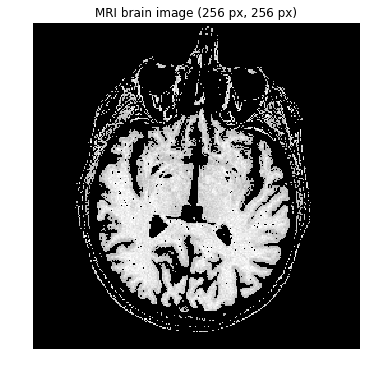

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

In [28]:
import numpy as np
size = np.count_nonzero(brain_im == 255)


25181

In [71]:
print('brain is of size {} pixels'.format(size))

brain is of size 25181 pixels


### 1.3 Contour detection
Add your implementation and discussion

### 1.4 Additional method(s)
Add your implementation and discussion

## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different colors. We ask you to create a routine to:

1. Count the number of shapes of each color.
2. Compute the total area (in pixels) of each color.

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity normalization should probably be used.

**Note:** the routine(s) that you will write for this exercise will be useful for the final project as well, so pay special attention to it.

### 2.1 Visualization

In [9]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


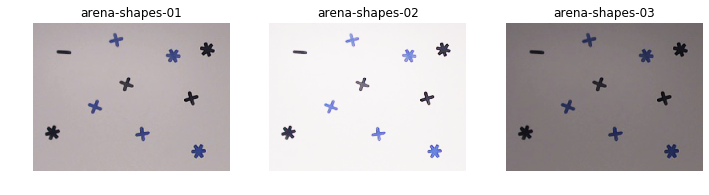

In [10]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color
Add your implementation and discussion

### 2.3 Total area (in pixels) of each color
Add your implementation and discussion